In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os.path as op
import glob
import matplotlib.pyplot as plt
import ast
# import moss
import csv
import random
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
from matplotlib.ticker import PercentFormatter
from statsmodels.stats.anova import AnovaRM
from sklearn.preprocessing import StandardScaler
from matplotlib.cm import get_cmap
from plot_utils import combined_rolling_average_and_model_fit, combined_sliding_window_and_model_fit_split_col
from common_functions import remove_unit_variance

In [2]:
scaler = StandardScaler()

df = pd.read_csv('pilot5.csv')
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_cleaned = pd.read_csv('pilot5_errors.csv')


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_55591/97894384.py:5: DtypeWarning: Columns (157) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned = pd.read_csv('pilot5_errors.csv')


In [3]:
# df_cleaned['wm_untested_choice_num']

In [4]:
df['it_pos_neg'] =  np.where(df['it_sim_dis_diff_test'] <= 0, 0, 1)
df['v2_pos_neg'] =  np.where(df['v2_sim_dis_diff_test'] <= 0, 0, 1)
df_correct = df[df['resp_correct'] == 1]
#this approach here seems more correct
df_correct['wm_rt'] = df_correct['mouse.time_last'] * 1000
# df_correct['wm_rt'] = np.log(df_correct['wm_rt'])
df_correct = remove_unit_variance(df_correct,'wm_rt', 'participant')
df_correct['WM RT'] = df_correct['wm_rt']


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_55591/2543274082.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correct['wm_rt'] = df_correct['mouse.time_last'] * 1000


In [5]:
df_correct['WM RT']

0        1694.9
2         894.8
3        2095.7
5         895.8
8        1261.2
          ...  
39924    1564.4
39926     866.2
39928    1549.2
39929    2001.2
39930    1318.6
Name: WM RT, Length: 30196, dtype: float64

In [6]:
sns.set_context('notebook')

In [7]:

blue = '#90BDEC'
gray = '#BFBFBF'

# Create a palette list
palette = [blue, gray]
sns.set_palette(palette)  # Set as default palette


In [8]:
df_cleaned['Error Category Accuracy'] = df_cleaned['wm_category_num']# use these for the errors - old ( if the errors are from the correct categories)
df_cleaned['Untested Item Error Accuracy'] = df_cleaned['wm_untested_choice_num'] # new errors 

df['Accuracy'] = df['resp_correct']
# df_filtered = remove_unit_variance(df_filtered, 'resp_correct', 'participant')
# df_filtered['Accuracy'] = df_filtered['resp_correct_within']
    

In [9]:
df_cleaned['Error Category Accuracy']

0       0
1       1
2       1
3       0
4       0
       ..
8429    0
8430    1
8431    0
8432    0
8433    0
Name: Error Category Accuracy, Length: 8434, dtype: int64

In [10]:
df_correct['WM RT']

0        1694.9
2         894.8
3        2095.7
5         895.8
8        1261.2
          ...  
39924    1564.4
39926     866.2
39928    1549.2
39929    2001.2
39930    1318.6
Name: WM RT, Length: 30196, dtype: float64

<Figure size 1000x600 with 0 Axes>

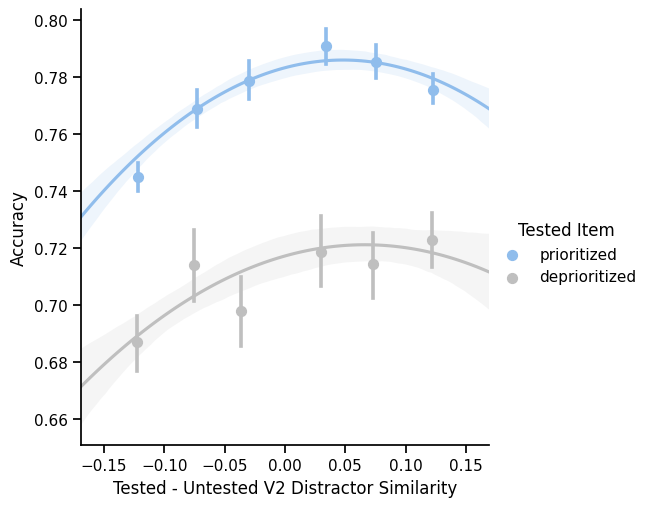

In [11]:


plt.figure(figsize=(10, 6))
sns.lmplot(
    x="Tested - Untested V2 Distractor Similarity",
    y='Accuracy',
    hue = 'Tested Item',
    x_bins = 6,
    order = 2,
    ci = 68,
    data=df
)

In [12]:
g = sns.lmplot(
    x="Tested - Untested V2 Distractor Similarity",
    y='Accuracy',
    col='v2_pos_neg',
    hue='Tested Item',
    x_bins=3,
    order=2,
    facet_kws={'sharex': False}, 
    ci=68,
    aspect=0.7, 
    data=df,
    legend=False  # Remove the default legend
)

g.axes[0,1].yaxis.set_visible(False)
g.axes[0,1].spines['left'].set_visible(False)
g.axes[0,1].set_xlabel('')

handles, labels = g.axes[0,0].get_legend_handles_labels()

g.fig.legend(handles, labels, loc='lower center', ncol=len(labels), 
             bbox_to_anchor=(0.5, -0.15), frameon=True)

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  

plt.show()

TypeError: lmplot() got an unexpected keyword argument 'facet_kws'

In [ ]:
# !pip uninstall seaborn -y
# !pip install seaborn

In [ ]:
# Call the function
combined_plot = combined_rolling_average_and_model_fit(
    df_cleaned, 
    x_col="Tested - Untested V2 Distractor Similarity",
    y_col="Error Category Accuracy", 
    item_col=None,  # Can be None to avoid splitting
    window_percent=0.2,
    step_percent=0.02,
    palette=palette
)

# Show the plot
plt.show()

In [ ]:
combined_plot = combined_rolling_average_and_model_fit(
    df, 
    x_col="Tested - Untested V2 Distractor Similarity",
    y_col="Accuracy",
    item_col="Tested Item",  # Can be None to avoid splitting
    window_percent=0.2,
    step_percent=0.02,
    palette=palette
)

# Show the plot
plt.show()

In [ ]:
# Call with aspect ratio of 0.7
fig = combined_sliding_window_and_model_fit_split_col(
    df_cleaned, 
    x_col="Tested - Untested IT Distractor Similarity",
    y_col="Error Category Accuracy", 

    # item_col="Tested Item",
    split_col="IT_pos_neg",
    split_value=0,
    window_percent=0.2, 
    step_percent=0.02,
    # palette=['#90BDEC', '#BFBFBF'],
    aspect=0.7  # Set aspect ratio to 0.7
)

# plt.show()

# # # Without item_col (all data together)
# fig2 = combined_sliding_window_and_model_fit_split_col_subplot(
#     df, 
#     x_col="Tested - Untested V2 Distractor Similarity",
#     y_col="Accuracy", 
#     item_col=None,  # No grouping by item
#     split_col="v2_pos_neg",
#     split_value=0,
#     window_percent=0.2, 
#     step_percent=0.02,
#     palette=['#90BDEC', '#BFBFBF']  # Your custom palette
# )

# plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x="Tested - Untested V2 Distractor Similarity",
    y='WM RT',
    hue = "Tested Item",
    x_bins = 6,
    order = 2,
    ci = 68,
    data=df_correct
)

In [ ]:
g = sns.lmplot(
    x="Tested - Untested V2 Distractor Similarity",
    y='WM RT',
    col='v2_pos_neg',
    hue = "Tested Item",
    x_bins=3,
    order=2,
    facet_kws={'sharex': False}, 
    ci=68,
    aspect=0.7, 
    data=df_correct,
    legend=False  
)
g.axes[0,1].yaxis.set_visible(False)
g.axes[0,1].spines['left'].set_visible(False)
g.axes[0,1].set_xlabel('')
handles, labels = g.axes[0,0].get_legend_handles_labels()
g.fig.legend(handles, labels, loc='lower center', ncol=len(labels), 
             bbox_to_anchor=(0.5, -0.15), frameon=True)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  
plt.show()

In [ ]:
combined_plot = combined_rolling_average_and_model_fit(
    df_correct, 
    x_col="Tested - Untested V2 Distractor Similarity",
    y_col="WM RT",
    item_col="Tested Item",  # Can be None to avoid splitting
    window_percent=0.2,
    step_percent=0.02,
    palette=palette
)

plt.show()

In [ ]:
# Modified function that doesn't create its own legend when used with subplots
def combined_rolling_average_and_model_fit_subplot(df, x_col="Tested - Untested IT Distractor Similarity", 
                                           y_col='Accuracy', item_col=None,
                                           window_percent=0.2, step_percent=0.01,
                                           palette=None, ax=None):
    # Use provided axis or create new one
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 7))
        created_fig = True
    else:
        fig = ax.get_figure()
        created_fig = False
    
    # Set background colors
    if created_fig:
        fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    
    # Remove grid
    ax.grid(False)
    
    # Use provided palette or default
    if palette is None:
        palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
    
    # Color map for specific item types (using palette colors)
    color_map = {
        'prioritized': palette[0],
        'deprioritized': palette[1]
    }
    
    # If splitting by item_col
    if item_col is not None and item_col in df.columns:
        # Get unique tested items
        tested_items = df[item_col].unique()
        
        # First, plot rolling averages (in background)
        for i, item in enumerate(tested_items):
            df_item = df[df[item_col] == item].sort_values(by=x_col).reset_index(drop=True)
            
            total_points = len(df_item)
            
            window_points = max(int(total_points * window_percent), 3)  # Ensure at least 3 points
            step_points = max(int(total_points * step_percent), 1)      # Ensure at least 1 point
            
            if total_points < window_points:
                print(f"Skipping {item} - insufficient data points ({total_points} < {window_points})")
                continue
                
            print(f"Item: {item}, Total points: {total_points}, Window size: {window_points}, Step size: {step_points}")
                
            x_values = []
            y_values = []
            y_errors = []
            
            for j in range(0, total_points - window_points + 1, step_points):
                window = df_item.iloc[j:j+window_points]
                
                mean_x = window[x_col].mean()
                mean_y = window[y_col].mean()
                
                std_y = window[y_col].std()
                sem_y = std_y / np.sqrt(window_points)
                
                x_values.append(mean_x)
                y_values.append(mean_y)
                y_errors.append(sem_y)
            
            x_values = np.array(x_values)
            y_values = np.array(y_values)
            y_errors = np.array(y_errors)
            
            if len(x_values) == 0:
                continue
            
            # Select color based on item name or index in palette
            item_lower = str(item).lower()
            if item_lower in color_map:
                color = color_map[item_lower]
            elif 'prioritized' in item_lower:
                color = color_map['prioritized']
            elif 'deprioritized' in item_lower:
                color = color_map['deprioritized']
            else:
                # Use palette color with modulo to ensure we don't go out of bounds
                color = palette[i % len(palette)]
            
            # Very transparent rolling average lines - don't add label for these
            ax.plot(x_values, y_values, color=color, linewidth=1, alpha=0.3)
            
            # Very transparent confidence bands
            ax.fill_between(x_values, 
                           y_values - 1.96 * y_errors,
                           y_values + 1.96 * y_errors,
                           color=color, alpha=0.1)
        
        # Then plot model fits (bold lines on top) - only add labels for these
        for i, item in enumerate(tested_items):
            df_item = df[df[item_col] == item]
            
            # Select color based on item name or index in palette (same logic as above)
            item_lower = str(item).lower()
            if item_lower in color_map:
                color = color_map[item_lower]
            elif 'prioritized' in item_lower:
                color = color_map['prioritized']
            elif 'deprioritized' in item_lower:
                color = color_map['deprioritized']
            else:
                color = palette[i % len(palette)]
                
            # Fit a 2nd order polynomial
            x_range = np.linspace(df_item[x_col].min(), df_item[x_col].max(), 100)
            model = np.poly1d(np.polyfit(df_item[x_col], df_item[y_col], 2))
                        
            # Very bold model fit lines - only these get labels
            ax.plot(x_range, model(x_range), color=color, linestyle='-', 
                    linewidth=5, label=f'{item}')
        
        title_suffix = f" by {item_col}"
    
    # If NOT splitting by item_col
    else:
        # Sort by x value
        df_sorted = df.sort_values(by=x_col).reset_index(drop=True)
        
        total_points = len(df_sorted)
        
        window_points = max(int(total_points * window_percent), 3)  # Ensure at least 3 points
        step_points = max(int(total_points * step_percent), 1)      # Ensure at least 1 point
        
        print(f"Total points: {total_points}, Window size: {window_points}, Step size: {step_points}")
            
        x_values = []
        y_values = []
        y_errors = []
        
        for j in range(0, total_points - window_points + 1, step_points):
            window = df_sorted.iloc[j:j+window_points]
            
            mean_x = window[x_col].mean()
            mean_y = window[y_col].mean()
            
            std_y = window[y_col].std()
            sem_y = std_y / np.sqrt(window_points)
            
            x_values.append(mean_x)
            y_values.append(mean_y)
            y_errors.append(sem_y)
        
        x_values = np.array(x_values)
        y_values = np.array(y_values)
        y_errors = np.array(y_errors)
        
        # Use first color from palette
        color = palette[0]
        
        # Very transparent rolling average line - no label
        ax.plot(x_values, y_values, color=color, linewidth=1, alpha=0.3)
        
        # Very transparent confidence bands
        ax.fill_between(x_values, 
                       y_values - 1.96 * y_errors,
                       y_values + 1.96 * y_errors,
                       color=color, alpha=0.1)
        
        # Fit a 2nd order polynomial to all data
        x_range = np.linspace(df[x_col].min(), df[x_col].max(), 100)
        model = np.poly1d(np.polyfit(df[x_col], df[y_col], 2))
        
        # Bold model fit line with label
        ax.plot(x_range, model(x_range), color=color, linestyle='-', 
                linewidth=5, label='All Data')
                
        title_suffix = ""
    
    # Styling for axes and labels
    ax.set_xlabel(x_col, fontweight='bold')
    ax.set_ylabel(y_col, fontweight='bold')
    ax.set_title(f'Rolling Average and Model Fit{title_suffix}', fontweight='bold')
    
    # Don't create legend at subplot level when not standalone
    if created_fig:
        # Create legend and position it OUTSIDE the plot
        legend = ax.legend(frameon=True, fontsize=8, loc='center left', bbox_to_anchor=(1.0, 0.5))
    
    # Set y-axis limits if applicable
    if y_col.lower() in ['accuracy', 'acc', 'correct', 'resp_correct']:
        ax.set_ylim(0.6, 0.8)
    
    # Add spines with minimal styling
    for spine in ax.spines.values():
        spine.set_color('black')
        spine.set_linewidth(1)
    
    # Only adjust layout if we created the figure
    if created_fig:
        plt.tight_layout()
        plt.subplots_adjust(right=0.8)  # Make room for the legend on the right
    
    return fig

# Example usage with different dataframes for each plot in a 3x2 grid
plot_configs = [
    {
        'df': df,  # Add dataframe to each config
        'x_col': "Tested - Untested V2 Distractor Similarity",
        'y_col': "Accuracy",
        'item_col': "Tested Item"
    },
    
    {
        'df': df_correct,  # Another dataframe
        'x_col': "Tested - Untested V2 Distractor Similarity",
        'y_col': "WM RT",
        'item_col': "Tested Item"
    },
    {
        'df': df_cleaned,  # Another dataframe
        'x_col': "Tested - Untested V2 Distractor Similarity",
        'y_col': "Error Category Accuracy",
        'item_col': "Tested Item"
    }
]

# Create the 3x2 grid
fig, axes = plt.subplots(3, 1, figsize=(5, 12))
axes = axes.flatten()

# Keep track of all handles and labels for the shared legend
all_handles = []
all_labels = []

for i, config in enumerate(plot_configs):
    combined_rolling_average_and_model_fit_subplot(
        config['df'],  # Use the dataframe from config
        x_col=config['x_col'],
        y_col=config['y_col'],
        # item_col=config['item_col'],
        window_percent=0.2,
        step_percent=0.02,
        palette=palette,
        ax=axes[i]
    )
    
    # Collect handles and labels from this subplot
    handles, labels = axes[i].get_legend_handles_labels()
    for handle, label in zip(handles, labels):
        if label not in all_labels:  # Only add unique labels
            all_handles.append(handle)
            all_labels.append(label)

# Create one shared legend for the entire figure
fig.legend(all_handles, all_labels, loc='center', bbox_to_anchor=(0.5, 0.02), 
           ncol=len(all_labels), frameon=True, fontsize=12)

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)  # Make room for the shared legend
plt.show()

In [ ]:
# Modified version that accepts axes for subplotting with custom y-limits
def combined_sliding_window_and_model_fit_split_col_subplot(df, x_col="Tested - Untested V2 Distractor Similarity", 
                                               y_col='Accuracy', item_col=None,
                                               split_col='v2_pos_neg', split_value=0,
                                               window_percent=0.2, step_percent=0.02,
                                               palette=None, aspect=0.7, figsize_height=6,
                                               ax_left=None, ax_right=None,
                                               y_limits=None, share_y=True):
   
    if palette is None:
        default_colors = ['#1f77b4', '#ff7f0e', '#d62728', '#9467bd', '#8c564b']
    else:
        default_colors = palette
    
    # Color map for specific items
    color_map = {
        'prioritized': default_colors[0],    
        'deprioritized': default_colors[1],  
    }
    
    # Split the data
    df_left = df[df[x_col] <= split_value].copy()
    df_right = df[df[x_col] > split_value].copy()
    
    # If axes are provided, use them; otherwise create new figure
    if ax_left is not None and ax_right is not None:
        # Use provided axes
        fig = ax_left.get_figure()
        created_fig = False
    else:
        # Calculate figure width based on height and aspect ratio
        figsize_width = 2 * figsize_height * aspect  # 2 panels * height * aspect
        
        # Create figure with specified dimensions
        fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(figsize_width, figsize_height), 
                                                 sharey=share_y)
        created_fig = True
    
    # Set background colors
    if created_fig:
        fig.patch.set_facecolor('white')
    ax_left.set_facecolor('white')
    ax_right.set_facecolor('white')
    
    # Create a consistent item to color mapping using ALL data (not just one side)
    item_color_dict = {}
    if item_col is not None and item_col in df.columns:
        # Get all unique items from the entire dataset
        all_items = df[item_col].unique()
        
        # Create color mapping for all items
        for i, item in enumerate(all_items):
            item_lower = str(item).lower()
            if item_lower in color_map:
                item_color_dict[item] = color_map[item_lower]
            elif 'prioritized' in item_lower:
                item_color_dict[item] = color_map['prioritized']
            elif 'deprioritized' in item_lower:
                item_color_dict[item] = color_map['deprioritized']
            else:
                item_color_dict[item] = default_colors[i % len(default_colors)]
    
    # Function to process data for each side
    def process_side(df_side, ax, side_name, group_by_item=True):
        if group_by_item and item_col is not None and item_col in df.columns:
            # Process by item groups
            items = df_side[item_col].unique()
            
            # First, plot rolling averages (in background)
            for i, item in enumerate(items):
                df_item = df_side[df_side[item_col] == item].sort_values(by=x_col).reset_index(drop=True)
                
                total_points = len(df_item)
                
                # Calculate window and step sizes for THIS SPECIFIC ITEM
                window_points = max(int(total_points * window_percent), 3)  # Ensure at least 3 points
                step_points = max(int(total_points * step_percent), 1)      # Ensure at least 1 point
                
                # Get color from the consistent global mapping
                color = item_color_dict.get(item, default_colors[i % len(default_colors)])
                
                # Add rolling average if enough points
                if total_points >= window_points:
                    print(f"{side_name} side - {item}, Total points: {total_points}, "
                          f"Window size: {window_points}, Step size: {step_points}")
                        
                    x_vals, y_vals, y_errs = [], [], []
                    
                    for j in range(0, total_points - window_points + 1, step_points):
                        window = df_item.iloc[j:j+window_points]
                        
                        mean_x = window[x_col].mean()
                        mean_y = window[y_col].mean()
                        std_y = window[y_col].std()
                        sem_y = std_y / np.sqrt(window_points)
                        
                        x_vals.append(mean_x)
                        y_vals.append(mean_y)
                        y_errs.append(sem_y)
                    
                    x_vals = np.array(x_vals)
                    y_vals = np.array(y_vals)
                    y_errs = np.array(y_errs)
                    
                    if len(x_vals) > 0:
                        # Very transparent rolling average
                        ax.plot(x_vals, y_vals, color=color, linewidth=1, alpha=0.9, 
                               label=f'{item} (rolling)')
                        
                        # Very transparent confidence bands
                        ax.fill_between(x_vals, 
                                       y_vals - 1.96 * y_errs,
                                       y_vals + 1.96 * y_errs,
                                       color=color, alpha=0.2)
            
            # Then plot model fits (bold lines on top)
            for i, item in enumerate(items):
                df_item = df_side[df_side[item_col] == item]
                total_points = len(df_item)
                
                # Get color from the consistent global mapping
                color = item_color_dict.get(item, default_colors[i % len(default_colors)])
                
                # Add model fit if enough points
                if total_points >= 5:  # Need at least 5 points for a reasonable quadratic fit
                    # Fit a 2nd order polynomial
                    x_range = np.linspace(df_item[x_col].min(), df_item[x_col].max(), 100)
                    model = np.poly1d(np.polyfit(df_item[x_col], df_item[y_col], 2))
                    
                    # Bold model fit lines
                    ax.plot(x_range, model(x_range), color=color, linestyle='-', 
                            linewidth=5, label=f'{item} (model)')
        else:
            # Process all data as one group
            df_side = df_side.sort_values(by=x_col).reset_index(drop=True)
            total_points = len(df_side)
            
            # Calculate window and step sizes for ALL DATA
            window_points = max(int(total_points * window_percent), 3)  # Ensure at least 3 points
            step_points = max(int(total_points * step_percent), 1)      # Ensure at least 1 point
            
            color = default_colors[0]
            
            # First plot rolling average (background)
            if total_points >= window_points:
                print(f"{side_name} side - All Data, Total points: {total_points}, "
                      f"Window size: {window_points}, Step size: {step_points}")
                    
                x_vals, y_vals, y_errs = [], [], []
                
                for j in range(0, total_points - window_points + 1, step_points):
                    window = df_side.iloc[j:j+window_points]
                    
                    mean_x = window[x_col].mean()
                    mean_y = window[y_col].mean()
                    std_y = window[y_col].std()
                    sem_y = std_y / np.sqrt(window_points)
                    
                    x_vals.append(mean_x)
                    y_vals.append(mean_y)
                    y_errs.append(sem_y)
                
                x_vals = np.array(x_vals)
                y_vals = np.array(y_vals)
                y_errs = np.array(y_errs)
                
                if len(x_vals) > 0:
                    # Very transparent rolling average
                    ax.plot(x_vals, y_vals, color=color, linewidth=1, alpha=0.9, 
                           label='Rolling average')
                    
                    # Very transparent confidence bands
                    ax.fill_between(x_vals, 
                                   y_vals - 1.96 * y_errs,
                                   y_vals + 1.96 * y_errs,
                                   color=color, alpha=0.2)
            
            # Then plot model fit (bold, on top)
            if total_points >= 5:  # Need at least 5 points for a reasonable quadratic fit
                # Fit a 2nd order polynomial
                x_range = np.linspace(df_side[x_col].min(), df_side[x_col].max(), 100)
                model = np.poly1d(np.polyfit(df_side[x_col], df_side[y_col], 3))
                
                # Bold model fit line
                ax.plot(x_range, model(x_range), color=color, linestyle='-', 
                        linewidth=5, label='Model fit')
    
    # Process both sides
    use_item_col = (item_col is not None and item_col in df.columns)
    process_side(df_left, ax_left, "Negative", use_item_col)
    process_side(df_right, ax_right, "Positive", use_item_col)
    
    # Set titles and labels
    ax_left.set_title(f"{x_col} ≤ {split_value}")
    ax_right.set_title(f"{x_col} > {split_value}")

    ax_left.set_xlabel(x_col)
    ax_right.set_xlabel(x_col)  # Add x-axis label to right subplot too
    
    ax_left.set_ylabel(y_col)
    
    # Style the axes
    if share_y:
        ax_right.yaxis.set_visible(False)
        ax_right.spines['left'].set_visible(False)
    
    ax_left.spines['right'].set_visible(False)
    ax_right.spines['right'].set_visible(False)
    ax_right.spines['top'].set_visible(False)
    ax_left.spines['top'].set_visible(False)
    
    # Remove grid
    ax_left.grid(False)
    ax_right.grid(False)

    # Set y-limits based on y_limits parameter or y_col type
    if y_limits is not None:
        ax_left.set_ylim(y_limits)
        if not share_y:
            ax_right.set_ylim(y_limits)
    elif y_col.lower() in ['accuracy', 'acc', 'correct', 'resp_correct']:
        ax_left.set_ylim(0.6, 0.8)
        if not share_y:
            ax_right.set_ylim(0.6, 0.8)
    
    # Add legend to right plot - only keep unique items by using set()
    by_label = {}
    for ax in [ax_left, ax_right]:
        handles, labels = ax.get_legend_handles_labels()
        # Group handles by labels and take the first handle for each label
        for h, lbl in zip(handles, labels):
            # Just use the item name without the "(rolling)" or "(model)" suffix
            if "(" in lbl:
                base_label = lbl.split("(")[0].strip()
            else:
                base_label = lbl
            if base_label not in by_label:
                by_label[base_label] = h
    
    # Place legend outside and below the plot if we created the figure
    if by_label and created_fig:
        fig.legend(by_label.values(), by_label.keys(), 
                  loc='lower center', ncol=len(by_label), bbox_to_anchor=(0.5, -0.05))
    
    # Add main title if we created the figure
    if created_fig:
        window_percent_text = f"{window_percent*100:.0f}%"
        title_suffix = f" by {item_col}" if use_item_col else ""
        fig.suptitle(f'Rolling Average and Model Fit{title_suffix}', 
                     fontweight='bold', fontsize=14, y=0.98)
        
        plt.tight_layout()
        plt.subplots_adjust(bottom=0.15)  # Make room for the legend
    
    return fig


# Example usage with custom y-limits for each y-variable type
y_limits_dict = {
    'Accuracy': (0.62, 0.81),
    'WM RT': (0.33, 0.48),  # Adjust these based on your RT scale
    'Error Category Accuracy': (0.43, 0.73)  # Adjust based on your error scale
}

plot_configs = [
    {
        'df': df,
        'x_col': "Tested - Untested V2 Distractor Similarity",
        'y_col': "Accuracy",
        'item_col': "Tested Item",
        'split_col': "V2_pos_neg",
        'split_value': 0,
        'y_limits': y_limits_dict['Accuracy']
    },
    {
        'df': df_correct,
        'x_col': "Tested - Untested V2 Distractor Similarity",
        'y_col': "WM RT",
        'item_col': "Tested Item",
        'split_col': "V2_pos_neg",
        'split_value': 0,
        'y_limits': y_limits_dict['WM RT']
    },
    {
        'df': df_cleaned,
        'x_col': "Tested - Untested V2 Distractor Similarity",
        'y_col': "Error Category Accuracy",       
        'item_col': "Tested Item",
        'split_col': "V2_pos_neg",
        'split_value': 0,
        'y_limits': y_limits_dict['Error Category Accuracy']
    }
]

# Create a 3x2 grid with y-axes shared by row
fig, axes = plt.subplots(3, 2, figsize=(12, 18), sharey='row')  # Share y-axes within each row

# Keep track of all handles and labels for a shared legend
all_handles = []
all_labels = []

# Iterate through rows
for i, config in enumerate(plot_configs):
    row = i
    ax_left = axes[row, 0]
    ax_right = axes[row, 1]
    
    combined_sliding_window_and_model_fit_split_col_subplot(
        config['df'],
        x_col=config['x_col'],
        y_col=config['y_col'],
        # item_col=config['item_col'],  # Uncommented this
        split_col=config['split_col'],
        split_value=config['split_value'],
        window_percent=0.2,
        step_percent=0.02,
        palette=['#90BDEC', '#BFBFBF'],
        ax_left=ax_left,  # Pass the axes
        ax_right=ax_right,  # Pass the axes
        y_limits=config.get('y_limits', None),
        share_y=True
    )
    
    # Collect handles and labels from both subplots
    for ax in [ax_left, ax_right]:
        handles, labels = ax.get_legend_handles_labels()
        for handle, label in zip(handles, labels):
            # Clean up label to remove (rolling) or (model) suffix
            if "(" in label:
                base_label = label.split("(")[0].strip()
            else:
                base_label = label
            if base_label not in all_labels:
                all_handles.append(handle)
                all_labels.append(base_label)

# Create one shared legend for the entire figure
if all_handles:
    fig.legend(all_handles, all_labels, loc='center', bbox_to_anchor=(0.5, 0.02), 
               ncol=len(all_labels), frameon=True, fontsize=12)

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)  # Make room for the shared legend
plt.show()

In [13]:
fig2 = combined_sliding_window_and_model_fit_split_col_subplot(
    df, 
    x_col="Tested - Untested IT Distractor Similarity",
    y_col="Accuracy", 
    item_col="Tested Item",  # No grouping by item
    split_col="IT_pos_neg",
    split_value=0,
    window_percent=0.2, 
    step_percent=0.02,
    palette=['#90BDEC', '#BFBFBF']  # Your custom palette
)

plt.show()

NameError: name 'combined_sliding_window_and_model_fit_split_col_subplot' is not defined

In [14]:
# df_testing = pd.read_csv('pilot_total.csv')
# df_testing

In [15]:
# exclude_images = ['97_3.jpg', '151_1.jpg', '284_3.jpg', '212_1.jpg', '282_1.jpg', '237_1.jpg']

# # Create a mask for rows to keep (where the condition is NOT met)
# mask = ~((df_testing['pilot_number'] == 1) & 
#           (df_testing['root'].isin(exclude_images) | 
#            df_testing['Image1'].isin(exclude_images) | 
#            df_testing['Image2'].isin(exclude_images)))

# # Apply the mask to filter the dataframe
# df_testing_filtered = df_testing[mask]
# df_testing_filtered

In [16]:
# df_testing_filtered.to_csv('pilot5_excluded.csv', index=False) 

In [17]:
# df_testing_filtered

In [18]:
# # Modified function for rolling averages only (no model fit)
# def combined_rolling_average_subplot(df, x_col="Tested - Untested IT Distractor Similarity", 
#                                     y_col='Accuracy', item_col=None,
#                                     window_percent=0.2, step_percent=0.01,
#                                     palette=None, ax=None, show_title=True, show_xlabel=True):
#     # Use provided axis or create new one
#     if ax is None:
#         fig, ax = plt.subplots(figsize=(12, 7))
#         created_fig = True
#     else:
#         fig = ax.get_figure()
#         created_fig = False
    
#     # Set background colors
#     if created_fig:
#         fig.patch.set_facecolor('white')
#     ax.set_facecolor('white')
    
#     # Remove grid
#     ax.grid(False)
    
#     # Use provided palette or default
#     # palette = ['#90BDEC, #ff7f0e', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
#     # palette = ['#2ca02c', '#BFBFBF']
#     grey = '#BFBFBF'
#     blue = '#6cbcef'
#     teal = '#49a791'
#     purple = '#a271b1'
#     salmon = '#e58a72'
#     gold = '#dbad40'
#     green = '#95c355'
#     palette = [purple]
#     # Color map for specific item types (using palette colors)
#     color_map = {
#         'prioritized': purple,
#         'deprioritized': grey
#     }
    
#     # If splitting by item_col
#     if item_col is not None and item_col in df.columns:
#         # Get unique tested items
#         tested_items = df[item_col].unique()
        
#         # Plot rolling averages with labels
#         for i, item in enumerate(tested_items):
#             df_item = df[df[item_col] == item].sort_values(by=x_col).reset_index(drop=True)
            
#             total_points = len(df_item)
            
#             window_points = max(int(total_points * window_percent), 3)  # Ensure at least 3 points
#             step_points = max(int(total_points * step_percent), 1)      # Ensure at least 1 point
            
#             if total_points < window_points:
#                 print(f"Skipping {item} - insufficient data points ({total_points} < {window_points})")
#                 continue
                
#             print(f"Item: {item}, Total points: {total_points}, Window size: {window_points}, Step size: {step_points}")
                
#             x_values = []
#             y_values = []
#             y_errors = []
            
#             for j in range(0, total_points - window_points + 1, step_points):
#                 window = df_item.iloc[j:j+window_points]
                
#                 mean_x = window[x_col].mean()
#                 mean_y = window[y_col].mean()
                
#                 std_y = window[y_col].std()
#                 sem_y = std_y / np.sqrt(window_points)
                
#                 x_values.append(mean_x)
#                 y_values.append(mean_y)
#                 y_errors.append(sem_y)
            
#             x_values = np.array(x_values)
#             y_values = np.array(y_values)
#             y_errors = np.array(y_errors)
            
#             if len(x_values) == 0:
#                 continue
            
#             # Select color based on item name or index in palette
#             item_lower = str(item).lower()
#             if item_lower in color_map:
#                 color = color_map[item_lower]
#             elif 'prioritized' in item_lower:
#                 color = color_map['prioritized']
#             elif 'deprioritized' in item_lower:
#                 color = color_map['deprioritized']
#             else:
#                 # Use palette color with modulo to ensure we don't go out of bounds
#                 color = palette[i % len(palette)]
            
#             # Rolling average lines - now with labels and more visible
#             ax.plot(x_values, y_values, color=color, linewidth=3, alpha=0.8, 
#                    label=f'{item}')
            
#             # Confidence bands
#             ax.fill_between(x_values, 
#                            y_values - 1.96 * y_errors,
#                            y_values + 1.96 * y_errors,
#                            color=color, alpha=0.2)
        
#         title_suffix = f" by {item_col}"
    
#     # If NOT splitting by item_col
#     else:
#         # Sort by x value
#         df_sorted = df.sort_values(by=x_col).reset_index(drop=True)
        
#         total_points = len(df_sorted)
        
#         window_points = max(int(total_points * window_percent), 3)  # Ensure at least 3 points
#         step_points = max(int(total_points * step_percent), 1)      # Ensure at least 1 point
        
#         print(f"Total points: {total_points}, Window size: {window_points}, Step size: {step_points}")
            
#         x_values = []
#         y_values = []
#         y_errors = []
        
#         for j in range(0, total_points - window_points + 1, step_points):
#             window = df_sorted.iloc[j:j+window_points]
            
#             mean_x = window[x_col].mean()
#             mean_y = window[y_col].mean()
            
#             std_y = window[y_col].std()
#             sem_y = std_y / np.sqrt(window_points)
            
#             x_values.append(mean_x)
#             y_values.append(mean_y)
#             y_errors.append(sem_y)
        
#         x_values = np.array(x_values)
#         y_values = np.array(y_values)
#         y_errors = np.array(y_errors)
        
#         # Use first color from palette
#         color = palette[0]
        
#         # Rolling average line with label
#         ax.plot(x_values, y_values, color=color, linewidth=5, alpha=0.8)
        
#         # Confidence bands
#         ax.fill_between(x_values, 
#                        y_values - 1.96 * y_errors,
#                        y_values + 1.96 * y_errors,
#                        color=color, alpha=0.2)
                
#         title_suffix = ""
    
#     # Styling for axes and labels
#     if show_xlabel:
#         ax.set_xlabel(x_col, fontweight='bold', fontsize = 14)
#     else:
#         ax.set_xlabel('')  # Remove x-axis label
    
#     ax.set_ylabel(y_col, fontweight='bold', fontsize = 14)
    
#     # if show_title:
#     #     ax.set_title(f'Rolling Average{title_suffix}', fontweight='bold')
#     # else:
#     #     ax.set_title('')  # Remove title
    
#     # Don't create legend at subplot level when not standalone
#     if created_fig:
#         # Create legend and position it OUTSIDE the plot
#         legend = ax.legend(frameon=True, fontsize=8, loc='center left', bbox_to_anchor=(1.0, 0.5))

#     if x_col in ["Tested - Untested IT Distractor Similarity"]:
#         ax.set_xlabel("Relative IT Similarity")

#     if x_col in ["Tested - Untested V2 Distractor Similarity"]:
#         ax.set_xlabel("Relative V2 Similarity")

#     # Set y-axis limits if applicable
#     if y_col.lower() in ['accuracy']:
#         ax.set_ylabel("Recognition Accuracy (% Correct)")

    
#     if y_col.lower() in ['wm rt']:
#         ax.set_ylabel("Normalized Log RT (ms)")

    
#     if y_col.lower() in ['error category accuracy']:
#         ax.set_ylabel("Correct Error Category")
    
#     # Add spines with minimal styling - remove top and right borders
#     ax.spines['left'].set_color('grey')
#     ax.spines['left'].set_linewidth(2)
#     ax.spines['bottom'].set_color('grey')
#     ax.spines['bottom'].set_linewidth(2)
#     ax.tick_params(axis='x', colors='grey')
#     ax.tick_params(axis='y', colors='grey')
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)

    
#     # Only adjust layout if we created the figure
#     if created_fig:
#         plt.tight_layout()
#         plt.subplots_adjust(right=0.8)  # Make room for the legend on the right
    
#     return fig

# # Example usage with different dataframes for each plot in a 3x1 grid
# plot_configs = [
#     {
#         'df': df,  # Add dataframe to each config
#         'x_col': "Tested - Untested IT Distractor Similarity",
#         'y_col': "Accuracy",
#         'item_col': None
#     },
#     {
#         'df': df_correct,  # Another dataframe
#         'x_col': "Tested - Untested IT Distractor Similarity",
#         'y_col': "WM RT",
#         'item_col': None
#     },
#     {
#         'df': df_cleaned,  # Another dataframe
#         'x_col': "Tested - Untested IT Distractor Similarity",
#         'y_col': "Error Category Accuracy",
#         'item_col': None
#     }
# ]

# # Create the 3x1 grid
# fig, axes = plt.subplots(1, 3, figsize=(15,5))

# # Keep track of all handles and labels for the shared legend
# all_handles = []
# all_labels = []

# for i, config in enumerate(plot_configs):
#     combined_rolling_average_subplot(
#         config['df'],  # Use the dataframe from config
#         x_col=config['x_col'],
#         y_col=config['y_col'],
#         item_col=config['item_col'],  # Uncommented this
#         window_percent=0.2,
#         step_percent=0.02,
#         palette=palette,
#         ax=axes[i]
#         # show_title=(i == 0),  # Only show title on first plot
#         # show_xlabel=(i == len(plot_configs) - 1)  # Only show x-label on last plot
#     )
#     if i == 0: 
#         axes[i].set_ylim(0.7, 0.78)
#     elif i == 1:  # RT plot
#         axes[i].set_ylim(0.36, 0.42)
#     elif i == 2:  # Error accuracy plot
#         axes[i].set_ylim(0.52, 0.68)
    
    

#     # Collect handles and labels from this subplot
#     handles, labels = axes[i].get_legend_handles_labels()
#     for handle, label in zip(handles, labels):
#         if label not in all_labels:  # Only add unique labels
#             # all_handles.append(handle)
#             all_labels.append(label)

# # Create one shared legend for the entire figure
# fig.legend(all_handles, all_labels, loc='center', bbox_to_anchor=(0.5, 0.02), 
#            ncol=len(all_labels), frameon=True, fontsize=12)


# plt.tight_layout()
# plt.subplots_adjust(bottom=0.1)  # Make room for the shared legend
# plt.show()

In [19]:
def remove_leading_zero_formatter(x, pos):
    if x == 0:
        return '0'
    elif 0 < abs(x) < 1:
        formatted = f'{x:.1f}'
        if formatted.startswith('0.'):
            return formatted[1:]  
        elif formatted.startswith('-0.'):
            return f'-{formatted[2:]}'  
    return f'{x:.1f}'

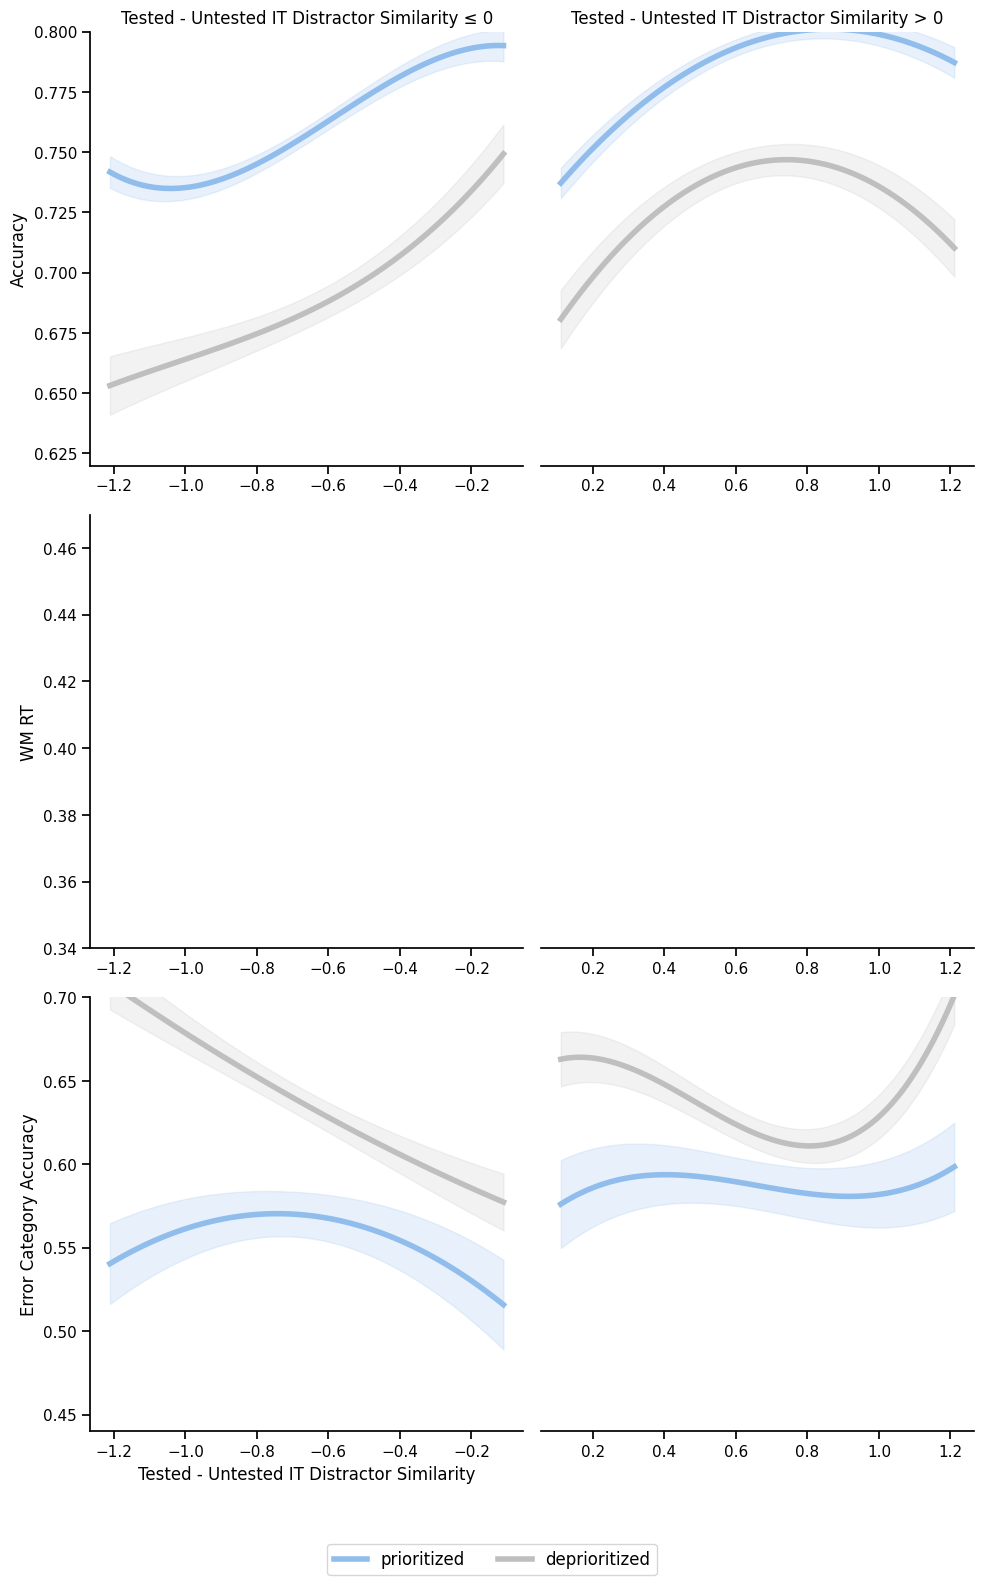

In [20]:


def split_order_lmplot_subplot(df, x, y, hue=None, split_value=0, 
                              left_order=2, right_order=2, 
                              ci=68, palette=None, ax_left=None, ax_right=None,
                              show_titles=True, show_xlabel=True):
   
    df_left = df[df[x] <= split_value].copy()
    df_right = df[df[x] > split_value].copy()
    
    if ax_left is not None and ax_right is not None:
        fig = ax_left.get_figure()
        created_fig = False
    else:
        fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
        created_fig = True
    
    if created_fig:
        fig.patch.set_facecolor('white')
    ax_left.set_facecolor('white')
    ax_right.set_facecolor('white')
    
    # Set up colors
    if hue is not None:
        hue_levels = df[hue].unique()
        if palette is None:
            palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
        color_dict = dict(zip(hue_levels, palette))
    else:
        hue_levels = [None]
        if palette is None:
            palette = ['#1f77b4']
    #     color_dict = {None: palette[0]}

    def plot_side(df_side, ax, order, side_name):
        """Plot one side with specified polynomial order - regression lines only"""
        
        if hue is not None:
            # Plot by hue groups
            for i, hue_val in enumerate(hue_levels):
                if hue_val not in df_side[hue].values:
                    continue
                    
                df_hue = df_side[df_side[hue] == hue_val]
                
                if len(df_hue) < order + 1:
                    print(f"Skipping {hue_val} on {side_name} - insufficient points for order {order}")
                    continue
                
                color = color_dict[hue_val]
                
                # Polynomial fit only
                x_vals = df_hue[x].values
                y_vals = df_hue[y].values
                
                if len(x_vals) >= order + 1:
                    # Create smooth line
                    x_smooth = np.linspace(x_vals.min(), x_vals.max(), 100)
                    
                    # Fit polynomial
                    coeffs = np.polyfit(x_vals, y_vals, order)
                    poly_func = np.poly1d(coeffs)
                    y_smooth = poly_func(x_smooth)
                    
                    # Plot regression line with label
                    ax.plot(x_smooth, y_smooth, color=color, linewidth=4, 
                           label=hue_val)
                    
                    # Confidence interval
                    if ci > 0:
                        y_pred = poly_func(x_vals)
                        residuals = y_vals - y_pred
                        mse = np.mean(residuals**2)
                        
                        n = len(x_vals)
                        # Standard error calculation
                        x_mean = np.mean(x_vals)
                        ss_x = np.sum((x_vals - x_mean)**2)
                        if ss_x > 0:
                            se = np.sqrt(mse * (1/n + (x_smooth - x_mean)**2 / ss_x))
                        else:
                            se = np.sqrt(mse / n) * np.ones_like(x_smooth)
                        
                        # t-value for confidence interval
                        if ci == 68:
                            t_val = 1.0
                        elif ci == 95:
                            t_val = 1.96
                        else:
                            t_val = stats.t.ppf((100 + ci) / 200, max(n - order - 1, 1))
                        
                        ci_lower = y_smooth - t_val * se
                        ci_upper = y_smooth + t_val * se
                        
                        ax.fill_between(x_smooth, ci_lower, ci_upper, 
                                      color=color, alpha=0.2)
        else:
            # Single group
            if len(df_side) < order + 1:
                print(f"Insufficient points on {side_name} for order {order}")
                return
            
            color = color_dict[None]
            
            # Polynomial fit only
            x_vals = df_side[x].values
            y_vals = df_side[y].values
            
            # Create smooth line
            x_smooth = np.linspace(x_vals.min(), x_vals.max(), 100)
            
            # Fit polynomial
            coeffs = np.polyfit(x_vals, y_vals, order)
            poly_func = np.poly1d(coeffs)
            y_smooth = poly_func(x_smooth)
            
            # Plot regression line
            ax.plot(x_smooth, y_smooth, color=color, linewidth=4)
            
            # Confidence interval
            if ci > 0:
                y_pred = poly_func(x_vals)
                residuals = y_vals - y_pred
                mse = np.mean(residuals**2)
                
                n = len(x_vals)
                x_mean = np.mean(x_vals)
                ss_x = np.sum((x_vals - x_mean)**2)
                if ss_x > 0:
                    se = np.sqrt(mse * (1/n + (x_smooth - x_mean)**2 / ss_x))
                else:
                    se = np.sqrt(mse / n) * np.ones_like(x_smooth)
                
                if ci == 68:
                    t_val = 1.0
                elif ci == 95:
                    t_val = 1.96
                else:
                    t_val = stats.t.ppf((100 + ci) / 200, max(n - order - 1, 1))
                
                ci_lower = y_smooth - t_val * se
                ci_upper = y_smooth + t_val * se
                
                ax.fill_between(x_smooth, ci_lower, ci_upper, 
                              color=color, alpha=0.2)
    
    # Plot both sides
    plot_side(df_left, ax_left, left_order, "Left")
    plot_side(df_right, ax_right, right_order, "Right")
    
    # Styling with white background
    if show_xlabel:
        ax_left.set_xlabel(x)
    else:
        ax_left.set_xlabel('')
    ax_right.set_xlabel('')  # Right plot never gets x-label
    ax_left.set_ylabel(y)
    
    # Remove y-axis from right plot
    ax_right.yaxis.set_visible(False)
    ax_right.spines['left'].set_visible(False)
    
    # Remove top and right spines, keep white background
    for ax in [ax_left, ax_right]:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.grid(False)  # No grid for clean white look
    
    # Set titles only if requested
    if show_titles:
        ax_left.set_title(f"{x} ≤ {split_value}")
        ax_right.set_title(f"{x} > {split_value}")
    else:
        ax_left.set_title('')
        ax_right.set_title('')
    
    return fig

# Create 3 vertical split plots
plot_configs = [
    {
        'df': df,
        'x': "Tested - Untested IT Distractor Similarity",
        'y': "Accuracy", 
        'hue': "Tested Item",
        'left_order': 3,
        'right_order': 2
    },
    {
        'df': df_correct,
        'x': "Tested - Untested IT Distractor Similarity",
        'y': 'WM RT',
        'hue': "Tested Item", 
        'left_order': 2,
        'right_order': 3
    },
    {
        'df': df_cleaned,
        'x': "Tested - Untested IT Distractor Similarity",
        'y': "Error Category Accuracy",
        'hue': "Tested Item", 
        'left_order': 2,
        'right_order': 3
    }
]

# Create 3 rows x 2 columns grid (3 split plots stacked vertically)
fig, axes = plt.subplots(3, 2, figsize=(10, 16), sharey='row')

# Set figure background to white
fig.patch.set_facecolor('white')

# Keep track of all handles and labels for shared legend
all_handles = []
all_labels = []

for i, config in enumerate(plot_configs):
    ax_left = axes[i, 0]
    ax_right = axes[i, 1]
    
    split_order_lmplot_subplot(
        df=config['df'],
        x=config['x'],
        y=config['y'],
        hue=config['hue'],
        split_value=0,
        left_order=config['left_order'],
        right_order=config['right_order'],
        ci=68,
        palette=['#90BDEC', '#BFBFBF'],
        ax_left=ax_left,
        ax_right=ax_right,
        show_titles=(i == 0),  # Only show titles on first plot
        show_xlabel=(i == len(plot_configs) - 1)  # Only show x-label on last plot
    )
    
    if i == 0:  # First row (Accuracy)
        ax_left.set_ylim(0.62, 0.8)   
        ax_right.set_ylim(0.62, 0.8)   
        
    elif i == 1:  # Second row (WM RT)
        ax_left.set_ylim(0.34, 0.47)     
        ax_right.set_ylim(0.34, 0.47) 
        
    elif i == 2:  # Third row (Error Category Accuracy)
        ax_left.set_ylim(0.44, 0.7)      
        ax_right.set_ylim(0.44, 0.7)  
    
    for ax in [ax_left, ax_right]:
        handles, labels = ax.get_legend_handles_labels()
        for handle, label in zip(handles, labels):
            if label not in all_labels:
                all_handles.append(handle)
                all_labels.append(label)
    
# Create one shared legend for the entire figure
if all_handles:
    fig.legend(all_handles, all_labels, loc='center', bbox_to_anchor=(0.5, 0.02), 
               ncol=len(all_labels), frameon=True, fontsize=12)

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)  # Make room for shared legend
plt.show()

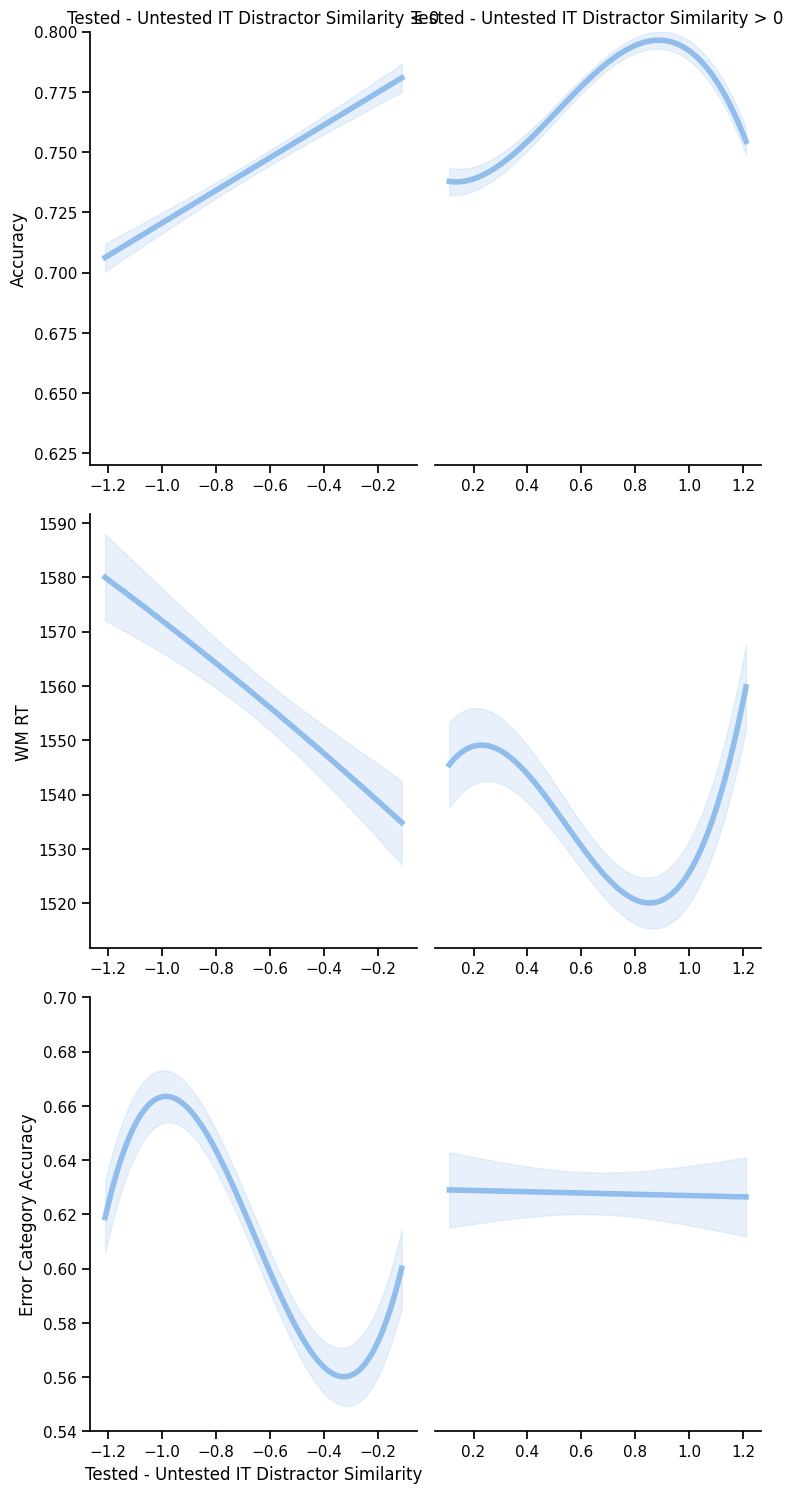

In [21]:
def split_order_lmplot_subplot(df, x, y, hue=None, split_value=0, 
                              left_order=2, right_order=2, 
                              ci=68, palette=None, ax_left=None, ax_right=None,
                              show_titles=True, show_xlabel=True):
   
    df_left = df[df[x] <= split_value].copy()
    df_right = df[df[x] > split_value].copy()
    
    if ax_left is not None and ax_right is not None:
        fig = ax_left.get_figure()
        created_fig = False
    else:
        fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
        created_fig = True
    
    if created_fig:
        fig.patch.set_facecolor('white')
    ax_left.set_facecolor('white')
    ax_right.set_facecolor('white')
    
    # Set up colors
    if hue is not None:
        hue_levels = df[hue].unique()
        if palette is None:
            palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
        color_dict = dict(zip(hue_levels, palette))
    else:
        hue_levels = [None]
        if palette is None:
            palette = ['#1f77b4']
        color_dict = {None: palette[0]}

    def plot_side(df_side, ax, order, side_name):
        """Plot one side with specified polynomial order - regression lines only"""
        
        if hue is not None:
            # Plot by hue groups
            for i, hue_val in enumerate(hue_levels):
                if hue_val not in df_side[hue].values:
                    continue
                    
                df_hue = df_side[df_side[hue] == hue_val]
                
                if len(df_hue) < order + 1:
                    print(f"Skipping {hue_val} on {side_name} - insufficient points for order {order}")
                    continue
                
                color = color_dict[hue_val]
                
                # Polynomial fit only
                x_vals = df_hue[x].values
                y_vals = df_hue[y].values
                
                if len(x_vals) >= order + 1:
                    # Create smooth line
                    x_smooth = np.linspace(x_vals.min(), x_vals.max(), 100)
                    
                    # Fit polynomial
                    coeffs = np.polyfit(x_vals, y_vals, order)
                    poly_func = np.poly1d(coeffs)
                    y_smooth = poly_func(x_smooth)
                    
                    # Plot regression line with label
                    ax.plot(x_smooth, y_smooth, color=color, linewidth=4, 
                           label=hue_val)
                    
                    # Confidence interval
                    if ci > 0:
                        y_pred = poly_func(x_vals)
                        residuals = y_vals - y_pred
                        mse = np.mean(residuals**2)
                        
                        n = len(x_vals)
                        # Standard error calculation
                        x_mean = np.mean(x_vals)
                        ss_x = np.sum((x_vals - x_mean)**2)
                        if ss_x > 0:
                            se = np.sqrt(mse * (1/n + (x_smooth - x_mean)**2 / ss_x))
                        else:
                            se = np.sqrt(mse / n) * np.ones_like(x_smooth)
                        
                        # t-value for confidence interval
                        if ci == 68:
                            t_val = 1.0
                        elif ci == 95:
                            t_val = 1.96
                        else:
                            t_val = stats.t.ppf((100 + ci) / 200, max(n - order - 1, 1))
                        
                        ci_lower = y_smooth - t_val * se
                        ci_upper = y_smooth + t_val * se
                        
                        ax.fill_between(x_smooth, ci_lower, ci_upper, 
                                      color=color, alpha=0.2)
        else:
            # Single group
            if len(df_side) < order + 1:
                print(f"Insufficient points on {side_name} for order {order}")
                return
            
            color = color_dict[None]
            
            # Polynomial fit only
            x_vals = df_side[x].values
            y_vals = df_side[y].values
            
            # Create smooth line
            x_smooth = np.linspace(x_vals.min(), x_vals.max(), 100)
            
            # Fit polynomial
            coeffs = np.polyfit(x_vals, y_vals, order)
            poly_func = np.poly1d(coeffs)
            y_smooth = poly_func(x_smooth)
            
            # Plot regression line
            ax.plot(x_smooth, y_smooth, color=color, linewidth=4)
            
            # Confidence interval
            if ci > 0:
                y_pred = poly_func(x_vals)
                residuals = y_vals - y_pred
                mse = np.mean(residuals**2)
                
                n = len(x_vals)
                x_mean = np.mean(x_vals)
                ss_x = np.sum((x_vals - x_mean)**2)
                if ss_x > 0:
                    se = np.sqrt(mse * (1/n + (x_smooth - x_mean)**2 / ss_x))
                else:
                    se = np.sqrt(mse / n) * np.ones_like(x_smooth)
                
                if ci == 68:
                    t_val = 1.0
                elif ci == 95:
                    t_val = 1.96
                else:
                    t_val = stats.t.ppf((100 + ci) / 200, max(n - order - 1, 1))
                
                ci_lower = y_smooth - t_val * se
                ci_upper = y_smooth + t_val * se
                
                ax.fill_between(x_smooth, ci_lower, ci_upper, 
                              color=color, alpha=0.2)
    
    # Plot both sides
    plot_side(df_left, ax_left, left_order, "Left")
    plot_side(df_right, ax_right, right_order, "Right")
    
    # Styling with white background
    if show_xlabel:
        ax_left.set_xlabel(x)
    else:
        ax_left.set_xlabel('')
    ax_right.set_xlabel('')  # Right plot never gets x-label
    ax_left.set_ylabel(y)
    
    # Remove y-axis from right plot
    ax_right.yaxis.set_visible(False)
    ax_right.spines['left'].set_visible(False)
    
    # Remove top and right spines, keep white background
    for ax in [ax_left, ax_right]:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.grid(False)  # No grid for clean white look
    
    # Set titles only if requested
    if show_titles:
        ax_left.set_title(f"{x} ≤ {split_value}")
        ax_right.set_title(f"{x} > {split_value}")
    else:
        ax_left.set_title('')
        ax_right.set_title('')
    
    return fig

# Define your custom colors
blue = '#90BDEC'
gray = '#BFBFBF'
palette = [blue, gray]

# Create 3 vertical split plots
plot_configs = [
    {
        'df': df,
        'x': "Tested - Untested IT Distractor Similarity",
        'y': "Accuracy", 
        'hue': None,  
        'left_order': 1,
        'right_order': 3
    },
    {
        'df': df_correct,
        'x': "Tested - Untested IT Distractor Similarity",
        'y': 'WM RT',
        'hue': None,  
        'left_order': 2,
        'right_order': 3
    },
    {
        'df': df_cleaned,
        'x': "Tested - Untested IT Distractor Similarity",
        'y': "Error Category Accuracy",
        'hue': None,  
        'left_order': 3,
        'right_order': 1
    }
]

# Create 3 rows x 2 columns grid (3 split plots stacked vertically)
fig, axes = plt.subplots(3, 2, figsize=(8, 16), sharey='row')

# Set figure background to white
fig.patch.set_facecolor('white')

# Keep track of all handles and labels for shared legend
all_handles = []
all_labels = []

for i, config in enumerate(plot_configs):
    ax_left = axes[i, 0]
    ax_right = axes[i, 1]
    
    split_order_lmplot_subplot(
        df=config['df'],
        x=config['x'],
        y=config['y'],
        hue=config['hue'],  # Now properly uses the hue from config (None or a column name)
        split_value=0,
        left_order=config['left_order'],
        right_order=config['right_order'],
        ci=68,
        palette=['#90BDEC', '#BFBFBF'],
        ax_left=ax_left,
        ax_right=ax_right,
        show_titles=(i == 0),  # Only show titles on first plot
        show_xlabel=(i == len(plot_configs) - 1)  # Only show x-label on last plot
    )
    
    # Set y-axis limits for each row
    if i == 0:  # First row (Accuracy)
        ax_left.set_ylim(0.62, 0.8)   
        ax_right.set_ylim(0.62, 0.8)   
        
    # elif i == 1:  # Second row (WM RT)
    #     ax_left.set_ylim(0.34, 0.48)     
    #     ax_right.set_ylim(0.34, 0.48) 
        
    elif i == 2:  # Third row (Error Category Accuracy)
        ax_left.set_ylim(0.54, 0.7)      
        ax_right.set_ylim(0.54, 0.7)     
    
    # Collect handles and labels from both subplots
    for ax in [ax_left, ax_right]:
        handles, labels = ax.get_legend_handles_labels()
        for handle, label in zip(handles, labels):
            if label not in all_labels:
                all_handles.append(handle)
                all_labels.append(label)

# Create one shared legend for the entire figure
if all_handles:
    fig.legend(all_handles, all_labels, loc='center', bbox_to_anchor=(0.5, 0.02), 
               ncol=len(all_labels), frameon=True, fontsize=12)

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)  # Make room for shared legend
plt.show()

Total points: 39933, Window size: 7986, Step size: 798
Total points: 30196, Window size: 6039, Step size: 603
Total points: 8434, Window size: 1686, Step size: 168


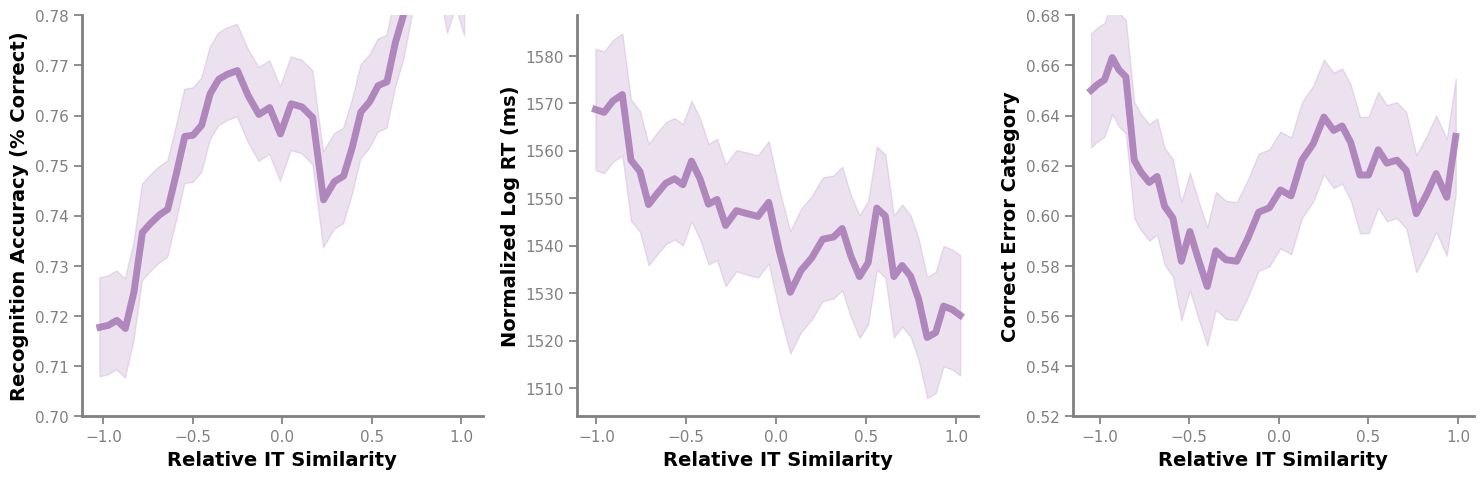

In [22]:

def combined_rolling_average_subplot(df, x_col="Tested - Untested IT Distractor Similarity", 
                                    y_col='Accuracy', item_col=None,
                                    window_percent=0.2, step_percent=0.01,
                                    palette=None, ax=None, show_title=True, show_xlabel=True):
    # Use provided axis or create new one
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 7))
        created_fig = True
    else:
        fig = ax.get_figure()
        created_fig = False
    
    # Set background colors
    if created_fig:
        fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    
    # Remove grid
    ax.grid(False)
    
    # Use provided palette or default
    grey = '#BFBFBF'
    blue = '#6cbcef'
    teal = '#49a791'
    purple = '#a271b1'
    salmon = '#e58a72'
    gold = '#dbad40'
    green = '#95c355'
    
    # if palette is None:
    palette = [purple]
    
    # Color map for specific item types (using palette colors)
    color_map = {
        'prioritized': purple,
        'deprioritized': grey
    }
    
    # If splitting by item_col
    if item_col is not None and item_col in df.columns:
        # Get unique tested items
        tested_items = df[item_col].unique()
        
        # Plot rolling averages with labels
        for i, item in enumerate(tested_items):
            df_item = df[df[item_col] == item].sort_values(by=x_col).reset_index(drop=True)
            
            total_points = len(df_item)
            
            window_points = max(int(total_points * window_percent), 3)  # Ensure at least 3 points
            step_points = max(int(total_points * step_percent), 1)      # Ensure at least 1 point
            
            if total_points < window_points:
                print(f"Skipping {item} - insufficient data points ({total_points} < {window_points})")
                continue
                
            print(f"Item: {item}, Total points: {total_points}, Window size: {window_points}, Step size: {step_points}")
                
            x_values = []
            y_values = []
            y_errors = []
            
            for j in range(0, total_points - window_points + 1, step_points):
                window = df_item.iloc[j:j+window_points]
                
                mean_x = window[x_col].mean()
                mean_y = window[y_col].mean()
                
                std_y = window[y_col].std()
                sem_y = std_y / np.sqrt(window_points)
                
                x_values.append(mean_x)
                y_values.append(mean_y)
                y_errors.append(sem_y)
            
            x_values = np.array(x_values)
            y_values = np.array(y_values)
            y_errors = np.array(y_errors)
            
            if len(x_values) == 0:
                continue
            
            # Select color based on item name or index in palette
            item_lower = str(item).lower()
            if item_lower in color_map:
                color = color_map[item_lower]
            elif 'prioritized' in item_lower:
                color = color_map['prioritized']
            elif 'deprioritized' in item_lower:
                color = color_map['deprioritized']
            else:
                # Use palette color with modulo to ensure we don't go out of bounds
                color = palette[i % len(palette)]
            
            # Rolling average lines - now with labels and more visible
            ax.plot(x_values, y_values, color=color, linewidth=3, alpha=0.8, 
                   label=f'{item}')
            
            # Confidence bands
            ax.fill_between(x_values, 
                           y_values - 1.96 * y_errors,
                           y_values + 1.96 * y_errors,
                           color=color, alpha=0.2)
        
        title_suffix = f" by {item_col}"
    
    # If NOT splitting by item_col
    else:
        # Sort by x value
        df_sorted = df.sort_values(by=x_col).reset_index(drop=True)
        
        total_points = len(df_sorted)
        
        window_points = max(int(total_points * window_percent), 3)  # Ensure at least 3 points
        step_points = max(int(total_points * step_percent), 1)      # Ensure at least 1 point
        
        print(f"Total points: {total_points}, Window size: {window_points}, Step size: {step_points}")
            
        x_values = []
        y_values = []
        y_errors = []
        
        for j in range(0, total_points - window_points + 1, step_points):
            window = df_sorted.iloc[j:j+window_points]
            
            mean_x = window[x_col].mean()
            mean_y = window[y_col].mean()
            
            std_y = window[y_col].std()
            sem_y = std_y / np.sqrt(window_points)
            
            x_values.append(mean_x)
            y_values.append(mean_y)
            y_errors.append(sem_y)
        
        x_values = np.array(x_values)
        y_values = np.array(y_values)
        y_errors = np.array(y_errors)
        
        # Use first color from palette
        color = palette[0]
        
        # Rolling average line with label
        ax.plot(x_values, y_values, color=color, linewidth=5, alpha=0.8)
        
        # Confidence bands
        ax.fill_between(x_values, 
                       y_values - 1.96 * y_errors,
                       y_values + 1.96 * y_errors,
                       color=color, alpha=0.2)
                
        title_suffix = ""
    
    # Styling for axes and labels
    if show_xlabel:
        ax.set_xlabel(x_col, fontweight='bold', fontsize=14)
    else:
        ax.set_xlabel('')  # Remove x-axis label
    
    ax.set_ylabel(y_col, fontweight='bold', fontsize=14)
    
    # Don't create legend at subplot level when not standalone
    if created_fig:
        # Create legend and position it OUTSIDE the plot
        legend = ax.legend(frameon=True, fontsize=8, loc='center left', bbox_to_anchor=(1.0, 0.5))

    # Custom axis labels
    if x_col in ["Tested - Untested IT Distractor Similarity"]:
        ax.set_xlabel("Relative IT Similarity", fontweight='bold', fontsize=14)

    if x_col in ["Tested - Untested V2 Distractor Similarity"]:
        ax.set_xlabel("Relative V2 Similarity", fontweight='bold', fontsize=14)

    # Set y-axis limits if applicable
    if y_col.lower() in ['accuracy']:
        ax.set_ylabel("Recognition Accuracy (% Correct)", fontweight='bold', fontsize=14)

    if y_col.lower() in ['wm rt']:
        ax.set_ylabel("Normalized Log RT (ms)", fontweight='bold', fontsize=14)

    if y_col.lower() in ['error category accuracy']:
        ax.set_ylabel("Correct Error Category", fontweight='bold', fontsize=14)
    
    # Add spines with minimal styling - remove top and right borders
    ax.spines['left'].set_color('grey')
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_color('grey')
    ax.spines['bottom'].set_linewidth(2)
    ax.tick_params(axis='x', colors='grey')
    ax.tick_params(axis='y', colors='grey')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Only adjust layout if we created the figure
    if created_fig:
        plt.tight_layout()
        plt.subplots_adjust(right=0.8)  # Make room for the legend on the right
    
    return fig


# Example usage with different dataframes for each plot in a 3x1 grid
plot_configs = [
    {
        'df': df,  # Add dataframe to each config
        'x_col': "Tested - Untested IT Distractor Similarity",
        'y_col': "Accuracy",
        'item_col': None
    },
    {
        'df': df_correct,  # Another dataframe
        'x_col': "Tested - Untested IT Distractor Similarity",
        'y_col': "WM RT",
        'item_col': None
    },
    {
        'df': df_cleaned,  # Another dataframe
        'x_col': "Tested - Untested IT Distractor Similarity",
        'y_col': "Error Category Accuracy",
        'item_col': None
    }
]

# Create the 3x1 grid
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Keep track of all handles and labels for the shared legend
all_handles = []
all_labels = []

for i, config in enumerate(plot_configs):
    combined_rolling_average_subplot(
        config['df'],  # Use the dataframe from config
        x_col=config['x_col'],
        y_col=config['y_col'],
        item_col=config['item_col'],
        window_percent=0.2,
        step_percent=0.02,
        palette=palette,
        ax=axes[i]
    )
    
    # Set y-axis limits for each subplot
    if i == 0: 
        axes[i].set_ylim(0.7, 0.78)
    # elif i == 1:  # RT plot
    #     axes[i].set_ylim(0.36, 0.42)
    elif i == 2:  # Error accuracy plot
        axes[i].set_ylim(0.52, 0.68)
    
    # Collect handles and labels from this subplot
    handles, labels = axes[i].get_legend_handles_labels()
    for handle, label in zip(handles, labels):
        if label not in all_labels:  # Only add unique labels
            all_handles.append(handle)
            all_labels.append(label)

# Create one shared legend for the entire figure (only if there are legend items)
if all_handles and all_labels:
    fig.legend(all_handles, all_labels, loc='center', bbox_to_anchor=(0.5, 0.02), 
               ncol=len(all_labels), frameon=True, fontsize=12)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Make room for the shared legend
plt.show()


In [23]:
# Use provided palette or default
grey = '#BFBFBF'
blue = '#6cbcef'
teal = '#49a791'
purple = '#a271b1'
salmon = '#e58a72'
gold = '#dbad40'
green = '#95c355'

Total points: 39933, Window size: 3993, Step size: 199


NameError: name 'FuncFormatter' is not defined

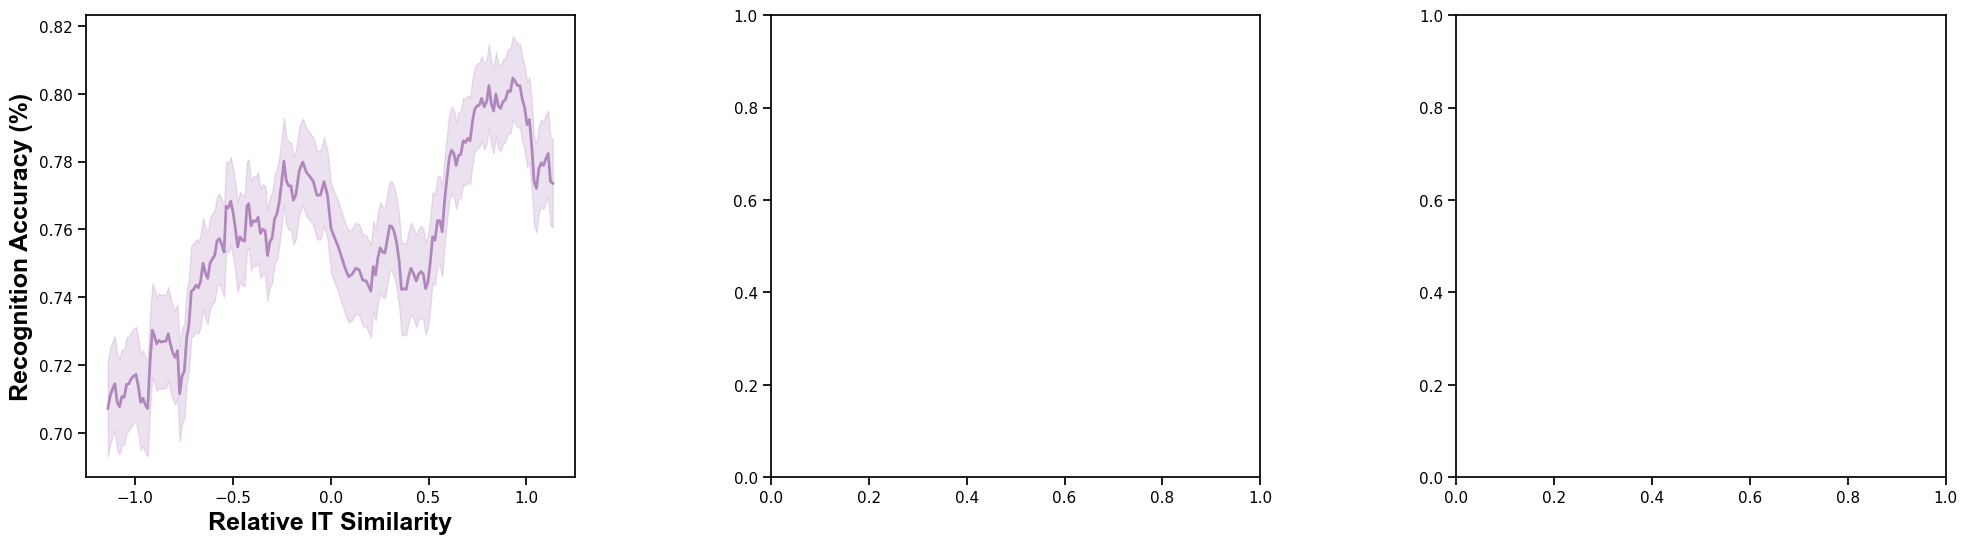

In [24]:


def combined_rolling_average_subplot(df, x_col="Tested - Untested IT Distractor Similarity", 
                                    y_col='Accuracy', item_col=None,
                                    window_percent=0.2, step_percent=0.01,
                                    palette=None, ax=None, show_title=True, show_xlabel=True,
                                    
                                    # Font and color parameters
                                    font_family='Arial', 
                                    title_font_size=16, title_font_color='black', title_font_weight='bold',
                                    label_font_size=14, label_font_color='black', label_font_weight='bold',
                                    tick_font_size=12, tick_font_color='black',  # Changed from 'grey' to 'black'
                                    legend_font_size=10, legend_font_color='black',
                                    
                                    # Axis formatting parameters
                                    y_as_percentage=False, y_percentage_step=2, 
                                    x_tick_step=None, y_tick_step=None,
                                    x_limits=None, y_limits=None,
                                    x_ticks=None,  # NEW: explicit x-tick positions
                                    x_remove_leading_zero = True,
                                    # Spacing parameters
                                    line_width=2, confidence_alpha=0.2):
    """
    Enhanced rolling average subplot with customizable fonts, colors, and formatting.
    
    Parameters:
    -----------
    df : DataFrame
        Input data
    x_col, y_col : str
        Column names for x and y axes
    item_col : str, optional
        Column name for grouping items
    window_percent, step_percent : float
        Rolling window parameters
    palette : list, optional
        Color palette for lines
    ax : matplotlib axis, optional
        Axis to plot on
    show_title, show_xlabel : bool
        Whether to show title and x-label
    
    Font and color parameters:
    font_family : str
        Font family for all text
    title_font_size, label_font_size, tick_font_size, legend_font_size : int
        Font sizes for different elements
    title_font_color, label_font_color, tick_font_color, legend_font_color : str
        Font colors for different elements
    title_font_weight, label_font_weight : str
        Font weights ('normal', 'bold', etc.)
    
    Axis formatting parameters:
    y_as_percentage : bool
        Whether to format y-axis as percentages
    y_percentage_step : float
        Step size for percentage ticks (e.g., 2 for every 2%)
    x_tick_step, y_tick_step : float, optional
        Custom tick step sizes
    x_limits, y_limits : tuple, optional
        Custom axis limits (min, max)
    x_ticks : array-like, optional
        Explicit x-tick positions (overrides x_tick_step)
    
    Spacing parameters:
    line_width : float
        Width of the rolling average lines
    confidence_alpha : float
        Alpha value for confidence bands
    """
    
    # Use provided axis or create new one
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 7))
        created_fig = True
    else:
        fig = ax.get_figure()
        created_fig = False
    
    # Set background colors
    if created_fig:
        fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    
    # Remove grid
    ax.grid(False)
    
    # Use provided palette or default
    grey = '#BFBFBF'
    blue = '#6cbcef'
    teal = '#49a791'
    purple = '#a271b1'
    salmon = '#e58a72'
    gold = '#dbad40'
    green = '#95c355'
    
    # Auto-select color based on x_col if no palette provided
    if palette is None:
        if "IT Distractor Similarity" in x_col:
            palette = [purple]
            color_map = {
                'prioritized': purple,
                'deprioritized': grey
            }
        elif "V2 Distractor Similarity" in x_col:
            palette = [teal]
            color_map = {
                        'prioritized': teal,
                        'deprioritized': grey
                    }
        else:
            palette = [purple]  # default
    
    # If splitting by item_col
    if item_col is not None and item_col in df.columns:
        # Get unique tested items
        tested_items = df[item_col].unique()
        
        # Plot rolling averages with labels
        for i, item in enumerate(tested_items):
            df_item = df[df[item_col] == item].sort_values(by=x_col).reset_index(drop=True)
            
            total_points = len(df_item)
            
            window_points = max(int(total_points * window_percent), 3)  # Ensure at least 3 points
            step_points = max(int(total_points * step_percent), 1)      # Ensure at least 1 point
            
            if total_points < window_points:
                print(f"Skipping {item} - insufficient data points ({total_points} < {window_points})")
                continue
                
            print(f"Item: {item}, Total points: {total_points}, Window size: {window_points}, Step size: {step_points}")
                
            x_values = []
            y_values = []
            y_errors = []
            
            for j in range(0, total_points - window_points + 1, step_points):
                window = df_item.iloc[j:j+window_points]
                
                mean_x = window[x_col].mean()
                mean_y = window[y_col].mean()
                
                std_y = window[y_col].std()
                sem_y = std_y / np.sqrt(window_points)
                
                x_values.append(mean_x)
                y_values.append(mean_y)
                y_errors.append(sem_y)
            
            x_values = np.array(x_values)
            y_values = np.array(y_values)
            y_errors = np.array(y_errors)
            
            if len(x_values) == 0:
                continue
            
            # Select color based on item name or index in palette
            item_lower = str(item).lower()
            if item_lower in color_map:
                color = color_map[item_lower]
            elif 'prioritized' in item_lower:
                color = color_map['prioritized']
            elif 'deprioritized' in item_lower:
                color = color_map['deprioritized']
            else:
                # Use palette color with modulo to ensure we don't go out of bounds
                color = palette[i % len(palette)]
            
            # Rolling average lines - now with customizable line width
            ax.plot(x_values, y_values, color=color, linewidth=line_width, alpha=0.8, 
                   label=f'{item}')
            
            # Confidence bands with customizable alpha
            ax.fill_between(x_values, 
                           y_values - 1.96 * y_errors,
                           y_values + 1.96 * y_errors,
                           color=color, alpha=confidence_alpha)
        
        title_suffix = f" by {item_col}"
    
    # If NOT splitting by item_col
    else:
        # Sort by x value
        df_sorted = df.sort_values(by=x_col).reset_index(drop=True)
        
        total_points = len(df_sorted)
        
        window_points = max(int(total_points * window_percent), 3)  # Ensure at least 3 points
        step_points = max(int(total_points * step_percent), 1)      # Ensure at least 1 point
        
        print(f"Total points: {total_points}, Window size: {window_points}, Step size: {step_points}")
            
        x_values = []
        y_values = []
        y_errors = []
        
        for j in range(0, total_points - window_points + 1, step_points):
            window = df_sorted.iloc[j:j+window_points]
            
            mean_x = window[x_col].mean()
            mean_y = window[y_col].mean()
            
            std_y = window[y_col].std()
            sem_y = std_y / np.sqrt(window_points)
            
            x_values.append(mean_x)
            y_values.append(mean_y)
            y_errors.append(sem_y)
        
        x_values = np.array(x_values)
        y_values = np.array(y_values)
        y_errors = np.array(y_errors)
        
        # Use first color from palette
        color = palette[0]
        
        # Rolling average line with customizable line width
        ax.plot(x_values, y_values, color=color, linewidth=line_width, alpha=0.8)
        
        # Confidence bands with customizable alpha
        ax.fill_between(x_values, 
                       y_values - 1.96 * y_errors,
                       y_values + 1.96 * y_errors,
                       color=color, alpha=confidence_alpha)
                
        title_suffix = ""
    
    # Styling for axes and labels with customizable fonts
    if show_xlabel:
        ax.set_xlabel(x_col, fontweight=label_font_weight, fontsize=label_font_size, 
                     color=label_font_color, fontfamily=font_family)
    else:
        ax.set_xlabel('')  # Remove x-axis label
    
    ax.set_ylabel(y_col, fontweight=label_font_weight, fontsize=label_font_size, 
                 color=label_font_color, fontfamily=font_family)
    
    # Custom axis labels with font styling
    if x_col in ["Tested - Untested IT Distractor Similarity"]:
        ax.set_xlabel("Relative IT Similarity", fontweight=label_font_weight, 
                     fontsize=label_font_size, color=label_font_color, fontfamily=font_family)

    if x_col in ["Tested - Untested V2 Distractor Similarity"]:
        ax.set_xlabel("Relative V2 Similarity", fontweight=label_font_weight, 
                     fontsize=label_font_size, color=label_font_color, fontfamily=font_family)

    # Set y-axis labels and formatting
    if y_col.lower() in ['accuracy']:
        if y_as_percentage:
            ax.set_ylabel("Recognition Accuracy (%)", fontweight=label_font_weight, 
                         fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
            # Format y-axis as percentages and set custom ticks
            ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y*100:.0f}%'))
            if y_tick_step is None:
                y_tick_step = y_percentage_step / 100.0  # Convert percentage to decimal
        else:
            ax.set_ylabel("Recognition Accuracy (% Correct)", fontweight=label_font_weight, 
                         fontsize=label_font_size, color=label_font_color, fontfamily=font_family)

    if y_col.lower() in ['wm rt']:
        ax.set_ylabel("Normalized Log RT (ms)", fontweight=label_font_weight, 
                     fontsize=label_font_size, color=label_font_color, fontfamily=font_family)

    if y_col.lower() in ['error category accuracy']:
        if y_as_percentage:
            ax.set_ylabel("Correct Error Category (%)", fontweight=label_font_weight, 
                         fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
            # Format y-axis as percentages and set custom ticks
            ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y*100:.0f}%'))
            if y_tick_step is None:
                y_tick_step = y_percentage_step / 100.0  # Convert percentage to decimal
        else:
            ax.set_ylabel("Correct Error Category", fontweight=label_font_weight, 
                         fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
    
    # Set custom x-axis ticks (NEW FEATURE)
    if x_ticks is not None:
        ax.set_xticks(x_ticks)
    elif x_tick_step is not None:
        ax.xaxis.set_major_locator(MultipleLocator(x_tick_step))
    
    # Set custom y-axis ticks
    if y_tick_step is not None:
        ax.yaxis.set_major_locator(MultipleLocator(y_tick_step))

    ax.xaxis.set_major_formatter(FuncFormatter(remove_leading_zero_formatter))
    
    # Set custom axis limits
    if x_limits is not None:
        ax.set_xlim(x_limits)


    
    # Set custom axis limits
    if x_limits is not None:
        ax.set_xlim(x_limits)
    
    if y_limits is not None:
        ax.set_ylim(y_limits)
    
    # Style tick labels with custom fonts
    ax.tick_params(axis='x', colors=tick_font_color, labelsize=tick_font_size)
    ax.tick_params(axis='y', colors=tick_font_color, labelsize=tick_font_size)
    
    # Set font family for tick labels
    for label in ax.get_xticklabels():
        label.set_fontfamily(font_family)
    for label in ax.get_yticklabels():
        label.set_fontfamily(font_family)
    
    # Don't create legend at subplot level when not standalone
    if created_fig:
        # Create legend with custom font styling
        legend = ax.legend(frameon=True, fontsize=legend_font_size, loc='center left', 
                          bbox_to_anchor=(1.0, 0.5))
        # Style legend text
        for text in legend.get_texts():
            text.set_fontfamily(font_family)
            text.set_color(legend_font_color)
    
    # Add spines with minimal styling - remove top and right borders
    ax.spines['left'].set_color('grey')
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_color('grey')
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Only adjust layout if we created the figure
    if created_fig:
        plt.tight_layout()
        plt.subplots_adjust(right=0.8)  # Make room for the legend on the right
    
    return fig


# Enhanced example usage with your specified x-axis settings
plot_configs = [
    {
        'df': df,  # Add dataframe to each config
        'x_col': "Tested - Untested IT Distractor Similarity",
        'y_col': "Accuracy",
        'item_col': None,
        'y_as_percentage': True,  # Format as percentages
        'y_percentage_step': 2,   # Every 2%
        'y_limits': (0.7, 0.8), # Custom y-axis limits
        'x_limits': (-1.4, 1.4), # NEW: Your specified x-limits
        'x_tick_step': 0.4,      # NEW: Ticks every 0.2
        'font_family': 'Arial',
        'label_font_size': 18,    # Increased from 14
        'tick_font_size': 16      # Increased from 12
    },
    {
        'df': df_correct,  # Another dataframe
        'x_col': "Tested - Untested IT Distractor Similarity",
        'y_col': "WM RT",
        'item_col': None,
        'y_limits': (1.5, 1.65),
        'y_tick_step': 0.02,  # Custom y-axis step
        'x_limits': (-1.4, 1.4), # NEW: Your specified x-limits
        'x_tick_step': 0.4,      # NEW: Ticks every 0.2
        'font_family': 'Arial',
        'label_font_size': 18,    # Increased from 14
        'tick_font_size': 16      # Increased from 12
    },
    {
        'df': df_cleaned,  # Another dataframe
        'x_col': "Tested - Untested IT Distractor Similarity",
        'y_col': "Error Category Accuracy",
        'item_col': None,
        'y_as_percentage': True,  # Added percentage formatting
        'y_percentage_step': 4,   # Every 4% for this plot
        'y_limits': (0.52, 0.69),
        'y_tick_step': 0.04,  # Custom y-axis step
        'x_limits': (-1.4, 1.4), # NEW: Your specified x-limits
        'x_tick_step': 0.4,      # NEW: Ticks every 0.2
        'font_family': 'Arial',
        'label_font_size': 18,    # Increased from 14
        'tick_font_size': 16      # Increased from 12
    }
]

# Alternative: Using explicit x_ticks instead of x_tick_step
x_tick_positions = np.arange(-1.4, 1.6, 0.2)  # Creates [-1.4, -1.2, -1.0, ..., 1.2, 1.4]

plot_configs_alternative = [
    {
        'df': df,
        'x_col': "Tested - Untested IT Distractor Similarity",
        'y_col': "Accuracy",
        'item_col': None,
        'y_as_percentage': True,
        'y_percentage_step': 2,
        'y_limits': (0.7, 0.8),
        'x_limits': (-1.4, 1.4),
        'x_tick_step': 0.4,      # NEW: Ticks every 0.2
        'font_family': 'Arial',
        'label_font_size': 18,
        'tick_font_size': 16
    },
    # ... (similar for other plots)
]

# Create the 3x1 grid with increased spacing
fig, axes = plt.subplots(1, 3, figsize=(24, 6))  # Increased figure width for more spacing
fig.subplots_adjust(wspace=0.4)  # Increase horizontal spacing between subplots

# Keep track of all handles and labels for the shared legend
all_handles = []
all_labels = []

for i, config in enumerate(plot_configs):
    combined_rolling_average_subplot(
        config['df'],  # Use the dataframe from config
        x_col=config['x_col'],
        y_col=config['y_col'],
        item_col=config['item_col'],
        window_percent=0.1,
        step_percent=0.005,
        ax=axes[i],
        
        # Pass the custom formatting options
        y_as_percentage=config.get('y_as_percentage', False),
        y_percentage_step=config.get('y_percentage_step', 2),
        y_limits=config.get('y_limits'),
        y_tick_step=config.get('y_tick_step'),
        x_limits=config.get('x_limits'),      # NEW: X-axis limits
        x_tick_step=config.get('x_tick_step'), # NEW: X-axis tick step
        x_ticks=config.get('x_ticks'),        # NEW: Explicit x-ticks

        font_family=config.get('font_family', 'Arial'),
        label_font_size=config.get('label_font_size', 18),
        tick_font_size=config.get('tick_font_size', 16)
    )
    
    # Collect handles and labels from this subplot
    handles, labels = axes[i].get_legend_handles_labels()
    for handle, label in zip(handles, labels):
        if label not in all_labels:  # Only add unique labels
            all_handles.append(handle)
            all_labels.append(label)

# Create one shared legend for the entire figure (only if there are legend items)
if all_handles and all_labels:
    fig.legend(all_handles, all_labels, loc='center', bbox_to_anchor=(0.5, 0.02), 
               ncol=len(all_labels), frameon=True, fontsize=14)  # Increased legend font size

plt.tight_layout()
plt.subplots_adjust(bottom=0.15, wspace=0.4)  # Make room for the shared legend and increase spacing
plt.show()

In [ ]:
plot_configs = [
    {
        'df': df,  # Add dataframe to each config
        'x_col': "Tested - Untested V2 Distractor Similarity",
        'y_col': "Accuracy",
        'item_col': None,
        'y_as_percentage': True,  # Format as percentages
        'y_percentage_step': 2,   # Every 2%
        'y_limits': (0.7, 0.8), # Custom y-axis limits
        'x_limits': (-0.2, 0.2), # NEW: X-axis limits
        'x_tick_step': 0.06,     # NEW: Ticks every 0.04
        'font_family': 'Arial',
        'label_font_size': 18,
        'tick_font_size': 16
    },
    {
        'df': df_correct,  # Another dataframe
        'x_col': "Tested - Untested V2 Distractor Similarity",
        'y_col': "WM RT",
        'item_col': None,
        'y_limits': (1.5, 1.65),
        'y_tick_step': 0.02,  # Custom y-axis step
        'x_limits': (-0.2, 0.2), # NEW: X-axis limits
        'x_tick_step': 0.06,     # NEW: Ticks every 0.04
        'font_family': 'Arial',
        'label_font_size': 18,
        'tick_font_size': 16
    },
    {
        'df': df_cleaned,  # Another dataframe
        'x_col': "Tested - Untested V2 Distractor Similarity",
        'y_col': "Error Category Accuracy",
        'item_col': None,
        'y_limits': (0.52, 0.69),
        'y_tick_step': 0.04,  # Custom y-axis step
        'y_as_percentage': True,  # Added percentage formatting
        'y_percentage_step': 4,   # Every 4% for this plot
        'x_limits': (-0.2, 0.2), # NEW: X-axis limits
        'x_tick_step': 0.06,     # NEW: Ticks every 0.04
        'font_family': 'Arial',
        'label_font_size': 18,
        'tick_font_size': 16
    }
]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Increased figure width for more spacing
fig.subplots_adjust(wspace=0.4)  # Increase horizontal spacing between subplots

# Keep track of all handles and labels for the shared legend
all_handles = []
all_labels = []

for i, config in enumerate(plot_configs):
    combined_rolling_average_subplot(
        config['df'],  # Use the dataframe from config
        x_col=config['x_col'],
        y_col=config['y_col'],
        item_col=config['item_col'],
        window_percent=0.1,
        step_percent=0.02,
        ax=axes[i],
        
        # Pass the custom formatting options
        y_as_percentage=config.get('y_as_percentage', False),
        y_percentage_step=config.get('y_percentage_step', 2),
        y_limits=config.get('y_limits'),
        y_tick_step=config.get('y_tick_step'),
        x_limits=config.get('x_limits'),      # NEW: X-axis limits
        x_tick_step=config.get('x_tick_step'), # NEW: X-axis tick step
        font_family=config.get('font_family', 'Arial'),
        label_font_size=config.get('label_font_size', 14),
        tick_font_size=config.get('tick_font_size', 12)
    )
    
    # Collect handles and labels from this subplot
    handles, labels = axes[i].get_legend_handles_labels()
    for handle, label in zip(handles, labels):
        if label not in all_labels:  # Only add unique labels
            all_handles.append(handle)
            all_labels.append(label)

# Create one shared legend for the entire figure (only if there are legend items)
if all_handles and all_labels:
    fig.legend(all_handles, all_labels, loc='center', bbox_to_anchor=(0.5, 0.02), 
               ncol=len(all_labels), frameon=True, fontsize=12)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15, wspace=0.4)  # Make room for the shared legend and increase spacing
plt.show()

In [ ]:
# plot_configs = [
#     {
#         'df': df,  # Add dataframe to each config
#         'x_col': "Tested - Untested V2 Distractor Similarity",
#         'y_col': "Accuracy",
#         'item_col': 'Tested Item',
#         'y_as_percentage': True,  # Format as percentages
#         'y_percentage_step': 2,   # Every 2%
#         'y_limits': (0.65, 0.8), # Custom y-axis limits
#         'font_family': 'Arial',
#         'label_font_size': 14,
#         'tick_font_size': 12
#     },
#     {
#         'df': df_correct,  # Another dataframe
#         'x_col': "Tested - Untested V2 Distractor Similarity",
#         'y_col': "WM RT",
#         'item_col': 'Tested Item',
#         'y_limits': (7.26, 7.38),
#         'y_tick_step': 0.02,  # Custom y-axis step
#         'font_family': 'Arial',
#         'label_font_size': 14,
#         'tick_font_size': 12
#     },
#     {
#         'df': df_cleaned,  # Another dataframe
#         'x_col': "Tested - Untested V2 Distractor Similarity",
#         'y_col': "Error Category Accuracy",
#         'item_col': 'Tested Item',
#         'y_limits': (0.48, 0.7),
#         'y_tick_step': 0.04,  # Custom y-axis step
#         'font_family': 'Arial',
#         'label_font_size': 14,
#         'tick_font_size': 12
#     }
# ]

# fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Increased figure width for more spacing
# fig.subplots_adjust(wspace=0.4)  # Increase horizontal spacing between subplots

# # Keep track of all handles and labels for the shared legend
# all_handles = []
# all_labels = []

# for i, config in enumerate(plot_configs):
#     combined_rolling_average_subplot(
#         config['df'],  # Use the dataframe from config
#         x_col=config['x_col'],
#         y_col=config['y_col'],
#         item_col=config['item_col'],
#         window_percent=0.2,
#         step_percent=0.02,
#         ax=axes[i],
        
#         # Pass the custom formatting options
#         y_as_percentage=config.get('y_as_percentage', False),
#         y_percentage_step=config.get('y_percentage_step', 2),
#         y_limits=config.get('y_limits'),
#         y_tick_step=config.get('y_tick_step'),
#         font_family=config.get('font_family', 'Arial'),
#         label_font_size=config.get('label_font_size', 14),
#         tick_font_size=config.get('tick_font_size', 12)
#     )
    
#     # Collect handles and labels from this subplot
#     handles, labels = axes[i].get_legend_handles_labels()
#     for handle, label in zip(handles, labels):
#         if label not in all_labels:  # Only add unique labels
#             all_handles.append(handle)
#             # all_labels.append(label)

# # Create one shared legend for the entire figure (only if there are legend items)
# if all_handles and all_labels:
#     fig.legend(all_handles, all_labels, loc='center', bbox_to_anchor=(0.5, 0.02), 
#                ncol=len(all_labels), frameon=True, fontsize=12)

# plt.tight_layout()
# plt.subplots_adjust(bottom=0.15, wspace=0.4)  # Make room for the shared legend and increase spacing
# plt.show()



plot_configs = [
    {
        'df': df,  # Add dataframe to each config
        'x_col': "Tested - Untested IT Distractor Similarity",
        'y_col': "Accuracy",
        'item_col': 'Tested Item',
        'y_as_percentage': True,  # Format as percentages
        'y_percentage_step': 2,   # Every 2%
        'y_limits': (0.63, 0.8), # Custom y-axis limits
        'font_family': 'Arial',
        'label_font_size': 14,
        'tick_font_size': 12
    },
    {
        'df': df_correct,  # Another dataframe
        'x_col': "Tested - Untested IT Distractor Similarity",
        'y_col': "WM RT",
        'item_col': 'Tested Item',
        'y_limits': (7.25, 7.38),
        'y_tick_step': 0.02,  # Custom y-axis step
        'font_family': 'Arial',
        'label_font_size': 14,
        'tick_font_size': 12
    },
    {
        'df': df_cleaned,  # Another dataframe
        'x_col': "Tested - Untested IT Distractor Similarity",
        'y_col': "Error Category Accuracy",
        'item_col': 'Tested Item',
        'y_limits': (0.46, 0.7),
        'y_tick_step': 0.04,  # Custom y-axis step
        'font_family': 'Arial',
        'label_font_size': 14,
        'tick_font_size': 12
    }
]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Increased figure width for more spacing
fig.subplots_adjust(wspace=0.4)  # Increase horizontal spacing between subplots

# Keep track of all handles and labels for the shared legend
all_handles = []
all_labels = []

for i, config in enumerate(plot_configs):
    combined_rolling_average_subplot(
        config['df'],  # Use the dataframe from config
        x_col=config['x_col'],
        y_col=config['y_col'],
        item_col=config['item_col'],
        window_percent=0.2,
        step_percent=0.02,
        ax=axes[i],
        
        # Pass the custom formatting options
        y_as_percentage=config.get('y_as_percentage', False),
        y_percentage_step=config.get('y_percentage_step', 2),
        y_limits=config.get('y_limits'),
        y_tick_step=config.get('y_tick_step'),
        font_family=config.get('font_family', 'Arial'),
        label_font_size=config.get('label_font_size', 14),
        tick_font_size=config.get('tick_font_size', 12)
    )
    
    # Collect handles and labels from this subplot
    handles, labels = axes[i].get_legend_handles_labels()
    for handle, label in zip(handles, labels):
        if label not in all_labels:  # Only add unique labels
            all_handles.append(handle)
            # all_labels.append(label)

# Create one shared legend for the entire figure (only if there are legend items)
if all_handles and all_labels:
    fig.legend(all_handles, all_labels, loc='center', bbox_to_anchor=(0.5, 0.02), 
               ncol=len(all_labels), frameon=True, fontsize=12)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15, wspace=0.4)  # Make room for the shared legend and increase spacing
plt.show()

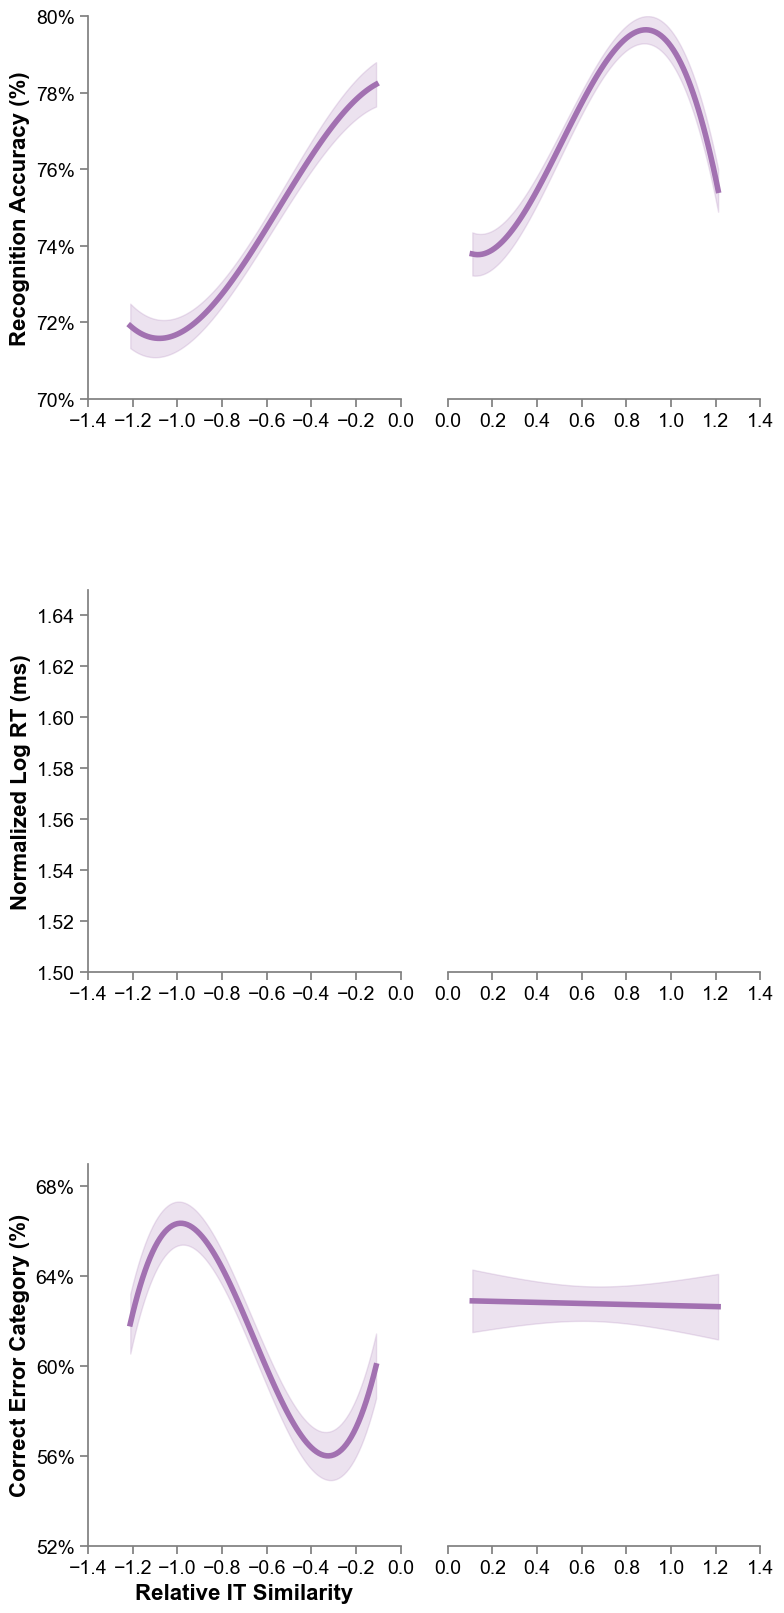

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib.ticker import FuncFormatter, MultipleLocator

def split_order_lmplot_subplot(df, x, y, hue=None, split_value=0, 
                              left_order=2, right_order=2, 
                              ci=68, palette=None, ax_left=None, ax_right=None,
                              show_titles=True, show_xlabel=True,
                              
                              # Font and color parameters
                              font_family='Arial', 
                              title_font_size=18, title_font_color='black', title_font_weight='bold',
                              label_font_size=16, label_font_color='black', label_font_weight='bold',
                              tick_font_size=14, tick_font_color='black',
                              legend_font_size=12, legend_font_color='black',
                              
                              # Axis formatting parameters
                              y_as_percentage=False, y_percentage_step=2, 
                              x_tick_step=None, y_tick_step=None,
                              x_limits=None, y_limits=None,
                              x_limits_left=None, x_limits_right=None,  # NEW: separate limits for each plot
                              
                              # Spacing and visual parameters
                              line_width=4, confidence_alpha=0.2):
    """
    Enhanced split order LMPlot with customizable fonts, colors, and formatting.
    
    Parameters:
    -----------
    df : DataFrame
        Input data
    x, y : str
        Column names for x and y axes
    hue : str, optional
        Column name for grouping
    split_value : float
        Value to split the data at
    left_order, right_order : int
        Polynomial orders for left and right sides
    ci : int
        Confidence interval percentage
    palette : list, optional
        Color palette
    ax_left, ax_right : matplotlib axes, optional
        Axes to plot on
    show_titles, show_xlabel : bool
        Whether to show titles and x-label
    
    Font and color parameters:
    font_family : str
        Font family for all text
    title_font_size, label_font_size, tick_font_size, legend_font_size : int
        Font sizes for different elements
    title_font_color, label_font_color, tick_font_color, legend_font_color : str
        Font colors for different elements
    title_font_weight, label_font_weight : str
        Font weights ('normal', 'bold', etc.)
    
    Axis formatting parameters:
    y_as_percentage : bool
        Whether to format y-axis as percentages
    y_percentage_step : float
        Step size for percentage ticks (e.g., 2 for every 2%)
    x_tick_step, y_tick_step : float, optional
        Custom tick step sizes
    x_limits, y_limits : tuple, optional
        Custom axis limits (min, max) - applied to both plots
    x_limits_left, x_limits_right : tuple, optional
        Custom axis limits for left and right plots separately
    
    Spacing and visual parameters:
    line_width : float
        Width of the regression lines
    confidence_alpha : float
        Alpha value for confidence bands
    """
   
    df_left = df[df[x] <= split_value].copy()
    df_right = df[df[x] > split_value].copy()
    
    if ax_left is not None and ax_right is not None:
        fig = ax_left.get_figure()
        created_fig = False
    else:
        fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
        created_fig = True
    
    if created_fig:
        fig.patch.set_facecolor('white')
    ax_left.set_facecolor('white')
    ax_right.set_facecolor('white')
    
    # Define colors
    grey = '#BFBFBF'
    blue = '#6cbcef'
    teal = '#49a791'
    purple = '#a271b1'
    salmon = '#e58a72'
    gold = '#dbad40'
    green = '#95c355'
    
    # Auto-select color based on x column if no palette provided
    if palette is None:
        if "IT Distractor Similarity" in x:
            palette = [purple]
        elif "V2 Distractor Similarity" in x:
            palette = [teal]
        else:
            palette = [purple]  # default
    
    # Set up colors
    if hue is not None:
        hue_levels = df[hue].unique()
        color_dict = dict(zip(hue_levels, palette))
    else:
        hue_levels = [None]
        color_dict = {None: palette[0]}

    def plot_side(df_side, ax, order, side_name):
        """Plot one side with specified polynomial order - regression lines only"""
        
        if hue is not None:
            # Plot by hue groups
            for i, hue_val in enumerate(hue_levels):
                if hue_val not in df_side[hue].values:
                    continue
                    
                df_hue = df_side[df_side[hue] == hue_val]
                
                if len(df_hue) < order + 1:
                    print(f"Skipping {hue_val} on {side_name} - insufficient points for order {order}")
                    continue
                
                color = color_dict[hue_val]
                
                # Polynomial fit only
                x_vals = df_hue[x].values
                y_vals = df_hue[y].values
                
                if len(x_vals) >= order + 1:
                    # Create smooth line
                    x_smooth = np.linspace(x_vals.min(), x_vals.max(), 100)
                    
                    # Fit polynomial
                    coeffs = np.polyfit(x_vals, y_vals, order)
                    poly_func = np.poly1d(coeffs)
                    y_smooth = poly_func(x_smooth)
                    
                    # Plot regression line with label and custom line width
                    ax.plot(x_smooth, y_smooth, color=color, linewidth=line_width, 
                           label=hue_val)
                    
                    # Confidence interval
                    if ci > 0:
                        y_pred = poly_func(x_vals)
                        residuals = y_vals - y_pred
                        mse = np.mean(residuals**2)
                        
                        n = len(x_vals)
                        # Standard error calculation
                        x_mean = np.mean(x_vals)
                        ss_x = np.sum((x_vals - x_mean)**2)
                        if ss_x > 0:
                            se = np.sqrt(mse * (1/n + (x_smooth - x_mean)**2 / ss_x))
                        else:
                            se = np.sqrt(mse / n) * np.ones_like(x_smooth)
                        
                        # t-value for confidence interval
                        if ci == 68:
                            t_val = 1.0
                        elif ci == 95:
                            t_val = 1.96
                        else:
                            t_val = stats.t.ppf((100 + ci) / 200, max(n - order - 1, 1))
                        
                        ci_lower = y_smooth - t_val * se
                        ci_upper = y_smooth + t_val * se
                        
                        ax.fill_between(x_smooth, ci_lower, ci_upper, 
                                      color=color, alpha=confidence_alpha)
        else:
            # Single group
            if len(df_side) < order + 1:
                print(f"Insufficient points on {side_name} for order {order}")
                return
            
            color = color_dict[None]
            
            # Polynomial fit only
            x_vals = df_side[x].values
            y_vals = df_side[y].values
            
            # Create smooth line
            x_smooth = np.linspace(x_vals.min(), x_vals.max(), 100)
            
            # Fit polynomial
            coeffs = np.polyfit(x_vals, y_vals, order)
            poly_func = np.poly1d(coeffs)
            y_smooth = poly_func(x_smooth)
            
            # Plot regression line with custom line width
            ax.plot(x_smooth, y_smooth, color=color, linewidth=line_width)
            
            # Confidence interval
            if ci > 0:
                y_pred = poly_func(x_vals)
                residuals = y_vals - y_pred
                mse = np.mean(residuals**2)
                
                n = len(x_vals)
                x_mean = np.mean(x_vals)
                ss_x = np.sum((x_vals - x_mean)**2)
                if ss_x > 0:
                    se = np.sqrt(mse * (1/n + (x_smooth - x_mean)**2 / ss_x))
                else:
                    se = np.sqrt(mse / n) * np.ones_like(x_smooth)
                
                if ci == 68:
                    t_val = 1.0
                elif ci == 95:
                    t_val = 1.96
                else:
                    t_val = stats.t.ppf((100 + ci) / 200, max(n - order - 1, 1))
                
                ci_lower = y_smooth - t_val * se
                ci_upper = y_smooth + t_val * se
                
                ax.fill_between(x_smooth, ci_lower, ci_upper, 
                              color=color, alpha=confidence_alpha)
    
    # Plot both sides
    plot_side(df_left, ax_left, left_order, "Left")
    plot_side(df_right, ax_right, right_order, "Right")
    
    # Styling with custom fonts and colors
    if show_xlabel:
        ax_left.set_xlabel(x, fontweight=label_font_weight, fontsize=label_font_size, 
                          color=label_font_color, fontfamily=font_family)
    else:
        ax_left.set_xlabel('')
    ax_right.set_xlabel('')  # Right plot never gets x-label
    
    ax_left.set_ylabel(y, fontweight=label_font_weight, fontsize=label_font_size, 
                      color=label_font_color, fontfamily=font_family)
    
    # Custom axis labels with font styling
    if x in ["Tested - Untested IT Distractor Similarity"]:
        if show_xlabel:
            ax_left.set_xlabel("Relative IT Similarity", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family)

    if x in ["Tested - Untested V2 Distractor Similarity"]:
        if show_xlabel:
            ax_left.set_xlabel("Relative V2 Similarity", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family)

    # Set y-axis labels and formatting
    if y.lower() in ['accuracy']:
        if y_as_percentage:
            ax_left.set_ylabel("Recognition Accuracy (%)", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
            # Format y-axis as percentages and set custom ticks
            ax_left.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y*100:.0f}%'))
            if y_tick_step is None:
                y_tick_step = y_percentage_step / 100.0  # Convert percentage to decimal
        else:
            ax_left.set_ylabel("Recognition Accuracy (% Correct)", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family)

    if y.lower() in ['wm rt']:
        ax_left.set_ylabel("Normalized Log RT (ms)", fontweight=label_font_weight, 
                         fontsize=label_font_size, color=label_font_color, fontfamily=font_family)

    if y.lower() in ['error category accuracy']:
        if y_as_percentage:
            ax_left.set_ylabel("Correct Error Category (%)", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
            # Format y-axis as percentages and set custom ticks
            ax_left.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y*100:.0f}%'))
            if y_tick_step is None:
                y_tick_step = y_percentage_step / 100.0  # Convert percentage to decimal
        else:
            ax_left.set_ylabel("Correct Error Category", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
    
    # Set custom tick steps
    if x_tick_step is not None:
        ax_left.xaxis.set_major_locator(MultipleLocator(x_tick_step))
        ax_right.xaxis.set_major_locator(MultipleLocator(x_tick_step))
    
    if y_tick_step is not None:
        ax_left.yaxis.set_major_locator(MultipleLocator(y_tick_step))
        # ax_right shares y-axis, so no need to set it separately
    
    # Set custom axis limits - NEW LOGIC for separate left/right limits
    if x_limits_left is not None:
        ax_left.set_xlim(x_limits_left)
    elif x_limits is not None:
        ax_left.set_xlim(x_limits)
    
    if x_limits_right is not None:
        ax_right.set_xlim(x_limits_right)
    elif x_limits is not None:
        ax_right.set_xlim(x_limits)
    
    if y_limits is not None:
        ax_left.set_ylim(y_limits)
        ax_right.set_ylim(y_limits)
    
    # Style tick labels with custom fonts (numbers black)
    for ax in [ax_left, ax_right]:
        ax.tick_params(axis='x', colors=tick_font_color, labelsize=tick_font_size)
        ax.tick_params(axis='y', colors=tick_font_color, labelsize=tick_font_size)
        
        # Set font family for tick labels
        for label in ax.get_xticklabels():
            label.set_fontfamily(font_family)
        for label in ax.get_yticklabels():
            label.set_fontfamily(font_family)
    
    # Remove y-axis from right plot
    ax_right.yaxis.set_visible(False)
    ax_right.spines['left'].set_visible(False)
    
    # Set spines to grey but keep numbers black
    spine_color = 'grey'
    for ax in [ax_left, ax_right]:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_color(spine_color)
        ax.spines['left'].set_color(spine_color)
        ax.tick_params(axis='x', colors=spine_color)  # x-axis line grey
        ax.tick_params(axis='y', colors=spine_color)  # y-axis line grey
        ax.tick_params(axis='x', labelcolor=tick_font_color)  # x-axis labels black
        ax.tick_params(axis='y', labelcolor=tick_font_color)  # y-axis labels black
        ax.grid(False)  # No grid for clean white look
    
    # Set titles only if requested, with custom font styling and padding
    if show_titles:
        ax_left.set_title(f"{x} ≤ {split_value}", fontsize=title_font_size, 
                         color=title_font_color, fontweight=title_font_weight, 
                         fontfamily=font_family, pad=20)  # Added padding
        ax_right.set_title(f"{x} > {split_value}", fontsize=title_font_size, 
                          color=title_font_color, fontweight=title_font_weight, 
                          fontfamily=font_family, pad=20)  # Added padding
    else:
        ax_left.set_title('')
        ax_right.set_title('')
    
    return fig



# Enhanced example usage with updated x-limits and x-tick spacing
plot_configs = [
    {
        'df': df,
        'x': "Tested - Untested IT Distractor Similarity",
        'y': "Accuracy", 
        'hue': None,  
        'left_order': 3,
        'right_order': 3,
        'y_as_percentage': True,  # Format as percentages
        'y_percentage_step': 2,   # Every 2%
        'y_limits': (0.7, 0.8), # Custom y-axis limits
        'x_tick_step': 0.2,      # NEW: X-tick spacing
        'x_limits_left': (-1.4, 0),   # NEW: Left plot limits
        'x_limits_right': (0, 1.4),     # NEW: Right plot limits
        'font_family': 'Arial',
        'label_font_size': 16,
        'tick_font_size': 14
    },
    {
        'df': df_correct,
        'x': "Tested - Untested IT Distractor Similarity",
        'y': 'WM RT',
        'hue': None,  
        'left_order': 2,
        'right_order': 3,
        'y_tick_step': 0.02,  # Custom y-axis step
        'y_limits': (1.5, 1.65),
        'x_tick_step': 0.2,      # NEW: X-tick spacing
        'x_limits_left': (-1.4, 0),   # NEW: Left plot limits
        'x_limits_right': (0, 1.4),     # NEW: Right plot limits
        'font_family': 'Arial',
        'label_font_size': 16,
        'tick_font_size': 14
    },
    {
        'df': df_cleaned,
        'x': "Tested - Untested IT Distractor Similarity",
        'y': "Error Category Accuracy",
        'hue': None,  
        'left_order': 3,
        'right_order': 1,
        'y_as_percentage': True,  # Format as percentages
        'y_percentage_step': 4,   # Every 4%
        'y_limits': (0.52, 0.69),
        'y_tick_step': 0.04,  # Custom y-axis step
        'x_tick_step': 0.2,      # NEW: X-tick spacing
        'x_limits_left': (-1.4, 0),   # NEW: Left plot limits
        'x_limits_right': (0, 1.4),     # NEW: Right plot limits
        'font_family': 'Arial',
        'label_font_size': 16,
        'tick_font_size': 14
    }
]

# Create 3 rows x 2 columns grid (3 split plots stacked vertically) with reduced width
fig, axes = plt.subplots(3, 2, figsize=(8, 18))  # Reduced width from 10 to 8
fig.subplots_adjust(hspace=0.5, wspace=0.15, top=0.95)  # Reduced wspace from 0.3 to 0.15 (about half)

# Set figure background to white
fig.patch.set_facecolor('white')

# Keep track of all handles and labels for shared legend
all_handles = []
all_labels = []

for i, config in enumerate(plot_configs):
    ax_left = axes[i, 0]
    ax_right = axes[i, 1]
    
    split_order_lmplot_subplot(
        df=config['df'],
        x=config['x'],
        y=config['y'],
        hue=config['hue'],
        split_value=0,
        left_order=config['left_order'],
        right_order=config['right_order'],
        ci=68,
        ax_left=ax_left,
        ax_right=ax_right,
        show_titles=False,  # No titles
        show_xlabel=(i == len(plot_configs) - 1),  # Only show x-label on last plot
        
        # Pass the custom formatting options with updated x-limits and ticks
        y_as_percentage=config.get('y_as_percentage', False),
        y_percentage_step=config.get('y_percentage_step', 2),
        y_limits=config.get('y_limits'),
        y_tick_step=config.get('y_tick_step'),
        x_tick_step=config.get('x_tick_step'),        # NEW
        x_limits_left=config.get('x_limits_left'),   # NEW
        x_limits_right=config.get('x_limits_right'), # NEW
        font_family=config.get('font_family', 'Arial'),
        label_font_size=config.get('label_font_size', 16),  # Increased from 14
        tick_font_size=config.get('tick_font_size', 14),    # Increased from 12
        title_font_size=18,  # Increased from 16
        legend_font_size=14  # Increased from 12
    )
    
    # Collect handles and labels from both subplots
    for ax in [ax_left, ax_right]:
        handles, labels = ax.get_legend_handles_labels()
        for handle, label in zip(handles, labels):
            if label not in all_labels:
                all_handles.append(handle)
                all_labels.append(label)

# Create one shared legend for the entire figure
if all_handles:
    fig.legend(all_handles, all_labels, loc='center', bbox_to_anchor=(0.5, 0.02), 
               ncol=len(all_labels), frameon=True, fontsize=14)  # Increased legend font size

plt.tight_layout()
plt.subplots_adjust(bottom=0.1, hspace=0.5, wspace=0.15, top=0.95)  # Reduced wspace from 0.3 to 0.15 (about half)
plt.show()

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_55591/2997987055.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


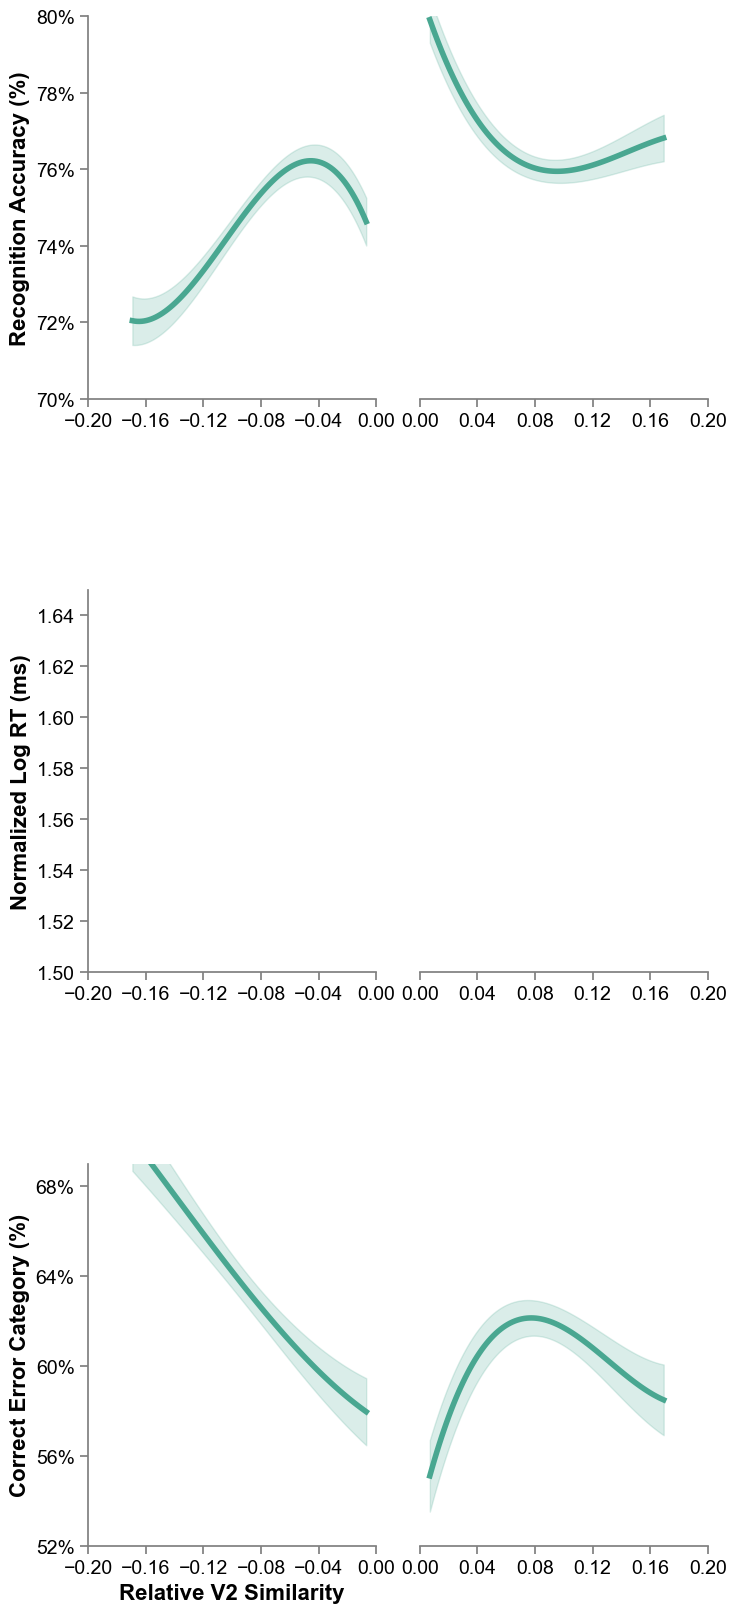

In [26]:
# Enhanced example usage with customizable parameters
plot_configs = [
    {
        'df': df,
        'x': "Tested - Untested V2 Distractor Similarity",
        'y': "Accuracy", 
        'hue': None,  
        'left_order': 3,
        'right_order': 3,
        'y_as_percentage': True,  # Format as percentages
        'y_percentage_step': 2,   # Every 4%
        'y_limits': (0.7, 0.8), # Custom y-axis limits
        'x_tick_step': 0.04,      # NEW: X-tick spacing
        'x_limits_left': (-0.2, 0),   # NEW: Left plot limits
        'x_limits_right': (0, 0.2),   # NEW: Right plot limits
        'font_family': 'Arial',
        'label_font_size': 16,    # Increased from 14
        'tick_font_size': 14      # Increased from 12
    },
    {
        'df': df_correct,
        'x': "Tested - Untested V2 Distractor Similarity",
        'y': 'WM RT',
        'hue': None,  
        'left_order': 1,
        'right_order': 2,
        'y_tick_step': 0.02,  # Custom y-axis step
        'y_limits': (1.5, 1.65),
        'x_tick_step': 0.04,      # NEW: X-tick spacing
        'x_limits_left': (-0.2, 0),   # NEW: Left plot limits
        'x_limits_right': (0, 0.2),   # NEW: Right plot limits
        'font_family': 'Arial',
        'label_font_size': 16,    # Increased from 14
        'tick_font_size': 14      # Increased from 12
    },
    {
        'df': df_cleaned,
        'x': "Tested - Untested V2 Distractor Similarity",
        'y': "Error Category Accuracy",
        'hue': None,  
        'left_order': 3,
        'right_order': 3,
        'y_as_percentage': True,  # Format as percentages
        'y_percentage_step': 4,   # Every 4%
        'y_limits': (0.52, 0.69),
        'y_tick_step': 0.04,  # Custom y-axis step
        'x_tick_step': 0.04,      # NEW: X-tick spacing
        'x_limits_left': (-0.2, 0),   # NEW: Left plot limits
        'x_limits_right': (0, 0.2),   # NEW: Right plot limits
        'font_family': 'Arial',
        'label_font_size': 16,    # Increased from 14
        'tick_font_size': 14      # Increased from 12
    }
]

# Create 3 rows x 2 columns grid (3 split plots stacked vertically) with reduced width
# Share y-axis within each row
fig, axes = plt.subplots(3, 2, figsize=(8, 18),  # Reduced width from 10 to 8
                        gridspec_kw={'hspace': 0.5, 'wspace': 0.15})
# Manually share y-axis for each row
for row in range(3):
    axes[row, 1].sharey(axes[row, 0])
fig.subplots_adjust(top=0.95)  # Top margin

# Set figure background to white
fig.patch.set_facecolor('white')

# Keep track of all handles and labels for shared legend
all_handles = []
all_labels = []

for i, config in enumerate(plot_configs):
    ax_left = axes[i, 0]
    ax_right = axes[i, 1]
    
    split_order_lmplot_subplot(
        df=config['df'],
        x=config['x'],
        y=config['y'],
        hue=config['hue'],
        split_value=0,
        left_order=config['left_order'],
        right_order=config['right_order'],
        ci=68,
        ax_left=ax_left,
        ax_right=ax_right,
        show_titles=False,  # No titles
        show_xlabel=(i == len(plot_configs) - 1),  # Only show x-label on last plot
        
        # Pass the custom formatting options with updated x-limits and ticks
        y_as_percentage=config.get('y_as_percentage', False),
        y_percentage_step=config.get('y_percentage_step', 2),
        y_limits=config.get('y_limits'),
        y_tick_step=config.get('y_tick_step'),
        x_tick_step=config.get('x_tick_step'),        # NEW
        x_limits_left=config.get('x_limits_left'),   # NEW
        x_limits_right=config.get('x_limits_right'), # NEW
        font_family=config.get('font_family', 'Arial'),
        label_font_size=config.get('label_font_size', 16),  # Increased from 14
        tick_font_size=config.get('tick_font_size', 14),    # Increased from 12
        title_font_size=18,  # Increased from 16
        legend_font_size=14  # Increased from 12
    )
    
    # Collect handles and labels from both subplots
    for ax in [ax_left, ax_right]:
        handles, labels = ax.get_legend_handles_labels()
        for handle, label in zip(handles, labels):
            if label not in all_labels:
                all_handles.append(handle)
                all_labels.append(label)

# Create one shared legend for the entire figure
if all_handles:
    fig.legend(all_handles, all_labels, loc='center', bbox_to_anchor=(0.5, 0.02), 
               ncol=len(all_labels), frameon=True, fontsize=14)  # Increased legend font size

plt.tight_layout()
plt.subplots_adjust(bottom=0.1, hspace=0.5, wspace=0.15, top=0.95)  # Reduced wspace from 0.3 to 0.15 (about half)
plt.show()

In [27]:
# 'y_limits': (0.7, 0.8), # Custom y-axis limits
# 'y_percentage_step': 2,   # Every 2%
# 'y_limits': (7.26, 7.34),
# 'y_tick_step': 0.02,  # Custom y-axis step
# 'y_limits': (0.52, 0.69),
# 'y_tick_step': 0.04,  # Custom y-axis step

In [28]:
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.ticker import FuncFormatter, MultipleLocator

# def combined_sliding_window_and_model_fit_split_col_subplot(df, x_col="Tested - Untested V2 Distractor Similarity", 
#                                                y_col='Accuracy', item_col=None,
#                                                split_col='v2_pos_neg', split_value=0,
#                                                window_percent=0.2, step_percent=0.02,
#                                                palette=None, aspect=0.7, figsize_height=6,
#                                                ax_left=None, ax_right=None,
#                                                y_limits=None, share_y=True,
                                               
#                                                # Robust regression options
#                                                trim_percentile=0,  # Trim extreme percentiles (0 = no trim)
                                               
#                                                # Font and color parameters
#                                                font_family='Arial', 
#                                                title_font_size=16, title_font_color='black', title_font_weight='bold',
#                                                label_font_size=14, label_font_color='black', label_font_weight='bold',
#                                                tick_font_size=12, tick_font_color='grey',
#                                                legend_font_size=10, legend_font_color='black',
                                               
#                                                # Axis formatting parameters
#                                                y_as_percentage=False, y_percentage_step=2, 
#                                                x_tick_step=None, y_tick_step=None,
#                                                x_limits=None,
                                               
#                                                # Visual parameters
#                                                rolling_line_width=1, model_line_width=5, 
#                                                confidence_alpha=0.2, rolling_alpha=0.9):
#     """
#     Enhanced sliding window and model fit with customizable fonts, colors, and robust options.
    
#     Parameters:
#     -----------
#     df : DataFrame
#         Input data
#     x_col, y_col : str
#         Column names for x and y axes
#     item_col : str, optional
#         Column name for grouping items
#     split_col : str
#         Column name for splitting data
#     split_value : float
#         Value to split the data at
#     window_percent, step_percent : float
#         Rolling window parameters
#     palette : list, optional
#         Color palette
#     aspect, figsize_height : float
#         Figure dimensions
#     ax_left, ax_right : matplotlib axes, optional
#         Axes to plot on
#     y_limits : tuple, optional
#         Custom y-axis limits
#     share_y : bool
#         Whether to share y-axis between subplots
    
#     Robust regression options:
#     trim_percentile : float
#         Remove extreme percentiles before fitting (e.g., 5 removes top/bottom 5%)
    
#     Font and color parameters:
#     font_family : str
#         Font family for all text
#     title_font_size, label_font_size, tick_font_size, legend_font_size : int
#         Font sizes for different elements
#     title_font_color, label_font_color, tick_font_color, legend_font_color : str
#         Font colors for different elements
#     title_font_weight, label_font_weight : str
#         Font weights ('normal', 'bold', etc.)
    
#     Axis formatting parameters:
#     y_as_percentage : bool
#         Whether to format y-axis as percentages
#     y_percentage_step : float
#         Step size for percentage ticks (e.g., 2 for every 2%)
#     x_tick_step, y_tick_step : float, optional
#         Custom tick step sizes
#     x_limits : tuple, optional
#         Custom x-axis limits
    
#     Visual parameters:
#     rolling_line_width, model_line_width : float
#         Line widths for rolling average and model fit
#     confidence_alpha, rolling_alpha : float
#         Alpha values for confidence bands and rolling lines
#     """
   
#     # Define colors
#     grey = '#BFBFBF'
#     blue = '#6cbcef'
#     teal = '#49a791'
#     purple = '#a271b1'
#     salmon = '#e58a72'
#     gold = '#dbad40'
#     green = '#95c355'
    
#     # Auto-select color based on x column if no palette provided
#     if palette is None:
#         if "IT Distractor Similarity" in x_col:
#             default_colors = [purple, grey]
#         elif "V2 Distractor Similarity" in x_col:
#             default_colors = [teal, grey]
#         else:
#             default_colors = [purple, grey]  # default
#     else:
#         default_colors = palette
    
#     # Color map for specific items
#     color_map = {
#         'prioritized': default_colors[0],    
#         'deprioritized': default_colors[1] if len(default_colors) > 1 else grey,  
#     }
    
#     # Split the data
#     df_left = df[df[x_col] <= split_value].copy()
#     df_right = df[df[x_col] > split_value].copy()
    
#     # If axes are provided, use them; otherwise create new figure
#     if ax_left is not None and ax_right is not None:
#         # Use provided axes
#         fig = ax_left.get_figure()
#         created_fig = False
#     else:
#         # Calculate figure width based on height and aspect ratio
#         figsize_width = 2 * figsize_height * aspect  # 2 panels * height * aspect
        
#         # Create figure with specified dimensions
#         fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(figsize_width, figsize_height), 
#                                                  sharey=share_y)
#         created_fig = True
    
#     # Set background colors
#     if created_fig:
#         fig.patch.set_facecolor('white')
#     ax_left.set_facecolor('white')
#     ax_right.set_facecolor('white')
    
#     # Create a consistent item to color mapping using ALL data (not just one side)
#     item_color_dict = {}
#     if item_col is not None and item_col in df.columns:
#         # Get all unique items from the entire dataset
#         all_items = df[item_col].unique()
        
#         # Create color mapping for all items
#         for i, item in enumerate(all_items):
#             item_lower = str(item).lower()
#             if item_lower in color_map:
#                 item_color_dict[item] = color_map[item_lower]
#             elif 'prioritized' in item_lower:
#                 item_color_dict[item] = color_map['prioritized']
#             elif 'deprioritized' in item_lower:
#                 item_color_dict[item] = color_map['deprioritized']
#             else:
#                 item_color_dict[item] = default_colors[i % len(default_colors)]
    
#     # Function to process data for each side
#     def process_side(df_side, ax, side_name, group_by_item=True):
#         if group_by_item and item_col is not None and item_col in df.columns:
#             # Process by item groups
#             items = df_side[item_col].unique()
            
#             # First, plot rolling averages (in background) - NO TRIMMING
#             for i, item in enumerate(items):
#                 df_item = df_side[df_side[item_col] == item].copy()
#                 df_item = df_item.sort_values(by=x_col).reset_index(drop=True)
#                 total_points = len(df_item)
                
#                 # Calculate window and step sizes for THIS SPECIFIC ITEM
#                 window_points = max(int(total_points * window_percent), 3)  # Ensure at least 3 points
#                 step_points = max(int(total_points * step_percent), 1)      # Ensure at least 1 point
                
#                 # Get color from the consistent global mapping
#                 color = item_color_dict.get(item, default_colors[i % len(default_colors)])
                
#                 # Add rolling average if enough points (using ALL data, no trimming)
#                 if total_points >= window_points:
#                     print(f"{side_name} side - {item}, Total points: {total_points}, "
#                           f"Window size: {window_points}, Step size: {step_points}")
                        
#                     x_vals, y_vals, y_errs = [], [], []
                    
#                     for j in range(0, total_points - window_points + 1, step_points):
#                         window = df_item.iloc[j:j+window_points]
                        
#                         mean_x = window[x_col].mean()
#                         mean_y = window[y_col].mean()
#                         std_y = window[y_col].std()
#                         sem_y = std_y / np.sqrt(window_points) if std_y > 0 else 0
                        
#                         x_vals.append(mean_x)
#                         y_vals.append(mean_y)
#                         y_errs.append(sem_y)
                    
#                     x_vals = np.array(x_vals)
#                     y_vals = np.array(y_vals)
#                     y_errs = np.array(y_errs)
                    
#                     if len(x_vals) > 0:
#                         # Rolling average with custom line width and alpha
#                         ax.plot(x_vals, y_vals, color=color, linewidth=rolling_line_width, 
#                                alpha=rolling_alpha, label=f'{item} (rolling)')
                        
#                         # Confidence bands with custom alpha
#                         ax.fill_between(x_vals, 
#                                        y_vals - 1.96 * y_errs,
#                                        y_vals + 1.96 * y_errs,
#                                        color=color, alpha=confidence_alpha)
            
#             # Then plot model fits (bold lines on top) - WITH TRIMMING
#             for i, item in enumerate(items):
#                 df_item = df_side[df_side[item_col] == item].copy()
                
#                 # Apply trim_percentile ONLY for model fit
#                 if trim_percentile > 0:
#                     lower_p = np.percentile(df_item[x_col], trim_percentile)
#                     upper_p = np.percentile(df_item[x_col], 100 - trim_percentile)
#                     df_item_trimmed = df_item[(df_item[x_col] >= lower_p) & (df_item[x_col] <= upper_p)]
#                 else:
#                     df_item_trimmed = df_item
                
#                 total_points = len(df_item_trimmed)
                
#                 # Get color from the consistent global mapping
#                 color = item_color_dict.get(item, default_colors[i % len(default_colors)])
                
#                 # Add model fit if enough points
#                 if total_points >= 5:  # Need at least 5 points for a reasonable quadratic fit
#                     # Calculate the effective range where rolling average can exist
#                     total_points_full = len(df_item)
#                     window_points_full = max(int(total_points_full * window_percent), 3)
                    
#                     # Rolling average can only exist where there are enough points for a window
#                     # So it starts at window_points_full//2 and ends at -(window_points_full//2)
#                     df_item_sorted = df_item.sort_values(by=x_col)
#                     rolling_min_x = df_item_sorted.iloc[window_points_full//2][x_col]
#                     rolling_max_x = df_item_sorted.iloc[-(window_points_full//2 + 1)][x_col]
                    
#                     # Constrain model fit range to not exceed rolling average range
#                     model_min_x = max(df_item_trimmed[x_col].min(), rolling_min_x)
#                     model_max_x = min(df_item_trimmed[x_col].max(), rolling_max_x)
                    
#                     # Only plot if we have a valid range
#                     if model_max_x > model_min_x:
#                         x_range = np.linspace(model_min_x, model_max_x, 100)
#                         model = np.poly1d(np.polyfit(df_item_trimmed[x_col], df_item_trimmed[y_col], 2))
                        
#                         # Bold model fit lines with custom line width
#                         ax.plot(x_range, model(x_range), color=color, linestyle='-', 
#                                 linewidth=model_line_width, label=f'{item} (model)')
#         else:
#             # Process all data as one group
#             df_side_copy = df_side.copy()
#             df_side_copy = df_side_copy.sort_values(by=x_col).reset_index(drop=True)
#             total_points = len(df_side_copy)
            
#             # Calculate window and step sizes for ALL DATA
#             window_points = max(int(total_points * window_percent), 3)  # Ensure at least 3 points
#             step_points = max(int(total_points * step_percent), 1)      # Ensure at least 1 point
            
#             color = default_colors[0]
            
#             # First plot rolling average (background) - NO TRIMMING, use all data
#             if total_points >= window_points:
#                 print(f"{side_name} side - All Data, Total points: {total_points}, "
#                       f"Window size: {window_points}, Step size: {step_points}")
                    
#                 x_vals, y_vals, y_errs = [], [], []
                
#                 for j in range(0, total_points - window_points + 1, step_points):
#                     window = df_side_copy.iloc[j:j+window_points]
                    
#                     mean_x = window[x_col].mean()
#                     mean_y = window[y_col].mean()
#                     std_y = window[y_col].std()
#                     sem_y = std_y / np.sqrt(window_points) if std_y > 0 else 0
                    
#                     x_vals.append(mean_x)
#                     y_vals.append(mean_y)
#                     y_errs.append(sem_y)
                
#                 x_vals = np.array(x_vals)
#                 y_vals = np.array(y_vals)
#                 y_errs = np.array(y_errs)
                
#                 if len(x_vals) > 0:
#                     # Rolling average with custom styling
#                     ax.plot(x_vals, y_vals, color=color, linewidth=rolling_line_width, 
#                            alpha=rolling_alpha, label='Rolling average')
                    
#                     # Confidence bands with custom alpha
#                     ax.fill_between(x_vals, 
#                                    y_vals - 1.96 * y_errs,
#                                    y_vals + 1.96 * y_errs,
#                                    color=color, alpha=confidence_alpha)
            
#             # Then plot model fit (bold, on top) - WITH TRIMMING
#             # Apply trim_percentile ONLY for model fit
#             if trim_percentile > 0:
#                 lower_p = np.percentile(df_side_copy[x_col], trim_percentile)
#                 upper_p = np.percentile(df_side_copy[x_col], 100 - trim_percentile)
#                 df_side_trimmed = df_side_copy[(df_side_copy[x_col] >= lower_p) & (df_side_copy[x_col] <= upper_p)]
#             else:
#                 df_side_trimmed = df_side_copy
            
#             total_points_trimmed = len(df_side_trimmed)
            
#             if total_points_trimmed >= 5:  # Need at least 5 points for a reasonable quadratic fit
#                 # Calculate the effective range where rolling average can exist
#                 window_points_full = max(int(total_points * window_percent), 3)
                
#                 # Rolling average can only exist where there are enough points for a window
#                 df_side_sorted = df_side_copy.sort_values(by=x_col)
#                 rolling_min_x = df_side_sorted.iloc[window_points_full//2][x_col]
#                 rolling_max_x = df_side_sorted.iloc[-(window_points_full//2 + 1)][x_col]
                
#                 # Constrain model fit range to not exceed rolling average range
#                 model_min_x = max(df_side_trimmed[x_col].min(), rolling_min_x)
#                 model_max_x = min(df_side_trimmed[x_col].max(), rolling_max_x)
                
#                 # Only plot if we have a valid range
#                 if model_max_x > model_min_x:
#                     x_range = np.linspace(model_min_x, model_max_x, 100)
#                     model = np.poly1d(np.polyfit(df_side_trimmed[x_col], df_side_trimmed[y_col], 3))
                    
#                     # Bold model fit line with custom line width
#                     ax.plot(x_range, model(x_range), color=color, linestyle='-', 
#                             linewidth=model_line_width, label='Model fit')
    
#     # Process both sides
#     use_item_col = (item_col is not None and item_col in df.columns)
#     process_side(df_left, ax_left, "Negative", use_item_col)
#     process_side(df_right, ax_right, "Positive", use_item_col)
    
#     # Set titles and labels with custom font styling
#     ax_left.set_title(f"{x_col} ≤ {split_value}", fontsize=title_font_size, 
#                      color=title_font_color, fontweight=title_font_weight, 
#                      fontfamily=font_family, pad=20)
#     ax_right.set_title(f"{x_col} > {split_value}", fontsize=title_font_size, 
#                       color=title_font_color, fontweight=title_font_weight, 
#                       fontfamily=font_family, pad=20)

#     # Custom axis labels with font styling
#     if x_col in ["Tested - Untested IT Distractor Similarity"]:
#         ax_left.set_xlabel("Relative IT Similarity", fontweight=label_font_weight, 
#                           fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
#         ax_right.set_xlabel("Relative IT Similarity", fontweight=label_font_weight, 
#                            fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
#     elif x_col in ["Tested - Untested V2 Distractor Similarity"]:
#         ax_left.set_xlabel("Relative V2 Similarity", fontweight=label_font_weight, 
#                           fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
#         ax_right.set_xlabel("Relative V2 Similarity", fontweight=label_font_weight, 
#                            fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
#     else:
#         ax_left.set_xlabel(x_col, fontweight=label_font_weight, fontsize=label_font_size, 
#                           color=label_font_color, fontfamily=font_family)
#         ax_right.set_xlabel(x_col, fontweight=label_font_weight, fontsize=label_font_size, 
#                            color=label_font_color, fontfamily=font_family)
    
#     # Set y-axis labels and formatting
#     if y_col.lower() in ['accuracy']:
#         if y_as_percentage:
#             ax_left.set_ylabel("Recognition Accuracy (%)", fontweight=label_font_weight, 
#                              fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
#             # Format y-axis as percentages and set custom ticks
#             ax_left.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y*100:.0f}%'))
#             if y_tick_step is None:
#                 y_tick_step = y_percentage_step / 100.0  # Convert percentage to decimal
#         else:
#             ax_left.set_ylabel("Recognition Accuracy (% Correct)", fontweight=label_font_weight, 
#                              fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
#     elif y_col.lower() in ['wm rt']:
#         ax_left.set_ylabel("Normalized Log RT (ms)", fontweight=label_font_weight, 
#                          fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
#     elif y_col.lower() in ['error category accuracy']:
#         ax_left.set_ylabel("Correct Error Category", fontweight=label_font_weight, 
#                          fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
#     else:
#         ax_left.set_ylabel(y_col, fontweight=label_font_weight, fontsize=label_font_size, 
#                          color=label_font_color, fontfamily=font_family)
    
#     # Set custom tick steps
#     if x_tick_step is not None:
#         ax_left.xaxis.set_major_locator(MultipleLocator(x_tick_step))
#         ax_right.xaxis.set_major_locator(MultipleLocator(x_tick_step))
    
#     if y_tick_step is not None:
#         ax_left.yaxis.set_major_locator(MultipleLocator(y_tick_step))
#         # ax_right shares y-axis if share_y=True, so no need to set it separately
    
#     # Set custom axis limits
#     if x_limits is not None:
#         ax_left.set_xlim(x_limits)
#         ax_right.set_xlim(x_limits)
    
#     # Style tick labels with custom fonts
#     for ax in [ax_left, ax_right]:
#         ax.tick_params(axis='x', colors=tick_font_color, labelsize=tick_font_size)
#         ax.tick_params(axis='y', colors=tick_font_color, labelsize=tick_font_size)
        
#         # Set font family for tick labels
#         for label in ax.get_xticklabels():
#             label.set_fontfamily(font_family)
#         for label in ax.get_yticklabels():
#             label.set_fontfamily(font_family)
    
#     # Style the axes
#     if share_y:
#         ax_right.yaxis.set_visible(False)
#         ax_right.spines['left'].set_visible(False)
    
#     ax_left.spines['right'].set_visible(False)
#     ax_right.spines['right'].set_visible(False)
#     ax_right.spines['top'].set_visible(False)
#     ax_left.spines['top'].set_visible(False)
    
#     # Remove grid
#     ax_left.grid(False)
#     ax_right.grid(False)

#     # Set y-limits based on y_limits parameter or y_col type
#     if y_limits is not None:
#         ax_left.set_ylim(y_limits)
#         if not share_y:
#             ax_right.set_ylim(y_limits)
#     elif y_col.lower() in ['accuracy', 'acc', 'correct', 'resp_correct']:
#         ax_left.set_ylim(0.6, 0.8)
#         if not share_y:
#             ax_right.set_ylim(0.6, 0.8)
    
#     # Add legend to right plot - only keep unique items by using set()
#     by_label = {}
#     for ax in [ax_left, ax_right]:
#         handles, labels = ax.get_legend_handles_labels()
#         # Group handles by labels and take the first handle for each label
#         for h, lbl in zip(handles, labels):
#             # Just use the item name without the "(rolling)" or "(model)" suffix
#             if "(" in lbl:
#                 base_label = lbl.split("(")[0].strip()
#             else:
#                 base_label = lbl
#             if base_label not in by_label:
#                 by_label[base_label] = h
    
#     # Place legend outside and below the plot if we created the figure
#     if by_label and created_fig:
#         legend = fig.legend(by_label.values(), by_label.keys(), 
#                           loc='lower center', ncol=len(by_label), bbox_to_anchor=(0.5, -0.05),
#                           fontsize=legend_font_size)
#         # Style legend text
#         for text in legend.get_texts():
#             text.set_fontfamily(font_family)
#             text.set_color(legend_font_color)
    
#     # Add main title if we created the figure
#     if created_fig:
#         window_percent_text = f"{window_percent*100:.0f}%"
#         title_suffix = f" by {item_col}" if use_item_col else ""
#         fig.suptitle(f'Rolling Average and Model Fit{title_suffix}', 
#                      fontweight=title_font_weight, fontsize=title_font_size, y=0.98,
#                      color=title_font_color, fontfamily=font_family)
        
#         plt.tight_layout()
#         plt.subplots_adjust(bottom=0.15)  # Make room for the legend
    
#     return fig


# # Enhanced example usage with robust options and custom styling
# y_limits_dict = {
#     'Accuracy': (0.62, 0.81),
#     'WM RT': (0.33, 0.48),  # Adjust these based on your RT scale
#     'Error Category Accuracy': (0.43, 0.73)  # Adjust based on your error scale
# }

# plot_configs = [
#     {
#         'df': df,
#         'x_col': "Tested - Untested V2 Distractor Similarity",
#         'y_col': "Accuracy",
#         # 'item_col': "Tested Item",
#         'split_col': "V2_pos_neg",
#         'split_value': 0,
#         'y_limits': y_limits_dict['Accuracy'],
#         'trim_percentile': 3,          # Remove extreme 3% from each tail
#         'y_as_percentage': True,       # Format as percentages
#         'y_percentage_step': 4,        # Every 4%
#         'font_family': 'Arial',
#         'label_font_size': 14,
#         'tick_font_size': 12
#     },
#     {
#         'df': df_correct,
#         'x_col': "Tested - Untested V2 Distractor Similarity",
#         'y_col': "WM RT",
#         # 'item_col': "Tested Item",
#         'split_col': "V2_pos_neg",
#         'split_value': 0,
#         # 'y_limits': y_limits_dict['WM RT'],
#         'trim_percentile': 5,          # Remove extreme 5% from each tail
#         'y_tick_step': 0.02,           # Custom y-axis step
#         'font_family': 'Arial',
#         'label_font_size': 14,
#         'tick_font_size': 12
#     },
#     {
#         'df': df_cleaned,
#         'x_col': "Tested - Untested V2 Distractor Similarity",
#         'y_col': "Error Category Accuracy",       
#         # 'item_col': "Tested Item",
#         'split_col': "V2_pos_neg",
#         'split_value': 0,
#         'y_limits': y_limits_dict['Error Category Accuracy'],
#         'trim_percentile': 2,          # Remove extreme 2% from each tail
#         'y_tick_step': 0.05,           # Custom y-axis step
#         'font_family': 'Arial',
#         'label_font_size': 14,
#         'tick_font_size': 12
#     }
# ]

# # Create a 3x2 grid with y-axes shared by row and increased spacing
# fig, axes = plt.subplots(3, 2, figsize=(12, 20))  # Increased height
# fig.subplots_adjust(hspace=0.5, wspace=0.3, top=0.95)  # Increased spacing and top margin

# # Keep track of all handles and labels for a shared legend
# all_handles = []
# all_labels = []

# # Iterate through rows
# for i, config in enumerate(plot_configs):
#     row = i
#     ax_left = axes[row, 0]
#     ax_right = axes[row, 1]
    
#     combined_sliding_window_and_model_fit_split_col_subplot(
#         config['df'],
#         x_col=config['x_col'],
#         y_col=config['y_col'],
#         item_col=config.get('item_col'),  # Use get to handle missing keys
#         split_col=None, #config['split_col'],
#         split_value=config['split_value'],
#         window_percent=0.2,
#         step_percent=0.02,
#         ax_left=ax_left,  # Pass the axes
#         ax_right=ax_right,  # Pass the axes
#         y_limits=config.get('y_limits', None),
#         share_y=True,
        
#         # Robust and styling options
#         trim_percentile=config.get('trim_percentile', 0),
#         y_as_percentage=config.get('y_as_percentage', False),
#         y_percentage_step=config.get('y_percentage_step', 2),
#         y_tick_step=config.get('y_tick_step'),
#         font_family=config.get('font_family', 'Arial'),
#         label_font_size=config.get('label_font_size', 14),
#         tick_font_size=config.get('tick_font_size', 12)
#     )
    
#     # Collect handles and labels from both subplots
#     for ax in [ax_left, ax_right]:
#         handles, labels = ax.get_legend_handles_labels()
#         for handle, label in zip(handles, labels):
#             # Clean up label to remove (rolling) or (model) suffix
#             if "(" in label:
#                 base_label = label.split("(")[0].strip()
#             else:
#                 base_label = label
#             if base_label not in all_labels:
#                 all_handles.append(handle)
#                 all_labels.append(base_label)

# # Create one shared legend for the entire figure
# if all_handles:
#     fig.legend(all_handles, all_labels, loc='center', bbox_to_anchor=(0.5, 0.02), 
#                ncol=len(all_labels), frameon=True, fontsize=12)

# plt.tight_layout()
# plt.subplots_adjust(bottom=0.1, hspace=0.5, wspace=0.3, top=0.95)  # Make room for shared legend and spacing
# plt.show()

In [29]:
# # Modified version that accepts axes for subplotting with custom y-limits
# def combined_sliding_window_and_model_fit_split_col_subplot(df, x_col="Tested - Untested V2 Distractor Similarity", 
#                                                y_col='Accuracy', item_col=None,
#                                                split_col='v2_pos_neg', split_value=0,
#                                                window_percent=0.2, step_percent=0.02,
#                                                palette=None, aspect=0.7, figsize_height=6,
#                                                ax_left=None, ax_right=None,
#                                                y_limits=None, share_y=True):
   
#     if palette is None:
#         default_colors = ['#1f77b4', '#ff7f0e', '#d62728', '#9467bd', '#8c564b']
#     else:
#         default_colors = palette
    
#     # Color map for specific items
#     color_map = {
#         'prioritized': default_colors[0],    
#         'deprioritized': default_colors[1],  
#     }
    
#     # Split the data
#     df_left = df[df[x_col] <= split_value].copy()
#     df_right = df[df[x_col] > split_value].copy()
    
#     # If axes are provided, use them; otherwise create new figure
#     if ax_left is not None and ax_right is not None:
#         # Use provided axes
#         fig = ax_left.get_figure()
#         created_fig = False
#     else:
#         # Calculate figure width based on height and aspect ratio
#         figsize_width = 2 * figsize_height * aspect  # 2 panels * height * aspect
        
#         # Create figure with specified dimensions
#         fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(figsize_width, figsize_height), 
#                                                  sharey=share_y)
#         created_fig = True
    
#     # Set background colors
#     if created_fig:
#         fig.patch.set_facecolor('white')
#     ax_left.set_facecolor('white')
#     ax_right.set_facecolor('white')
    
#     # Create a consistent item to color mapping using ALL data (not just one side)
#     item_color_dict = {}
#     if item_col is not None and item_col in df.columns:
#         # Get all unique items from the entire dataset
#         all_items = df[item_col].unique()
        
#         # Create color mapping for all items
#         for i, item in enumerate(all_items):
#             item_lower = str(item).lower()
#             if item_lower in color_map:
#                 item_color_dict[item] = color_map[item_lower]
#             elif 'prioritized' in item_lower:
#                 item_color_dict[item] = color_map['prioritized']
#             elif 'deprioritized' in item_lower:
#                 item_color_dict[item] = color_map['deprioritized']
#             else:
#                 item_color_dict[item] = default_colors[i % len(default_colors)]
    
#     # Function to process data for each side
#     def process_side(df_side, ax, side_name, group_by_item=True):
#         if group_by_item and item_col is not None and item_col in df.columns:
#             # Process by item groups
#             items = df_side[item_col].unique()
            
#             # First, plot rolling averages (in background)
#             for i, item in enumerate(items):
#                 df_item = df_side[df_side[item_col] == item].sort_values(by=x_col).reset_index(drop=True)
                
#                 total_points = len(df_item)
                
#                 # Calculate window and step sizes for THIS SPECIFIC ITEM
#                 window_points = max(int(total_points * window_percent), 3)  # Ensure at least 3 points
#                 step_points = max(int(total_points * step_percent), 1)      # Ensure at least 1 point
                
#                 # Get color from the consistent global mapping
#                 color = item_color_dict.get(item, default_colors[i % len(default_colors)])
                
#                 # Add rolling average if enough points
#                 if total_points >= window_points:
#                     print(f"{side_name} side - {item}, Total points: {total_points}, "
#                           f"Window size: {window_points}, Step size: {step_points}")
                        
#                     x_vals, y_vals, y_errs = [], [], []
                    
#                     for j in range(0, total_points - window_points + 1, step_points):
#                         window = df_item.iloc[j:j+window_points]
                        
#                         mean_x = window[x_col].mean()
#                         mean_y = window[y_col].mean()
#                         std_y = window[y_col].std()
#                         sem_y = std_y / np.sqrt(window_points)
                        
#                         x_vals.append(mean_x)
#                         y_vals.append(mean_y)
#                         y_errs.append(sem_y)
                    
#                     x_vals = np.array(x_vals)
#                     y_vals = np.array(y_vals)
#                     y_errs = np.array(y_errs)
                    
#                     if len(x_vals) > 0:
#                         # Very transparent rolling average
#                         ax.plot(x_vals, y_vals, color=color, linewidth=1, alpha=0.9, 
#                                label=f'{item} (rolling)')
                        
#                         # Very transparent confidence bands
#                         ax.fill_between(x_vals, 
#                                        y_vals - 1.96 * y_errs,
#                                        y_vals + 1.96 * y_errs,
#                                        color=color, alpha=0.2)
            
#             # Then plot model fits (bold lines on top)
#             for i, item in enumerate(items):
#                 df_item = df_side[df_side[item_col] == item]
#                 total_points = len(df_item)
                
#                 # Get color from the consistent global mapping
#                 color = item_color_dict.get(item, default_colors[i % len(default_colors)])
                
#                 # Add model fit if enough points
#                 if total_points >= 5:  # Need at least 5 points for a reasonable quadratic fit
#                     # Fit a 2nd order polynomial
#                     x_range = np.linspace(df_item[x_col].min(), df_item[x_col].max(), 100)
#                     model = np.poly1d(np.polyfit(df_item[x_col], df_item[y_col], 2))
                    
#                     # Bold model fit lines
#                     ax.plot(x_range, model(x_range), color=color, linestyle='-', 
#                             linewidth=5, label=f'{item} (model)')
#         else:
#             # Process all data as one group
#             df_side = df_side.sort_values(by=x_col).reset_index(drop=True)
#             total_points = len(df_side)
            
#             # Calculate window and step sizes for ALL DATA
#             window_points = max(int(total_points * window_percent), 3)  # Ensure at least 3 points
#             step_points = max(int(total_points * step_percent), 1)      # Ensure at least 1 point
            
#             color = default_colors[0]
            
#             # First plot rolling average (background)
#             if total_points >= window_points:
#                 print(f"{side_name} side - All Data, Total points: {total_points}, "
#                       f"Window size: {window_points}, Step size: {step_points}")
                    
#                 x_vals, y_vals, y_errs = [], [], []
                
#                 for j in range(0, total_points - window_points + 1, step_points):
#                     window = df_side.iloc[j:j+window_points]
                    
#                     mean_x = window[x_col].mean()
#                     mean_y = window[y_col].mean()
#                     std_y = window[y_col].std()
#                     sem_y = std_y / np.sqrt(window_points)
                    
#                     x_vals.append(mean_x)
#                     y_vals.append(mean_y)
#                     y_errs.append(sem_y)
                
#                 x_vals = np.array(x_vals)
#                 y_vals = np.array(y_vals)
#                 y_errs = np.array(y_errs)
                
#                 if len(x_vals) > 0:
#                     # Very transparent rolling average
#                     ax.plot(x_vals, y_vals, color=color, linewidth=1, alpha=0.9, 
#                            label='Rolling average')
                    
#                     # Very transparent confidence bands
#                     ax.fill_between(x_vals, 
#                                    y_vals - 1.96 * y_errs,
#                                    y_vals + 1.96 * y_errs,
#                                    color=color, alpha=0.2)
            
#             # Then plot model fit (bold, on top)
#             if total_points >= 5:  # Need at least 5 points for a reasonable quadratic fit
#                 # Fit a 2nd order polynomial
#                 x_range = np.linspace(df_side[x_col].min(), df_side[x_col].max(), 100)
#                 model = np.poly1d(np.polyfit(df_side[x_col], df_side[y_col], 3))
                
#                 # Bold model fit line
#                 ax.plot(x_range, model(x_range), color=color, linestyle='-', 
#                         linewidth=5, label='Model fit')
    
#     # Process both sides
#     use_item_col = (item_col is not None and item_col in df.columns)
#     process_side(df_left, ax_left, "Negative", use_item_col)
#     process_side(df_right, ax_right, "Positive", use_item_col)
    
#     # Set titles and labels
#     ax_left.set_title(f"{x_col} ≤ {split_value}")
#     ax_right.set_title(f"{x_col} > {split_value}")

#     ax_left.set_xlabel(x_col)
#     ax_right.set_xlabel(x_col)  # Add x-axis label to right subplot too
    
#     ax_left.set_ylabel(y_col)
    
#     # Style the axes
#     if share_y:
#         ax_right.yaxis.set_visible(False)
#         ax_right.spines['left'].set_visible(False)
    
#     ax_left.spines['right'].set_visible(False)
#     ax_right.spines['right'].set_visible(False)
#     ax_right.spines['top'].set_visible(False)
#     ax_left.spines['top'].set_visible(False)
    
#     # Remove grid
#     ax_left.grid(False)
#     ax_right.grid(False)

#     # Set y-limits based on y_limits parameter or y_col type
#     if y_limits is not None:
#         ax_left.set_ylim(y_limits)
#         if not share_y:
#             ax_right.set_ylim(y_limits)
#     elif y_col.lower() in ['accuracy', 'acc', 'correct', 'resp_correct']:
#         ax_left.set_ylim(0.6, 0.8)
#         if not share_y:
#             ax_right.set_ylim(0.6, 0.8)
    
#     # Add legend to right plot - only keep unique items by using set()
#     by_label = {}
#     for ax in [ax_left, ax_right]:
#         handles, labels = ax.get_legend_handles_labels()
#         # Group handles by labels and take the first handle for each label
#         for h, lbl in zip(handles, labels):
#             # Just use the item name without the "(rolling)" or "(model)" suffix
#             if "(" in lbl:
#                 base_label = lbl.split("(")[0].strip()
#             else:
#                 base_label = lbl
#             if base_label not in by_label:
#                 by_label[base_label] = h
    
#     # Place legend outside and below the plot if we created the figure
#     if by_label and created_fig:
#         fig.legend(by_label.values(), by_label.keys(), 
#                   loc='lower center', ncol=len(by_label), bbox_to_anchor=(0.5, -0.05))
    
#     # Add main title if we created the figure
#     if created_fig:
#         window_percent_text = f"{window_percent*100:.0f}%"
#         title_suffix = f" by {item_col}" if use_item_col else ""
#         fig.suptitle(f'Rolling Average and Model Fit{title_suffix}', 
#                      fontweight='bold', fontsize=14, y=0.98)
        
#         plt.tight_layout()
#         plt.subplots_adjust(bottom=0.15)  # Make room for the legend
    
#     return fig


# # Example usage with custom y-limits for each y-variable type
# y_limits_dict = {
#     'Accuracy': (0.62, 0.81),
#     'WM RT': (0.33, 0.48),  # Adjust these based on your RT scale
#     'Error Category Accuracy': (0.43, 0.73)  # Adjust based on your error scale
# }

# plot_configs = [
#     {
#         'df': df,
#         'x_col': "Tested - Untested V2 Distractor Similarity",
#         'y_col': "Accuracy",
#         'item_col': "Tested Item",
#         'split_col': "V2_pos_neg",
#         'split_value': 0,
#         'y_limits': y_limits_dict['Accuracy']
#     },
#     {
#         'df': df_correct,
#         'x_col': "Tested - Untested V2 Distractor Similarity",
#         'y_col': "WM RT",
#         'item_col': "Tested Item",
#         'split_col': "V2_pos_neg",
#         'split_value': 0,
#         # 'y_limits': y_limits_dict['WM RT']
#     },
#     {
#         'df': df_cleaned,
#         'x_col': "Tested - Untested V2 Distractor Similarity",
#         'y_col': "Error Category Accuracy",       
#         'item_col': "Tested Item",
#         'split_col': "V2_pos_neg",
#         'split_value': 0,
#         'y_limits': y_limits_dict['Error Category Accuracy']
#     }
# ]

# # Create a 3x2 grid with y-axes shared by row
# fig, axes = plt.subplots(3, 2, figsize=(12, 18), sharey='row')  # Share y-axes within each row

# # Keep track of all handles and labels for a shared legend
# all_handles = []
# all_labels = []

# # Iterate through rows
# for i, config in enumerate(plot_configs):
#     row = i
#     ax_left = axes[row, 0]
#     ax_right = axes[row, 1]
    
#     combined_sliding_window_and_model_fit_split_col_subplot(
#         config['df'],
#         x_col=config['x_col'],
#         y_col=config['y_col'],
#         # item_col=config['item_col'],  # Uncommented this
#         split_col=config['split_col'],
#         split_value=config['split_value'],
#         window_percent=0.2,
#         step_percent=0.02,
#         palette=['#90BDEC', '#BFBFBF'],
#         ax_left=ax_left,  # Pass the axes
#         ax_right=ax_right,  # Pass the axes
#         y_limits=config.get('y_limits', None),
#         share_y=True
#     )
    
#     # Collect handles and labels from both subplots
#     for ax in [ax_left, ax_right]:
#         handles, labels = ax.get_legend_handles_labels()
#         for handle, label in zip(handles, labels):
#             # Clean up label to remove (rolling) or (model) suffix
#             if "(" in label:
#                 base_label = label.split("(")[0].strip()
#             else:
#                 base_label = label
#             if base_label not in all_labels:
#                 all_handles.append(handle)
#                 all_labels.append(base_label)

# # Create one shared legend for the entire figure
# if all_handles:
#     fig.legend(all_handles, all_labels, loc='center', bbox_to_anchor=(0.5, 0.02), 
#                ncol=len(all_labels), frameon=True, fontsize=12)

# plt.tight_layout()
# plt.subplots_adjust(bottom=0.1)  # Make room for the shared legend
# plt.show()

Negative side - All Data, Total points: 19798, Window size: 3959, Step size: 395
  📊 Negative side - All Data Model Fit Exclusions:
     Total points: 19798
     No trimming applied
     Excluded by rolling constraint - Left edge: 1931
     Excluded by rolling constraint - Right edge: 1923
     Points used in model fit: 15944
     Total excluded: 3854
Positive side - All Data, Total points: 20135, Window size: 4027, Step size: 402
  📊 Positive side - All Data Model Fit Exclusions:
     Total points: 20135
     No trimming applied
     Excluded by rolling constraint - Left edge: 2003
     Excluded by rolling constraint - Right edge: 1998
     Points used in model fit: 16134
     Total excluded: 4001
Negative side - All Data, Total points: 14747, Window size: 2949, Step size: 294
  📊 Negative side - All Data Model Fit Exclusions:
     Total points: 14747
     No trimming applied
     Excluded by rolling constraint - Left edge: 1451
     Excluded by rolling constraint - Right edge: 1467
 

Locator attempting to generate 8031 ticks ([1463.18, ..., 1623.78]), which exceeds Locator.MAXTICKS (1000).


Positive side - All Data, Total points: 15449, Window size: 3089, Step size: 308
  📊 Positive side - All Data Model Fit Exclusions:
     Total points: 15449
     No trimming applied
     Excluded by rolling constraint - Left edge: 1528
     Excluded by rolling constraint - Right edge: 1526
     Points used in model fit: 12395
     Total excluded: 3054


Locator attempting to generate 8031 ticks ([1463.18, ..., 1623.78]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 8031 ticks ([1463.18, ..., 1623.78]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 8031 ticks ([1463.18, ..., 1623.78]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 8031 ticks ([1463.18, ..., 1623.78]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 8031 ticks ([1463.18, ..., 1623.78]), which exceeds Locator.MAXTICKS (1000).


Negative side - All Data, Total points: 4378, Window size: 875, Step size: 87
  📊 Negative side - All Data Model Fit Exclusions:
     Total points: 4378
     No trimming applied
     Excluded by rolling constraint - Left edge: 437
     Excluded by rolling constraint - Right edge: 419
     Points used in model fit: 3522
     Total excluded: 856
Positive side - All Data, Total points: 4056, Window size: 811, Step size: 81
  📊 Positive side - All Data Model Fit Exclusions:
     Total points: 4056
     No trimming applied
     Excluded by rolling constraint - Left edge: 393
     Excluded by rolling constraint - Right edge: 401
     Points used in model fit: 3262
     Total excluded: 794


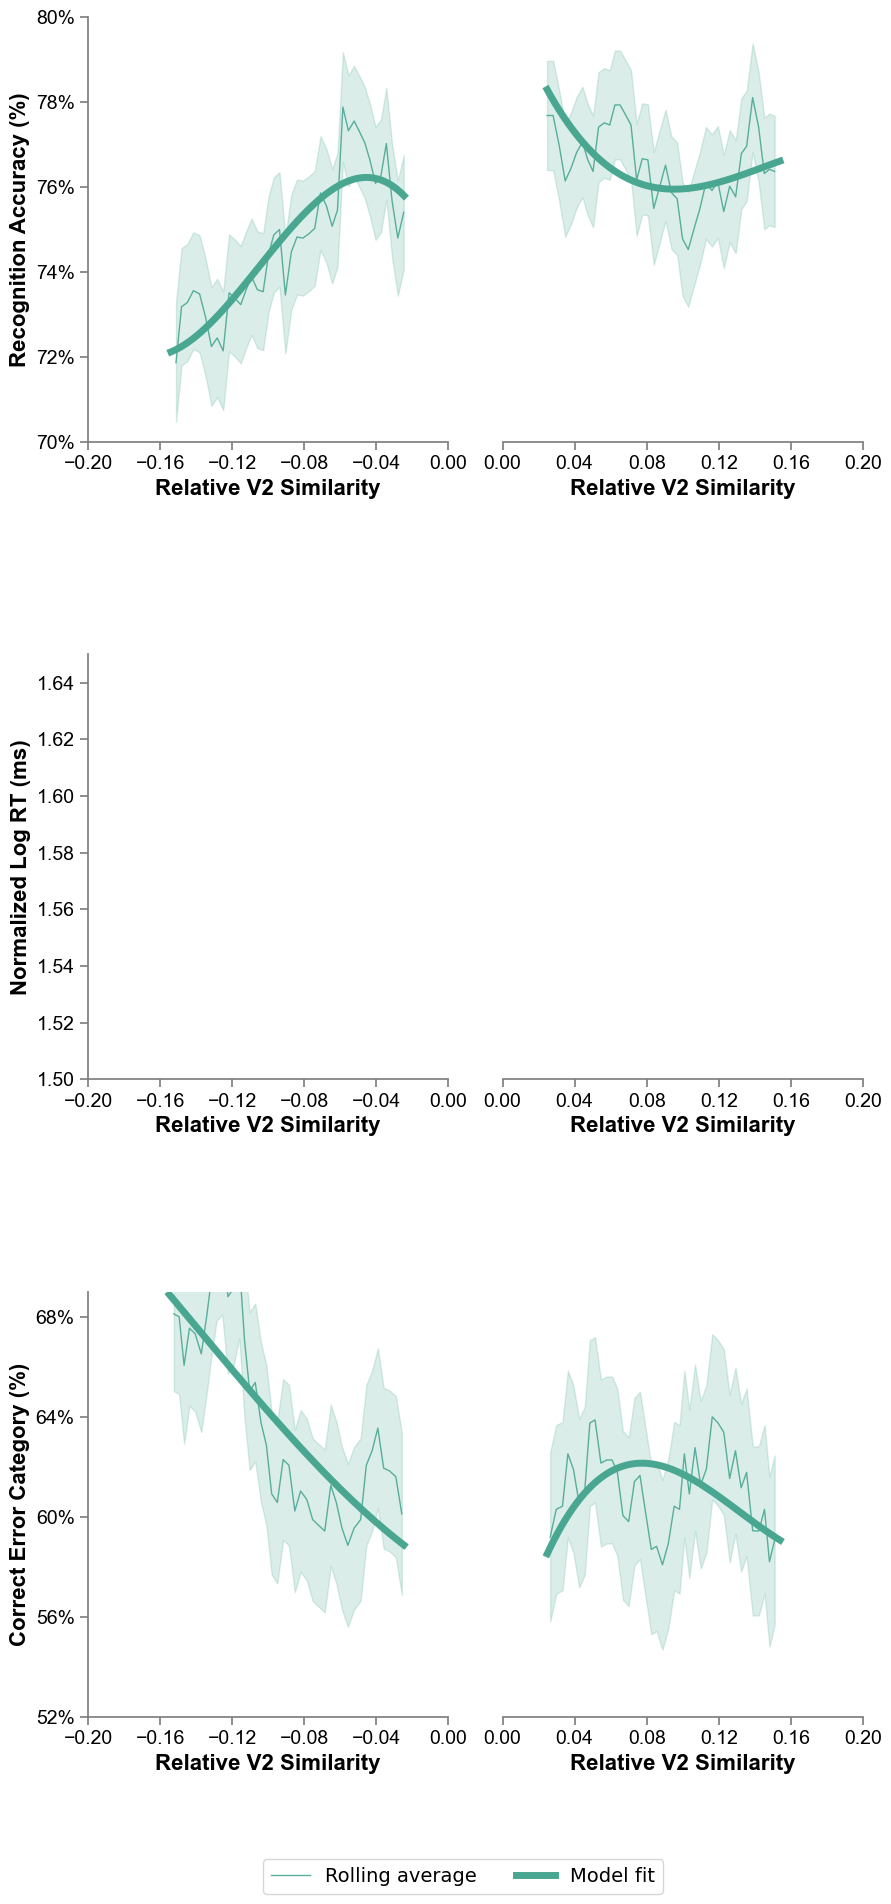

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter, MultipleLocator

def combined_sliding_window_and_model_fit_split_col_subplot(df, x_col="Tested - Untested V2 Distractor Similarity", 
                                               y_col='Accuracy', item_col=None,
                                               split_col='v2_pos_neg', split_value=0,
                                               window_percent=0.2, step_percent=0.02,
                                               palette=None, aspect=0.7, figsize_height=6,
                                               ax_left=None, ax_right=None,
                                               y_limits=None, share_y=True,
                                               # Model fit order parameters
                                               left_model_order=2, right_model_order=2,
                                               # Robust regression options
                                               trim_percentile=0,  # Trim extreme percentiles (0 = no trim)
                                               # Font and color parameters
                                               font_family='Arial', 
                                               title_font_size=18, title_font_color='black', title_font_weight='bold',
                                               label_font_size=16, label_font_color='black', label_font_weight='bold',
                                               tick_font_size=14, tick_font_color='black',
                                               legend_font_size=14, legend_font_color='black',
                                               # Axis formatting parameters
                                               y_as_percentage=False, y_percentage_step=2, 
                                               x_tick_step=None, y_tick_step=None,
                                               x_limits=None,
                                               # Visual parameters
                                               rolling_line_width=1, model_line_width=5, 
                                               confidence_alpha=0.2, rolling_alpha=0.9,
                                               # Title control
                                               show_titles=True):
    """
    Enhanced sliding window and model fit with customizable fonts, colors, and robust options.
    Parameters:
    -----------
    df : DataFrame
        Input data
    x_col, y_col : str
        Column names for x and y axes
    item_col : str, optional
        Column name for grouping items
    split_col : str
        Column name for splitting data
    split_value : float
        Value to split the data at
    window_percent, step_percent : float
        Rolling window parameters
    palette : list, optional
        Color palette
    aspect, figsize_height : float
        Figure dimensions
    ax_left, ax_right : matplotlib axes, optional
        Axes to plot on
    y_limits : tuple, optional
        Custom y-axis limits
    share_y : bool
        Whether to share y-axis between subplots
    Model fit order parameters:
    left_model_order, right_model_order : int
        Polynomial orders for left and right side model fits
    Robust regression options:
    trim_percentile : float
        Remove extreme percentiles before fitting (e.g., 5 removes top/bottom 5%)
    Font and color parameters:
    font_family : str
        Font family for all text
    title_font_size, label_font_size, tick_font_size, legend_font_size : int
        Font sizes for different elements
    title_font_color, label_font_color, tick_font_color, legend_font_color : str
        Font colors for different elements
    title_font_weight, label_font_weight : str
        Font weights ('normal', 'bold', etc.)
    Axis formatting parameters:
    y_as_percentage : bool
        Whether to format y-axis as percentages
    y_percentage_step : float
        Step size for percentage ticks (e.g., 2 for every 2%)
    x_tick_step, y_tick_step : float, optional
        Custom tick step sizes
    x_limits : tuple, optional
        Custom x-axis limits
    Visual parameters:
    rolling_line_width, model_line_width : float
        Line widths for rolling average and model fit
    confidence_alpha, rolling_alpha : float
        Alpha values for confidence bands and rolling lines
    Title control:
    show_titles : bool
        Whether to show subplot titles
    """
    # Define colors
    grey = '#BFBFBF'
    blue = '#6cbcef'
    teal = '#49a791'
    purple = '#a271b1'
    salmon = '#e58a72'
    gold = '#dbad40'
    green = '#95c355'
    
    # Auto-select color based on x column if no palette provided
    if palette is None:
        if "IT Distractor Similarity" in x_col:
            default_colors = [purple, grey]
        elif "V2 Distractor Similarity" in x_col:
            default_colors = [teal, grey]
        else:
            default_colors = [purple, grey]  # default
    else:
        default_colors = palette
    
    # Color map for specific items
    color_map = {
        'prioritized': default_colors[0],    
        'deprioritized': default_colors[1] if len(default_colors) > 1 else grey,  
    }
    
    # Split the data
    df_left = df[df[x_col] <= split_value].copy()
    df_right = df[df[x_col] > split_value].copy()
    
    # If axes are provided, use them; otherwise create new figure
    if ax_left is not None and ax_right is not None:
        # Use provided axes
        fig = ax_left.get_figure()
        created_fig = False
    else:
        # Calculate figure width based on height and aspect ratio
        figsize_width = 2 * figsize_height * aspect  # 2 panels * height * aspect
        # Create figure with specified dimensions
        fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(figsize_width, figsize_height), 
                                                 sharey=share_y)
        created_fig = True
    
    # Set background colors
    if created_fig:
        fig.patch.set_facecolor('white')
    ax_left.set_facecolor('white')
    ax_right.set_facecolor('white')
    
    # Create a consistent item to color mapping using ALL data (not just one side)
    item_color_dict = {}
    if item_col is not None and item_col in df.columns:
        # Get all unique items from the entire dataset
        all_items = df[item_col].unique()
        # Create color mapping for all items
        for i, item in enumerate(all_items):
            item_lower = str(item).lower()
            if item_lower in color_map:
                item_color_dict[item] = color_map[item_lower]
            elif 'prioritized' in item_lower:
                item_color_dict[item] = color_map['prioritized']
            elif 'deprioritized' in item_lower:
                item_color_dict[item] = color_map['deprioritized']
            else:
                item_color_dict[item] = default_colors[i % len(default_colors)]
    
    # Function to process data for each side
    def process_side(df_side, ax, side_name, model_order, group_by_item=True):
        if group_by_item and item_col is not None and item_col in df.columns:
            # Process by item groups
            items = df_side[item_col].unique()
            
            # First, plot rolling averages (in background) - NO TRIMMING
            for i, item in enumerate(items):
                df_item = df_side[df_side[item_col] == item].copy()
                df_item = df_item.sort_values(by=x_col).reset_index(drop=True)
                total_points = len(df_item)
                
                # Calculate window and step sizes for THIS SPECIFIC ITEM
                window_points = max(int(total_points * window_percent), 3)  # Ensure at least 3 points
                step_points = max(int(total_points * step_percent), 1)      # Ensure at least 1 point
                
                # Get color from the consistent global mapping
                color = item_color_dict.get(item, default_colors[i % len(default_colors)])
                
                # Add rolling average if enough points (using ALL data, no trimming)
                if total_points >= window_points:
                    print(f"{side_name} side - {item}, Total points: {total_points}, "
                          f"Window size: {window_points}, Step size: {step_points}")
                    
                    x_vals, y_vals, y_errs = [], [], []
                    for j in range(0, total_points - window_points + 1, step_points):
                        window = df_item.iloc[j:j+window_points]
                        mean_x = window[x_col].mean()
                        mean_y = window[y_col].mean()
                        std_y = window[y_col].std()
                        sem_y = std_y / np.sqrt(window_points) if std_y > 0 else 0
                        x_vals.append(mean_x)
                        y_vals.append(mean_y)
                        y_errs.append(sem_y)
                    
                    x_vals = np.array(x_vals)
                    y_vals = np.array(y_vals)
                    y_errs = np.array(y_errs)
                    
                    if len(x_vals) > 0:
                        # Rolling average with custom line width and alpha
                        ax.plot(x_vals, y_vals, color=color, linewidth=rolling_line_width, 
                               alpha=rolling_alpha, label=f'{item} (rolling)')
                        # Confidence bands with custom alpha
                        ax.fill_between(x_vals, 
                                       y_vals - 1.96 * y_errs,
                                       y_vals + 1.96 * y_errs,
                                       color=color, alpha=confidence_alpha)
            
            # Then plot model fits (bold lines on top) - WITH TRIMMING
            for i, item in enumerate(items):
                df_item = df_side[df_side[item_col] == item].copy()
                
                # Apply trim_percentile ONLY for model fit
                if trim_percentile > 0:
                    lower_p = np.percentile(df_item[x_col], trim_percentile)
                    upper_p = np.percentile(df_item[x_col], 100 - trim_percentile)
                    df_item_trimmed = df_item[(df_item[x_col] >= lower_p) & (df_item[x_col] <= upper_p)]
                else:
                    df_item_trimmed = df_item
                    
                total_points = len(df_item_trimmed)
                
                # Get color from the consistent global mapping
                color = item_color_dict.get(item, default_colors[i % len(default_colors)])
                
                # Add model fit if enough points
                if total_points >= 5:  # Need at least 5 points for a reasonable quadratic fit
                    # Calculate the effective range where rolling average can exist
                    total_points_full = len(df_item)
                    window_points_full = max(int(total_points_full * window_percent), 3)
                    
                    # Rolling average can only exist where there are enough points for a window
                    # So it starts at window_points_full//2 and ends at -(window_points_full//2)
                    df_item_sorted = df_item.sort_values(by=x_col)
                    rolling_min_x = df_item_sorted.iloc[window_points_full//2][x_col]
                    rolling_max_x = df_item_sorted.iloc[-(window_points_full//2 + 1)][x_col]
                    
                    # Count points excluded by rolling average constraint (before trimming)
                    points_below_rolling = len(df_item_trimmed[df_item_trimmed[x_col] < rolling_min_x])
                    points_above_rolling = len(df_item_trimmed[df_item_trimmed[x_col] > rolling_max_x])
                    
                    # Constrain model fit range to not exceed rolling average range
                    model_min_x = max(df_item_trimmed[x_col].min(), rolling_min_x)
                    model_max_x = min(df_item_trimmed[x_col].max(), rolling_max_x)
                    
                    # Count points actually used in model fit
                    points_in_model = len(df_item_trimmed[
                        (df_item_trimmed[x_col] >= model_min_x) & 
                        (df_item_trimmed[x_col] <= model_max_x)
                    ])
                    
                    # Count points excluded by trimming
                    points_excluded_by_trim = len(df_item) - len(df_item_trimmed)
                    
                    # Print exclusion report
                    print(f"  📊 {side_name} side - {item} Model Fit Exclusions:")
                    print(f"     Total points: {len(df_item)}")
                    if trim_percentile > 0:
                        print(f"     Excluded by trimming ({trim_percentile}%): {points_excluded_by_trim}")
                        print(f"     Remaining after trim: {len(df_item_trimmed)}")
                    else:
                        print(f"     No trimming applied")
                    print(f"     Excluded by rolling constraint - Left edge: {points_below_rolling}")
                    print(f"     Excluded by rolling constraint - Right edge: {points_above_rolling}")
                    print(f"     Points used in model fit: {points_in_model}")
                    print(f"     Total excluded: {len(df_item) - points_in_model}")
                    
                    # Only plot if we have a valid range
                    if model_max_x > model_min_x:
                        x_range = np.linspace(model_min_x, model_max_x, 100)
                        model = np.poly1d(np.polyfit(df_item_trimmed[x_col], df_item_trimmed[y_col], model_order))
                        # Bold model fit lines with custom line width
                        ax.plot(x_range, model(x_range), color=color, linestyle='-', 
                                linewidth=model_line_width, label=f'{item} (model)')
        else:
            # Process all data as one group
            df_side_copy = df_side.copy()
            df_side_copy = df_side_copy.sort_values(by=x_col).reset_index(drop=True)
            total_points = len(df_side_copy)
            
            # Calculate window and step sizes for ALL DATA
            window_points = max(int(total_points * window_percent), 3)  # Ensure at least 3 points
            step_points = max(int(total_points * step_percent), 1)      # Ensure at least 1 point
            
            color = default_colors[0]
            
            # First plot rolling average (background) - NO TRIMMING, use all data
            if total_points >= window_points:
                print(f"{side_name} side - All Data, Total points: {total_points}, "
                      f"Window size: {window_points}, Step size: {step_points}")
                
                x_vals, y_vals, y_errs = [], [], []
                for j in range(0, total_points - window_points + 1, step_points):
                    window = df_side_copy.iloc[j:j+window_points]
                    mean_x = window[x_col].mean()
                    mean_y = window[y_col].mean()
                    std_y = window[y_col].std()
                    sem_y = std_y / np.sqrt(window_points) if std_y > 0 else 0
                    x_vals.append(mean_x)
                    y_vals.append(mean_y)
                    y_errs.append(sem_y)
                
                x_vals = np.array(x_vals)
                y_vals = np.array(y_vals)
                y_errs = np.array(y_errs)
                
                if len(x_vals) > 0:
                    # Rolling average with custom styling
                    ax.plot(x_vals, y_vals, color=color, linewidth=rolling_line_width, 
                           alpha=rolling_alpha, label='Rolling average')
                    # Confidence bands with custom alpha
                    ax.fill_between(x_vals, 
                                   y_vals - 1.96 * y_errs,
                                   y_vals + 1.96 * y_errs,
                                   color=color, alpha=confidence_alpha)
            
            # Then plot model fit (bold, on top) - WITH TRIMMING
            # Apply trim_percentile ONLY for model fit
            if trim_percentile > 0:
                lower_p = np.percentile(df_side_copy[x_col], trim_percentile)
                upper_p = np.percentile(df_side_copy[x_col], 100 - trim_percentile)
                df_side_trimmed = df_side_copy[(df_side_copy[x_col] >= lower_p) & (df_side_copy[x_col] <= upper_p)]
            else:
                df_side_trimmed = df_side_copy
                
            total_points_trimmed = len(df_side_trimmed)
            
            if total_points_trimmed >= 5:  # Need at least 5 points for a reasonable quadratic fit
                # Calculate the effective range where rolling average can exist
                window_points_full = max(int(total_points * window_percent), 3)
                
                # Rolling average can only exist where there are enough points for a window
                df_side_sorted = df_side_copy.sort_values(by=x_col)
                rolling_min_x = df_side_sorted.iloc[window_points_full//2][x_col]
                rolling_max_x = df_side_sorted.iloc[-(window_points_full//2 + 1)][x_col]
                
                # Count points excluded by rolling average constraint (before trimming)
                points_below_rolling = len(df_side_trimmed[df_side_trimmed[x_col] < rolling_min_x])
                points_above_rolling = len(df_side_trimmed[df_side_trimmed[x_col] > rolling_max_x])
                
                # Constrain model fit range to not exceed rolling average range
                model_min_x = max(df_side_trimmed[x_col].min(), rolling_min_x)
                model_max_x = min(df_side_trimmed[x_col].max(), rolling_max_x)
                
                # Count points actually used in model fit
                points_in_model = len(df_side_trimmed[
                    (df_side_trimmed[x_col] >= model_min_x) & 
                    (df_side_trimmed[x_col] <= model_max_x)
                ])
                
                # Count points excluded by trimming
                points_excluded_by_trim = len(df_side_copy) - len(df_side_trimmed)
                
                # Print exclusion report
                print(f"  📊 {side_name} side - All Data Model Fit Exclusions:")
                print(f"     Total points: {len(df_side_copy)}")
                if trim_percentile > 0:
                    print(f"     Excluded by trimming ({trim_percentile}%): {points_excluded_by_trim}")
                    print(f"     Remaining after trim: {len(df_side_trimmed)}")
                else:
                    print(f"     No trimming applied")
                print(f"     Excluded by rolling constraint - Left edge: {points_below_rolling}")
                print(f"     Excluded by rolling constraint - Right edge: {points_above_rolling}")
                print(f"     Points used in model fit: {points_in_model}")
                print(f"     Total excluded: {len(df_side_copy) - points_in_model}")
                
                # Only plot if we have a valid range
                if model_max_x > model_min_x:
                    x_range = np.linspace(model_min_x, model_max_x, 100)
                    model = np.poly1d(np.polyfit(df_side_trimmed[x_col], df_side_trimmed[y_col], model_order))
                    # Bold model fit line with custom line width
                    ax.plot(x_range, model(x_range), color=color, linestyle='-', 
                            linewidth=model_line_width, label='Model fit')
    
    # Process both sides with different model orders
    use_item_col = (item_col is not None and item_col in df.columns)
    process_side(df_left, ax_left, "Negative", left_model_order, use_item_col)
    process_side(df_right, ax_right, "Positive", right_model_order, use_item_col)
    
    # Set titles and labels with custom font styling - only if show_titles is True
    if show_titles:
        ax_left.set_title(f"{x_col} ≤ {split_value}", fontsize=title_font_size, 
                         color=title_font_color, fontweight=title_font_weight, 
                         fontfamily=font_family, pad=20)
        ax_right.set_title(f"{x_col} > {split_value}", fontsize=title_font_size, 
                          color=title_font_color, fontweight=title_font_weight, 
                          fontfamily=font_family, pad=20)
    
    # Custom axis labels with font styling
    if x_col in ["Tested - Untested IT Distractor Similarity"]:
        ax_left.set_xlabel("Relative IT Similarity", fontweight=label_font_weight, 
                          fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
        ax_right.set_xlabel("Relative IT Similarity", fontweight=label_font_weight, 
                           fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
    elif x_col in ["Tested - Untested V2 Distractor Similarity"]:
        ax_left.set_xlabel("Relative V2 Similarity", fontweight=label_font_weight, 
                          fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
        ax_right.set_xlabel("Relative V2 Similarity", fontweight=label_font_weight, 
                           fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
    else:
        ax_left.set_xlabel(x_col, fontweight=label_font_weight, fontsize=label_font_size, 
                          color=label_font_color, fontfamily=font_family)
        ax_right.set_xlabel(x_col, fontweight=label_font_weight, fontsize=label_font_size, 
                           color=label_font_color, fontfamily=font_family)
    
    # Set y-axis labels and formatting for left side only
    if y_col.lower() in ['accuracy']:
        if y_as_percentage:
            ax_left.set_ylabel("Recognition Accuracy (%)", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
            # Format y-axis as percentages - only for left side
            ax_left.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'{y*100:.0f}%'))
            if y_tick_step is None:
                y_tick_step = y_percentage_step / 100.0  # Convert percentage to decimal
        else:
            ax_left.set_ylabel("Recognition Accuracy (% Correct)", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
    elif y_col.lower() in ['wm rt']:
        ax_left.set_ylabel("Normalized Log RT (ms)", fontweight=label_font_weight, 
                         fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
    elif y_col.lower() in ['error category accuracy']:
        if y_as_percentage:
            ax_left.set_ylabel("Correct Error Category (%)", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
            # Format y-axis as percentages - only for left side
            ax_left.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'{y*100:.0f}%'))
            if y_tick_step is None:
                y_tick_step = y_percentage_step / 100.0  # Convert percentage to decimal
        else:
            ax_left.set_ylabel("Correct Error Category", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
    else:
        ax_left.set_ylabel(y_col, fontweight=label_font_weight, fontsize=label_font_size, 
                         color=label_font_color, fontfamily=font_family)
    
    # Set custom tick steps for both axes
    if x_tick_step is not None:
        ax_left.xaxis.set_major_locator(MultipleLocator(x_tick_step))
        ax_right.xaxis.set_major_locator(MultipleLocator(x_tick_step))
    
    if y_tick_step is not None:
        ax_left.yaxis.set_major_locator(MultipleLocator(y_tick_step))
        if not share_y:  # Only apply to right if y-axis is visible
            ax_right.yaxis.set_major_locator(MultipleLocator(y_tick_step))
    
    # Set custom axis limits
    if x_limits is not None:
        # Apply split-appropriate x-limits
        # Left side gets data <= split_value, right side gets data > split_value
        x_min, x_max = x_limits
        ax_left.set_xlim(x_min, split_value)
        ax_right.set_xlim(split_value, x_max)
    
    # Style tick labels with custom fonts (numbers black, axis lines grey)
    spine_color = 'grey'
    for ax in [ax_left, ax_right]:
        ax.tick_params(axis='x', colors=spine_color, labelsize=tick_font_size)
        ax.tick_params(axis='y', colors=spine_color, labelsize=tick_font_size)
        ax.tick_params(axis='x', labelcolor=tick_font_color)  # x-axis labels black
        ax.tick_params(axis='y', labelcolor=tick_font_color)  # y-axis labels black
        # Set font family for tick labels
        for label in ax.get_xticklabels():
            label.set_fontfamily(font_family)
        for label in ax.get_yticklabels():
            label.set_fontfamily(font_family)
    
    # Style the axes - make y-axis invisible on right side
    if share_y:
        ax_right.yaxis.set_visible(False)
        ax_right.spines['left'].set_visible(False)
    
    # Set spine colors to grey
    for ax in [ax_left, ax_right]:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_color(spine_color)
        ax.spines['left'].set_color(spine_color)
    
    # Make sure both plots have the same y-axis scale but only left shows labels
    if not share_y:
        # If not sharing y, make sure right plot has same y-axis label
        if y_col.lower() in ['accuracy']:
            if y_as_percentage:
                ax_right.set_ylabel("Recognition Accuracy (%)", fontweight=label_font_weight, 
                                   fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
                ax_right.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'{y*100:.0f}%'))
            else:
                ax_right.set_ylabel("Recognition Accuracy (% Correct)", fontweight=label_font_weight, 
                                   fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
        elif y_col.lower() in ['wm rt']:
            ax_right.set_ylabel("Normalized Log RT (ms)", fontweight=label_font_weight, 
                               fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
        elif y_col.lower() in ['error category accuracy']:
            if y_as_percentage:
                ax_right.set_ylabel("Correct Error Category (%)", fontweight=label_font_weight, 
                                   fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
                ax_right.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'{y*100:.0f}%'))
            else:
                ax_right.set_ylabel("Correct Error Category", fontweight=label_font_weight, 
                                   fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
        else:
            ax_right.set_ylabel(y_col, fontweight=label_font_weight, fontsize=label_font_size, 
                               color=label_font_color, fontfamily=font_family)
    
    # Remove grid
    ax_left.grid(False)
    ax_right.grid(False)
    
    # Set y-limits based on y_limits parameter or y_col type
    if y_limits is not None:
        ax_left.set_ylim(y_limits)
        ax_right.set_ylim(y_limits)  # Apply to both sides
    elif y_col.lower() in ['accuracy', 'acc', 'correct', 'resp_correct']:
        ax_left.set_ylim(0.6, 0.8)
        ax_right.set_ylim(0.6, 0.8)  # Apply to both sides
    
    # Add legend to right plot - only keep unique items by using set()
    by_label = {}
    for ax in [ax_left, ax_right]:
        handles, labels = ax.get_legend_handles_labels()
        # Group handles by labels and take the first handle for each label
        for h, lbl in zip(handles, labels):
            # Just use the item name without the "(rolling)" or "(model)" suffix
            if "(" in lbl:
                base_label = lbl.split("(")[0].strip()
            else:
                base_label = lbl
            if base_label not in by_label:
                by_label[base_label] = h
    
    # Place legend outside and below the plot if we created the figure
    if by_label and created_fig:
        legend = fig.legend(by_label.values(), by_label.keys(), 
                          loc='lower center', ncol=len(by_label), bbox_to_anchor=(0.5, -0.05),
                          fontsize=legend_font_size)
        # Style legend text
        for text in legend.get_texts():
            text.set_fontfamily(font_family)
            text.set_color(legend_font_color)
    
    # Add main title if we created the figure
    if created_fig:
        window_percent_text = f"{window_percent*100:.0f}%"
        title_suffix = f" by {item_col}" if use_item_col else ""
        fig.suptitle(f'Rolling Average and Model Fit{title_suffix}', 
                     fontweight=title_font_weight, fontsize=title_font_size, y=0.98,
                     color=title_font_color, fontfamily=font_family)
        plt.subplots_adjust(bottom=0.15)  # Make room for the legend
    
    return fig


# Enhanced example usage with robust options and custom styling
y_limits_dict = {
    'Accuracy': (0.7, 0.8),
    'WM RT': (1.5, 1.65),  # Adjust these based on your RT scale
    'Error Category Accuracy': (0.52, 0.69)  # Adjust based on your error scale
}

# Configuration for your plots
plot_configs = [
    {
        'df': df,  # Replace with your dataframe variable
        'x_col': "Tested - Untested V2 Distractor Similarity",
        'y_col': "Accuracy",
        # 'item_col': "Tested Item",  # Uncomment if you want to group by items
        'split_col': "V2_pos_neg",
        'split_value': 0,
        'y_limits': y_limits_dict['Accuracy'],
        'x_limits': (-0.2, 0.2),     # Custom x-axis limits
        'x_tick_step': 0.04,           # Custom x-axis tick step
        'left_model_order': 3,         # 3rd order polynomial for left side
        'right_model_order': 3,        # 3rd order polynomial for right side
        'trim_percentile': 0,          # No trimming
        'y_as_percentage': True,       # Format as percentages
        'y_percentage_step': 2,        # Every 2%
        'font_family': 'Arial',
        'label_font_size': 16,
        'tick_font_size': 14
    },
    {
        'df': df_correct,  # Replace with your dataframe variable
        'x_col': "Tested - Untested V2 Distractor Similarity",
        'y_col': "WM RT",
        # 'item_col': "Tested Item",  # Uncomment if you want to group by items
        'split_col': "V2_pos_neg",
        'split_value': 0,
        'y_limits': y_limits_dict['WM RT'],
        'x_limits': (-0.2, 0.2),     # Custom x-axis limits
        'x_tick_step': 0.04,           # Custom x-axis tick step
        'left_model_order': 1,         # 1st order (linear) for left side
        'right_model_order': 2,        # 2nd order for right side
        'trim_percentile': 0,          # No trimming
        'y_tick_step': 0.02,           # Custom y-axis step
        'font_family': 'Arial',
        'label_font_size': 16,
        'tick_font_size': 14
    },
    {
        'df': df_cleaned,  # Replace with your dataframe variable
        'x_col': "Tested - Untested V2 Distractor Similarity",
        'y_col': "Error Category Accuracy",       
        # 'item_col': "Tested Item",  # Uncomment if you want to group by items
        'split_col': "V2_pos_neg",
        'split_value': 0,
        'y_limits': y_limits_dict['Error Category Accuracy'],
        'x_limits': (-0.2, 0.2),     # Custom x-axis limits
        'x_tick_step': 0.04,           # Custom x-axis tick step
        'left_model_order': 3,         # 3rd order for left side
        'right_model_order': 3,        # 3rd order for right side
        'trim_percentile': 0,          # No trimming
        'y_as_percentage': True,       # Format as percentages
        'y_percentage_step': 4,        # Every 4%
        'y_tick_step': 0.04,           # Custom y-axis step
        'font_family': 'Arial',
        'label_font_size': 16,
        'tick_font_size': 14
    }
]

# Create a 3x2 grid with y-axes shared by row and reduced width
fig, axes = plt.subplots(3, 2, figsize=(10, 20), sharey='row')  # Reduced width from 12 to 10
fig.subplots_adjust(hspace=0.5, wspace=0.15, top=0.95)  # Reduced wspace from 0.3 to 0.15

# Keep track of all handles and labels for a shared legend
all_handles = []
all_labels = []

# Iterate through rows
for i, config in enumerate(plot_configs):
    row = i
    ax_left = axes[row, 0]
    ax_right = axes[row, 1]
    
    combined_sliding_window_and_model_fit_split_col_subplot(
        config['df'],
        x_col=config['x_col'],
        y_col=config['y_col'],
        item_col=config.get('item_col'),  # Use get to handle missing keys
        split_col=config['split_col'],
        split_value=config['split_value'],
        window_percent=0.2,
        step_percent=0.02,
        ax_left=ax_left,  # Pass the axes
        ax_right=ax_right,  # Pass the axes
        y_limits=config.get('y_limits', None),
        x_limits=config.get('x_limits', None),  # Custom x-axis limits from config
        x_tick_step=config.get('x_tick_step', None),  # Custom x-axis tick step from config
        share_y=True,
        # Model fit orders
        left_model_order=config.get('left_model_order', 1),
        right_model_order=config.get('right_model_order', 2),
        # Robust and styling options
        trim_percentile=config.get('trim_percentile', 0),
        y_as_percentage=config.get('y_as_percentage', False),
        y_percentage_step=config.get('y_percentage_step', 2),
        y_tick_step=config.get('y_tick_step'),
        font_family=config.get('font_family', 'Arial'),
        label_font_size=config.get('label_font_size', 16),
        tick_font_size=config.get('tick_font_size', 14),
        title_font_size=18,
        legend_font_size=14,
        show_titles=False  # No titles
    )
    
    # Collect handles and labels from both subplots
    for ax in [ax_left, ax_right]:
        handles, labels = ax.get_legend_handles_labels()
        for handle, label in zip(handles, labels):
            # Clean up label to remove (rolling) or (model) suffix
            if "(" in label:
                base_label = label.split("(")[0].strip()
            else:
                base_label = label
            if base_label not in all_labels:
                all_handles.append(handle)
                all_labels.append(base_label)

# Create one shared legend for the entire figure
if all_handles:
    fig.legend(all_handles, all_labels, loc='center', bbox_to_anchor=(0.5, 0.02), 
               ncol=len(all_labels), frameon=True, fontsize=14)

# Manual layout adjustment
plt.subplots_adjust(bottom=0.1, hspace=0.5, wspace=0.15, top=0.95)
plt.show()

Negative side - All Data, Total points: 20097, Window size: 4019, Step size: 200
  📊 Negative side - All Data Model Fit Exclusions:
     Total points: 20097
     No trimming applied
     Excluded by rolling constraint - Left edge: 1992
     Excluded by rolling constraint - Right edge: 1961
     Points used in model fit: 16144
     Total excluded: 3953
Positive side - All Data, Total points: 19836, Window size: 3967, Step size: 198
  📊 Positive side - All Data Model Fit Exclusions:
     Total points: 19836
     No trimming applied
     Excluded by rolling constraint - Left edge: 1971
     Excluded by rolling constraint - Right edge: 1953
     Points used in model fit: 15912
     Total excluded: 3924
Negative side - All Data, Total points: 14944, Window size: 2988, Step size: 149
  📊 Negative side - All Data Model Fit Exclusions:
     Total points: 14944
     No trimming applied
     Excluded by rolling constraint - Left edge: 1457
     Excluded by rolling constraint - Right edge: 1455
 

Locator attempting to generate 3597 ticks ([1479.24, ..., 1623.08]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3597 ticks ([1479.24, ..., 1623.08]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3597 ticks ([1479.24, ..., 1623.08]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3597 ticks ([1479.24, ..., 1623.08]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3597 ticks ([1479.24, ..., 1623.08]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3597 ticks ([1479.24, ..., 1623.08]), which exceeds Locator.MAXTICKS (1000).


Negative side - All Data, Total points: 4485, Window size: 897, Step size: 44
  📊 Negative side - All Data Model Fit Exclusions:
     Total points: 4485
     No trimming applied
     Excluded by rolling constraint - Left edge: 436
     Excluded by rolling constraint - Right edge: 441
     Points used in model fit: 3608
     Total excluded: 877
Positive side - All Data, Total points: 3949, Window size: 789, Step size: 39
  📊 Positive side - All Data Model Fit Exclusions:
     Total points: 3949
     No trimming applied
     Excluded by rolling constraint - Left edge: 378
     Excluded by rolling constraint - Right edge: 389
     Points used in model fit: 3182
     Total excluded: 767


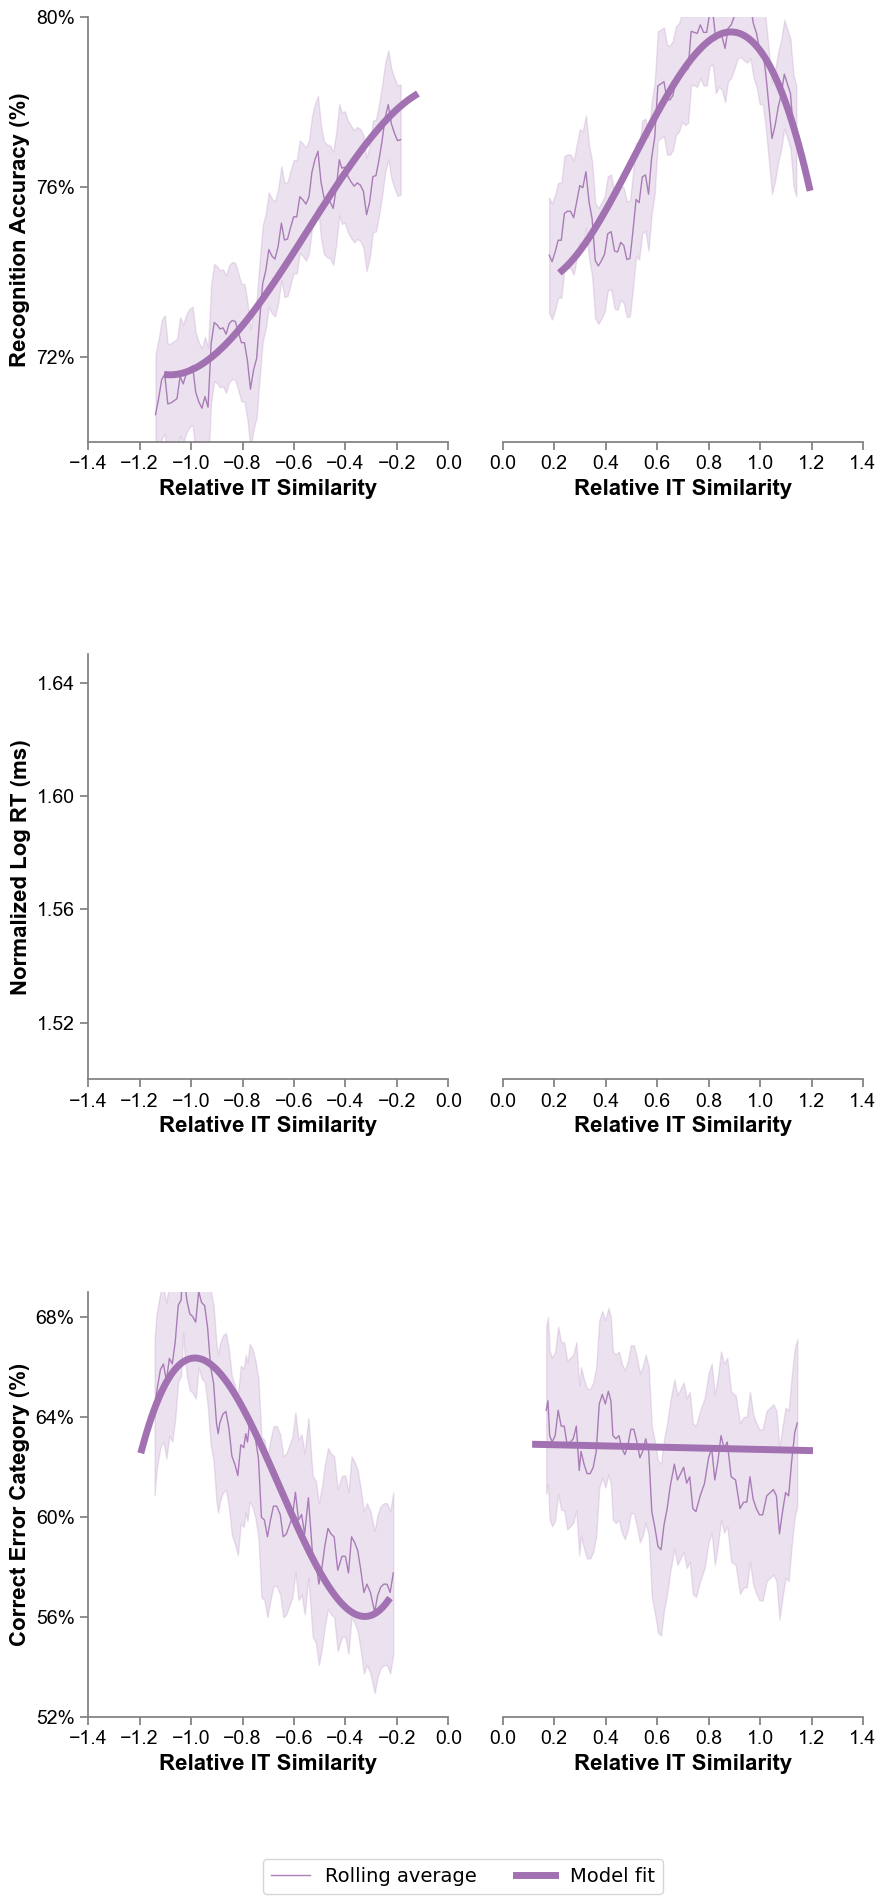

In [31]:
# Configuration for your plots
plot_configs = [
    {
        'df': df,  # Replace with your dataframe variable
        'x_col': "Tested - Untested IT Distractor Similarity",
        'y_col': "Accuracy",
        # 'item_col': "Tested Item",  # Uncomment if you want to group by items
        'split_col': "IT_pos_neg",
        'split_value': 0,
        'y_limits': y_limits_dict['Accuracy'],
        'x_limits': (-1.4, 1.4),     # Custom x-axis limits
        'x_tick_step': 0.2,           # Custom x-axis tick step
        'left_model_order': 3,         # 3rd order polynomial for left side
        'right_model_order': 3,        # 3rd order polynomial for right side
        'trim_percentile': 0,          # No trimming
        'y_as_percentage': True,       # Format as percentages
        'y_percentage_step': 4,        # Every 2%
        'font_family': 'Arial',
        'label_font_size': 16,
        'tick_font_size': 14
    },
    {
        'df': df_correct,  # Replace with your dataframe variable
        'x_col': "Tested - Untested IT Distractor Similarity",
        'y_col': "WM RT",
        # 'item_col': "Tested Item",  # Uncomment if you want to group by items
        'split_col': "IT_pos_neg",
        'split_value': 0,
        'y_limits': y_limits_dict['WM RT'],
        'x_limits': (-1.4, 1.4),     # Custom x-axis limits
        'x_tick_step': 0.2,             # Custom x-axis tick step
        'left_model_order': 2,         # 1st order (linear) for left side
        'right_model_order': 3,        # 2nd order for right side
        'trim_percentile': 0,          # No trimming
        'y_tick_step': 0.04,           # Custom y-axis step
        'font_family': 'Arial',
        'label_font_size': 16,
        'tick_font_size': 14
    },
    {
        'df': df_cleaned,  # Replace with your dataframe variable
        'x_col': "Tested - Untested IT Distractor Similarity",
        'y_col': "Error Category Accuracy",       
        # 'item_col': "Tested Item",  # Uncomment if you want to group by items
        'split_col': "IT_pos_neg",
        'split_value': 0,
        'y_limits': y_limits_dict['Error Category Accuracy'],
        'x_limits': (-1.4, 1.4),     # Custom x-axis limits
        'x_tick_step': 0.2,             # Cu
        'left_model_order': 3,         # 3rd order for left side
        'right_model_order': 1,        # 3rd order for right side
        'trim_percentile': 0,          # No trimming
        'y_as_percentage': True,       # Format as percentages
        'y_percentage_step': 4,        # Every 4%
        'y_tick_step': 0.04,           # Custom y-axis step
        'font_family': 'Arial',
        'label_font_size': 16,
        'tick_font_size': 14
    }
]

# Create a 3x2 grid with y-axes shared by row and reduced width
fig, axes = plt.subplots(3, 2, figsize=(10, 20), sharey='row')  # Reduced width from 12 to 10
fig.subplots_adjust(hspace=0.5, wspace=0.15, top=0.95)  # Reduced wspace from 0.3 to 0.15

# Keep track of all handles and labels for a shared legend
all_handles = []
all_labels = []

# Iterate through rows
for i, config in enumerate(plot_configs):
    row = i
    ax_left = axes[row, 0]
    ax_right = axes[row, 1]
    
    combined_sliding_window_and_model_fit_split_col_subplot(
        config['df'],
        x_col=config['x_col'],
        y_col=config['y_col'],
        item_col=config.get('item_col'),  # Use get to handle missing keys
        split_col=config['split_col'],
        split_value=config['split_value'],
        window_percent=0.2,
        step_percent=0.01,
        ax_left=ax_left,  # Pass the axes
        ax_right=ax_right,  # Pass the axes
        y_limits=config.get('y_limits', None),
        x_limits=config.get('x_limits', None),  # Custom x-axis limits from config
        x_tick_step=config.get('x_tick_step', None),  # Custom x-axis tick step from config
        share_y=True,
        # Model fit orders
        left_model_order=config.get('left_model_order', 1),
        right_model_order=config.get('right_model_order', 2),
        # Robust and styling options
        trim_percentile=config.get('trim_percentile', 0),
        y_as_percentage=config.get('y_as_percentage', False),
        y_percentage_step=config.get('y_percentage_step', 2),
        y_tick_step=config.get('y_tick_step'),
        font_family=config.get('font_family', 'Arial'),
        label_font_size=config.get('label_font_size', 16),
        tick_font_size=config.get('tick_font_size', 14),
        title_font_size=18,
        legend_font_size=14,
        show_titles=False  # No titles
    )
    
    # Collect handles and labels from both subplots
    for ax in [ax_left, ax_right]:
        handles, labels = ax.get_legend_handles_labels()
        for handle, label in zip(handles, labels):
            # Clean up label to remove (rolling) or (model) suffix
            if "(" in label:
                base_label = label.split("(")[0].strip()
            else:
                base_label = label
            if base_label not in all_labels:
                all_handles.append(handle)
                all_labels.append(base_label)

# Create one shared legend for the entire figure
if all_handles:
    fig.legend(all_handles, all_labels, loc='center', bbox_to_anchor=(0.5, 0.02), 
               ncol=len(all_labels), frameon=True, fontsize=14)

# Manual layout adjustment
plt.subplots_adjust(bottom=0.1, hspace=0.5, wspace=0.15, top=0.95)
plt.show()

Creating IT visualization with improved dimensions...
left side - All Data, Total points: 14944, Window size: 2988, Step size: 298
  📊 left side - All Data Model Fit Exclusions:
     Total points: 14944
     No trimming applied
     Excluded by rolling constraint - Left edge: 1457
     Excluded by rolling constraint - Right edge: 1455
     Points used in model fit: 12032
     Total excluded: 2912
Total points: 30196, Window size: 3019, Step size: 301
right side - All Data, Total points: 15252, Window size: 3050, Step size: 305
  📊 right side - All Data Model Fit Exclusions:
     Total points: 15252
     No trimming applied
     Excluded by rolling constraint - Left edge: 1510
     Excluded by rolling constraint - Right edge: 1523
     Points used in model fit: 12219
     Total excluded: 3033
left side - All Data, Total points: 20097, Window size: 4019, Step size: 401
  📊 left side - All Data Model Fit Exclusions:
     Total points: 20097
     No trimming applied
     Excluded by rollin

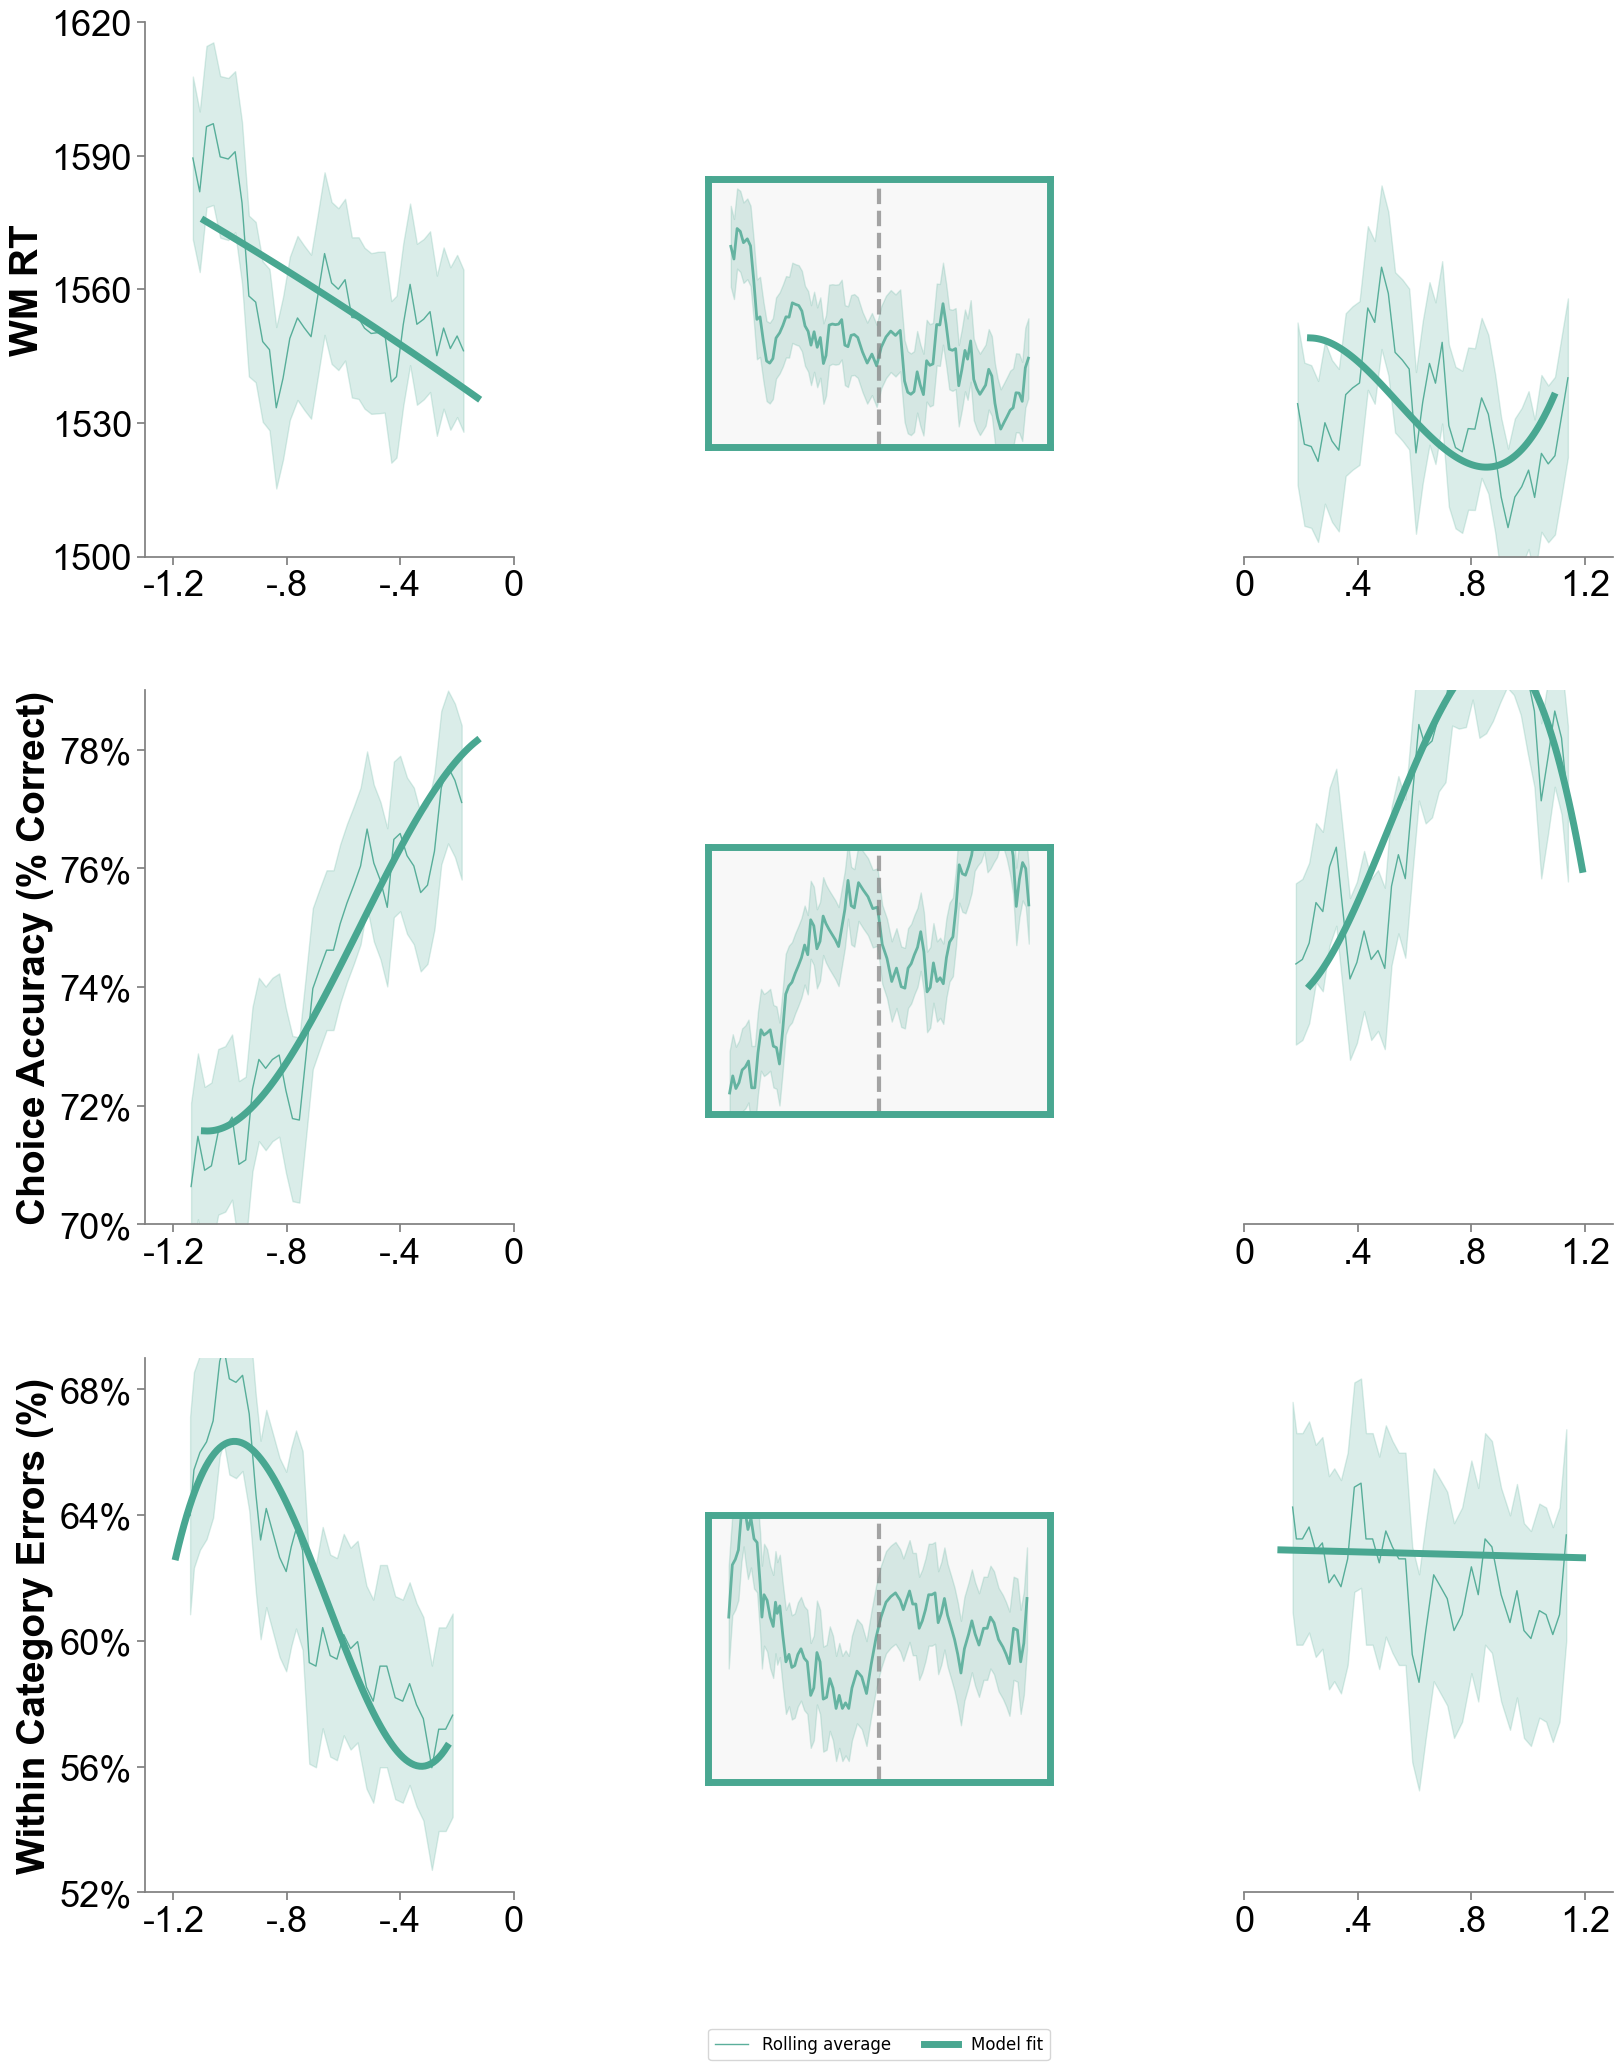

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter, MultipleLocator

def remove_leading_zero_formatter(x, pos):
    if x == 0:
        return '0'
    elif x > 0:
        formatted = f'{x:.2f}'.rstrip('0').rstrip('.')
        if formatted.startswith('0.'):
            return formatted[1:]
        return formatted
    else:
        formatted = f'{x:.2f}'.rstrip('0').rstrip('.')
        if formatted.startswith('-0.'):
            return '-' + formatted[2:]
        return formatted

def create_continuous_rolling_plot(df, x_col, y_col, item_col=None, 
                                 window_percent=0.1, step_percent=0.02,
                                 ax=None, 
                                 y_limits=None, x_limits=None,
                                 x_tick_step=None, y_tick_step=None, x_ticks=None,
                                 y_as_percentage=False, y_percentage_step=2,
                                 font_family='Arial',
                                 title_font_size=18, title_font_color='black', title_font_weight='bold',
                                 label_font_size=16, label_font_color='black', label_font_weight='bold',
                                 tick_font_size=14, tick_font_color='black',
                                 line_width=3, confidence_alpha=0.2,
                                 show_title=True):
    
    if "IT Distractor Similarity" in x_col:
        palette = ['#49a791']
    elif "V2 Distractor Similarity" in x_col:
        palette = ['#95c355']
    else:
        palette = ['#49a791']
    
    fig = combined_rolling_average_subplot(
        df=df, 
        x_col=x_col, 
        y_col=y_col, 
        item_col=item_col,
        window_percent=window_percent, 
        step_percent=step_percent,
        palette=palette,
        ax=ax, 
        show_title=False,
        show_xlabel=True,
        font_family=font_family, 
        title_font_size=title_font_size, 
        title_font_color=title_font_color, 
        title_font_weight=title_font_weight,
        label_font_size=label_font_size, 
        label_font_color=label_font_color, 
        label_font_weight=label_font_weight,
        tick_font_size=tick_font_size-2,
        tick_font_color=tick_font_color,
        y_as_percentage=y_as_percentage, 
        y_percentage_step=y_percentage_step, 
        x_tick_step=x_tick_step, 
        y_tick_step=y_tick_step,
        x_limits=x_limits, 
        y_limits=y_limits,
        x_ticks=x_ticks,
        line_width=line_width, 
        confidence_alpha=confidence_alpha
    )
    
    ax.axvline(x=0, color='grey', linestyle='--', alpha=0.7, linewidth=3)
    
    if show_title:
        ax.set_title("Continuous", fontsize=title_font_size-2, 
                    color=title_font_color, fontweight=title_font_weight, 
                    fontfamily=font_family, pad=15)
    
    ax.set_xlabel('')
    ax.tick_params(axis='x', bottom=False, labelbottom=False)
    ax.spines['bottom'].set_visible(False)
    
    return ax


def create_single_side_plot(df, x_col, y_col, item_col=None, 
                           split_col='v2_pos_neg', split_value=0, side='left',
                           window_percent=0.2, step_percent=0.02,
                           ax=None, palette=None,
                           y_limits=None, x_limits=None,
                           x_tick_step=None, y_tick_step=None,
                           model_order=2, trim_percentile=0,
                           y_as_percentage=False, y_percentage_step=2,
                           font_family='Arial',
                           title_font_size=18, title_font_color='black', title_font_weight='bold',
                           label_font_size=16, label_font_color='black', label_font_weight='bold',
                           tick_font_size=14, tick_font_color='black',
                           rolling_line_width=1, model_line_width=5,
                           confidence_alpha=0.2, rolling_alpha=0.9,
                           show_title=True, show_ylabel=True, show_xlabel=True):
    
    grey = '#BFBFBF'
    blue = '#6cbcef'
    teal = '#49a791'
    purple = '#a271b1'
    salmon = '#e58a72'
    gold = '#dbad40'
    green = '#95c355'
    
    if palette is None:
        if "IT Distractor Similarity" in x_col:
            default_colors = [teal, grey]
        elif "V2 Distractor Similarity" in x_col:
            default_colors = [green, grey]
        else:
            default_colors = [teal, grey]
    else:
        default_colors = palette
    
    color_map = {
        'prioritized': default_colors[0],    
        'deprioritized': default_colors[1] if len(default_colors) > 1 else grey,  
    }
    
    if side == 'left':
        df_side = df[df[x_col] <= split_value].copy()
        title_text = f"{x_col} ≤ {split_value}"
    else:
        df_side = df[df[x_col] > split_value].copy()
        title_text = f"{x_col} > {split_value}"
    
    ax.set_facecolor('white')
    
    item_color_dict = {}
    if item_col is not None and item_col in df.columns:
        all_items = df[item_col].unique()
        for i, item in enumerate(all_items):
            item_lower = str(item).lower()
            if item_lower in color_map:
                item_color_dict[item] = color_map[item_lower]
            elif 'prioritized' in item_lower:
                item_color_dict[item] = color_map['prioritized']
            elif 'deprioritized' in item_lower:
                item_color_dict[item] = color_map['deprioritized']
            else:
                item_color_dict[item] = default_colors[i % len(default_colors)]
    
    if item_col is not None and item_col in df.columns:
        items = df_side[item_col].unique()
        
        for i, item in enumerate(items):
            df_item = df_side[df_side[item_col] == item].copy()
            df_item = df_item.sort_values(by=x_col).reset_index(drop=True)
            total_points = len(df_item)
            
            window_points = max(int(total_points * window_percent), 3)
            step_points = max(int(total_points * step_percent), 1)
            color = item_color_dict.get(item, default_colors[i % len(default_colors)])
            
            if total_points >= window_points:
                print(f"{side} side - {item}, Total points: {total_points}, "
                      f"Window size: {window_points}, Step size: {step_points}")
                
                x_vals, y_vals, y_errs = [], [], []
                for j in range(0, total_points - window_points + 1, step_points):
                    window = df_item.iloc[j:j+window_points]
                    mean_x = window[x_col].mean()
                    mean_y = window[y_col].mean()
                    std_y = window[y_col].std()
                    sem_y = std_y / np.sqrt(window_points) if std_y > 0 else 0
                    x_vals.append(mean_x)
                    y_vals.append(mean_y)
                    y_errs.append(sem_y)
                
                x_vals = np.array(x_vals)
                y_vals = np.array(y_vals)
                y_errs = np.array(y_errs)
                
                if len(x_vals) > 0:
                    ax.plot(x_vals, y_vals, color=color, linewidth=rolling_line_width, 
                           alpha=rolling_alpha, label=f'{item} (rolling)')
                    ax.fill_between(x_vals, 
                                   y_vals - 1.96 * y_errs,
                                   y_vals + 1.96 * y_errs,
                                   color=color, alpha=confidence_alpha)
        
        for i, item in enumerate(items):
            df_item = df_side[df_side[item_col] == item].copy()
            
            if trim_percentile > 0:
                lower_p = np.percentile(df_item[x_col], trim_percentile)
                upper_p = np.percentile(df_item[x_col], 100 - trim_percentile)
                df_item_trimmed = df_item[(df_item[x_col] >= lower_p) & (df_item[x_col] <= upper_p)]
            else:
                df_item_trimmed = df_item
                
            total_points = len(df_item_trimmed)
            color = item_color_dict.get(item, default_colors[i % len(default_colors)])
            
            if total_points >= 5:
                total_points_full = len(df_item)
                window_points_full = max(int(total_points_full * window_percent), 3)
                
                df_item_sorted = df_item.sort_values(by=x_col)
                rolling_min_x = df_item_sorted.iloc[window_points_full//2][x_col]
                rolling_max_x = df_item_sorted.iloc[-(window_points_full//2 + 1)][x_col]
                
                points_below_rolling = len(df_item_trimmed[df_item_trimmed[x_col] < rolling_min_x])
                points_above_rolling = len(df_item_trimmed[df_item_trimmed[x_col] > rolling_max_x])
                
                model_min_x = max(df_item_trimmed[x_col].min(), rolling_min_x)
                model_max_x = min(df_item_trimmed[x_col].max(), rolling_max_x)
                
                points_in_model = len(df_item_trimmed[
                    (df_item_trimmed[x_col] >= model_min_x) & 
                    (df_item_trimmed[x_col] <= model_max_x)
                ])
                
                points_excluded_by_trim = len(df_item) - len(df_item_trimmed)
                
                print(f"  📊 {side} side - {item} Model Fit Exclusions:")
                print(f"     Total points: {len(df_item)}")
                if trim_percentile > 0:
                    print(f"     Excluded by trimming ({trim_percentile}%): {points_excluded_by_trim}")
                    print(f"     Remaining after trim: {len(df_item_trimmed)}")
                else:
                    print(f"     No trimming applied")
                print(f"     Excluded by rolling constraint - Left edge: {points_below_rolling}")
                print(f"     Excluded by rolling constraint - Right edge: {points_above_rolling}")
                print(f"     Points used in model fit: {points_in_model}")
                print(f"     Total excluded: {len(df_item) - points_in_model}")
                
                if model_max_x > model_min_x:
                    x_range = np.linspace(model_min_x, model_max_x, 100)
                    model = np.poly1d(np.polyfit(df_item_trimmed[x_col], df_item_trimmed[y_col], model_order))
                    ax.plot(x_range, model(x_range), color=color, linestyle='-', 
                            linewidth=model_line_width, label=f'{item} (model)')
    else:
        df_side_copy = df_side.copy().sort_values(by=x_col).reset_index(drop=True)
        total_points = len(df_side_copy)
        
        window_points = max(int(total_points * window_percent), 3)
        step_points = max(int(total_points * step_percent), 1)
        color = default_colors[0]
        
        if total_points >= window_points:
            print(f"{side} side - All Data, Total points: {total_points}, "
                  f"Window size: {window_points}, Step size: {step_points}")
            
            x_vals, y_vals, y_errs = [], [], []
            for j in range(0, total_points - window_points + 1, step_points):
                window = df_side_copy.iloc[j:j+window_points]
                mean_x = window[x_col].mean()
                mean_y = window[y_col].mean()
                std_y = window[y_col].std()
                sem_y = std_y / np.sqrt(window_points) if std_y > 0 else 0
                x_vals.append(mean_x)
                y_vals.append(mean_y)
                y_errs.append(sem_y)
            
            x_vals = np.array(x_vals)
            y_vals = np.array(y_vals)
            y_errs = np.array(y_errs)
            
            if len(x_vals) > 0:
                ax.plot(x_vals, y_vals, color=color, linewidth=rolling_line_width, 
                       alpha=rolling_alpha, label='Rolling average')
                ax.fill_between(x_vals, 
                               y_vals - 1.96 * y_errs,
                               y_vals + 1.96 * y_errs,
                               color=color, alpha=confidence_alpha)
        
        if trim_percentile > 0:
            lower_p = np.percentile(df_side_copy[x_col], trim_percentile)
            upper_p = np.percentile(df_side_copy[x_col], 100 - trim_percentile)
            df_side_trimmed = df_side_copy[(df_side_copy[x_col] >= lower_p) & (df_side_copy[x_col] <= upper_p)]
        else:
            df_side_trimmed = df_side_copy
            
        total_points_trimmed = len(df_side_trimmed)
        
        if total_points_trimmed >= 5:
            window_points_full = max(int(total_points * window_percent), 3)
            
            df_side_sorted = df_side_copy.sort_values(by=x_col)
            rolling_min_x = df_side_sorted.iloc[window_points_full//2][x_col]
            rolling_max_x = df_side_sorted.iloc[-(window_points_full//2 + 1)][x_col]
            
            points_below_rolling = len(df_side_trimmed[df_side_trimmed[x_col] < rolling_min_x])
            points_above_rolling = len(df_side_trimmed[df_side_trimmed[x_col] > rolling_max_x])
            
            model_min_x = max(df_side_trimmed[x_col].min(), rolling_min_x)
            model_max_x = min(df_side_trimmed[x_col].max(), rolling_max_x)
            
            points_in_model = len(df_side_trimmed[
                (df_side_trimmed[x_col] >= model_min_x) & 
                (df_side_trimmed[x_col] <= model_max_x)
            ])
            
            points_excluded_by_trim = len(df_side_copy) - len(df_side_trimmed)
            
            print(f"  📊 {side} side - All Data Model Fit Exclusions:")
            print(f"     Total points: {len(df_side_copy)}")
            if trim_percentile > 0:
                print(f"     Excluded by trimming ({trim_percentile}%): {points_excluded_by_trim}")
                print(f"     Remaining after trim: {len(df_side_trimmed)}")
            else:
                print(f"     No trimming applied")
            print(f"     Excluded by rolling constraint - Left edge: {points_below_rolling}")
            print(f"     Excluded by rolling constraint - Right edge: {points_above_rolling}")
            print(f"     Points used in model fit: {points_in_model}")
            print(f"     Total excluded: {len(df_side_copy) - points_in_model}")
            
            if model_max_x > model_min_x:
                x_range = np.linspace(model_min_x, model_max_x, 100)
                model = np.poly1d(np.polyfit(df_side_trimmed[x_col], df_side_trimmed[y_col], model_order))
                ax.plot(x_range, model(x_range), color=color, linestyle='-', 
                        linewidth=model_line_width, label='Model fit')
    
    if show_title:
        if side == 'left':
            ax.set_title("Negative", fontsize=title_font_size, 
                        color=title_font_color, fontweight=title_font_weight, 
                        fontfamily=font_family, pad=20)
        else:
            ax.set_title("Positive", fontsize=title_font_size, 
                        color=title_font_color, fontweight=title_font_weight, 
                        fontfamily=font_family, pad=20)
    
    if show_xlabel:
        if x_col in ["Tested - Untested IT Distractor Similarity"]:
            ax.set_xlabel("Relative IT Similarity", fontweight=label_font_weight, 
                         fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
        elif x_col in ["Tested - Untested V2 Distractor Similarity"]:
            ax.set_xlabel("Relative V2 Similarity", fontweight=label_font_weight, 
                         fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
        else:
            ax.set_xlabel(x_col, fontweight=label_font_weight, fontsize=label_font_size, 
                         color=label_font_color, fontfamily=font_family)
    else:
        ax.set_xlabel('')
    
    if show_ylabel:
        if y_col.lower() in ['accuracy']:
            if y_as_percentage:
                ax.set_ylabel("Choice Accuracy (% Correct)", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
                ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'{y*100:.0f}%'))
                if y_tick_step is None:
                    y_tick_step = y_percentage_step / 100.0
            else:
                ax.set_ylabel("Choice Accuracy (% Correct)", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
        elif y_col.lower() in ['wm rt']:
            ax.set_ylabel("WM RT", fontweight=label_font_weight, 
                         fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
        elif y_col.lower() in ['error category accuracy']:
            if y_as_percentage:
                ax.set_ylabel("Within Category Errors (%)", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
                ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'{y*100:.0f}%'))
                if y_tick_step is None:
                    y_tick_step = y_percentage_step / 100.0
            else:
                ax.set_ylabel("Within Category Errors", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family)
        else:
            ax.set_ylabel(y_col, fontweight=label_font_weight, fontsize=label_font_size, 
                         color=label_font_color, fontfamily=font_family)
    
    if x_tick_step is not None:
        ax.xaxis.set_major_locator(MultipleLocator(x_tick_step))
    if y_tick_step is not None:
        ax.yaxis.set_major_locator(MultipleLocator(y_tick_step))
    
    if x_limits is not None:
        if side == 'left':
            ax.set_xlim(x_limits[0], split_value)
        else:
            ax.set_xlim(split_value, x_limits[1])
    if y_limits is not None:
        ax.set_ylim(y_limits)
    elif y_col.lower() in ['accuracy', 'acc', 'correct', 'resp_correct']:
        ax.set_ylim(0.6, 0.8)
    
    ax.xaxis.set_major_formatter(FuncFormatter(remove_leading_zero_formatter))
    
    spine_color = 'grey'
    ax.tick_params(axis='x', colors=spine_color, labelsize=tick_font_size, labelcolor=tick_font_color)
    ax.tick_params(axis='y', colors=spine_color, labelsize=tick_font_size, labelcolor=tick_font_color)
    
    for label in ax.get_xticklabels():
        label.set_fontfamily(font_family)
    for label in ax.get_yticklabels():
        label.set_fontfamily(font_family)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_color(spine_color)
    ax.spines['left'].set_color(spine_color)
    ax.grid(False)
    
    return ax

def create_three_panel_visualization(plot_configs, middle_width=0.35, middle_height_shift=0.0, middle_size_scale=0.7):
    
    from matplotlib.gridspec import GridSpec
    
    fig = plt.figure(figsize=(18, 22))
    
    # Reduced gap width to bring panels closer together
    gap_width = 0.01  # Reduced from 0.0001
    remaining_width = 1.0 - middle_width - 2*gap_width
    side_width = remaining_width / 2 * 0.6
    extra_gap = (remaining_width - 2*side_width) / 2 * 0.3  # Reduced extra gap to bring sides closer to middle
    
    gs = GridSpec(3, 7, figure=fig, 
                  width_ratios=[extra_gap, side_width, gap_width, middle_width, gap_width, side_width, extra_gap],  
                  height_ratios=[1, 1, 1],   
                  hspace=0.25, wspace=0.01,  # Reduced hspace from 0.4 to 0.25
                  top=0.95, bottom=0.1, left=0.05, right=0.95)
    axes = []
    for row in range(3):
        ax_left = fig.add_subplot(gs[row, 1])
        ax_middle = fig.add_subplot(gs[row, 3])
        ax_right = fig.add_subplot(gs[row, 5])
        axes.append([ax_left, ax_middle, ax_right])


    
    
    all_handles = []
    all_labels = []
    
    for row, config in enumerate(plot_configs):
        x_col = config['x_col']
        if "IT Distractor Similarity" in x_col:
            frame_color = '#49a791'
        elif "V2 Distractor Similarity" in x_col:
            frame_color = '#95c355'
        else:
            frame_color = '#49a791'
        
        y_limits = config.get('y_limits')
        
        create_single_side_plot(
            config['df'],
            x_col=config['x_col'],
            y_col=config['y_col'],
            item_col=config.get('item_col'),
            side='left',
            ax=axes[row][0],
            y_limits=y_limits,
            x_limits=config.get('x_limits'),
            x_tick_step=config.get('x_tick_step'),
            y_tick_step=config.get('y_tick_step'),
            model_order=config.get('left_model_order', 2),
            trim_percentile=config.get('trim_percentile', 0),
            window_percent=config.get('window_percent', 0.2),
            step_percent=config.get('step_percent', 0.02),
            y_as_percentage=config.get('y_as_percentage', False),
            y_percentage_step=config.get('y_percentage_step', 2),
            font_family=config.get('font_family', 'Arial'),
            label_font_size=config.get('label_font_size', 16),
            tick_font_size=config.get('tick_font_size', 14),
            show_title=False,
            show_ylabel=True,
            show_xlabel=False
        )
        
        axes[row][0].xaxis.set_major_formatter(FuncFormatter(remove_leading_zero_formatter))
        
        create_continuous_rolling_plot(
            config['df'],
            x_col=config['x_col'],
            y_col=config['y_col'],
            item_col=config.get('item_col'),
            ax=axes[row][1],
            y_limits=y_limits,
            x_limits=config.get('x_limits'),
            x_tick_step=config.get('x_tick_step'),
            y_tick_step=config.get('y_tick_step'),
            x_ticks=config.get('x_ticks'),
            y_as_percentage=config.get('y_as_percentage', False),
            y_percentage_step=config.get('y_percentage_step', 2),
            font_family=config.get('font_family', 'Arial'),
            label_font_size=config.get('label_font_size', 14),
            tick_font_size=config.get('tick_font_size', 12),
            window_percent=0.1,
            step_percent = 0.01,
            line_width=2,
            show_title=False
        )
        
        axes[row][1].set_xlabel('')
        axes[row][1].tick_params(axis='x', bottom=False, labelbottom=False)
        axes[row][1].spines['bottom'].set_visible(False)
        
        for spine_name, spine in axes[row][1].spines.items():
            spine.set_visible(True)
            spine.set_linewidth(5)
            spine.set_color(frame_color)
        
        axes[row][1].set_facecolor('#f8f8f8')
        
        pos = axes[row][1].get_position()
        new_width = pos.width * middle_size_scale
        new_height = pos.height * middle_size_scale
        new_x = pos.x0 + (pos.width - new_width) / 2
        new_y = pos.y0 + middle_height_shift
        
        new_pos = [new_x, new_y, new_width, new_height]
        axes[row][1].set_position(new_pos)
        
        create_single_side_plot(
            config['df'],
            x_col=config['x_col'],
            y_col=config['y_col'],
            item_col=config.get('item_col'),
            side='right',
            ax=axes[row][2],
            y_limits=y_limits,
            x_limits=config.get('x_limits'),
            x_tick_step=config.get('x_tick_step'),
            y_tick_step=config.get('y_tick_step'),
            model_order=config.get('right_model_order', 2),
            trim_percentile=config.get('trim_percentile', 0),
            window_percent=config.get('window_percent', 0.2),
            step_percent=config.get('step_percent', 0.02),
            y_as_percentage=config.get('y_as_percentage', False),
            y_percentage_step=config.get('y_percentage_step', 2),
            font_family=config.get('font_family', 'Arial'),
            label_font_size=config.get('label_font_size', 16),
            tick_font_size=config.get('tick_font_size', 14),
            show_title=False,
            show_ylabel=False,
            show_xlabel=False
        )
        
        axes[row][2].xaxis.set_major_formatter(FuncFormatter(remove_leading_zero_formatter))
        
        axes[row][1].set_ylabel('')
        axes[row][1].tick_params(axis='y', labelleft=False, left=False)
        
        axes[row][2].set_ylabel('')
        axes[row][2].tick_params(axis='y', labelleft=False, left=False)
        axes[row][2].spines['left'].set_visible(False)
        
        for col in range(3):
            handles, labels = axes[row][col].get_legend_handles_labels()
            for handle, label in zip(handles, labels):
                if "(" in label:
                    base_label = label.split("(")[0].strip()
                else:
                    base_label = label
                if base_label not in all_labels:
                    all_handles.append(handle)
                    all_labels.append(base_label)
        
        axes[row][0].xaxis.set_major_formatter(FuncFormatter(remove_leading_zero_formatter))
        axes[row][2].xaxis.set_major_formatter(FuncFormatter(remove_leading_zero_formatter))
    
    if all_handles:
        fig.legend(all_handles, all_labels, loc='lower center', bbox_to_anchor=(0.5, 0.02), 
                   ncol=len(all_labels), frameon=True, fontsize=12)
    
    plt.show()
    return fig
plot_configs_v2 = [
    {
        'df': df_correct,
        'x_col': "Tested - Untested V2 Distractor Similarity",
        'y_col': "WM RT",
        'item_col': None,
        'y_limits': (1500, 1620),
        'y_tick_step': 30,
        'x_limits': (-0.16, 0.16),
        'x_tick_step': 0.04,
        'window_percent': 0.2,
        'step_percent': 0.02,
        'left_model_order': 1,
        'right_model_order': 2,
        'trim_percentile': 0,
        'font_family': 'Arial',
        'label_font_size': 28,
        'tick_font_size': 26
    },
    {
        'df': df,
        'x_col': "Tested - Untested V2 Distractor Similarity",
        'y_col': "Accuracy",
        'item_col': None,
        'y_as_percentage': True,
        'y_percentage_step': 2,
        'y_limits': (0.7, 0.79),
        'x_limits': (-0.16, 0.16),
        'x_tick_step': 0.04,
        'window_percent': 0.2,
        'step_percent': 0.02,
        'left_model_order': 3,
        'right_model_order': 3,
        'trim_percentile': 0,
        'font_family': 'Arial',
        'label_font_size': 28,
        'tick_font_size': 26
    },
    {
        'df': df_cleaned,
        'x_col': "Tested - Untested V2 Distractor Similarity",
        'y_col': "Error Category Accuracy",
        'item_col': None,
        'y_limits': (0.52, 0.69),
        'y_tick_step': 0.04,
        'y_as_percentage': True,
        'y_percentage_step': 4,
        'x_limits': (-0.16, 0.16),
        'x_tick_step': 0.04,
        'window_percent': 0.2,
        'step_percent': 0.02,
        'left_model_order': 3,
        'right_model_order': 3,
        'trim_percentile': 0,
        'font_family': 'Arial',
        'label_font_size': 28,
        'tick_font_size': 26
    }
]

plot_configs_it = [
    {
        'df': df_correct,
        'x_col': "Tested - Untested IT Distractor Similarity",
        'y_col': "WM RT",
        'item_col': None,
        'y_limits': (1500, 1620),
        'y_tick_step': 30,
        'x_limits': (-1.3, 1.3),
        'x_tick_step': 0.4,
        'window_percent': 0.2,
        'step_percent': 0.02,
        'left_model_order': 2,
        'right_model_order': 3,
        'trim_percentile': 0,
        'font_family': 'Arial',
        'label_font_size': 28,
        'tick_font_size': 26
    },
    {
        'df': df,
        'x_col': "Tested - Untested IT Distractor Similarity",
        'y_col': "Accuracy",
        'item_col': None,
        'y_as_percentage': True,
        'y_percentage_step': 2,
        'y_limits': (0.7, 0.79),
        'x_limits': (-1.3, 1.3),
        'x_tick_step': 0.4,
        'window_percent': 0.2,
        'step_percent': 0.02,
        'left_model_order': 3,
        'right_model_order': 3,
        'trim_percentile': 0,
        'font_family': 'Arial',
        'label_font_size': 28,
        'tick_font_size': 26
    },
    {
        'df': df_cleaned,
        'x_col': "Tested - Untested IT Distractor Similarity",
        'y_col': "Error Category Accuracy",
        'item_col': None,
        'y_limits': (0.52, 0.69),
        'y_tick_step': 0.04,
        'y_as_percentage': True,
        'y_percentage_step': 4,
        'x_limits': (-1.3, 1.3),
        'x_tick_step': 0.4,
        'window_percent': 0.2,
        'step_percent': 0.02,
        'left_model_order': 3,
        'right_model_order': 1,
        'trim_percentile': 0,
        'font_family': 'Arial',
        'label_font_size': 28,
        'tick_font_size': 26
    }
]

print("Creating IT visualization with improved dimensions...")
fig_it = create_three_panel_visualization(
    plot_configs_it,
    middle_width=0.35,
    middle_height_shift=0.05,
    middle_size_scale=0.5
)



Creating V2 visualization with improved dimensions...
left side - All Data, Total points: 14747, Window size: 2949, Step size: 294
  📊 left side - All Data Model Fit Exclusions:
     Total points: 14747
     No trimming applied
     Excluded by rolling constraint - Left edge: 1451
     Excluded by rolling constraint - Right edge: 1467
     Points used in model fit: 11829
     Total excluded: 2918
Total points: 30196, Window size: 3019, Step size: 301
right side - All Data, Total points: 15449, Window size: 3089, Step size: 308
  📊 right side - All Data Model Fit Exclusions:
     Total points: 15449
     No trimming applied
     Excluded by rolling constraint - Left edge: 1528
     Excluded by rolling constraint - Right edge: 1526
     Points used in model fit: 12395
     Total excluded: 3054
left side - All Data, Total points: 19798, Window size: 3959, Step size: 395
  📊 left side - All Data Model Fit Exclusions:
     Total points: 19798
     No trimming applied
     Excluded by rollin

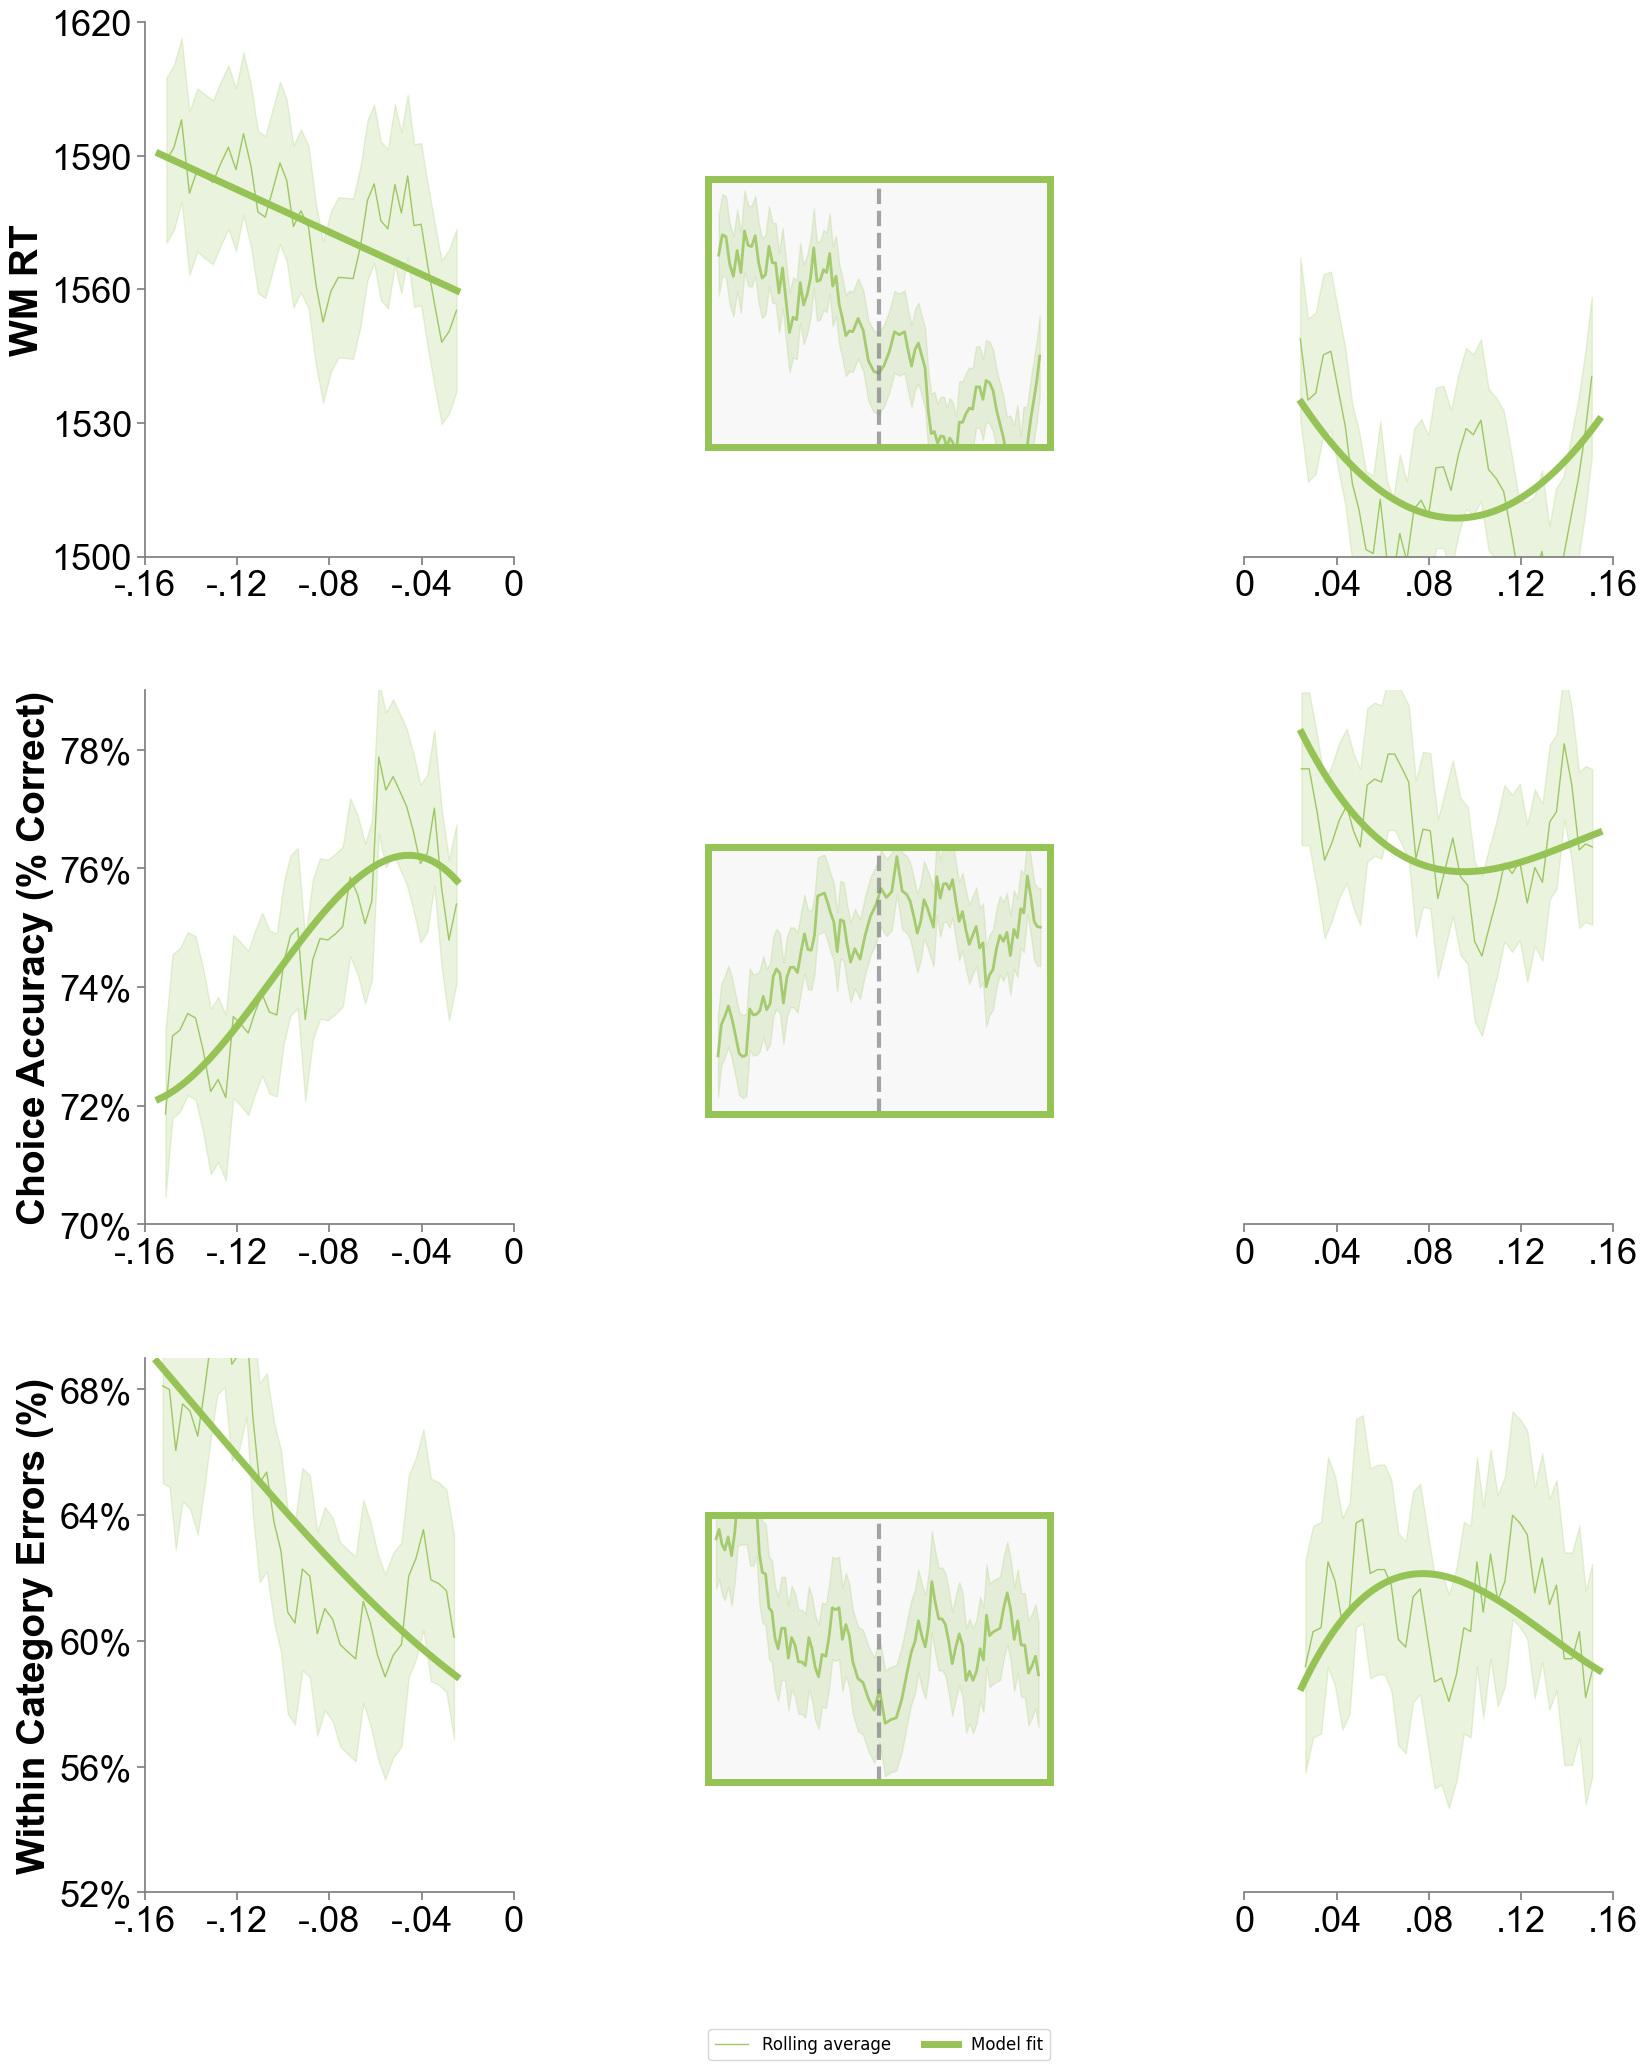

In [33]:
print("Creating V2 visualization with improved dimensions...")
fig_v2 = create_three_panel_visualization(
    plot_configs_v2,
    middle_width=0.35,
    middle_height_shift=0.05,
    middle_size_scale=0.5
)

slightly increasing the width of the continuous plot so that it has a more similar aspect ratio to the split plots
slightly increasing the height of all of them
fixing the y-axis labels to match those we use for Fig. 1

left side - All Data, Total points: 14944, Window size: 2988, Step size: 298
  📊 left side - All Data Model Fit Exclusions:
     Total points: 14944
     No trimming applied
     Excluded by rolling constraint - Left edge: 1457
     Excluded by rolling constraint - Right edge: 1455
     Points used in model fit: 12032
     Total excluded: 2912
Total points: 30196, Window size: 3019, Step size: 301
right side - All Data, Total points: 15252, Window size: 3050, Step size: 305
  📊 right side - All Data Model Fit Exclusions:
     Total points: 15252
     No trimming applied
     Excluded by rolling constraint - Left edge: 1510
     Excluded by rolling constraint - Right edge: 1523
     Points used in model fit: 12219
     Total excluded: 3033
left side - All Data, Total points: 20097, Window size: 4019, Step size: 401
  📊 left side - All Data Model Fit Exclusions:
     Total points: 20097
     No trimming applied
     Excluded by rolling constraint - Left edge: 1992
     Excluded by rollin

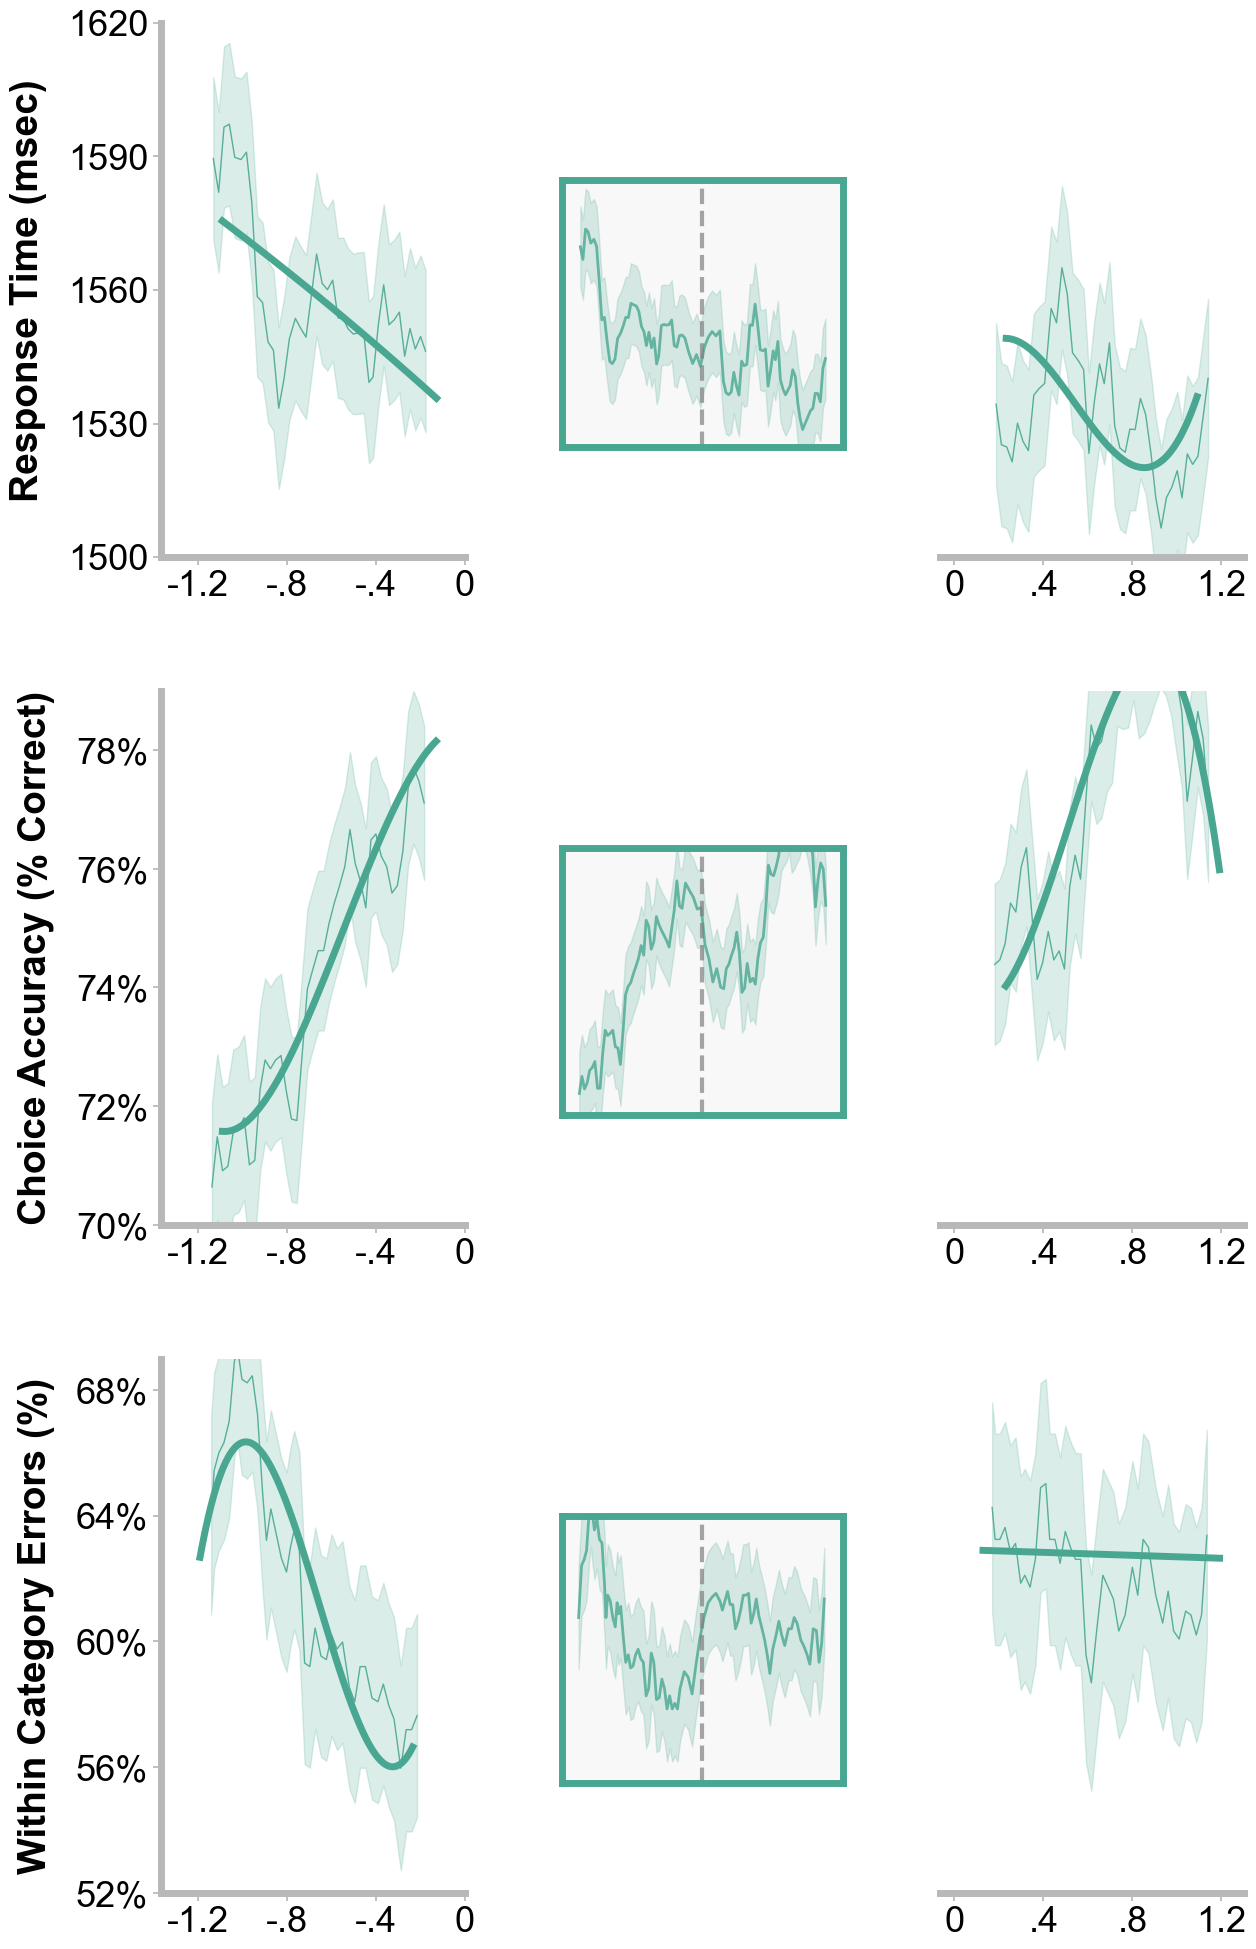

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import json
from matplotlib.ticker import FuncFormatter, MultipleLocator

def remove_leading_zero_formatter(x, pos):
    if x == 0:
        return '0'
    elif x > 0:
        formatted = f'{x:.2f}'.rstrip('0').rstrip('.')
        if formatted.startswith('0.'):
            return formatted[1:]
        return formatted
    else:
        formatted = f'{x:.2f}'.rstrip('0').rstrip('.')
        if formatted.startswith('-0.'):
            return '-' + formatted[2:]
        return formatted

def create_continuous_rolling_plot(df, x_col, y_col, item_col=None, 
                                 window_percent=0.1, step_percent=0.02,
                                 ax=None, 
                                 y_limits=None, x_limits=None,
                                 x_tick_step=None, y_tick_step=None, x_ticks=None,
                                 y_as_percentage=False, y_percentage_step=2,
                                 font_family='Arial',
                                 title_font_size=18, title_font_color='black', title_font_weight='bold',
                                 label_font_size=16, label_font_color='black', label_font_weight='bold',
                                 tick_font_size=14, tick_font_color='black',
                                 line_width=3, confidence_alpha=0.2,
                                 show_title=True):
    
    if "IT Distractor Similarity" in x_col:
        palette = ['#49a791']
    elif "V2 Distractor Similarity" in x_col:
        palette = ['#95c355']
    else:
        palette = ['#49a791']
    
    fig = combined_rolling_average_subplot(
        df=df, 
        x_col=x_col, 
        y_col=y_col, 
        item_col=item_col,
        window_percent=window_percent, 
        step_percent=step_percent,
        palette=palette,
        ax=ax, 
        show_title=False,
        show_xlabel=True,
        font_family=font_family, 
        title_font_size=title_font_size, 
        title_font_color=title_font_color, 
        title_font_weight=title_font_weight,
        label_font_size=label_font_size, 
        label_font_color=label_font_color, 
        label_font_weight=label_font_weight,
        tick_font_size=tick_font_size-2,
        tick_font_color=tick_font_color,
        y_as_percentage=y_as_percentage, 
        y_percentage_step=y_percentage_step, 
        x_tick_step=x_tick_step, 
        y_tick_step=y_tick_step,
        x_limits=x_limits, 
        y_limits=y_limits,
        x_ticks=x_ticks,
        line_width=line_width, 
        confidence_alpha=confidence_alpha
    )
    
    ax.axvline(x=0, color='grey', linestyle='--', alpha=0.7, linewidth=3)
    
    if show_title:
        ax.set_title("Continuous", fontsize=title_font_size-2, 
                    color=title_font_color, fontweight=title_font_weight, 
                    fontfamily=font_family, pad=15)
    
    ax.set_xlabel('')
    ax.tick_params(axis='x', bottom=False, labelbottom=False)
    ax.spines['bottom'].set_visible(False)
    
    return ax


def create_single_side_plot(df, x_col, y_col, item_col=None, 
                           split_col='v2_pos_neg', split_value=0, side='left',
                           window_percent=0.2, step_percent=0.02,
                           ax=None, palette=None,
                           y_limits=None, x_limits=None,
                           x_tick_step=None, y_tick_step=None,
                           model_order=2, trim_percentile=0,
                           y_as_percentage=False, y_percentage_step=2,
                           x_buffer_percent=0.05,
                           font_family='Arial',
                           title_font_size=18, title_font_color='black', title_font_weight='bold',
                           label_font_size=16, label_font_color='black', label_font_weight='bold',
                           tick_font_size=14, tick_font_color='black',
                           rolling_line_width=1, model_line_width=5,
                           confidence_alpha=0.2, rolling_alpha=0.9,
                           show_title=True, show_ylabel=True, show_xlabel=True,
                           grey_out_model=False,
                           # NEW PARAMETERS FOR MODEL FIT EXTRACTION
                           save_model_fits=False, model_fits_storage=None):
    
    grey = '#BFBFBF'
    blue = '#6cbcef'
    teal = '#49a791'
    purple = '#a271b1'
    salmon = '#e58a72'
    gold = '#dbad40'
    green = '#95c355'
    
    if palette is None:
        if "IT Distractor Similarity" in x_col:
            default_colors = [teal, grey]
        elif "V2 Distractor Similarity" in x_col:
            default_colors = [green, grey]
        else:
            default_colors = [teal, grey]
    else:
        default_colors = palette
    
    color_map = {
        'prioritized': default_colors[0],    
        'deprioritized': default_colors[1] if len(default_colors) > 1 else grey,  
    }
    
    if side == 'left':
        df_side = df[df[x_col] <= split_value].copy()
        title_text = f"{x_col} ≤ {split_value}"
    else:
        df_side = df[df[x_col] > split_value].copy()
        title_text = f"{x_col} > {split_value}"
    
    ax.set_facecolor('white')
    
    item_color_dict = {}
    if item_col is not None and item_col in df.columns:
        all_items = df[item_col].unique()
        for i, item in enumerate(all_items):
            item_lower = str(item).lower()
            if item_lower in color_map:
                item_color_dict[item] = color_map[item_lower]
            elif 'prioritized' in item_lower:
                item_color_dict[item] = color_map['prioritized']
            elif 'deprioritized' in item_lower:
                item_color_dict[item] = color_map['deprioritized']
            else:
                item_color_dict[item] = default_colors[i % len(default_colors)]
    
    # Initialize model fits storage for this side if saving is enabled
    if save_model_fits and model_fits_storage is not None:
        side_key = f"{side}_side"
        if side_key not in model_fits_storage:
            model_fits_storage[side_key] = {}
    
    if item_col is not None and item_col in df.columns:
        items = df_side[item_col].unique()
        
        for i, item in enumerate(items):
            df_item = df_side[df_side[item_col] == item].copy()
            df_item = df_item.sort_values(by=x_col).reset_index(drop=True)
            total_points = len(df_item)
            
            window_points = max(int(total_points * window_percent), 3)
            step_points = max(int(total_points * step_percent), 1)
            color = item_color_dict.get(item, default_colors[i % len(default_colors)])
            
            if total_points >= window_points:
                print(f"{side} side - {item}, Total points: {total_points}, "
                      f"Window size: {window_points}, Step size: {step_points}")
                
                x_vals, y_vals, y_errs = [], [], []
                for j in range(0, total_points - window_points + 1, step_points):
                    window = df_item.iloc[j:j+window_points]
                    mean_x = window[x_col].mean()
                    mean_y = window[y_col].mean()
                    std_y = window[y_col].std()
                    sem_y = std_y / np.sqrt(window_points) if std_y > 0 else 0
                    x_vals.append(mean_x)
                    y_vals.append(mean_y)
                    y_errs.append(sem_y)
                
                x_vals = np.array(x_vals)
                y_vals = np.array(y_vals)
                y_errs = np.array(y_errs)
                
                if len(x_vals) > 0:
                    ax.plot(x_vals, y_vals, color=color, linewidth=rolling_line_width, 
                           alpha=rolling_alpha, label=f'{item} (rolling)')
                    ax.fill_between(x_vals, 
                                   y_vals - 1.96 * y_errs,
                                   y_vals + 1.96 * y_errs,
                                   color=color, alpha=confidence_alpha)
        
        # Only plot model fits if grey_out_model is False
        if not grey_out_model:
            for i, item in enumerate(items):
                df_item = df_side[df_side[item_col] == item].copy()
                
                if trim_percentile > 0:
                    lower_p = np.percentile(df_item[x_col], trim_percentile)
                    upper_p = np.percentile(df_item[x_col], 100 - trim_percentile)
                    df_item_trimmed = df_item[(df_item[x_col] >= lower_p) & (df_item[x_col] <= upper_p)]
                else:
                    df_item_trimmed = df_item
                    
                total_points = len(df_item_trimmed)
                color = item_color_dict.get(item, default_colors[i % len(default_colors)])
                
                if total_points >= 5:
                    total_points_full = len(df_item)
                    window_points_full = max(int(total_points_full * window_percent), 3)
                    
                    df_item_sorted = df_item.sort_values(by=x_col)
                    rolling_min_x = df_item_sorted.iloc[window_points_full//2][x_col]
                    rolling_max_x = df_item_sorted.iloc[-(window_points_full//2 + 1)][x_col]
                    
                    points_below_rolling = len(df_item_trimmed[df_item_trimmed[x_col] < rolling_min_x])
                    points_above_rolling = len(df_item_trimmed[df_item_trimmed[x_col] > rolling_max_x])
                    
                    model_min_x = max(df_item_trimmed[x_col].min(), rolling_min_x)
                    model_max_x = min(df_item_trimmed[x_col].max(), rolling_max_x)
                    
                    points_in_model = len(df_item_trimmed[
                        (df_item_trimmed[x_col] >= model_min_x) & 
                        (df_item_trimmed[x_col] <= model_max_x)
                    ])
                    
                    points_excluded_by_trim = len(df_item) - len(df_item_trimmed)
                    
                    print(f"  📊 {side} side - {item} Model Fit Exclusions:")
                    print(f"     Total points: {len(df_item)}")
                    if trim_percentile > 0:
                        print(f"     Excluded by trimming ({trim_percentile}%): {points_excluded_by_trim}")
                        print(f"     Remaining after trim: {len(df_item_trimmed)}")
                    else:
                        print(f"     No trimming applied")
                    print(f"     Excluded by rolling constraint - Left edge: {points_below_rolling}")
                    print(f"     Excluded by rolling constraint - Right edge: {points_above_rolling}")
                    print(f"     Points used in model fit: {points_in_model}")
                    print(f"     Total excluded: {len(df_item) - points_in_model}")
                    
                    if model_max_x > model_min_x:
                        x_range = np.linspace(model_min_x, model_max_x, 100)
                        model = np.poly1d(np.polyfit(df_item_trimmed[x_col], df_item_trimmed[y_col], model_order))
                        
                        # EXTRACT MODEL FIT DATA
                        if save_model_fits and model_fits_storage is not None:
                            model_predictions = model(x_range)
                            
                            # Store model fit data
                            model_key = f"{item}"
                            model_fits_storage[side_key][model_key] = {
                                'x_values': x_range.tolist(),
                                'y_values': model_predictions.tolist(),
                                'model_coefficients': model.coefficients.tolist(),
                                'model_order': model_order,
                                'x_range_min': float(model_min_x),
                                'x_range_max': float(model_max_x),
                                'color': color,
                                'item_name': str(item),
                                'x_col': x_col,
                                'y_col': y_col,
                                'side': side,
                                'trim_percentile': trim_percentile,
                                'points_used_in_fit': int(points_in_model),
                                'total_points_available': int(len(df_item))
                            }
                        
                        ax.plot(x_range, model(x_range), color=color, linestyle='-', 
                                linewidth=model_line_width, label=f'{item} (model)')
    else:
        df_side_copy = df_side.copy().sort_values(by=x_col).reset_index(drop=True)
        total_points = len(df_side_copy)
        
        window_points = max(int(total_points * window_percent), 3)
        step_points = max(int(total_points * step_percent), 1)
        color = default_colors[0]
        
        if total_points >= window_points:
            print(f"{side} side - All Data, Total points: {total_points}, "
                  f"Window size: {window_points}, Step size: {step_points}")
            
            x_vals, y_vals, y_errs = [], [], []
            for j in range(0, total_points - window_points + 1, step_points):
                window = df_side_copy.iloc[j:j+window_points]
                mean_x = window[x_col].mean()
                mean_y = window[y_col].mean()
                std_y = window[y_col].std()
                sem_y = std_y / np.sqrt(window_points) if std_y > 0 else 0
                x_vals.append(mean_x)
                y_vals.append(mean_y)
                y_errs.append(sem_y)
            
            x_vals = np.array(x_vals)
            y_vals = np.array(y_vals)
            y_errs = np.array(y_errs)
            
            if len(x_vals) > 0:
                ax.plot(x_vals, y_vals, color=color, linewidth=rolling_line_width, 
                       alpha=rolling_alpha, label='Rolling average')
                ax.fill_between(x_vals, 
                               y_vals - 1.96 * y_errs,
                               y_vals + 1.96 * y_errs,
                               color=color, alpha=confidence_alpha)
        
        # Only plot model fits if grey_out_model is False
        if not grey_out_model:
            if trim_percentile > 0:
                lower_p = np.percentile(df_side_copy[x_col], trim_percentile)
                upper_p = np.percentile(df_side_copy[x_col], 100 - trim_percentile)
                df_side_trimmed = df_side_copy[(df_side_copy[x_col] >= lower_p) & (df_side_copy[x_col] <= upper_p)]
            else:
                df_side_trimmed = df_side_copy
                
            total_points_trimmed = len(df_side_trimmed)
            
            if total_points_trimmed >= 5:
                window_points_full = max(int(total_points * window_percent), 3)
                
                df_side_sorted = df_side_copy.sort_values(by=x_col)
                rolling_min_x = df_side_sorted.iloc[window_points_full//2][x_col]
                rolling_max_x = df_side_sorted.iloc[-(window_points_full//2 + 1)][x_col]
                
                points_below_rolling = len(df_side_trimmed[df_side_trimmed[x_col] < rolling_min_x])
                points_above_rolling = len(df_side_trimmed[df_side_trimmed[x_col] > rolling_max_x])
                
                model_min_x = max(df_side_trimmed[x_col].min(), rolling_min_x)
                model_max_x = min(df_side_trimmed[x_col].max(), rolling_max_x)
                
                points_in_model = len(df_side_trimmed[
                    (df_side_trimmed[x_col] >= model_min_x) & 
                    (df_side_trimmed[x_col] <= model_max_x)
                ])
                
                points_excluded_by_trim = len(df_side_copy) - len(df_side_trimmed)
                
                print(f"  📊 {side} side - All Data Model Fit Exclusions:")
                print(f"     Total points: {len(df_side_copy)}")
                if trim_percentile > 0:
                    print(f"     Excluded by trimming ({trim_percentile}%): {points_excluded_by_trim}")
                    print(f"     Remaining after trim: {len(df_side_trimmed)}")
                else:
                    print(f"     No trimming applied")
                print(f"     Excluded by rolling constraint - Left edge: {points_below_rolling}")
                print(f"     Excluded by rolling constraint - Right edge: {points_above_rolling}")
                print(f"     Points used in model fit: {points_in_model}")
                print(f"     Total excluded: {len(df_side_copy) - points_in_model}")
                
                if model_max_x > model_min_x:
                    x_range = np.linspace(model_min_x, model_max_x, 100)
                    model = np.poly1d(np.polyfit(df_side_trimmed[x_col], df_side_trimmed[y_col], model_order))
                    
                    # EXTRACT MODEL FIT DATA FOR ALL DATA CASE
                    if save_model_fits and model_fits_storage is not None:
                        model_predictions = model(x_range)
                        
                        # Store model fit data
                        model_key = "all_data"
                        model_fits_storage[side_key][model_key] = {
                            'x_values': x_range.tolist(),
                            'y_values': model_predictions.tolist(),
                            'model_coefficients': model.coefficients.tolist(),
                            'model_order': model_order,
                            'x_range_min': float(model_min_x),
                            'x_range_max': float(model_max_x),
                            'color': color,
                            'item_name': 'all_data',
                            'x_col': x_col,
                            'y_col': y_col,
                            'side': side,
                            'trim_percentile': trim_percentile,
                            'points_used_in_fit': int(points_in_model),
                            'total_points_available': int(len(df_side_copy))
                        }
                    
                    ax.plot(x_range, model(x_range), color=color, linestyle='-', 
                            linewidth=model_line_width, label='Model fit')
    
    if show_title:
        if side == 'left':
            ax.set_title("Negative", fontsize=title_font_size, 
                        color=title_font_color, fontweight=title_font_weight, 
                        fontfamily=font_family, pad=20)
        else:
            ax.set_title("Positive", fontsize=title_font_size, 
                        color=title_font_color, fontweight=title_font_weight, 
                        fontfamily=font_family, pad=20)
    
    if show_xlabel:
        if x_col in ["Tested - Untested IT Distractor Similarity"]:
            ax.set_xlabel("Relative IT Similarity", fontweight=label_font_weight, 
                         fontsize=label_font_size, color=label_font_color, fontfamily=font_family, labelpad=15)
        elif x_col in ["Tested - Untested V2 Distractor Similarity"]:
            ax.set_xlabel("Relative V2 Similarity", fontweight=label_font_weight, 
                         fontsize=label_font_size, color=label_font_color, fontfamily=font_family, labelpad=15)
        else:
            ax.set_xlabel(x_col, fontweight=label_font_weight, fontsize=label_font_size, 
                         color=label_font_color, fontfamily=font_family, labelpad=15)
    else:
        ax.set_xlabel('')
    
    if show_ylabel:
        if y_col.lower() in ['accuracy']:
            if y_as_percentage:
                ax.set_ylabel("Choice Accuracy (% Correct)", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family, labelpad=15)
                ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'{y*100:.0f}%'))
                if y_tick_step is None:
                    y_tick_step = y_percentage_step / 100.0
            else:
                ax.set_ylabel("Choice Accuracy (% Correct)", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family, labelpad=15)
        elif y_col.lower() in ['wm rt']:
            ax.set_ylabel("Response Time (msec)", fontweight=label_font_weight, 
                         fontsize=label_font_size, color=label_font_color, fontfamily=font_family, labelpad=15)
        elif y_col.lower() in ['error category accuracy']:
            if y_as_percentage:
                ax.set_ylabel("Within Category Errors (%)", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family, labelpad=15)
                ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'{y*100:.0f}%'))
                if y_tick_step is None:
                    y_tick_step = y_percentage_step / 100.0
            else:
                ax.set_ylabel("Within Category Errors", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family, labelpad=15)
        else:
            ax.set_ylabel(y_col, fontweight=label_font_weight, fontsize=label_font_size, 
                         color=label_font_color, fontfamily=font_family, labelpad=15)
    
    if x_tick_step is not None:
        ax.xaxis.set_major_locator(MultipleLocator(x_tick_step))
    if y_tick_step is not None:
        ax.yaxis.set_major_locator(MultipleLocator(y_tick_step))
    
    # Handle x-limits with buffer space from y-axis
    if x_limits is not None:
        if side == 'left':
            # For left side, extend further left to create buffer from y-axis
            x_min, x_max = x_limits[0], split_value
            x_range = abs(x_max - x_min)
            buffer = x_range * x_buffer_percent
            ax.set_xlim(x_min - buffer, x_max)
        else:
            # For right side, extend leftward (toward 0) to create buffer from y-axis  
            x_min, x_max = split_value, x_limits[1]
            x_range = abs(x_max - x_min)
            buffer = x_range * x_buffer_percent
            ax.set_xlim(x_min - buffer, x_max)
    else:
        # If no x_limits provided, get data range and add buffer
        if side == 'left':
            data_x_min = df_side[x_col].min()
            x_range = abs(split_value - data_x_min)
            buffer = x_range * x_buffer_percent
            ax.set_xlim(data_x_min - buffer, split_value)
        else:
            data_x_max = df_side[x_col].max()
            x_range = abs(data_x_max - split_value)
            buffer = x_range * x_buffer_percent
            ax.set_xlim(split_value - buffer, data_x_max)
    
    # Handle y-limits (keeping existing logic but simplifying)
    if y_limits is not None:
        ax.set_ylim(y_limits)
    elif y_col.lower() in ['accuracy', 'acc', 'correct', 'resp_correct']:
        ax.set_ylim(0.6, 0.8)
    
    ax.xaxis.set_major_formatter(FuncFormatter(remove_leading_zero_formatter))
    
    spine_color = '#B8B8B8'
    ax.tick_params(axis='x', colors=spine_color, labelsize=tick_font_size, labelcolor=tick_font_color)
    ax.tick_params(axis='y', colors=spine_color, labelsize=tick_font_size, labelcolor=tick_font_color)
    
    for label in ax.get_xticklabels():
        label.set_fontfamily(font_family)
    for label in ax.get_yticklabels():
        label.set_fontfamily(font_family)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_color(spine_color)
    ax.spines['left'].set_color(spine_color)
    ax.spines['bottom'].set_linewidth(5)
    ax.spines['left'].set_linewidth(5)
    ax.grid(False)
    
    return ax

def create_three_panel_visualization(plot_configs, middle_width=0.35, middle_height_shift=0.0, 
                                   middle_size_scale=0.7, adjustable_gap=0.01, 
                                   grey_out_models=None, x_buffer_percent=0.05,
                                   # NEW PARAMETERS FOR MODEL FIT EXTRACTION
                                   save_model_fits=False, model_fits_filename=None):
    """
    Create three-panel visualization with option to grey out specific model fits and save model fit data.
    
    Parameters:
    -----------
    grey_out_models : dict, optional
        Dictionary specifying which model fits to grey out.
        Format: {row_index: {'left': bool, 'right': bool}}
        Example: {2: {'right': True}} would grey out the model fit in row 2, right panel
    x_buffer_percent : float, optional
        Percentage of x-range to add as buffer space between y-axis and plot data (default: 0.05 = 5%)
    save_model_fits : bool, optional
        Whether to extract and save model fit data (default: False)
    model_fits_filename : str, optional
        Base filename for saving model fits. Will create both .pkl and .json files (default: 'model_fits')
    
    Returns:
    --------
    fig : matplotlib figure
        The created figure
    model_fits_data : dict (if save_model_fits=True)
        Dictionary containing all extracted model fit data
    """
    
    from matplotlib.gridspec import GridSpec
    
    fig = plt.figure(figsize=(18, 22))
    
    # Initialize model fits storage
    if save_model_fits:
        all_model_fits = {}
        if model_fits_filename is None:
            model_fits_filename = 'model_fits'
    
    # Keep plot sizes FIXED regardless of gap size
    original_gap_width = 0.01
    original_remaining_width = 1.0 - middle_width - 2*original_gap_width
    fixed_side_width = original_remaining_width / 2 * 0.6
    fixed_middle_width = middle_width
    
    current_gap_width = adjustable_gap
    
    total_plot_width = 2 * fixed_side_width + fixed_middle_width + 2 * current_gap_width
    remaining_for_margins = 1.0 - total_plot_width
    outer_margin = remaining_for_margins / 2
    
    if outer_margin < 0.001:
        outer_margin = 0.001
    
    gs = GridSpec(3, 7, figure=fig, 
                  width_ratios=[outer_margin, fixed_side_width, current_gap_width, fixed_middle_width, current_gap_width, fixed_side_width, outer_margin],  
                  height_ratios=[1, 1, 1],   
                  hspace=0.25, wspace=0.01,
                  top=0.95, bottom=0.1, left=0.05, right=0.95)
    axes = []
    for row in range(3):
        ax_left = fig.add_subplot(gs[row, 1])
        ax_middle = fig.add_subplot(gs[row, 3])
        ax_right = fig.add_subplot(gs[row, 5])
        axes.append([ax_left, ax_middle, ax_right])

    all_handles = []
    all_labels = []
    
    # Initialize grey_out_models if not provided
    if grey_out_models is None:
        grey_out_models = {}
    
    for row, config in enumerate(plot_configs):
        x_col = config['x_col']
        if "IT Distractor Similarity" in x_col:
            frame_color = '#49a791'
        elif "V2 Distractor Similarity" in x_col:
            frame_color = '#95c355'
        else:
            frame_color = '#49a791'
        
        y_limits = config.get('y_limits')
        
        # Check if left side should be greyed out
        grey_left = grey_out_models.get(row, {}).get('left', False)
        grey_right = grey_out_models.get(row, {}).get('right', False)
        
        # Initialize storage for this row's model fits
        if save_model_fits:
            row_model_fits = {}
        
        create_single_side_plot(
            config['df'],
            x_col=config['x_col'],
            y_col=config['y_col'],
            item_col=config.get('item_col'),
            side='left',
            ax=axes[row][0],
            y_limits=y_limits,
            x_limits=config.get('x_limits'),
            x_tick_step=config.get('x_tick_step'),
            y_tick_step=config.get('y_tick_step'),
            model_order=config.get('left_model_order', 2),
            trim_percentile=config.get('trim_percentile', 0),
            window_percent=config.get('window_percent', 0.2),
            step_percent=config.get('step_percent', 0.02),
            y_as_percentage=config.get('y_as_percentage', False),
            y_percentage_step=config.get('y_percentage_step', 2),
            x_buffer_percent=x_buffer_percent,
            font_family=config.get('font_family', 'Arial'),
            label_font_size=config.get('label_font_size', 16),
            tick_font_size=config.get('tick_font_size', 14),
            show_title=False,
            show_ylabel=True,
            show_xlabel=False,
            grey_out_model=grey_left,
            save_model_fits=save_model_fits,
            model_fits_storage=row_model_fits if save_model_fits else None
        )
        
        axes[row][0].xaxis.set_major_formatter(FuncFormatter(remove_leading_zero_formatter))
        
        create_continuous_rolling_plot(
            config['df'],
            x_col=config['x_col'],
            y_col=config['y_col'],
            item_col=config.get('item_col'),
            ax=axes[row][1],
            y_limits=y_limits,
            x_limits=config.get('x_limits'),
            x_tick_step=config.get('x_tick_step'),
            y_tick_step=config.get('y_tick_step'),
            x_ticks=config.get('x_ticks'),
            y_as_percentage=config.get('y_as_percentage', False),
            y_percentage_step=config.get('y_percentage_step', 2),
            font_family=config.get('font_family', 'Arial'),
            label_font_size=config.get('label_font_size', 14),
            tick_font_size=config.get('tick_font_size', 12),
            window_percent=0.1,
            step_percent = 0.01,
            line_width=2,
            show_title=False
        )
        
        axes[row][1].set_xlabel('')
        axes[row][1].tick_params(axis='x', bottom=False, labelbottom=False)
        axes[row][1].spines['bottom'].set_visible(False)
        
        for spine_name, spine in axes[row][1].spines.items():
            spine.set_visible(True)
            spine.set_linewidth(5)
            spine.set_color(frame_color)
        
        axes[row][1].set_facecolor('#f8f8f8')
        
        pos = axes[row][1].get_position()
        new_width = pos.width * middle_size_scale
        new_height = pos.height * middle_size_scale
        new_x = pos.x0 + (pos.width - new_width) / 2
        new_y = pos.y0 + middle_height_shift
        
        new_pos = [new_x, new_y, new_width, new_height]
        axes[row][1].set_position(new_pos)
        
        create_single_side_plot(
            config['df'],
            x_col=config['x_col'],
            y_col=config['y_col'],
            item_col=config.get('item_col'),
            side='right',
            ax=axes[row][2],
            y_limits=y_limits,
            x_limits=config.get('x_limits'),
            x_tick_step=config.get('x_tick_step'),
            y_tick_step=config.get('y_tick_step'),
            model_order=config.get('right_model_order', 2),
            trim_percentile=config.get('trim_percentile', 0),
            window_percent=config.get('window_percent', 0.2),
            step_percent=config.get('step_percent', 0.02),
            y_as_percentage=config.get('y_as_percentage', False),
            y_percentage_step=config.get('y_percentage_step', 2),
            x_buffer_percent=x_buffer_percent,
            font_family=config.get('font_family', 'Arial'),
            label_font_size=config.get('label_font_size', 16),
            tick_font_size=config.get('tick_font_size', 14),
            show_title=False,
            show_ylabel=False,
            show_xlabel=False,
            grey_out_model=grey_right,
            save_model_fits=save_model_fits,
            model_fits_storage=row_model_fits if save_model_fits else None
        )
        
        axes[row][2].xaxis.set_major_formatter(FuncFormatter(remove_leading_zero_formatter))
        
        axes[row][1].set_ylabel('')
        axes[row][1].tick_params(axis='y', labelleft=False, left=False)
        
        axes[row][2].set_ylabel('')
        axes[row][2].tick_params(axis='y', labelleft=False, left=False)
        axes[row][2].spines['left'].set_visible(False)
        
        # Store model fits for this row
        if save_model_fits:
            row_key = f"row_{row}"
            all_model_fits[row_key] = {
                'config': {
                    'x_col': config['x_col'],
                    'y_col': config['y_col'],
                    'item_col': config.get('item_col'),
                    'model_orders': {
                        'left': config.get('left_model_order', 2),
                        'right': config.get('right_model_order', 2)
                    },
                    'trim_percentile': config.get('trim_percentile', 0),
                    'window_percent': config.get('window_percent', 0.2),
                    'step_percent': config.get('step_percent', 0.02)
                },
                'model_fits': row_model_fits
            }
        
        for col in range(3):
            handles, labels = axes[row][col].get_legend_handles_labels()
            for handle, label in zip(handles, labels):
                if "(" in label:
                    base_label = label.split("(")[0].strip()
                else:
                    base_label = label
                if base_label not in all_labels:
                    all_handles.append(handle)
                    all_labels.append(base_label)
        
        axes[row][0].xaxis.set_major_formatter(FuncFormatter(remove_leading_zero_formatter))
        axes[row][2].xaxis.set_major_formatter(FuncFormatter(remove_leading_zero_formatter))
    
    # Save model fits if requested
    if save_model_fits:
        # Save as pickle file (preserves exact data types)
        with open(f'{model_fits_filename}.pkl', 'wb') as f:
            pickle.dump(all_model_fits, f)
        
        # Save as JSON file (human readable, but may have slight precision loss)
        with open(f'{model_fits_filename}.json', 'w') as f:
            json.dump(all_model_fits, f, indent=2)
        
        print(f"\n📁 Model fits saved to:")
        print(f"   - {model_fits_filename}.pkl (pickle format)")
        print(f"   - {model_fits_filename}.json (JSON format)")
        print(f"   Total rows processed: {len(all_model_fits)}")
        
        # Print summary of saved data
        for row_key, row_data in all_model_fits.items():
            print(f"\n{row_key}:")
            for side, side_data in row_data['model_fits'].items():
                print(f"  {side}: {len(side_data)} model fits")
                for model_key in side_data.keys():
                    print(f"    - {model_key}")
    
    plt.show()
    
    if save_model_fits:
        return fig, all_model_fits
    else:
        return fig

# UTILITY FUNCTIONS FOR WORKING WITH SAVED MODEL FITS

def load_model_fits(filename):
    """
    Load model fits from saved files.
    
    Parameters:
    -----------
    filename : str
        Base filename (without extension). Will try to load .pkl first, then .json
        
    Returns:
    --------
    dict : Model fits data
    """
    import os
    
    # Try pickle first (preserves exact data types)
    pickle_file = f"{filename}.pkl"
    json_file = f"{filename}.json"
    
    if os.path.exists(pickle_file):
        with open(pickle_file, 'rb') as f:
            return pickle.load(f)
    elif os.path.exists(json_file):
        with open(json_file, 'r') as f:
            return json.load(f)
    else:
        raise FileNotFoundError(f"Neither {pickle_file} nor {json_file} found")

def plot_model_fits_only(model_fits_data, row_indices=None, sides=None, 
                         figsize=(15, 10), save_plot=False, plot_filename='model_fits_only'):
    """
    Plot only the model fits from saved data.
    
    Parameters:
    -----------
    model_fits_data : dict
        Model fits data (from load_model_fits or returned from create_three_panel_visualization)
    row_indices : list, optional
        Which rows to plot (default: all rows)
    sides : list, optional  
        Which sides to plot: ['left', 'right'] (default: both sides)
    figsize : tuple, optional
        Figure size (default: (15, 10))
    save_plot : bool, optional
        Whether to save the plot (default: False)
    plot_filename : str, optional
        Filename for saved plot (default: 'model_fits_only')
    """
    
    if row_indices is None:
        row_indices = list(range(len(model_fits_data)))
    
    if sides is None:
        sides = ['left', 'right']
    
    fig, axes = plt.subplots(len(row_indices), len(sides), figsize=figsize)
    
    if len(row_indices) == 1:
        axes = [axes] if len(sides) > 1 else [[axes]]
    elif len(sides) == 1:
        axes = [[ax] for ax in axes]
    
    for i, row_idx in enumerate(row_indices):
        row_key = f"row_{row_idx}"
        if row_key not in model_fits_data:
            continue
            
        row_data = model_fits_data[row_key]
        
        for j, side in enumerate(sides):
            ax = axes[i][j]
            side_key = f"{side}_side"
            
            if side_key in row_data['model_fits']:
                side_data = row_data['model_fits'][side_key]
                
                for model_key, model_info in side_data.items():
                    x_vals = np.array(model_info['x_values'])
                    y_vals = np.array(model_info['y_values'])
                    color = model_info['color']
                    
                    ax.plot(x_vals, y_vals, color=color, linewidth=3, 
                           label=f"{model_info['item_name']}")
            
            # Add axis labels and formatting
            config = row_data['config']
            ax.set_xlabel(config['x_col'])
            if j == 0:  # Only leftmost plot gets y-label
                ax.set_ylabel(config['y_col'])
            
            ax.set_title(f"Row {row_idx} - {side.title()} side")
            ax.legend()
            ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    if save_plot:
        plt.savefig(f'{plot_filename}.png', dpi=300, bbox_inches='tight')
        plt.savefig(f'{plot_filename}.pdf', bbox_inches='tight')
        print(f"Model fits plot saved as {plot_filename}.png and {plot_filename}.pdf")
    
    plt.show()
    return fig

def export_model_fits_to_csv(model_fits_data, filename='model_fits_data.csv'):
    """
    Export model fits data to CSV format for easy analysis.
    
    Parameters:
    -----------
    model_fits_data : dict
        Model fits data
    filename : str, optional
        Output CSV filename (default: 'model_fits_data.csv')
    """
    
    rows = []
    
    for row_key, row_data in model_fits_data.items():
        config = row_data['config']
        
        for side_key, side_data in row_data['model_fits'].items():
            side = side_key.replace('_side', '')
            
            for model_key, model_info in side_data.items():
                # Create one row per x,y coordinate pair
                x_vals = model_info['x_values']
                y_vals = model_info['y_values']
                
                for x, y in zip(x_vals, y_vals):
                    rows.append({
                        'row': row_key,
                        'side': side,
                        'item': model_info['item_name'],
                        'x_col': model_info['x_col'],
                        'y_col': model_info['y_col'],
                        'x_value': x,
                        'y_value': y,
                        'model_order': model_info['model_order'],
                        'x_range_min': model_info['x_range_min'],
                        'x_range_max': model_info['x_range_max'],
                        'points_used_in_fit': model_info['points_used_in_fit'],
                        'total_points_available': model_info['total_points_available'],
                        'trim_percentile': model_info['trim_percentile'],
                        'color': model_info['color']
                    })
    
    df = pd.DataFrame(rows)
    # df.to_csv(filename, index=False)
    print(f"Model fits data exported to {filename}")
    print(f"Total data points: {len(df)}")
    return df

fig, model_fits = create_three_panel_visualization(
    plot_configs_it,
    middle_width=0.35,
    middle_height_shift=0.05,
    middle_size_scale=0.5,
    adjustable_gap=-0.03,
    # grey_out_models={2: {'right': True}},
    x_buffer_percent=0.05,
    save_model_fits=True,  # Enable model fit saving
    model_fits_filename='trash'  # Custom filename
)

In [ ]:
# fig_it = create_three_panel_visualization(
#     plot_configs_it,
#     middle_width=0.35,
#     middle_height_shift=0.05,
#     middle_size_scale=0.5,
#     adjustable_gap=-0.03,
#     grey_out_models={2: {'right': True}},  # Grey out row 2, right panel
#     x_buffer_percent=0.05  # 5% buffer space between y-axis and plot data
# )


fig, model_fits = create_three_panel_visualization(
    plot_configs_it,
    middle_width=0.35,
    middle_height_shift=0.05,
    middle_size_scale=0.5,
    adjustable_gap=-0.03,
    # grey_out_models={2: {'right': True}},
    x_buffer_percent=0.05,
    save_model_fits=True,  # Enable model fit saving
    model_fits_filename='trash'  # Custom filename
)

left side - All Data, Total points: 14944, Window size: 2988, Step size: 298
  📊 left side - All Data Model Fit Exclusions:
     Total points: 14944
     No trimming applied
     Excluded by rolling constraint - Left edge: 1457
     Excluded by rolling constraint - Right edge: 1455
     Points used in model fit: 12032
     Total excluded: 2912
Total points: 30196, Window size: 3019, Step size: 301


In [ ]:
# fig_v2 = create_three_panel_visualization(
#     plot_configs_v2,
#     middle_width=0.35,
#     middle_height_shift=0.05,
#     middle_size_scale=0.5,
#     adjustable_gap=-0.03,
#     # grey_out_models={1: {'right': True}},  # Grey out row 2, right panel
#     x_buffer_percent=0.05  # 5% buffer space between y-axis and plot data
# )

fig, model_fits = create_three_panel_visualization(
    plot_configs_v2,
    middle_width=0.35,
    middle_height_shift=0.05,
    middle_size_scale=0.5,
    adjustable_gap=-0.03,
    # grey_out_models={2: {'right': True}},
    x_buffer_percent=0.05,
    save_model_fits=True,  # Enable model fit saving
    model_fits_filename='trash'  # Custom filename
)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import json
from matplotlib.ticker import FuncFormatter, MultipleLocator

def remove_leading_zero_formatter(x, pos):
    if x == 0:
        return '0'
    elif x > 0:
        formatted = f'{x:.2f}'.rstrip('0').rstrip('.')
        if formatted.startswith('0.'):
            return formatted[1:]
        return formatted
    else:
        formatted = f'{x:.2f}'.rstrip('0').rstrip('.')
        if formatted.startswith('-0.'):
            return '-' + formatted[2:]
        return formatted

def create_continuous_rolling_plot(df, x_col, y_col, item_col=None, 
                                 window_percent=0.1, step_percent=0.02,
                                 ax=None, 
                                 y_limits=None, x_limits=None,
                                 x_tick_step=None, y_tick_step=None, x_ticks=None,
                                 y_as_percentage=False, y_percentage_step=2,
                                 font_family='Arial',
                                 title_font_size=18, title_font_color='black', title_font_weight='bold',
                                 label_font_size=16, label_font_color='black', label_font_weight='bold',
                                 tick_font_size=14, tick_font_color='black',
                                 line_width=3, confidence_alpha=0.2,
                                 show_title=True,
                                 # NEW PARAMETERS FOR MODEL FIT EXTRACTION
                                 save_accuracy_model_fits=False, model_fits_storage=None,
                                 model_order=2, trim_percentile=0):
    
    if "IT Distractor Similarity" in x_col:
        palette = ['#49a791']
    elif "V2 Distractor Similarity" in x_col:
        palette = ['#95c355']
    else:
        palette = ['#49a791']
    
    # Check if we should save model fits
    should_save_model_fits = (save_accuracy_model_fits and 
                             model_fits_storage is not None and 
                             'accuracy' in y_col.lower() and
                             'error' not in y_col.lower())
    
    if should_save_model_fits:
        # Initialize storage for left and right sides
        if 'left_side' not in model_fits_storage:
            model_fits_storage['left_side'] = {}
        if 'right_side' not in model_fits_storage:
            model_fits_storage['right_side'] = {}
    
    # Compute rolling averages and extract model fits if needed
    if should_save_model_fits or ax is not None:
        # Process each item separately or all data together
        if item_col is not None and item_col in df.columns:
            items = df[item_col].unique()
            
            for i, item in enumerate(items):
                df_item = df[df[item_col] == item].copy()
                df_item = df_item.sort_values(by=x_col).reset_index(drop=True)
                total_points = len(df_item)
                
                window_points = max(int(total_points * window_percent), 3)
                step_points = max(int(total_points * step_percent), 1)
                color = palette[i % len(palette)]
                
                if total_points >= window_points:
                    print(f"Continuous rolling - {item}, Total points: {total_points}, "
                          f"Window size: {window_points}, Step size: {step_points}")
                    
                    # Compute rolling averages
                    x_vals, y_vals, y_errs = [], [], []
                    for j in range(0, total_points - window_points + 1, step_points):
                        window = df_item.iloc[j:j+window_points]
                        mean_x = window[x_col].mean()
                        mean_y = window[y_col].mean()
                        std_y = window[y_col].std()
                        sem_y = std_y / np.sqrt(window_points) if std_y > 0 else 0
                        x_vals.append(mean_x)
                        y_vals.append(mean_y)
                        y_errs.append(sem_y)
                    
                    x_vals = np.array(x_vals)
                    y_vals = np.array(y_vals)
                    y_errs = np.array(y_errs)
                    
                    # Plot rolling averages if ax is provided
                    if ax is not None and len(x_vals) > 0:
                        ax.plot(x_vals, y_vals, color=color, linewidth=line_width, 
                               alpha=0.8, label=f'{item} (rolling)')
                        ax.fill_between(x_vals, 
                                       y_vals - 1.96 * y_errs,
                                       y_vals + 1.96 * y_errs,
                                       color=color, alpha=confidence_alpha)
                    
                    # Extract model fits if needed
                    if should_save_model_fits and len(x_vals) >= 5:
                        # Create DataFrame from rolling averages for model fitting
                        rolling_df = pd.DataFrame({
                            x_col: x_vals,
                            y_col: y_vals
                        })
                        
                        # Apply trimming if specified
                        if trim_percentile > 0:
                            lower_p = np.percentile(rolling_df[x_col], trim_percentile)
                            upper_p = np.percentile(rolling_df[x_col], 100 - trim_percentile)
                            rolling_df_trimmed = rolling_df[(rolling_df[x_col] >= lower_p) & (rolling_df[x_col] <= upper_p)]
                        else:
                            rolling_df_trimmed = rolling_df
                        
                        # Split at x=0 and create model fits for each side
                        left_data = rolling_df_trimmed[rolling_df_trimmed[x_col] <= 0]
                        right_data = rolling_df_trimmed[rolling_df_trimmed[x_col] > 0]
                        
                        # Left side model fit (x <= 0)
                        if len(left_data) >= 3:
                            # For accuracy data, extend TO x=0
                            model_min_x = left_data[x_col].min()
                            model_max_x = 0  # Always extend to x=0
                            
                            print(f"  📊 Continuous Left - {item} Accuracy Model Fit (extended to x=0):")
                            print(f"     Rolling average points: {len(left_data)}")
                            print(f"     Model range: x=[{model_min_x:.3f}, {model_max_x:.3f}]")
                            
                            if model_max_x > model_min_x:
                                x_range = np.linspace(model_min_x, model_max_x, 100)
                                model = np.poly1d(np.polyfit(left_data[x_col], left_data[y_col], model_order))
                                model_predictions = model(x_range)
                                
                                # Extended range for continuous plotting
                                extended_x_range = np.linspace(model_min_x - 0.1, model_max_x + 0.1, 200)
                                extended_predictions = model(extended_x_range)
                                
                                model_key = f"{item}"
                                model_fits_storage['left_side'][model_key] = {
                                    'x_values': x_range.tolist(),
                                    'y_values': model_predictions.tolist(),
                                    'extended_x_values': extended_x_range.tolist(),
                                    'extended_y_values': extended_predictions.tolist(),
                                    'model_coefficients': model.coefficients.tolist(),
                                    'model_order': model_order,
                                    'x_range_min': float(model_min_x),
                                    'x_range_max': float(model_max_x),
                                    'color': color,
                                    'item_name': str(item),
                                    'x_col': x_col,
                                    'y_col': y_col,
                                    'side': 'left',
                                    'trim_percentile': trim_percentile,
                                    'points_used_in_fit': int(len(left_data)),
                                    'total_points_available': int(len(rolling_df)),
                                    'polynomial_function': {
                                        'coefficients': model.coefficients.tolist(),
                                        'order': model_order,
                                        'domain_min': float(model_min_x),
                                        'domain_max': float(model_max_x)
                                    }
                                }
                        
                        # Right side model fit (x > 0)
                        if len(right_data) >= 3:
                            # For accuracy data, start FROM x=0
                            model_min_x = 0  # Always start from x=0
                            model_max_x = right_data[x_col].max()
                            
                            print(f"  📊 Continuous Right - {item} Accuracy Model Fit (starting from x=0):")
                            print(f"     Rolling average points: {len(right_data)}")
                            print(f"     Model range: x=[{model_min_x:.3f}, {model_max_x:.3f}]")
                            
                            if model_max_x > model_min_x:
                                x_range = np.linspace(model_min_x, model_max_x, 100)
                                model = np.poly1d(np.polyfit(right_data[x_col], right_data[y_col], model_order))
                                model_predictions = model(x_range)
                                
                                # Extended range for continuous plotting
                                extended_x_range = np.linspace(model_min_x - 0.1, model_max_x + 0.1, 200)
                                extended_predictions = model(extended_x_range)
                                
                                model_key = f"{item}"
                                model_fits_storage['right_side'][model_key] = {
                                    'x_values': x_range.tolist(),
                                    'y_values': model_predictions.tolist(),
                                    'extended_x_values': extended_x_range.tolist(),
                                    'extended_y_values': extended_predictions.tolist(),
                                    'model_coefficients': model.coefficients.tolist(),
                                    'model_order': model_order,
                                    'x_range_min': float(model_min_x),
                                    'x_range_max': float(model_max_x),
                                    'color': color,
                                    'item_name': str(item),
                                    'x_col': x_col,
                                    'y_col': y_col,
                                    'side': 'right',
                                    'trim_percentile': trim_percentile,
                                    'points_used_in_fit': int(len(right_data)),
                                    'total_points_available': int(len(rolling_df)),
                                    'polynomial_function': {
                                        'coefficients': model.coefficients.tolist(),
                                        'order': model_order,
                                        'domain_min': float(model_min_x),
                                        'domain_max': float(model_max_x)
                                    }
                                }
        
        else:  # No item_col, process all data together
            df_copy = df.copy().sort_values(by=x_col).reset_index(drop=True)
            total_points = len(df_copy)
            
            window_points = max(int(total_points * window_percent), 3)
            step_points = max(int(total_points * step_percent), 1)
            color = palette[0]
            
            if total_points >= window_points:
                print(f"Continuous rolling - All Data, Total points: {total_points}, "
                      f"Window size: {window_points}, Step size: {step_points}")
                
                # Compute rolling averages
                x_vals, y_vals, y_errs = [], [], []
                for j in range(0, total_points - window_points + 1, step_points):
                    window = df_copy.iloc[j:j+window_points]
                    mean_x = window[x_col].mean()
                    mean_y = window[y_col].mean()
                    std_y = window[y_col].std()
                    sem_y = std_y / np.sqrt(window_points) if std_y > 0 else 0
                    x_vals.append(mean_x)
                    y_vals.append(mean_y)
                    y_errs.append(sem_y)
                
                x_vals = np.array(x_vals)
                y_vals = np.array(y_vals)
                y_errs = np.array(y_errs)
                
                # Plot rolling averages if ax is provided
                if ax is not None and len(x_vals) > 0:
                    ax.plot(x_vals, y_vals, color=color, linewidth=line_width, 
                           alpha=0.8, label='Rolling average')
                    ax.fill_between(x_vals, 
                                   y_vals - 1.96 * y_errs,
                                   y_vals + 1.96 * y_errs,
                                   color=color, alpha=confidence_alpha)
                
                # Extract model fits if needed
                if should_save_model_fits and len(x_vals) >= 5:
                    # Create DataFrame from rolling averages for model fitting
                    rolling_df = pd.DataFrame({
                        x_col: x_vals,
                        y_col: y_vals
                    })
                    
                    # Apply trimming if specified
                    if trim_percentile > 0:
                        lower_p = np.percentile(rolling_df[x_col], trim_percentile)
                        upper_p = np.percentile(rolling_df[x_col], 100 - trim_percentile)
                        rolling_df_trimmed = rolling_df[(rolling_df[x_col] >= lower_p) & (rolling_df[x_col] <= upper_p)]
                    else:
                        rolling_df_trimmed = rolling_df
                    
                    # Split at x=0 and create model fits for each side
                    left_data = rolling_df_trimmed[rolling_df_trimmed[x_col] <= 0]
                    right_data = rolling_df_trimmed[rolling_df_trimmed[x_col] > 0]
                    
                    # Left side model fit (x <= 0)
                    if len(left_data) >= 3:
                        model_min_x = left_data[x_col].min()
                        model_max_x = 0  # Always extend to x=0
                        
                        print(f"  📊 Continuous Left - All Data Accuracy Model Fit (extended to x=0):")
                        print(f"     Rolling average points: {len(left_data)}")
                        print(f"     Model range: x=[{model_min_x:.3f}, {model_max_x:.3f}]")
                        
                        if model_max_x > model_min_x:
                            x_range = np.linspace(model_min_x, model_max_x, 100)
                            model = np.poly1d(np.polyfit(left_data[x_col], left_data[y_col], model_order))
                            model_predictions = model(x_range)
                            
                            extended_x_range = np.linspace(model_min_x - 0.1, model_max_x + 0.1, 200)
                            extended_predictions = model(extended_x_range)
                            
                            model_key = "all_data"
                            model_fits_storage['left_side'][model_key] = {
                                'x_values': x_range.tolist(),
                                'y_values': model_predictions.tolist(),
                                'extended_x_values': extended_x_range.tolist(),
                                'extended_y_values': extended_predictions.tolist(),
                                'model_coefficients': model.coefficients.tolist(),
                                'model_order': model_order,
                                'x_range_min': float(model_min_x),
                                'x_range_max': float(model_max_x),
                                'color': color,
                                'item_name': 'all_data',
                                'x_col': x_col,
                                'y_col': y_col,
                                'side': 'left',
                                'trim_percentile': trim_percentile,
                                'points_used_in_fit': int(len(left_data)),
                                'total_points_available': int(len(rolling_df)),
                                'polynomial_function': {
                                    'coefficients': model.coefficients.tolist(),
                                    'order': model_order,
                                    'domain_min': float(model_min_x),
                                    'domain_max': float(model_max_x)
                                }
                            }
                    
                    # Right side model fit (x > 0)
                    if len(right_data) >= 3:
                        model_min_x = 0  # Always start from x=0
                        model_max_x = right_data[x_col].max()
                        
                        print(f"  📊 Continuous Right - All Data Accuracy Model Fit (starting from x=0):")
                        print(f"     Rolling average points: {len(right_data)}")
                        print(f"     Model range: x=[{model_min_x:.3f}, {model_max_x:.3f}]")
                        
                        if model_max_x > model_min_x:
                            x_range = np.linspace(model_min_x, model_max_x, 100)
                            model = np.poly1d(np.polyfit(right_data[x_col], right_data[y_col], model_order))
                            model_predictions = model(x_range)
                            
                            extended_x_range = np.linspace(model_min_x - 0.1, model_max_x + 0.1, 200)
                            extended_predictions = model(extended_x_range)
                            
                            model_key = "all_data"
                            model_fits_storage['right_side'][model_key] = {
                                'x_values': x_range.tolist(),
                                'y_values': model_predictions.tolist(),
                                'extended_x_values': extended_x_range.tolist(),
                                'extended_y_values': extended_predictions.tolist(),
                                'model_coefficients': model.coefficients.tolist(),
                                'model_order': model_order,
                                'x_range_min': float(model_min_x),
                                'x_range_max': float(model_max_x),
                                'color': color,
                                'item_name': 'all_data',
                                'x_col': x_col,
                                'y_col': y_col,
                                'side': 'right',
                                'trim_percentile': trim_percentile,
                                'points_used_in_fit': int(len(right_data)),
                                'total_points_available': int(len(rolling_df)),
                                'polynomial_function': {
                                    'coefficients': model.coefficients.tolist(),
                                    'order': model_order,
                                    'domain_min': float(model_min_x),
                                    'domain_max': float(model_max_x)
                                }
                            }
    
    # Continue with original plotting code if ax is provided
    if ax is not None:
        ax.axvline(x=0, color='grey', linestyle='--', alpha=0.7, linewidth=3)
        
        if show_title:
            ax.set_title("Continuous", fontsize=title_font_size-2, 
                        color=title_font_color, fontweight=title_font_weight, 
                        fontfamily=font_family, pad=15)
        
        ax.set_xlabel('')
        ax.tick_params(axis='x', bottom=False, labelbottom=False)
        ax.spines['bottom'].set_visible(False)
        
        # Set limits and formatting
        if y_limits is not None:
            ax.set_ylim(y_limits)
        if x_limits is not None:
            ax.set_xlim(x_limits)
        
        if x_tick_step is not None:
            ax.xaxis.set_major_locator(MultipleLocator(x_tick_step))
        if y_tick_step is not None:
            ax.yaxis.set_major_locator(MultipleLocator(y_tick_step))
        
        if y_as_percentage:
            ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'{y*100:.0f}%'))
        
        ax.xaxis.set_major_formatter(FuncFormatter(remove_leading_zero_formatter))
        
        # Style the plot
        spine_color = '#B8B8B8'
        ax.tick_params(axis='x', colors=spine_color, labelsize=tick_font_size-2, labelcolor=tick_font_color)
        ax.tick_params(axis='y', colors=spine_color, labelsize=tick_font_size-2, labelcolor=tick_font_color)
        
        for label in ax.get_xticklabels():
            label.set_fontfamily(font_family)
        for label in ax.get_yticklabels():
            label.set_fontfamily(font_family)
    
    return ax


def create_single_side_plot(df, x_col, y_col, item_col=None, 
                           split_col='v2_pos_neg', split_value=0, side='left',
                           window_percent=0.2, step_percent=0.02,
                           ax=None, palette=None,
                           y_limits=None, x_limits=None,
                           x_tick_step=None, y_tick_step=None,
                           model_order=2, trim_percentile=0,
                           y_as_percentage=False, y_percentage_step=2,
                           x_buffer_percent=0.05,
                           font_family='Arial',
                           title_font_size=18, title_font_color='black', title_font_weight='bold',
                           label_font_size=16, label_font_color='black', label_font_weight='bold',
                           tick_font_size=14, tick_font_color='black',
                           rolling_line_width=1, model_line_width=5,
                           confidence_alpha=0.2, rolling_alpha=0.9,
                           show_title=True, show_ylabel=True, show_xlabel=True,
                           grey_out_model=False,
                           # REMOVED MODEL FIT EXTRACTION - NOW HANDLED BY CONTINUOUS PLOT
                           save_accuracy_model_fits=False, model_fits_storage=None):
    
    grey = '#BFBFBF'
    blue = '#6cbcef'
    teal = '#49a791'
    purple = '#a271b1'
    salmon = '#e58a72'
    gold = '#dbad40'
    green = '#95c355'
    
    if palette is None:
        if "IT Distractor Similarity" in x_col:
            default_colors = [teal, grey]
        elif "V2 Distractor Similarity" in x_col:
            default_colors = [green, grey]
        else:
            default_colors = [teal, grey]
    else:
        default_colors = palette
    
    color_map = {
        'prioritized': default_colors[0],    
        'deprioritized': default_colors[1] if len(default_colors) > 1 else grey,  
    }
    
    if side == 'left':
        df_side = df[df[x_col] <= split_value].copy()
        title_text = f"{x_col} ≤ {split_value}"
    else:
        df_side = df[df[x_col] > split_value].copy()
        title_text = f"{x_col} > {split_value}"
    
    ax.set_facecolor('white')
    
    item_color_dict = {}
    if item_col is not None and item_col in df.columns:
        all_items = df[item_col].unique()
        for i, item in enumerate(all_items):
            item_lower = str(item).lower()
            if item_lower in color_map:
                item_color_dict[item] = color_map[item_lower]
            elif 'prioritized' in item_lower:
                item_color_dict[item] = color_map['prioritized']
            elif 'deprioritized' in item_lower:
                item_color_dict[item] = color_map['deprioritized']
            else:
                item_color_dict[item] = default_colors[i % len(default_colors)]
    
    # NOTE: Model fit extraction removed from side plots - now handled by continuous plot
    
    if item_col is not None and item_col in df.columns:
        items = df_side[item_col].unique()
        
        for i, item in enumerate(items):
            df_item = df_side[df_side[item_col] == item].copy()
            df_item = df_item.sort_values(by=x_col).reset_index(drop=True)
            total_points = len(df_item)
            
            window_points = max(int(total_points * window_percent), 3)
            step_points = max(int(total_points * step_percent), 1)
            color = item_color_dict.get(item, default_colors[i % len(default_colors)])
            
            if total_points >= window_points:
                print(f"{side} side - {item}, Total points: {total_points}, "
                      f"Window size: {window_points}, Step size: {step_points}")
                
                x_vals, y_vals, y_errs = [], [], []
                for j in range(0, total_points - window_points + 1, step_points):
                    window = df_item.iloc[j:j+window_points]
                    mean_x = window[x_col].mean()
                    mean_y = window[y_col].mean()
                    std_y = window[y_col].std()
                    sem_y = std_y / np.sqrt(window_points) if std_y > 0 else 0
                    x_vals.append(mean_x)
                    y_vals.append(mean_y)
                    y_errs.append(sem_y)
                
                x_vals = np.array(x_vals)
                y_vals = np.array(y_vals)
                y_errs = np.array(y_errs)
                
                if len(x_vals) > 0:
                    ax.plot(x_vals, y_vals, color=color, linewidth=rolling_line_width, 
                           alpha=rolling_alpha, label=f'{item} (rolling)')
                    ax.fill_between(x_vals, 
                                   y_vals - 1.96 * y_errs,
                                   y_vals + 1.96 * y_errs,
                                   color=color, alpha=confidence_alpha)
        
        # Only plot model fits if grey_out_model is False
        if not grey_out_model:
            for i, item in enumerate(items):
                df_item = df_side[df_side[item_col] == item].copy()
                
                if trim_percentile > 0:
                    lower_p = np.percentile(df_item[x_col], trim_percentile)
                    upper_p = np.percentile(df_item[x_col], 100 - trim_percentile)
                    df_item_trimmed = df_item[(df_item[x_col] >= lower_p) & (df_item[x_col] <= upper_p)]
                else:
                    df_item_trimmed = df_item
                    
                total_points = len(df_item_trimmed)
                color = item_color_dict.get(item, default_colors[i % len(default_colors)])
                
                if total_points >= 5:
                    total_points_full = len(df_item)
                    window_points_full = max(int(total_points_full * window_percent), 3)
                    
                    df_item_sorted = df_item.sort_values(by=x_col)
                    rolling_min_x = df_item_sorted.iloc[window_points_full//2][x_col]
                    rolling_max_x = df_item_sorted.iloc[-(window_points_full//2 + 1)][x_col]
                    
                    points_below_rolling = len(df_item_trimmed[df_item_trimmed[x_col] < rolling_min_x])
                    points_above_rolling = len(df_item_trimmed[df_item_trimmed[x_col] > rolling_max_x])
                    
                    model_min_x = max(df_item_trimmed[x_col].min(), rolling_min_x)
                    model_max_x = min(df_item_trimmed[x_col].max(), rolling_max_x)
                    
                    points_in_model = len(df_item_trimmed[
                        (df_item_trimmed[x_col] >= model_min_x) & 
                        (df_item_trimmed[x_col] <= model_max_x)
                    ])
                    
                    points_excluded_by_trim = len(df_item) - len(df_item_trimmed)
                    
                    print(f"  📊 {side} side - {item} Model Fit Exclusions:")
                    print(f"     Total points: {len(df_item)}")
                    if trim_percentile > 0:
                        print(f"     Excluded by trimming ({trim_percentile}%): {points_excluded_by_trim}")
                        print(f"     Remaining after trim: {len(df_item_trimmed)}")
                    else:
                        print(f"     No trimming applied")
                    print(f"     Excluded by rolling constraint - Left edge: {points_below_rolling}")
                    print(f"     Excluded by rolling constraint - Right edge: {points_above_rolling}")
                    print(f"     Points used in model fit: {points_in_model}")
                    print(f"     Total excluded: {len(df_item) - points_in_model}")
                    
                    if model_max_x > model_min_x:
                        x_range = np.linspace(model_min_x, model_max_x, 100)
                        model = np.poly1d(np.polyfit(df_item_trimmed[x_col], df_item_trimmed[y_col], model_order))
                        
                        ax.plot(x_range, model(x_range), color=color, linestyle='-', 
                                linewidth=model_line_width, label=f'{item} (model)')
    else:
        df_side_copy = df_side.copy().sort_values(by=x_col).reset_index(drop=True)
        total_points = len(df_side_copy)
        
        window_points = max(int(total_points * window_percent), 3)
        step_points = max(int(total_points * step_percent), 1)
        color = default_colors[0]
        
        if total_points >= window_points:
            print(f"{side} side - All Data, Total points: {total_points}, "
                  f"Window size: {window_points}, Step size: {step_points}")
            
            x_vals, y_vals, y_errs = [], [], []
            for j in range(0, total_points - window_points + 1, step_points):
                window = df_side_copy.iloc[j:j+window_points]
                mean_x = window[x_col].mean()
                mean_y = window[y_col].mean()
                std_y = window[y_col].std()
                sem_y = std_y / np.sqrt(window_points) if std_y > 0 else 0
                x_vals.append(mean_x)
                y_vals.append(mean_y)
                y_errs.append(sem_y)
            
            x_vals = np.array(x_vals)
            y_vals = np.array(y_vals)
            y_errs = np.array(y_errs)
            
            if len(x_vals) > 0:
                ax.plot(x_vals, y_vals, color=color, linewidth=rolling_line_width, 
                       alpha=rolling_alpha, label='Rolling average')
                ax.fill_between(x_vals, 
                               y_vals - 1.96 * y_errs,
                               y_vals + 1.96 * y_errs,
                               color=color, alpha=confidence_alpha)
        
        # Only plot model fits if grey_out_model is False
        if not grey_out_model:
            if trim_percentile > 0:
                lower_p = np.percentile(df_side_copy[x_col], trim_percentile)
                upper_p = np.percentile(df_side_copy[x_col], 100 - trim_percentile)
                df_side_trimmed = df_side_copy[(df_side_copy[x_col] >= lower_p) & (df_side_copy[x_col] <= upper_p)]
            else:
                df_side_trimmed = df_side_copy
                
            total_points_trimmed = len(df_side_trimmed)
            
            if total_points_trimmed >= 5:
                window_points_full = max(int(total_points * window_percent), 3)
                
                df_side_sorted = df_side_copy.sort_values(by=x_col)
                rolling_min_x = df_side_sorted.iloc[window_points_full//2][x_col]
                rolling_max_x = df_side_sorted.iloc[-(window_points_full//2 + 1)][x_col]
                
                points_below_rolling = len(df_side_trimmed[df_side_trimmed[x_col] < rolling_min_x])
                points_above_rolling = len(df_side_trimmed[df_side_trimmed[x_col] > rolling_max_x])
                
                model_min_x = max(df_side_trimmed[x_col].min(), rolling_min_x)
                model_max_x = min(df_side_trimmed[x_col].max(), rolling_max_x)
                
                points_in_model = len(df_side_trimmed[
                    (df_side_trimmed[x_col] >= model_min_x) & 
                    (df_side_trimmed[x_col] <= model_max_x)
                ])
                
                points_excluded_by_trim = len(df_side_copy) - len(df_side_trimmed)
                
                print(f"  📊 {side} side - All Data Model Fit Exclusions:")
                print(f"     Total points: {len(df_side_copy)}")
                if trim_percentile > 0:
                    print(f"     Excluded by trimming ({trim_percentile}%): {points_excluded_by_trim}")
                    print(f"     Remaining after trim: {len(df_side_trimmed)}")
                else:
                    print(f"     No trimming applied")
                print(f"     Excluded by rolling constraint - Left edge: {points_below_rolling}")
                print(f"     Excluded by rolling constraint - Right edge: {points_above_rolling}")
                print(f"     Points used in model fit: {points_in_model}")
                print(f"     Total excluded: {len(df_side_copy) - points_in_model}")
                
                if model_max_x > model_min_x:
                    x_range = np.linspace(model_min_x, model_max_x, 100)
                    model = np.poly1d(np.polyfit(df_side_trimmed[x_col], df_side_trimmed[y_col], model_order))
                    
                    ax.plot(x_range, model(x_range), color=color, linestyle='-', 
                            linewidth=model_line_width, label='Model fit')
    
    if show_title:
        if side == 'left':
            ax.set_title("Negative", fontsize=title_font_size, 
                        color=title_font_color, fontweight=title_font_weight, 
                        fontfamily=font_family, pad=20)
        else:
            ax.set_title("Positive", fontsize=title_font_size, 
                        color=title_font_color, fontweight=title_font_weight, 
                        fontfamily=font_family, pad=20)
    
    if show_xlabel:
        if x_col in ["Tested - Untested IT Distractor Similarity"]:
            ax.set_xlabel("Relative IT Similarity", fontweight=label_font_weight, 
                         fontsize=label_font_size, color=label_font_color, fontfamily=font_family, labelpad=15)
        elif x_col in ["Tested - Untested V2 Distractor Similarity"]:
            ax.set_xlabel("Relative V2 Similarity", fontweight=label_font_weight, 
                         fontsize=label_font_size, color=label_font_color, fontfamily=font_family, labelpad=15)
        else:
            ax.set_xlabel(x_col, fontweight=label_font_weight, fontsize=label_font_size, 
                         color=label_font_color, fontfamily=font_family, labelpad=15)
    else:
        ax.set_xlabel('')
    
    if show_ylabel:
        if y_col.lower() in ['accuracy']:
            if y_as_percentage:
                ax.set_ylabel("Choice Accuracy (% Correct)", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family, labelpad=15)
                ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'{y*100:.0f}%'))
                if y_tick_step is None:
                    y_tick_step = y_percentage_step / 100.0
            else:
                ax.set_ylabel("Choice Accuracy (% Correct)", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family, labelpad=15)
        elif y_col.lower() in ['wm rt']:
            ax.set_ylabel("Response Time (msec)", fontweight=label_font_weight, 
                         fontsize=label_font_size, color=label_font_color, fontfamily=font_family, labelpad=15)
        elif y_col.lower() in ['error category accuracy']:
            if y_as_percentage:
                ax.set_ylabel("Within Category Errors (%)", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family, labelpad=15)
                ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'{y*100:.0f}%'))
                if y_tick_step is None:
                    y_tick_step = y_percentage_step / 100.0
            else:
                ax.set_ylabel("Within Category Errors", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family, labelpad=15)
        else:
            ax.set_ylabel(y_col, fontweight=label_font_weight, fontsize=label_font_size, 
                         color=label_font_color, fontfamily=font_family, labelpad=15)
    
    if x_tick_step is not None:
        ax.xaxis.set_major_locator(MultipleLocator(x_tick_step))
    if y_tick_step is not None:
        ax.yaxis.set_major_locator(MultipleLocator(y_tick_step))
    
    # Handle x-limits with buffer space from y-axis
    if x_limits is not None:
        if side == 'left':
            # For left side, extend further left to create buffer from y-axis
            x_min, x_max = x_limits[0], split_value
            x_range = abs(x_max - x_min)
            buffer = x_range * x_buffer_percent
            ax.set_xlim(x_min - buffer, x_max)
        else:
            # For right side, extend leftward (toward 0) to create buffer from y-axis  
            x_min, x_max = split_value, x_limits[1]
            x_range = abs(x_max - x_min)
            buffer = x_range * x_buffer_percent
            ax.set_xlim(x_min - buffer, x_max)
    else:
        # If no x_limits provided, get data range and add buffer
        if side == 'left':
            data_x_min = df_side[x_col].min()
            x_range = abs(split_value - data_x_min)
            buffer = x_range * x_buffer_percent
            ax.set_xlim(data_x_min - buffer, split_value)
        else:
            data_x_max = df_side[x_col].max()
            x_range = abs(data_x_max - split_value)
            buffer = x_range * x_buffer_percent
            ax.set_xlim(split_value - buffer, data_x_max)
    
    # Handle y-limits (keeping existing logic but simplifying)
    if y_limits is not None:
        ax.set_ylim(y_limits)
    elif y_col.lower() in ['accuracy', 'acc', 'correct', 'resp_correct']:
        ax.set_ylim(0.6, 0.8)
    
    ax.xaxis.set_major_formatter(FuncFormatter(remove_leading_zero_formatter))
    
    spine_color = '#B8B8B8'
    ax.tick_params(axis='x', colors=spine_color, labelsize=tick_font_size, labelcolor=tick_font_color)
    ax.tick_params(axis='y', colors=spine_color, labelsize=tick_font_size, labelcolor=tick_font_color)
    
    for label in ax.get_xticklabels():
        label.set_fontfamily(font_family)
    for label in ax.get_yticklabels():
        label.set_fontfamily(font_family)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_color(spine_color)
    ax.spines['left'].set_color(spine_color)
    ax.spines['bottom'].set_linewidth(5)
    ax.spines['left'].set_linewidth(5)
    ax.grid(False)
    
    return ax

def create_three_panel_visualization(plot_configs, middle_width=0.35, middle_height_shift=0.0, 
                                   middle_size_scale=0.7, adjustable_gap=0.01, 
                                   grey_out_models=None, x_buffer_percent=0.05,
                                   # MODIFIED PARAMETERS FOR CONTINUOUS ROLLING AVERAGE MODEL FIT EXTRACTION
                                   save_accuracy_model_fits=False, accuracy_model_fits_filename=None):
    """
    Create three-panel visualization with option to save ONLY row 1 (second row) accuracy model fits.
    Model fits are now extracted from the continuous rolling average (middle panel) instead of left/right panels.
    Excludes error accuracy measurements.
    
    Parameters:
    -----------
    grey_out_models : dict, optional
        Dictionary specifying which model fits to grey out.
        Format: {row_index: {'left': bool, 'right': bool}}
        Example: {2: {'right': True}} would grey out the model fit in row 2, right panel
    x_buffer_percent : float, optional
        Percentage of x-range to add as buffer space between y-axis and plot data (default: 0.05 = 5%)
    save_accuracy_model_fits : bool, optional
        Whether to extract and save ONLY row 1 accuracy model fit data (excludes error accuracy) (default: False)
    accuracy_model_fits_filename : str, optional
        Base filename for saving accuracy model fits. Will create both .pkl and .json files (default: 'accuracy_model_fits')
    
    Returns:
    --------
    fig : matplotlib figure
        The created figure
    accuracy_model_fits_data : dict (if save_accuracy_model_fits=True)
        Dictionary containing only row 1 accuracy model fit data extracted from continuous rolling averages
    """
    
    from matplotlib.gridspec import GridSpec
    
    fig = plt.figure(figsize=(18, 22))
    
    # Initialize accuracy model fits storage
    if save_accuracy_model_fits:
        all_accuracy_model_fits = {}
        if accuracy_model_fits_filename is None:
            accuracy_model_fits_filename = 'accuracy_model_fits'
    
    # Keep plot sizes FIXED regardless of gap size
    original_gap_width = 0.01
    original_remaining_width = 1.0 - middle_width - 2*original_gap_width
    fixed_side_width = original_remaining_width / 2 * 0.6
    fixed_middle_width = middle_width
    
    current_gap_width = adjustable_gap
    
    total_plot_width = 2 * fixed_side_width + fixed_middle_width + 2 * current_gap_width
    remaining_for_margins = 1.0 - total_plot_width
    outer_margin = remaining_for_margins / 2
    
    if outer_margin < 0.001:
        outer_margin = 0.001
    
    gs = GridSpec(3, 7, figure=fig, 
                  width_ratios=[outer_margin, fixed_side_width, current_gap_width, fixed_middle_width, current_gap_width, fixed_side_width, outer_margin],  
                  height_ratios=[1, 1, 1],   
                  hspace=0.25, wspace=0.01,
                  top=0.95, bottom=0.1, left=0.05, right=0.95)
    axes = []
    for row in range(3):
        ax_left = fig.add_subplot(gs[row, 1])
        ax_middle = fig.add_subplot(gs[row, 3])
        ax_right = fig.add_subplot(gs[row, 5])
        axes.append([ax_left, ax_middle, ax_right])

    all_handles = []
    all_labels = []
    
    # Initialize grey_out_models if not provided
    if grey_out_models is None:
        grey_out_models = {}
    
    for row, config in enumerate(plot_configs):
        x_col = config['x_col']
        y_col = config['y_col']
        
        # MODIFIED: Check if this is row 1 (second row) and contains pure accuracy data (not error accuracy)
        is_accuracy_row = (row == 1 and 
                          'accuracy' in y_col.lower() and 
                          'error' not in y_col.lower())
        
        if "IT Distractor Similarity" in x_col:
            frame_color = '#49a791'
        elif "V2 Distractor Similarity" in x_col:
            frame_color = '#95c355'
        else:
            frame_color = '#49a791'
        
        y_limits = config.get('y_limits')
        
        # Check if left side should be greyed out
        grey_left = grey_out_models.get(row, {}).get('left', False)
        grey_right = grey_out_models.get(row, {}).get('right', False)
        
        # Initialize storage for this row's accuracy model fits only
        if save_accuracy_model_fits and is_accuracy_row:
            row_accuracy_model_fits = {}
            print(f"\n🎯 Row {row}: Extracting model fits from continuous rolling average (y_col='{y_col}')")
        else:
            row_accuracy_model_fits = None
            if save_accuracy_model_fits and not is_accuracy_row:
                if row != 1:
                    print(f"\n⏭️  Row {row}: Skipping - only saving row 1 (second row)")
                elif 'error' in y_col.lower():
                    print(f"\n⏭️  Row {row}: Skipping - excluding error accuracy (y_col='{y_col}')")
                elif 'accuracy' not in y_col.lower():
                    print(f"\n⏭️  Row {row}: Skipping - not accuracy data (y_col='{y_col}')")
        
        create_single_side_plot(
            config['df'],
            x_col=config['x_col'],
            y_col=config['y_col'],
            item_col=config.get('item_col'),
            side='left',
            ax=axes[row][0],
            y_limits=y_limits,
            x_limits=config.get('x_limits'),
            x_tick_step=config.get('x_tick_step'),
            y_tick_step=config.get('y_tick_step'),
            model_order=config.get('left_model_order', 2),
            trim_percentile=config.get('trim_percentile', 0),
            window_percent=config.get('window_percent', 0.2),
            step_percent=config.get('step_percent', 0.02),
            y_as_percentage=config.get('y_as_percentage', False),
            y_percentage_step=config.get('y_percentage_step', 2),
            x_buffer_percent=x_buffer_percent,
            font_family=config.get('font_family', 'Arial'),
            label_font_size=config.get('label_font_size', 16),
            tick_font_size=config.get('tick_font_size', 14),
            show_title=False,
            show_ylabel=True,
            show_xlabel=False,
            grey_out_model=grey_left,
            # Model fit extraction removed from side plots
            save_accuracy_model_fits=False,
            model_fits_storage=None
        )
        
        axes[row][0].xaxis.set_major_formatter(FuncFormatter(remove_leading_zero_formatter))
        
        # MODIFIED: Extract model fits from continuous rolling average
        create_continuous_rolling_plot(
            config['df'],
            x_col=config['x_col'],
            y_col=config['y_col'],
            item_col=config.get('item_col'),
            ax=axes[row][1],
            y_limits=y_limits,
            x_limits=config.get('x_limits'),
            x_tick_step=config.get('x_tick_step'),
            y_tick_step=config.get('y_tick_step'),
            x_ticks=config.get('x_ticks'),
            y_as_percentage=config.get('y_as_percentage', False),
            y_percentage_step=config.get('y_percentage_step', 2),
            font_family=config.get('font_family', 'Arial'),
            label_font_size=config.get('label_font_size', 14),
            tick_font_size=config.get('tick_font_size', 12),
            window_percent=0.1,
            step_percent = 0.01,
            line_width=2,
            show_title=False,
            # NEW: Extract model fits from continuous rolling average
            save_accuracy_model_fits=save_accuracy_model_fits,
            model_fits_storage=row_accuracy_model_fits if row_accuracy_model_fits is not None else None,
            model_order=config.get('left_model_order', 2),  # Use same model order as left side
            trim_percentile=config.get('trim_percentile', 0)
        )
        
        axes[row][1].set_xlabel('')
        axes[row][1].tick_params(axis='x', bottom=False, labelbottom=False)
        axes[row][1].spines['bottom'].set_visible(False)
        
        for spine_name, spine in axes[row][1].spines.items():
            spine.set_visible(True)
            spine.set_linewidth(5)
            spine.set_color(frame_color)
        
        axes[row][1].set_facecolor('#f8f8f8')
        
        pos = axes[row][1].get_position()
        new_width = pos.width * middle_size_scale
        new_height = pos.height * middle_size_scale
        new_x = pos.x0 + (pos.width - new_width) / 2
        new_y = pos.y0 + middle_height_shift
        
        new_pos = [new_x, new_y, new_width, new_height]
        axes[row][1].set_position(new_pos)
        
        create_single_side_plot(
            config['df'],
            x_col=config['x_col'],
            y_col=config['y_col'],
            item_col=config.get('item_col'),
            side='right',
            ax=axes[row][2],
            y_limits=y_limits,
            x_limits=config.get('x_limits'),
            x_tick_step=config.get('x_tick_step'),
            y_tick_step=config.get('y_tick_step'),
            model_order=config.get('right_model_order', 2),
            trim_percentile=config.get('trim_percentile', 0),
            window_percent=config.get('window_percent', 0.2),
            step_percent=config.get('step_percent', 0.02),
            y_as_percentage=config.get('y_as_percentage', False),
            y_percentage_step=config.get('y_percentage_step', 2),
            x_buffer_percent=x_buffer_percent,
            font_family=config.get('font_family', 'Arial'),
            label_font_size=config.get('label_font_size', 16),
            tick_font_size=config.get('tick_font_size', 14),
            show_title=False,
            show_ylabel=False,
            show_xlabel=False,
            grey_out_model=grey_right,
            # Model fit extraction removed from side plots
            save_accuracy_model_fits=False,
            model_fits_storage=None
        )
        
        axes[row][2].xaxis.set_major_formatter(FuncFormatter(remove_leading_zero_formatter))
        
        axes[row][1].set_ylabel('')
        axes[row][1].tick_params(axis='y', labelleft=False, left=False)
        
        axes[row][2].set_ylabel('')
        axes[row][2].tick_params(axis='y', labelleft=False, left=False)
        axes[row][2].spines['left'].set_visible(False)
        
        # Store accuracy model fits for this row (only if it was an accuracy row)
        if save_accuracy_model_fits and is_accuracy_row and row_accuracy_model_fits:
            row_key = f"row_{row}"
            all_accuracy_model_fits[row_key] = {
                'config': {
                    'x_col': config['x_col'],
                    'y_col': config['y_col'],
                    'item_col': config.get('item_col'),
                    'model_orders': {
                        'left': config.get('left_model_order', 2),
                        'right': config.get('right_model_order', 2)
                    },
                    'trim_percentile': config.get('trim_percentile', 0),
                    'window_percent': 0.1,  # From continuous rolling plot
                    'step_percent': 0.01    # From continuous rolling plot
                },
                'model_fits': row_accuracy_model_fits,
                'source': 'continuous_rolling_average'  # Mark the source
            }
        
        for col in range(3):
            handles, labels = axes[row][col].get_legend_handles_labels()
            for handle, label in zip(handles, labels):
                if "(" in label:
                    base_label = label.split("(")[0].strip()
                else:
                    base_label = label
                if base_label not in all_labels:
                    all_handles.append(handle)
                    all_labels.append(base_label)
        
        axes[row][0].xaxis.set_major_formatter(FuncFormatter(remove_leading_zero_formatter))
        axes[row][2].xaxis.set_major_formatter(FuncFormatter(remove_leading_zero_formatter))
    
    # Save accuracy model fits if requested
    if save_accuracy_model_fits:
        if all_accuracy_model_fits:  # Only save if we actually have accuracy data
            # Save as pickle file (preserves exact data types)
            with open(f'{accuracy_model_fits_filename}.pkl', 'wb') as f:
                pickle.dump(all_accuracy_model_fits, f)
            
            # Save as JSON file (human readable, but may have slight precision loss)
            with open(f'{accuracy_model_fits_filename}.json', 'w') as f:
                json.dump(all_accuracy_model_fits, f, indent=2)
            
            print(f"\n📁 Row 1 accuracy model fits (from continuous rolling average) saved to:")
            print(f"   - {accuracy_model_fits_filename}.pkl (pickle format)")
            print(f"   - {accuracy_model_fits_filename}.json (JSON format)")
            print(f"   Total accuracy rows processed: {len(all_accuracy_model_fits)} (row 1 only)")
            print(f"   Source: Continuous rolling average (middle panel)")
            
            # Print summary of saved data
            for row_key, row_data in all_accuracy_model_fits.items():
                print(f"\n{row_key} (y_col: {row_data['config']['y_col']}):")
                for side, side_data in row_data['model_fits'].items():
                    print(f"  {side}: {len(side_data)} model fits")
                    for model_key in side_data.keys():
                        print(f"    - {model_key}")
        else:
            print(f"\n⚠️  No row 1 accuracy data found - no files saved")
    
    plt.show()
    
    if save_accuracy_model_fits and all_accuracy_model_fits:
        return fig, all_accuracy_model_fits
    else:
        return fig


# ENHANCED UTILITY FUNCTIONS FOR WORKING WITH CONTINUOUS ROLLING AVERAGE ACCURACY MODEL FITS

def load_accuracy_model_fits(filename):
    """
    Load accuracy model fits from saved files.
    
    Parameters:
    -----------
    filename : str
        Base filename (without extension). Will try to load .pkl first, then .json
        
    Returns:
    --------
    dict : Accuracy model fits data
    """
    import os
    
    # Try pickle first (preserves exact data types)
    pickle_file = f"{filename}.pkl"
    json_file = f"{filename}.json"
    
    if os.path.exists(pickle_file):
        with open(pickle_file, 'rb') as f:
            return pickle.load(f)
    elif os.path.exists(json_file):
        with open(json_file, 'r') as f:
            return json.load(f)
    else:
        raise FileNotFoundError(f"Neither {pickle_file} nor {json_file} found")

def create_continuous_model_fits(accuracy_model_fits_data, x_range_extension=0.2, num_points=500):
    """
    Create continuous left and right model fits from saved accuracy data.
    Left side fits ALWAYS extend TO x=0, right side fits ALWAYS start FROM x=0.
    
    Parameters:
    -----------
    accuracy_model_fits_data : dict
        Loaded accuracy model fits data
    x_range_extension : float
        How much to extend the x-range beyond the original domain (default: 0.2)
    num_points : int
        Number of points for the continuous curves (default: 500)
        
    Returns:
    --------
    dict : Dictionary containing continuous model fits for easy plotting
    """
    
    continuous_fits = {}
    
    for row_key, row_data in accuracy_model_fits_data.items():
        continuous_fits[row_key] = {
            'config': row_data['config'],
            'continuous_left': {},
            'continuous_right': {},
            'source': row_data.get('source', 'unknown')
        }
        
        # Process left and right sides
        for side_key, side_data in row_data['model_fits'].items():
            side = side_key.replace('_side', '')
            
            for model_key, model_info in side_data.items():
                # Get polynomial coefficients
                coeffs = model_info['model_coefficients']
                domain_min = model_info['x_range_min']
                domain_max = model_info['x_range_max']
                
                # Extend the domain, but respect x=0 boundary
                domain_range = domain_max - domain_min
                
                if side == 'left':
                    # Left side: extend leftward but ALWAYS end at x=0
                    extended_min = domain_min - (domain_range * x_range_extension)
                    extended_max = 0  # Always end at exactly x=0
                else:
                    # Right side: ALWAYS start at x=0 and extend rightward
                    extended_min = 0  # Always start at exactly x=0
                    extended_max = domain_max + (domain_range * x_range_extension)
                
                # Create extended x values
                x_extended = np.linspace(extended_min, extended_max, num_points)
                
                # Recreate polynomial and compute y values
                poly = np.poly1d(coeffs)
                y_extended = poly(x_extended)
                
                # Store continuous fit data
                continuous_data = {
                    'x_values': x_extended.tolist(),
                    'y_values': y_extended.tolist(),
                    'original_domain_min': domain_min,
                    'original_domain_max': domain_max,
                    'extended_domain_min': extended_min,
                    'extended_domain_max': extended_max,
                    'model_coefficients': coeffs,
                    'model_order': model_info['model_order'],
                    'color': model_info['color'],
                    'item_name': model_info['item_name'],
                    'x_col': model_info['x_col'],
                    'y_col': model_info['y_col'],
                    'side': side,
                    'source': row_data.get('source', 'unknown')
                }
                
                if side == 'left':
                    continuous_fits[row_key]['continuous_left'][model_key] = continuous_data
                else:
                    continuous_fits[row_key]['continuous_right'][model_key] = continuous_data
    
    return continuous_fits

def plot_continuous_accuracy_fits(continuous_fits_data, row_indices=None, 
                                figsize=(16, 8), save_plot=False, plot_filename='continuous_accuracy_fits'):
    """
    Plot continuous left and right accuracy model fits.
    
    Parameters:
    -----------
    continuous_fits_data : dict
        Output from create_continuous_model_fits()
    row_indices : list, optional
        Which rows to plot (default: all rows)
    figsize : tuple, optional
        Figure size (default: (16, 8))
    save_plot : bool, optional
        Whether to save the plot (default: False)
    plot_filename : str, optional
        Filename for saved plot (default: 'continuous_accuracy_fits')
    """
    
    if row_indices is None:
        row_indices = list(range(len(continuous_fits_data)))
    
    # Create subplot structure - fixed for single row case
    num_rows = len(row_indices)
    fig, axes = plt.subplots(num_rows, 2, figsize=figsize)
    
    # Handle single row case properly
    if num_rows == 1:
        axes = axes.reshape(1, -1)  # Make it (1, 2) shape
    
    for i, row_idx in enumerate(row_indices):
        row_key = f"row_{row_idx}"
        if row_key not in continuous_fits_data:
            continue
            
        row_data = continuous_fits_data[row_key]
        
        # Get the appropriate axes for this row
        ax_left = axes[i, 0]
        ax_right = axes[i, 1]
        
        # Plot left side (x < 0)
        for model_key, model_data in row_data['continuous_left'].items():
            x_vals = np.array(model_data['x_values'])
            y_vals = np.array(model_data['y_values'])
            color = model_data['color']
            
            ax_left.plot(x_vals, y_vals, color=color, linewidth=3, 
                        label=f"{model_data['item_name']}")
            
            # Highlight original domain
            orig_mask = (x_vals >= model_data['original_domain_min']) & (x_vals <= model_data['original_domain_max'])
            if np.any(orig_mask):
                ax_left.plot(x_vals[orig_mask], y_vals[orig_mask], color=color, linewidth=5, alpha=0.8)
        
        ax_left.axvline(x=0, color='grey', linestyle='--', alpha=0.7, linewidth=2)
        source_info = row_data.get('source', 'unknown')
        ax_left.set_title(f"Row {row_idx} - Left Side (x < 0)\nSource: {source_info}")
        ax_left.set_xlabel(row_data['config']['x_col'])
        ax_left.set_ylabel(row_data['config']['y_col'])
        ax_left.legend()
        ax_left.grid(True, alpha=0.3)
        
        # Plot right side (x > 0)
        for model_key, model_data in row_data['continuous_right'].items():
            x_vals = np.array(model_data['x_values'])
            y_vals = np.array(model_data['y_values'])
            color = model_data['color']
            
            ax_right.plot(x_vals, y_vals, color=color, linewidth=3, 
                         label=f"{model_data['item_name']}")
            
            # Highlight original domain
            orig_mask = (x_vals >= model_data['original_domain_min']) & (x_vals <= model_data['original_domain_max'])
            if np.any(orig_mask):
                ax_right.plot(x_vals[orig_mask], y_vals[orig_mask], color=color, linewidth=5, alpha=0.8)
        
        ax_right.axvline(x=0, color='grey', linestyle='--', alpha=0.7, linewidth=2)
        ax_right.set_title(f"Row {row_idx} - Right Side (x > 0)\nSource: {source_info}")
        ax_right.set_xlabel(row_data['config']['x_col'])
        ax_right.set_ylabel(row_data['config']['y_col'])
        ax_right.legend()
        ax_right.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    if save_plot:
        plt.savefig(f'{plot_filename}.png', dpi=300, bbox_inches='tight')
        plt.savefig(f'{plot_filename}.pdf', bbox_inches='tight')
        print(f"Continuous accuracy fits plot saved as {plot_filename}.png and {plot_filename}.pdf")
    
    plt.show()
    return fig

def plot_saved_accuracy_model_fits(accuracy_model_fits_data, row_indices=None, 
                                  figsize=(16, 8), save_plot=False, plot_filename='saved_accuracy_fits'):
    """
    Plot the saved accuracy model fits directly from the saved data to see exactly what was saved.
    Left side shows fits for x < 0, right side shows fits for x > 0.
    
    Parameters:
    -----------
    accuracy_model_fits_data : dict
        Loaded accuracy model fits data (from load_accuracy_model_fits)
    row_indices : list, optional
        Which rows to plot (default: all rows)
    figsize : tuple, optional
        Figure size (default: (16, 8))
    save_plot : bool, optional
        Whether to save the plot (default: False)
    plot_filename : str, optional
        Filename for saved plot (default: 'saved_accuracy_fits')
    """
    
    if row_indices is None:
        row_indices = list(range(len(accuracy_model_fits_data)))
    
    # Create subplot structure - fixed for single row case
    num_rows = len(row_indices)
    fig, axes = plt.subplots(num_rows, 2, figsize=figsize)
    
    # Handle single row case properly
    if num_rows == 1:
        axes = axes.reshape(1, -1)  # Make it (1, 2) shape
    
    for i, row_idx in enumerate(row_indices):
        row_key = f"row_{row_idx}"
        if row_key not in accuracy_model_fits_data:
            print(f"Warning: {row_key} not found in saved data")
            continue
            
        row_data = accuracy_model_fits_data[row_key]
        
        # Get the appropriate axes for this row
        ax_left = axes[i, 0]
        ax_right = axes[i, 1]
        
        # Plot left side model fits (x <= 0)
        if 'left_side' in row_data['model_fits']:
            for model_key, model_info in row_data['model_fits']['left_side'].items():
                x_vals = np.array(model_info['x_values'])
                y_vals = np.array(model_info['y_values'])
                color = model_info['color']
                
                ax_left.plot(x_vals, y_vals, color=color, linewidth=3, 
                            label=f"{model_info['item_name']}")
                
                # Show the model range
                x_min, x_max = model_info['x_range_min'], model_info['x_range_max']
                ax_left.axvspan(x_min, x_max, alpha=0.1, color=color)
                
                print(f"Left side - {model_info['item_name']}: x=[{x_min:.3f}, {x_max:.3f}]")
        
        ax_left.axvline(x=0, color='grey', linestyle='--', alpha=0.7, linewidth=2)
        source_info = row_data.get('source', 'unknown')
        ax_left.set_title(f"Row {row_idx} - Saved Left Side Fits (x ≤ 0)\nSource: {source_info}")
        ax_left.set_xlabel(row_data['config']['x_col'])
        ax_left.set_ylabel(row_data['config']['y_col'])
        ax_left.legend()
        ax_left.grid(True, alpha=0.3)
        
        # Plot right side model fits (x >= 0)  
        if 'right_side' in row_data['model_fits']:
            for model_key, model_info in row_data['model_fits']['right_side'].items():
                x_vals = np.array(model_info['x_values'])
                y_vals = np.array(model_info['y_values'])
                color = model_info['color']
                
                ax_right.plot(x_vals, y_vals, color=color, linewidth=3, 
                             label=f"{model_info['item_name']}")
                
                # Show the model range
                x_min, x_max = model_info['x_range_min'], model_info['x_range_max']
                ax_right.axvspan(x_min, x_max, alpha=0.1, color=color)
                
                print(f"Right side - {model_info['item_name']}: x=[{x_min:.3f}, {x_max:.3f}]")
        
        ax_right.axvline(x=0, color='grey', linestyle='--', alpha=0.7, linewidth=2)
        ax_right.set_title(f"Row {row_idx} - Saved Right Side Fits (x ≥ 0)\nSource: {source_info}")
        ax_right.set_xlabel(row_data['config']['x_col'])
        ax_right.set_ylabel(row_data['config']['y_col'])
        ax_right.legend()
        ax_right.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    if save_plot:
        plt.savefig(f'{plot_filename}.png', dpi=300, bbox_inches='tight')
        plt.savefig(f'{plot_filename}.pdf', bbox_inches='tight')
        print(f"Saved accuracy fits plot saved as {plot_filename}.png and {plot_filename}.pdf")
    
    plt.show()
    return fig

def export_continuous_fits_to_csv(continuous_fits_data, filename='continuous_accuracy_fits.csv'):
    """
    Export continuous accuracy fits to CSV format.
    
    Parameters:
    -----------
    continuous_fits_data : dict
        Output from create_continuous_model_fits()
    filename : str, optional
        Output CSV filename (default: 'continuous_accuracy_fits.csv')
    """
    
    rows = []
    
    for row_key, row_data in continuous_fits_data.items():
        for side in ['continuous_left', 'continuous_right']:
            side_name = side.replace('continuous_', '')
            
            for model_key, model_data in row_data[side].items():
                x_vals = model_data['x_values']
                y_vals = model_data['y_values']
                
                for x, y in zip(x_vals, y_vals):
                    rows.append({
                        'row': row_key,
                        'side': side_name,
                        'item': model_data['item_name'],
                        'x_col': model_data['x_col'],
                        'y_col': model_data['y_col'],
                        'x_value': x,
                        'y_value': y,
                        'model_order': model_data['model_order'],
                        'original_domain_min': model_data['original_domain_min'],
                        'original_domain_max': model_data['original_domain_max'],
                        'extended_domain_min': model_data['extended_domain_min'],
                        'extended_domain_max': model_data['extended_domain_max'],
                        'is_within_original_domain': (model_data['original_domain_min'] <= x <= model_data['original_domain_max']),
                        'color': model_data['color'],
                        'source': model_data.get('source', 'unknown')
                    })
    
    df = pd.DataFrame(rows)
    # df.to_csv(filename, index=False)
    print(f"Continuous accuracy fits exported to {filename}")
    print(f"Total data points: {len(df)}")
    return df



In [ ]:
fig, accuracy_fits = create_three_panel_visualization(
    plot_configs_it,
    middle_width=0.35,
    middle_height_shift=0.05,
    middle_size_scale=0.5,
    adjustable_gap=-0.03,
    grey_out_models={2: {'right': True}},
    x_buffer_percent=0.05,
    save_accuracy_model_fits=True,  # Only save row 1 accuracy fits from continuous rolling average
    accuracy_model_fits_filename='experiment_accuracy_fits_it'
)
accuracy_fits = load_accuracy_model_fits('experiment_accuracy_fits_it')
plot_saved_accuracy_model_fits(accuracy_fits, row_indices=[1])  # Shows left extending TO x=0, right starting FROM x=0


In [ ]:
fig, accuracy_fits = create_three_panel_visualization(
    plot_configs_v2,
    middle_width=0.35,
    middle_height_shift=0.05,
    middle_size_scale=0.5,
    adjustable_gap=-0.03,
    grey_out_models={2: {'right': True}},
    x_buffer_percent=0.05,
    save_accuracy_model_fits=True,  # Only save row 1 accuracy fits from continuous rolling average
    accuracy_model_fits_filename='experiment_accuracy_fits_v2'
)
accuracy_fits = load_accuracy_model_fits('experiment_accuracy_fits_v2')
plot_saved_accuracy_model_fits(accuracy_fits, row_indices=[1])  # Shows left extending TO x=0, right starting FROM x=0


In [ ]:
fig, accuracy_fits = create_three_panel_visualization(
    plot_configs_it,
    middle_width=0.35,
    middle_height_shift=0.05,
    middle_size_scale=0.5,
    adjustable_gap=-0.03,
    grey_out_models={2: {'right': True}},
    x_buffer_percent=0.05,
    save_accuracy_model_fits=True,  # Only save row 1 accuracy fits (excludes error accuracy)
    accuracy_model_fits_filename='experiment_accuracy_fits_it'
)

In [ ]:
fig, accuracy_fits = create_three_panel_visualization(
    plot_configs_v2,
    middle_width=0.35,
    middle_height_shift=0.05,
    middle_size_scale=0.5,
    adjustable_gap=-0.03,
    grey_out_models={2: {'right': True}},
    x_buffer_percent=0.05,
    save_accuracy_model_fits=True,  # Only save row 1 accuracy fits (excludes error accuracy)
    accuracy_model_fits_filename='experiment_accuracy_fits_v2'
)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter, MultipleLocator

def remove_leading_zero_formatter(x, pos):
    if x == 0:
        return '0'
    elif x > 0:
        formatted = f'{x:.2f}'.rstrip('0').rstrip('.')
        if formatted.startswith('0.'):
            return formatted[1:]
        return formatted
    else:
        formatted = f'{x:.2f}'.rstrip('0').rstrip('.')
        if formatted.startswith('-0.'):
            return '-' + formatted[2:]
        return formatted

def create_continuous_rolling_plot(df, df_correct, df_cleaned, x_col, y_col, item_col=None, 
                                 window_percent=0.1, step_percent=0.02,
                                 ax=None, 
                                 y_limits=None, x_limits=None,
                                 x_tick_step=None, y_tick_step=None, x_ticks=None,
                                 y_as_percentage=False, y_percentage_step=2,
                                 font_family='Arial',
                                 title_font_size=18, title_font_color='black', title_font_weight='bold',
                                 label_font_size=16, label_font_color='black', label_font_weight='bold',
                                 tick_font_size=14, tick_font_color='black',
                                 line_width=3, confidence_alpha=0.2,
                                 show_title=True):
    
    # Select the appropriate dataframe based on the y_col
    if y_col.lower() in ['wm rt', 'rt', 'reaction_time', 'response_time']:
        df = df_correct.copy()
        print(f"Continuous plot using df_correct for {y_col}")
    elif y_col.lower() in ['error category accuracy', 'error_category_accuracy', 'within_category_errors']:
        df = df_cleaned.copy()
        print(f"Continuous plot using df_cleaned for {y_col}")
    elif y_col.lower() in ['accuracy', 'acc', 'correct', 'resp_correct', 'choice_accuracy']:
        df = df.copy()
        print(f"Continuous plot using df for {y_col}")
    else:
        # Default to main df if unclear
        df = df.copy()
        print(f"Continuous plot using default df for {y_col}")
    
    if "IT Distractor Similarity" in x_col:
        palette = ['#49a791']
    elif "V2 Distractor Similarity" in x_col:
        palette = ['#95c355']
    else:
        palette = ['#49a791']
    
    fig = combined_rolling_average_subplot(
        df=df, 
        x_col=x_col, 
        y_col=y_col, 
        item_col=item_col,
        window_percent=window_percent, 
        step_percent=step_percent,
        palette=palette,
        ax=ax, 
        show_title=False,
        show_xlabel=True,
        font_family=font_family, 
        title_font_size=title_font_size, 
        title_font_color=title_font_color, 
        title_font_weight=title_font_weight,
        label_font_size=label_font_size, 
        label_font_color=label_font_color, 
        label_font_weight=label_font_weight,
        tick_font_size=tick_font_size-2,
        tick_font_color=tick_font_color,
        y_as_percentage=y_as_percentage, 
        y_percentage_step=y_percentage_step, 
        x_tick_step=x_tick_step, 
        y_tick_step=y_tick_step,
        x_limits=x_limits, 
        y_limits=y_limits,
        x_ticks=x_ticks,
        line_width=line_width, 
        confidence_alpha=confidence_alpha
    )
    
    ax.axvline(x=0, color='grey', linestyle='--', alpha=0.7, linewidth=3)
    
    if show_title:
        ax.set_title("Continuous", fontsize=title_font_size-2, 
                    color=title_font_color, fontweight=title_font_weight, 
                    fontfamily=font_family, pad=15)
    
    ax.set_xlabel('')
    ax.tick_params(axis='x', bottom=False, labelbottom=False)
    ax.spines['bottom'].set_visible(False)
    
    return ax


def create_single_side_plot_with_full_fit(df, df_correct, df_cleaned, x_col, y_col, item_col=None, 
                                         split_col='v2_pos_neg', split_value=0, side='left',
                                         window_percent=0.1, step_percent=0.01,
                                         ax=None, palette=None,
                                         y_limits=None, x_limits=None,
                                         x_tick_step=None, y_tick_step=None,
                                         model_order=2, trim_percentile=0,
                                         y_as_percentage=False, y_percentage_step=2,
                                         font_family='Arial',
                                         title_font_size=18, title_font_color='black', title_font_weight='bold',
                                         label_font_size=16, label_font_color='black', label_font_weight='bold',
                                         tick_font_size=14, tick_font_color='black',
                                         rolling_line_width=1, model_line_width=5,
                                         confidence_alpha=0.2, rolling_alpha=0.9,
                                         show_title=True, show_ylabel=True, show_xlabel=True):
    
    # Select the appropriate dataframe based on the y_col
    if y_col.lower() in ['wm rt', 'rt', 'reaction_time', 'response_time']:
        df = df_correct.copy()
        print(f"Using df_correct for {y_col}")
    elif y_col.lower() in ['error category accuracy', 'error_category_accuracy', 'within_category_errors']:
        df = df_cleaned.copy()
        print(f"Using df_cleaned for {y_col}")
    elif y_col.lower() in ['accuracy', 'acc', 'correct', 'resp_correct', 'choice_accuracy']:
        df = df.copy()
        print(f"Using df for {y_col}")
    else:
        # Default to main df if unclear
        df = df.copy()
        print(f"Using default df for {y_col}")
    
    grey = '#BFBFBF'
    blue = '#6cbcef'
    teal = '#49a791'
    purple = '#a271b1'
    salmon = '#e58a72'
    gold = '#dbad40'
    green = '#95c355'
    
    if palette is None:
        if "IT Distractor Similarity" in x_col:
            default_colors = [teal, grey]
        elif "V2 Distractor Similarity" in x_col:
            default_colors = [green, grey]
        else:
            default_colors = [teal, grey]
    else:
        default_colors = palette
    
    color_map = {
        'prioritized': default_colors[0],    
        'deprioritized': default_colors[1] if len(default_colors) > 1 else grey,  
    }
    
    # Define the side data for display limits
    if side == 'left':
        df_side = df[df[x_col] <= split_value].copy()
        title_text = f"{x_col} ≤ {split_value}"
    else:
        df_side = df[df[x_col] > split_value].copy()
        title_text = f"{x_col} > {split_value}"
    
    ax.set_facecolor('white')
    
    item_color_dict = {}
    if item_col is not None and item_col in df.columns:
        all_items = df[item_col].unique()
        for i, item in enumerate(all_items):
            item_lower = str(item).lower()
            if item_lower in color_map:
                item_color_dict[item] = color_map[item_lower]
            elif 'prioritized' in item_lower:
                item_color_dict[item] = color_map['prioritized']
            elif 'deprioritized' in item_lower:
                item_color_dict[item] = color_map['deprioritized']
            else:
                item_color_dict[item] = default_colors[i % len(default_colors)]
    
    if item_col is not None and item_col in df.columns:
        items = df[item_col].unique()
        
        # FIRST: Create rolling averages for the FULL dataset for each item
        full_rolling_data = {}
        for i, item in enumerate(items):
            df_item_full = df[df[item_col] == item].copy()
            df_item_full = df_item_full.sort_values(by=x_col).reset_index(drop=True)
            total_points_full = len(df_item_full)
            
            window_points = max(int(total_points_full * window_percent), 3)
            step_points = max(int(total_points_full * step_percent), 1)
            color = item_color_dict.get(item, default_colors[i % len(default_colors)])
            
            if total_points_full >= window_points:
                print(f"Full data - {item}, Total points: {total_points_full}, "
                      f"Window size: {window_points}, Step size: {step_points}")
                
                x_vals, y_vals, y_errs = [], [], []
                for j in range(0, total_points_full - window_points + 1, step_points):
                    window = df_item_full.iloc[j:j+window_points]
                    mean_x = window[x_col].mean()
                    mean_y = window[y_col].mean()
                    std_y = window[y_col].std()
                    sem_y = std_y / np.sqrt(window_points) if std_y > 0 else 0
                    x_vals.append(mean_x)
                    y_vals.append(mean_y)
                    y_errs.append(sem_y)
                
                full_rolling_data[item] = {
                    'x_vals': np.array(x_vals),
                    'y_vals': np.array(y_vals),
                    'y_errs': np.array(y_errs),
                    'color': color
                }
        
        # SECOND: Plot rolling averages (only the portion for this side)
        for item in items:
            if item in full_rolling_data:
                data = full_rolling_data[item]
                x_vals, y_vals, y_errs = data['x_vals'], data['y_vals'], data['y_errs']
                color = data['color']
                
                # Filter to only show the side we want
                if side == 'left':
                    mask = x_vals <= split_value
                else:
                    mask = x_vals > split_value
                
                if np.any(mask):
                    x_side = x_vals[mask]
                    y_side = y_vals[mask]
                    y_err_side = y_errs[mask]
                    
                    ax.plot(x_side, y_side, color=color, linewidth=rolling_line_width, 
                           alpha=rolling_alpha, label=f'{item} (rolling)')
                    ax.fill_between(x_side, 
                                   y_side - 1.96 * y_err_side,
                                   y_side + 1.96 * y_err_side,
                                   color=color, alpha=confidence_alpha)
        
        # THIRD: Create model fits for the FULL dataset for each item
        for i, item in enumerate(items):
            df_item_full = df[df[item_col] == item].copy()
            
            if trim_percentile > 0:
                lower_p = np.percentile(df_item_full[x_col], trim_percentile)
                upper_p = np.percentile(df_item_full[x_col], 100 - trim_percentile)
                df_item_trimmed = df_item_full[(df_item_full[x_col] >= lower_p) & (df_item_full[x_col] <= upper_p)]
            else:
                df_item_trimmed = df_item_full
                
            total_points = len(df_item_trimmed)
            color = item_color_dict.get(item, default_colors[i % len(default_colors)])
            
            if total_points >= 5:
                total_points_full = len(df_item_full)
                window_points_full = max(int(total_points_full * window_percent), 3)
                
                # Use full dataset for rolling constraints
                df_item_sorted = df_item_full.sort_values(by=x_col)
                rolling_min_x = df_item_sorted.iloc[window_points_full//2][x_col]
                rolling_max_x = df_item_sorted.iloc[-(window_points_full//2 + 1)][x_col]
                
                # Model fit range based on full data constraints
                model_min_x = max(df_item_trimmed[x_col].min(), rolling_min_x)
                model_max_x = min(df_item_trimmed[x_col].max(), rolling_max_x)
                
                points_in_model = len(df_item_trimmed[
                    (df_item_trimmed[x_col] >= model_min_x) & 
                    (df_item_trimmed[x_col] <= model_max_x)
                ])
                
                print(f"   Full data - {item} Model Fit:")
                print(f"     Total points: {len(df_item_full)}")
                print(f"     Points used in model fit: {points_in_model}")
                
                if model_max_x > model_min_x:
                    # Fit model to full data within constraints
                    model_data = df_item_trimmed[
                        (df_item_trimmed[x_col] >= model_min_x) & 
                        (df_item_trimmed[x_col] <= model_max_x)
                    ]
                    
                    if len(model_data) >= 5:
                        model = np.poly1d(np.polyfit(model_data[x_col], model_data[y_col], model_order))
                        
                        # Create x range for the full model, but only plot the side we want
                        full_x_range = np.linspace(model_min_x, model_max_x, 1000)
                        
                        if side == 'left':
                            side_mask = full_x_range <= split_value
                        else:
                            side_mask = full_x_range > split_value
                        
                        if np.any(side_mask):
                            side_x_range = full_x_range[side_mask]
                            if len(side_x_range) > 0:
                                ax.plot(side_x_range, model(side_x_range), color=color, linestyle='-', 
                                        linewidth=model_line_width, label=f'{item} (model)')
    else:
        # Handle case without item_col - fit to full data
        df_full = df.copy().sort_values(by=x_col).reset_index(drop=True)
        total_points_full = len(df_full)
        
        window_points = max(int(total_points_full * window_percent), 3)
        step_points = max(int(total_points_full * step_percent), 1)
        color = default_colors[0]
        
        # Rolling average for full data
        if total_points_full >= window_points:
            print(f"Full data - All Data, Total points: {total_points_full}, "
                  f"Window size: {window_points}, Step size: {step_points}")
            
            x_vals, y_vals, y_errs = [], [], []
            for j in range(0, total_points_full - window_points + 1, step_points):
                window = df_full.iloc[j:j+window_points]
                mean_x = window[x_col].mean()
                mean_y = window[y_col].mean()
                std_y = window[y_col].std()
                sem_y = std_y / np.sqrt(window_points) if std_y > 0 else 0
                x_vals.append(mean_x)
                y_vals.append(mean_y)
                y_errs.append(sem_y)
            
            x_vals = np.array(x_vals)
            y_vals = np.array(y_vals)
            y_errs = np.array(y_errs)
            
            # Filter to side
            if side == 'left':
                mask = x_vals <= split_value
            else:
                mask = x_vals > split_value
            
            if np.any(mask):
                x_side = x_vals[mask]
                y_side = y_vals[mask]
                y_err_side = y_errs[mask]
                
                ax.plot(x_side, y_side, color=color, linewidth=rolling_line_width, 
                       alpha=rolling_alpha, label='Rolling average')
                ax.fill_between(x_side, 
                               y_side - 1.96 * y_err_side,
                               y_side + 1.96 * y_err_side,
                               color=color, alpha=confidence_alpha)
        
        # Model fit for full data
        if trim_percentile > 0:
            lower_p = np.percentile(df_full[x_col], trim_percentile)
            upper_p = np.percentile(df_full[x_col], 100 - trim_percentile)
            df_trimmed = df_full[(df_full[x_col] >= lower_p) & (df_full[x_col] <= upper_p)]
        else:
            df_trimmed = df_full
            
        total_points_trimmed = len(df_trimmed)
        
        if total_points_trimmed >= 5:
            window_points_full = max(int(total_points_full * window_percent), 3)
            
            df_sorted = df_full.sort_values(by=x_col)
            rolling_min_x = df_sorted.iloc[window_points_full//2][x_col]
            rolling_max_x = df_sorted.iloc[-(window_points_full//2 + 1)][x_col]
            
            model_min_x = max(df_trimmed[x_col].min(), rolling_min_x)
            model_max_x = min(df_trimmed[x_col].max(), rolling_max_x)
            
            points_in_model = len(df_trimmed[
                (df_trimmed[x_col] >= model_min_x) & 
                (df_trimmed[x_col] <= model_max_x)
            ])
            
            print(f"   Full data - All Data Model Fit:")
            print(f"     Total points: {len(df_full)}")
            print(f"     Points used in model fit: {points_in_model}")
            
            if model_max_x > model_min_x:
                model_data = df_trimmed[
                    (df_trimmed[x_col] >= model_min_x) & 
                    (df_trimmed[x_col] <= model_max_x)
                ]
                
                if len(model_data) >= 5:
                    model = np.poly1d(np.polyfit(model_data[x_col], model_data[y_col], model_order))
                    
                    full_x_range = np.linspace(model_min_x, model_max_x, 1000)
                    
                    if side == 'left':
                        side_mask = full_x_range <= split_value
                    else:
                        side_mask = full_x_range > split_value
                    
                    if np.any(side_mask):
                        side_x_range = full_x_range[side_mask]
                        if len(side_x_range) > 0:
                            ax.plot(side_x_range, model(side_x_range), color=color, linestyle='-', 
                                    linewidth=model_line_width, label='Model fit')
    
    # Rest of the formatting code remains the same...
    if show_title:
        if side == 'left':
            ax.set_title("Negative", fontsize=title_font_size, 
                        color=title_font_color, fontweight=title_font_weight, 
                        fontfamily=font_family, pad=20)
        else:
            ax.set_title("Positive", fontsize=title_font_size, 
                        color=title_font_color, fontweight=title_font_weight, 
                        fontfamily=font_family, pad=20)
    
    if show_xlabel:
        if x_col in ["Tested - Untested IT Distractor Similarity"]:
            ax.set_xlabel("Relative IT Similarity", fontweight=label_font_weight, 
                         fontsize=label_font_size, color=label_font_color, fontfamily=font_family, labelpad=15)
        elif x_col in ["Tested - Untested V2 Distractor Similarity"]:
            ax.set_xlabel("Relative V2 Similarity", fontweight=label_font_weight, 
                         fontsize=label_font_size, color=label_font_color, fontfamily=font_family, labelpad=15)
        else:
            ax.set_xlabel(x_col, fontweight=label_font_weight, fontsize=label_font_size, 
                         color=label_font_color, fontfamily=font_family, labelpad=15)
    else:
        ax.set_xlabel('')
    
    if show_ylabel:
        if y_col.lower() in ['accuracy']:
            if y_as_percentage:
                ax.set_ylabel("Choice Accuracy (% Correct)", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family, labelpad=15)
                ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'{y*100:.0f}%'))
                if y_tick_step is None:
                    y_tick_step = y_percentage_step / 100.0
            else:
                ax.set_ylabel("Choice Accuracy (% Correct)", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family, labelpad=15)
        elif y_col.lower() in ['wm rt']:
            ax.set_ylabel("Response Time (msec)", fontweight=label_font_weight, 
                         fontsize=label_font_size, color=label_font_color, fontfamily=font_family, labelpad=15)
        elif y_col.lower() in ['error category accuracy']:
            if y_as_percentage:
                ax.set_ylabel("Within Category Errors (%)", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family, labelpad=15)
                ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'{y*100:.0f}%'))
                if y_tick_step is None:
                    y_tick_step = y_percentage_step / 100.0
            else:
                ax.set_ylabel("Within Category Errors", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family, labelpad=15)
        else:
            ax.set_ylabel(y_col, fontweight=label_font_weight, fontsize=label_font_size, 
                         color=label_font_color, fontfamily=font_family, labelpad=15)
    
    if x_tick_step is not None:
        ax.xaxis.set_major_locator(MultipleLocator(x_tick_step))
    if y_tick_step is not None:
        ax.yaxis.set_major_locator(MultipleLocator(y_tick_step))
    
    if x_limits is not None:
        if side == 'left':
            ax.set_xlim(x_limits[0], split_value)
        else:
            ax.set_xlim(split_value, x_limits[1])
    if y_limits is not None:
        ax.set_ylim(y_limits)
    elif y_col.lower() in ['accuracy', 'acc', 'correct', 'resp_correct']:
        ax.set_ylim(0.6, 0.8)
    
    ax.xaxis.set_major_formatter(FuncFormatter(remove_leading_zero_formatter))
    
    spine_color = '#B8B8B8'
    ax.tick_params(axis='x', colors=spine_color, labelsize=tick_font_size, labelcolor=tick_font_color)
    ax.tick_params(axis='y', colors=spine_color, labelsize=tick_font_size, labelcolor=tick_font_color)
    
    for label in ax.get_xticklabels():
        label.set_fontfamily(font_family)
    for label in ax.get_yticklabels():
        label.set_fontfamily(font_family)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_color(spine_color)
    ax.spines['left'].set_color(spine_color)
    ax.spines['bottom'].set_linewidth(5)
    ax.spines['left'].set_linewidth(5)
    ax.grid(False)
    
    return ax

def create_three_panel_visualization(df, df_correct, df_cleaned, plot_configs, middle_width=0.35, middle_height_shift=0.0, middle_size_scale=0.7, adjustable_gap=0.01):
    
    from matplotlib.gridspec import GridSpec
    
    fig = plt.figure(figsize=(18, 22))
    
    # Keep plot sizes FIXED regardless of gap size
    # Calculate what the original sizes were with gap_width = 0.01
    original_gap_width = 0.01
    original_remaining_width = 1.0 - middle_width - 2*original_gap_width
    fixed_side_width = original_remaining_width / 2 * 0.6  # This stays constant
    fixed_middle_width = middle_width  # This stays constant
    
    # Only the gap changes
    current_gap_width = adjustable_gap
    
    # Adjust outer margins to accommodate the gap change
    total_plot_width = 2 * fixed_side_width + fixed_middle_width + 2 * current_gap_width
    remaining_for_margins = 1.0 - total_plot_width
    outer_margin = remaining_for_margins / 2
    
    # Ensure margins don't go negative
    if outer_margin < 0.001:
        outer_margin = 0.001
    
    gs = GridSpec(3, 7, figure=fig, 
                  width_ratios=[outer_margin, fixed_side_width, current_gap_width, fixed_middle_width, current_gap_width, fixed_side_width, outer_margin],  
                  height_ratios=[1, 1, 1],   
                  hspace=0.25, wspace=0.01,
                  top=0.95, bottom=0.1, left=0.05, right=0.95)
    axes = []
    for row in range(3):
        ax_left = fig.add_subplot(gs[row, 1])
        ax_middle = fig.add_subplot(gs[row, 3])
        ax_right = fig.add_subplot(gs[row, 5])
        axes.append([ax_left, ax_middle, ax_right])

    all_handles = []
    all_labels = []
    
    for row, config in enumerate(plot_configs):
        x_col = config['x_col']
        if "IT Distractor Similarity" in x_col:
            frame_color = '#49a791'
            # IT model orders: 3,3,2 for rows 0,1,2
            if row == 0:
                current_model_order = 3
            elif row == 1:
                current_model_order = 3
            elif row == 2:
                current_model_order = 2
            else:
                current_model_order = 2  # fallback
        elif "V2 Distractor Similarity" in x_col:
            frame_color = '#95c355'
            # V2 model orders: 3,2,1 for rows 0,1,2
            if row == 0:
                current_model_order = 3
            elif row == 1:
                current_model_order = 2
            elif row == 2:
                current_model_order = 1
            else:
                current_model_order = 2  # fallback
        else:
            frame_color = '#49a791'
            current_model_order = 2  # fallback
        
        y_limits = config.get('y_limits')
        
        # Use the new function with full data fitting
        create_single_side_plot_with_full_fit(
            df, df_correct, df_cleaned,
            x_col=config['x_col'],
            y_col=config['y_col'],
            item_col=config.get('item_col'),
            side='left',
            ax=axes[row][0],
            y_limits=y_limits,
            x_limits=config.get('x_limits'),
            x_tick_step=config.get('x_tick_step'),
            y_tick_step=config.get('y_tick_step'),
            model_order=current_model_order,  # Use the determined model order
            trim_percentile=config.get('trim_percentile', 0),
            window_percent=0.1,  # Updated to 0.1
            step_percent=0.01,   # Updated to 0.01
            y_as_percentage=config.get('y_as_percentage', False),
            y_percentage_step=config.get('y_percentage_step', 2),
            font_family=config.get('font_family', 'Arial'),
            label_font_size=config.get('label_font_size', 16),
            tick_font_size=config.get('tick_font_size', 14),
            show_title=False,
            show_ylabel=True,
            show_xlabel=False
        )
        
        axes[row][0].xaxis.set_major_formatter(FuncFormatter(remove_leading_zero_formatter))
        
        create_continuous_rolling_plot(
            df, df_correct, df_cleaned,
            x_col=config['x_col'],
            y_col=config['y_col'],
            item_col=config.get('item_col'),
            ax=axes[row][1],
            y_limits=y_limits,
            x_limits=config.get('x_limits'),
            x_tick_step=config.get('x_tick_step'),
            y_tick_step=config.get('y_tick_step'),
            x_ticks=config.get('x_ticks'),
            y_as_percentage=config.get('y_as_percentage', False),
            y_percentage_step=config.get('y_percentage_step', 2),
            font_family=config.get('font_family', 'Arial'),
            label_font_size=config.get('label_font_size', 14),
            tick_font_size=config.get('tick_font_size', 12),
            window_percent=0.1,
            step_percent = 0.01,
            line_width=2,
            show_title=False
        )
        
        axes[row][1].set_xlabel('')
        axes[row][1].tick_params(axis='x', bottom=False, labelbottom=False)
        axes[row][1].spines['bottom'].set_visible(False)
        
        for spine_name, spine in axes[row][1].spines.items():
            spine.set_visible(True)
            spine.set_linewidth(5)
            spine.set_color(frame_color)
        
        axes[row][1].set_facecolor('#f8f8f8')
        
        pos = axes[row][1].get_position()
        new_width = pos.width * middle_size_scale
        new_height = pos.height * middle_size_scale
        new_x = pos.x0 + (pos.width - new_width) / 2
        new_y = pos.y0 + middle_height_shift
        
        new_pos = [new_x, new_y, new_width, new_height]
        axes[row][1].set_position(new_pos)
        
        # Use the new function with full data fitting
        create_single_side_plot_with_full_fit(
            df, df_correct, df_cleaned,
            x_col=config['x_col'],
            y_col=config['y_col'],
            item_col=config.get('item_col'),
            side='right',
            ax=axes[row][2],
            y_limits=y_limits,
            x_limits=config.get('x_limits'),
            x_tick_step=config.get('x_tick_step'),
            y_tick_step=config.get('y_tick_step'),
            model_order=current_model_order,  # Use the same determined model order
            trim_percentile=config.get('trim_percentile', 0),
            window_percent=0.1,  # Updated to 0.1
            step_percent=0.01,   # Updated to 0.01
            y_as_percentage=config.get('y_as_percentage', False),
            y_percentage_step=config.get('y_percentage_step', 2),
            font_family=config.get('font_family', 'Arial'),
            label_font_size=config.get('label_font_size', 16),
            tick_font_size=config.get('tick_font_size', 14),
            show_title=False,
            show_ylabel=False,
            show_xlabel=False
        )
        
        axes[row][2].xaxis.set_major_formatter(FuncFormatter(remove_leading_zero_formatter))
        
        axes[row][1].set_ylabel('')
        axes[row][1].tick_params(axis='y', labelleft=False, left=False)
        
        axes[row][2].set_ylabel('')
        axes[row][2].tick_params(axis='y', labelleft=False, left=False)
        axes[row][2].spines['left'].set_visible(False)
        
        # Legend collection code removed since legend is disabled
        
        axes[row][0].xaxis.set_major_formatter(FuncFormatter(remove_leading_zero_formatter))
        axes[row][2].xaxis.set_major_formatter(FuncFormatter(remove_leading_zero_formatter))
    
    # Legend removed as requested
    # if all_handles:
    #     fig.legend(all_handles, all_labels, loc='lower center', bbox_to_anchor=(0.5, 0.02), 
    #                ncol=len(all_labels), frameon=True, fontsize=12)
    
    plt.show()
    return fig

# Usage example (you would replace this with your actual dataframes and plot_configs):
# fig_it = create_three_panel_visualization(
#     df, df_correct, df_cleaned,
#     plot_configs_it,
#     middle_width=0.35,
#     middle_height_shift=0.05,
#     middle_size_scale=0.5,
#     adjustable_gap=-0.03
# )
    
fig_it = create_three_panel_visualization(
    df, df_correct, df_cleaned,
    plot_configs_it,
    middle_width=0.35,
    middle_height_shift=0.05,
    middle_size_scale=0.5,
    adjustable_gap=-0.03
)
fig_v2 = create_three_panel_visualization(
    df, df_correct, df_cleaned,
    plot_configs_v2,
    middle_width=0.35,
    middle_height_shift=0.05,
    middle_size_scale=0.5,
    adjustable_gap=-0.03
)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter, MultipleLocator

def remove_leading_zero_formatter(x, pos):
    if x == 0:
        return '0'
    elif x > 0:
        formatted = f'{x:.2f}'.rstrip('0').rstrip('.')
        if formatted.startswith('0.'):
            return formatted[1:]
        return formatted
    else:
        formatted = f'{x:.2f}'.rstrip('0').rstrip('.')
        if formatted.startswith('-0.'):
            return '-' + formatted[2:]
        return formatted

def create_continuous_rolling_plot(df, df_correct, df_cleaned, x_col, y_col, item_col=None, 
                                 window_percent=0.1, step_percent=0.02,
                                 ax=None, 
                                 y_limits=None, x_limits=None,
                                 x_tick_step=None, y_tick_step=None, x_ticks=None,
                                 y_as_percentage=False, y_percentage_step=2,
                                 font_family='Arial',
                                 title_font_size=18, title_font_color='black', title_font_weight='bold',
                                 label_font_size=16, label_font_color='black', label_font_weight='bold',
                                 tick_font_size=14, tick_font_color='black',
                                 line_width=3, confidence_alpha=0.2,
                                 show_title=True):
    
    # Select the appropriate dataframe based on the y_col
    if y_col.lower() in ['wm rt', 'rt', 'reaction_time', 'response_time']:
        df = df_correct.copy()
        print(f"Continuous plot using df_correct for {y_col}")
    elif y_col.lower() in ['error category accuracy', 'error_category_accuracy', 'within_category_errors', 'untested item error accuracy']:
        df = df_cleaned.copy()
        print(f"Continuous plot using df_cleaned for {y_col}")
    elif y_col.lower() in ['accuracy', 'acc', 'correct', 'resp_correct', 'choice_accuracy']:
        df = df.copy()
        print(f"Continuous plot using df for {y_col}")
    else:
        # Default to main df if unclear
        df = df.copy()
        print(f"Continuous plot using default df for {y_col}")
    
    if "IT Distractor Similarity" in x_col:
        palette = ['#49a791']
    elif "V2 Distractor Similarity" in x_col:
        palette = ['#95c355']
    else:
        palette = ['#49a791']
    
    fig = combined_rolling_average_subplot(
        df=df, 
        x_col=x_col, 
        y_col=y_col, 
        item_col=item_col,
        window_percent=window_percent, 
        step_percent=step_percent,
        palette=palette,
        ax=ax, 
        show_title=False,
        show_xlabel=True,
        font_family=font_family, 
        title_font_size=title_font_size, 
        title_font_color=title_font_color, 
        title_font_weight=title_font_weight,
        label_font_size=label_font_size, 
        label_font_color=label_font_color, 
        label_font_weight=label_font_weight,
        tick_font_size=tick_font_size-2,
        tick_font_color=tick_font_color,
        y_as_percentage=y_as_percentage, 
        y_percentage_step=y_percentage_step, 
        x_tick_step=x_tick_step, 
        y_tick_step=y_tick_step,
        x_limits=x_limits, 
        y_limits=y_limits,
        x_ticks=x_ticks,
        line_width=line_width, 
        confidence_alpha=confidence_alpha
    )
    
    ax.axvline(x=0, color='grey', linestyle='--', alpha=0.7, linewidth=3)
    
    if show_title:
        ax.set_title("Continuous", fontsize=title_font_size-2, 
                    color=title_font_color, fontweight=title_font_weight, 
                    fontfamily=font_family, pad=15)
    
    ax.set_xlabel('')
    ax.tick_params(axis='x', bottom=False, labelbottom=False)
    ax.spines['bottom'].set_visible(False)
    
    return ax


def create_single_side_plot_with_full_fit(df, df_correct, df_cleaned, x_col, y_col, item_col=None, 
                                         split_col='v2_pos_neg', split_value=0, side='left',
                                         window_percent=0.1, step_percent=0.01,
                                         ax=None, palette=None,
                                         y_limits=None, x_limits=None,
                                         x_tick_step=None, y_tick_step=None,
                                         model_order=2, trim_percentile=0,
                                         y_as_percentage=False, y_percentage_step=2,
                                         font_family='Arial',
                                         title_font_size=18, title_font_color='black', title_font_weight='bold',
                                         label_font_size=16, label_font_color='black', label_font_weight='bold',
                                         tick_font_size=14, tick_font_color='black',
                                         rolling_line_width=1, model_line_width=5,
                                         confidence_alpha=0.2, rolling_alpha=0.9,
                                         show_title=True, show_ylabel=True, show_xlabel=True):
    
    # Select the appropriate dataframe based on the y_col
    if y_col.lower() in ['wm rt', 'rt', 'reaction_time', 'response_time']:
        df = df_correct.copy()
        print(f"Using df_correct for {y_col}")
    elif y_col.lower() in ['error category accuracy', 'error_category_accuracy', 'within_category_errors', 'untested item error accuracy']:
        df = df_cleaned.copy()
        print(f"Using df_cleaned for {y_col}")
    elif y_col.lower() in ['accuracy', 'acc', 'correct', 'resp_correct', 'choice_accuracy']:
        df = df.copy()
        print(f"Using df for {y_col}")
    else:
        # Default to main df if unclear
        df = df.copy()
        print(f"Using default df for {y_col}")
    
    grey = '#BFBFBF'
    blue = '#6cbcef'
    teal = '#49a791'
    purple = '#a271b1'
    salmon = '#e58a72'
    gold = '#dbad40'
    green = '#95c355'
    
    if palette is None:
        if "IT Distractor Similarity" in x_col:
            default_colors = [teal, grey]
        elif "V2 Distractor Similarity" in x_col:
            default_colors = [green, grey]
        else:
            default_colors = [teal, grey]
    else:
        default_colors = palette
    
    color_map = {
        'prioritized': default_colors[0],    
        'deprioritized': default_colors[1] if len(default_colors) > 1 else grey,  
    }
    
    # Define the side data for display limits
    if side == 'left':
        df_side = df[df[x_col] <= split_value].copy()
        title_text = f"{x_col} ≤ {split_value}"
    else:
        df_side = df[df[x_col] > split_value].copy()
        title_text = f"{x_col} > {split_value}"
    
    ax.set_facecolor('white')
    
    item_color_dict = {}
    if item_col is not None and item_col in df.columns:
        all_items = df[item_col].unique()
        for i, item in enumerate(all_items):
            item_lower = str(item).lower()
            if item_lower in color_map:
                item_color_dict[item] = color_map[item_lower]
            elif 'prioritized' in item_lower:
                item_color_dict[item] = color_map['prioritized']
            elif 'deprioritized' in item_lower:
                item_color_dict[item] = color_map['deprioritized']
            else:
                item_color_dict[item] = default_colors[i % len(default_colors)]
    
    if item_col is not None and item_col in df.columns:
        items = df[item_col].unique()
        
        # FIRST: Create rolling averages for the FULL dataset for each item
        full_rolling_data = {}
        for i, item in enumerate(items):
            df_item_full = df[df[item_col] == item].copy()
            df_item_full = df_item_full.sort_values(by=x_col).reset_index(drop=True)
            total_points_full = len(df_item_full)
            
            window_points = max(int(total_points_full * window_percent), 3)
            step_points = max(int(total_points_full * step_percent), 1)
            color = item_color_dict.get(item, default_colors[i % len(default_colors)])
            
            if total_points_full >= window_points:
                print(f"Full data - {item}, Total points: {total_points_full}, "
                      f"Window size: {window_points}, Step size: {step_points}")
                
                x_vals, y_vals, y_errs = [], [], []
                for j in range(0, total_points_full - window_points + 1, step_points):
                    window = df_item_full.iloc[j:j+window_points]
                    mean_x = window[x_col].mean()
                    mean_y = window[y_col].mean()
                    std_y = window[y_col].std()
                    sem_y = std_y / np.sqrt(window_points) if std_y > 0 else 0
                    x_vals.append(mean_x)
                    y_vals.append(mean_y)
                    y_errs.append(sem_y)
                
                full_rolling_data[item] = {
                    'x_vals': np.array(x_vals),
                    'y_vals': np.array(y_vals),
                    'y_errs': np.array(y_errs),
                    'color': color
                }
        
        # SECOND: Plot rolling averages (only the portion for this side)
        for item in items:
            if item in full_rolling_data:
                data = full_rolling_data[item]
                x_vals, y_vals, y_errs = data['x_vals'], data['y_vals'], data['y_errs']
                color = data['color']
                
                # Filter to only show the side we want
                if side == 'left':
                    mask = x_vals <= split_value
                else:
                    mask = x_vals > split_value
                
                if np.any(mask):
                    x_side = x_vals[mask]
                    y_side = y_vals[mask]
                    y_err_side = y_errs[mask]
                    
                    ax.plot(x_side, y_side, color=color, linewidth=rolling_line_width, 
                           alpha=rolling_alpha, label=f'{item} (rolling)')
                    ax.fill_between(x_side, 
                                   y_side - 1.96 * y_err_side,
                                   y_side + 1.96 * y_err_side,
                                   color=color, alpha=confidence_alpha)
        
        # THIRD: Create model fits for the FULL dataset for each item
        for i, item in enumerate(items):
            df_item_full = df[df[item_col] == item].copy()
            
            if trim_percentile > 0:
                lower_p = np.percentile(df_item_full[x_col], trim_percentile)
                upper_p = np.percentile(df_item_full[x_col], 100 - trim_percentile)
                df_item_trimmed = df_item_full[(df_item_full[x_col] >= lower_p) & (df_item_full[x_col] <= upper_p)]
            else:
                df_item_trimmed = df_item_full
                
            total_points = len(df_item_trimmed)
            color = item_color_dict.get(item, default_colors[i % len(default_colors)])
            
            if total_points >= 5:
                total_points_full = len(df_item_full)
                window_points_full = max(int(total_points_full * window_percent), 3)
                
                # Use full dataset for rolling constraints
                df_item_sorted = df_item_full.sort_values(by=x_col)
                rolling_min_x = df_item_sorted.iloc[window_points_full//2][x_col]
                rolling_max_x = df_item_sorted.iloc[-(window_points_full//2 + 1)][x_col]
                
                # Model fit range based on full data constraints
                model_min_x = max(df_item_trimmed[x_col].min(), rolling_min_x)
                model_max_x = min(df_item_trimmed[x_col].max(), rolling_max_x)
                
                points_in_model = len(df_item_trimmed[
                    (df_item_trimmed[x_col] >= model_min_x) & 
                    (df_item_trimmed[x_col] <= model_max_x)
                ])
                
                print(f"  📊 Full data - {item} Model Fit:")
                print(f"     Total points: {len(df_item_full)}")
                print(f"     Points used in model fit: {points_in_model}")
                
                if model_max_x > model_min_x:
                    # Fit model to full data within constraints
                    model_data = df_item_trimmed[
                        (df_item_trimmed[x_col] >= model_min_x) & 
                        (df_item_trimmed[x_col] <= model_max_x)
                    ]
                    
                    if len(model_data) >= 5:
                        model = np.poly1d(np.polyfit(model_data[x_col], model_data[y_col], model_order))
                        
                        # Create x range for the full model, but only plot the side we want
                        full_x_range = np.linspace(model_min_x, model_max_x, 1000)
                        
                        if side == 'left':
                            side_mask = full_x_range <= split_value
                        else:
                            side_mask = full_x_range > split_value
                        
                        if np.any(side_mask):
                            side_x_range = full_x_range[side_mask]
                            if len(side_x_range) > 0:
                                ax.plot(side_x_range, model(side_x_range), color=color, linestyle='-', 
                                        linewidth=model_line_width, label=f'{item} (model)')
    else:
        # Handle case without item_col - fit to full data
        df_full = df.copy().sort_values(by=x_col).reset_index(drop=True)
        total_points_full = len(df_full)
        
        window_points = max(int(total_points_full * window_percent), 3)
        step_points = max(int(total_points_full * step_percent), 1)
        color = default_colors[0]
        
        # Rolling average for full data
        if total_points_full >= window_points:
            print(f"Full data - All Data, Total points: {total_points_full}, "
                  f"Window size: {window_points}, Step size: {step_points}")
            
            x_vals, y_vals, y_errs = [], [], []
            for j in range(0, total_points_full - window_points + 1, step_points):
                window = df_full.iloc[j:j+window_points]
                mean_x = window[x_col].mean()
                mean_y = window[y_col].mean()
                std_y = window[y_col].std()
                sem_y = std_y / np.sqrt(window_points) if std_y > 0 else 0
                x_vals.append(mean_x)
                y_vals.append(mean_y)
                y_errs.append(sem_y)
            
            x_vals = np.array(x_vals)
            y_vals = np.array(y_vals)
            y_errs = np.array(y_errs)
            
            # Filter to side
            if side == 'left':
                mask = x_vals <= split_value
            else:
                mask = x_vals > split_value
            
            if np.any(mask):
                x_side = x_vals[mask]
                y_side = y_vals[mask]
                y_err_side = y_errs[mask]
                
                ax.plot(x_side, y_side, color=color, linewidth=rolling_line_width, 
                       alpha=rolling_alpha, label='Rolling average')
                ax.fill_between(x_side, 
                               y_side - 1.96 * y_err_side,
                               y_side + 1.96 * y_err_side,
                               color=color, alpha=confidence_alpha)
        
        # Model fit for full data
        if trim_percentile > 0:
            lower_p = np.percentile(df_full[x_col], trim_percentile)
            upper_p = np.percentile(df_full[x_col], 100 - trim_percentile)
            df_trimmed = df_full[(df_full[x_col] >= lower_p) & (df_full[x_col] <= upper_p)]
        else:
            df_trimmed = df_full
            
        total_points_trimmed = len(df_trimmed)
        
        if total_points_trimmed >= 5:
            window_points_full = max(int(total_points_full * window_percent), 3)
            
            df_sorted = df_full.sort_values(by=x_col)
            rolling_min_x = df_sorted.iloc[window_points_full//2][x_col]
            rolling_max_x = df_sorted.iloc[-(window_points_full//2 + 1)][x_col]
            
            model_min_x = max(df_trimmed[x_col].min(), rolling_min_x)
            model_max_x = min(df_trimmed[x_col].max(), rolling_max_x)
            
            points_in_model = len(df_trimmed[
                (df_trimmed[x_col] >= model_min_x) & 
                (df_trimmed[x_col] <= model_max_x)
            ])
            
            print(f"  📊 Full data - All Data Model Fit:")
            print(f"     Total points: {len(df_full)}")
            print(f"     Points used in model fit: {points_in_model}")
            
            if model_max_x > model_min_x:
                model_data = df_trimmed[
                    (df_trimmed[x_col] >= model_min_x) & 
                    (df_trimmed[x_col] <= model_max_x)
                ]
                
                if len(model_data) >= 5:
                    model = np.poly1d(np.polyfit(model_data[x_col], model_data[y_col], model_order))
                    
                    full_x_range = np.linspace(model_min_x, model_max_x, 1000)
                    
                    if side == 'left':
                        side_mask = full_x_range <= split_value
                    else:
                        side_mask = full_x_range > split_value
                    
                    if np.any(side_mask):
                        side_x_range = full_x_range[side_mask]
                        if len(side_x_range) > 0:
                            ax.plot(side_x_range, model(side_x_range), color=color, linestyle='-', 
                                    linewidth=model_line_width, label='Model fit')
    
    # Rest of the formatting code with updated y-axis labeling...
    if show_title:
        if side == 'left':
            ax.set_title("Negative", fontsize=title_font_size, 
                        color=title_font_color, fontweight=title_font_weight, 
                        fontfamily=font_family, pad=20)
        else:
            ax.set_title("Positive", fontsize=title_font_size, 
                        color=title_font_color, fontweight=title_font_weight, 
                        fontfamily=font_family, pad=20)
    
    if show_xlabel:
        if x_col in ["Tested - Untested IT Distractor Similarity"]:
            ax.set_xlabel("Relative IT Similarity", fontweight=label_font_weight, 
                         fontsize=label_font_size, color=label_font_color, fontfamily=font_family, labelpad=15)
        elif x_col in ["Tested - Untested V2 Distractor Similarity"]:
            ax.set_xlabel("Relative V2 Similarity", fontweight=label_font_weight, 
                         fontsize=label_font_size, color=label_font_color, fontfamily=font_family, labelpad=15)
        else:
            ax.set_xlabel(x_col, fontweight=label_font_weight, fontsize=label_font_size, 
                         color=label_font_color, fontfamily=font_family, labelpad=15)
    else:
        ax.set_xlabel('')
    
    if show_ylabel:
        if y_col.lower() in ['accuracy']:
            if y_as_percentage:
                ax.set_ylabel("Choice Accuracy (% Correct)", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family, labelpad=15)
                ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'{y*100:.0f}%'))
                if y_tick_step is None:
                    y_tick_step = y_percentage_step / 100.0
            else:
                ax.set_ylabel("Choice Accuracy (% Correct)", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family, labelpad=15)
        elif y_col.lower() in ['wm rt']:
            ax.set_ylabel("Response Time (msec)", fontweight=label_font_weight, 
                         fontsize=label_font_size, color=label_font_color, fontfamily=font_family, labelpad=15)
        elif y_col.lower() in ['error category accuracy']:
            if y_as_percentage:
                ax.set_ylabel("Within Category Errors (%)", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family, labelpad=15)
                ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'{y*100:.0f}%'))
                if y_tick_step is None:
                    y_tick_step = y_percentage_step / 100.0
            else:
                ax.set_ylabel("Within Category Errors", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family, labelpad=15)
        elif y_col.lower() in ['untested item error accuracy']:
            if y_as_percentage:
                ax.set_ylabel("Untested Item Error Accuracy (%)", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family, labelpad=15)
                ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'{y*100:.0f}%'))
                if y_tick_step is None:
                    y_tick_step = y_percentage_step / 100.0
            else:
                ax.set_ylabel("Untested Item Error Accuracy", fontweight=label_font_weight, 
                             fontsize=label_font_size, color=label_font_color, fontfamily=font_family, labelpad=15)
        else:
            ax.set_ylabel(y_col, fontweight=label_font_weight, fontsize=label_font_size, 
                         color=label_font_color, fontfamily=font_family, labelpad=15)
    
    if x_tick_step is not None:
        ax.xaxis.set_major_locator(MultipleLocator(x_tick_step))
    if y_tick_step is not None:
        ax.yaxis.set_major_locator(MultipleLocator(y_tick_step))
    
    if x_limits is not None:
        if side == 'left':
            ax.set_xlim(x_limits[0], split_value)
        else:
            ax.set_xlim(split_value, x_limits[1])
    if y_limits is not None:
        ax.set_ylim(y_limits)
    elif y_col.lower() in ['accuracy', 'acc', 'correct', 'resp_correct']:
        ax.set_ylim(0.6, 0.8)
    
    ax.xaxis.set_major_formatter(FuncFormatter(remove_leading_zero_formatter))
    
    spine_color = '#B8B8B8'
    ax.tick_params(axis='x', colors=spine_color, labelsize=tick_font_size, labelcolor=tick_font_color)
    ax.tick_params(axis='y', colors=spine_color, labelsize=tick_font_size, labelcolor=tick_font_color)
    
    for label in ax.get_xticklabels():
        label.set_fontfamily(font_family)
    for label in ax.get_yticklabels():
        label.set_fontfamily(font_family)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_color(spine_color)
    ax.spines['left'].set_color(spine_color)
    ax.spines['bottom'].set_linewidth(5)
    ax.spines['left'].set_linewidth(5)
    ax.grid(False)
    
    return ax

def create_three_panel_visualization(df, df_correct, df_cleaned, plot_configs, middle_width=0.35, middle_height_shift=0.0, middle_size_scale=0.7, adjustable_gap=0.01):
    
    from matplotlib.gridspec import GridSpec
    
    fig = plt.figure(figsize=(18, 22))
    
    # Keep plot sizes FIXED regardless of gap size
    # Calculate what the original sizes were with gap_width = 0.01
    original_gap_width = 0.01
    original_remaining_width = 1.0 - middle_width - 2*original_gap_width
    fixed_side_width = original_remaining_width / 2 * 0.6  # This stays constant
    fixed_middle_width = middle_width  # This stays constant
    
    # Only the gap changes
    current_gap_width = adjustable_gap
    
    # Adjust outer margins to accommodate the gap change
    total_plot_width = 2 * fixed_side_width + fixed_middle_width + 2 * current_gap_width
    remaining_for_margins = 1.0 - total_plot_width
    outer_margin = remaining_for_margins / 2
    
    # Ensure margins don't go negative
    if outer_margin < 0.001:
        outer_margin = 0.001
    
    gs = GridSpec(3, 7, figure=fig, 
                  width_ratios=[outer_margin, fixed_side_width, current_gap_width, fixed_middle_width, current_gap_width, fixed_side_width, outer_margin],  
                  height_ratios=[1, 1, 1],   
                  hspace=0.25, wspace=0.01,
                  top=0.95, bottom=0.1, left=0.05, right=0.95)
    axes = []
    for row in range(3):
        ax_left = fig.add_subplot(gs[row, 1])
        ax_middle = fig.add_subplot(gs[row, 3])
        ax_right = fig.add_subplot(gs[row, 5])
        axes.append([ax_left, ax_middle, ax_right])

    all_handles = []
    all_labels = []
    
    for row, config in enumerate(plot_configs):
        x_col = config['x_col']
        if "IT Distractor Similarity" in x_col:
            frame_color = '#49a791'
            # IT model orders: 3,3,2 for rows 0,1,2
            if row == 0:
                current_model_order = 3
            elif row == 1:
                current_model_order = 3
            elif row == 2:
                current_model_order = 2
            else:
                current_model_order = 2  # fallback
        elif "V2 Distractor Similarity" in x_col:
            frame_color = '#95c355'
            # V2 model orders: 3,2,1 for rows 0,1,2
            if row == 0:
                current_model_order = 3
            elif row == 1:
                current_model_order = 2
            elif row == 2:
                current_model_order = 1
            else:
                current_model_order = 2  # fallback
        else:
            frame_color = '#49a791'
            current_model_order = 2  # fallback
        
        y_limits = config.get('y_limits')
        
        # Use the new function with full data fitting
        create_single_side_plot_with_full_fit(
            df, df_correct, df_cleaned,
            x_col=config['x_col'],
            y_col=config['y_col'],
            item_col=config.get('item_col'),
            side='left',
            ax=axes[row][0],
            y_limits=y_limits,
            x_limits=config.get('x_limits'),
            x_tick_step=config.get('x_tick_step'),
            y_tick_step=config.get('y_tick_step'),
            model_order=current_model_order,  # Use the determined model order
            trim_percentile=config.get('trim_percentile', 0),
            window_percent=0.1,  # Updated to 0.1
            step_percent=0.01,   # Updated to 0.01
            y_as_percentage=config.get('y_as_percentage', False),
            y_percentage_step=config.get('y_percentage_step', 2),
            font_family=config.get('font_family', 'Arial'),
            label_font_size=config.get('label_font_size', 16),
            tick_font_size=config.get('tick_font_size', 14),
            show_title=False,
            show_ylabel=True,
            show_xlabel=False
        )
        
        axes[row][0].xaxis.set_major_formatter(FuncFormatter(remove_leading_zero_formatter))
        
        create_continuous_rolling_plot(
            df, df_correct, df_cleaned,
            x_col=config['x_col'],
            y_col=config['y_col'],
            item_col=config.get('item_col'),
            ax=axes[row][1],
            y_limits=y_limits,
            x_limits=config.get('x_limits'),
            x_tick_step=config.get('x_tick_step'),
            y_tick_step=config.get('y_tick_step'),
            x_ticks=config.get('x_ticks'),
            y_as_percentage=config.get('y_as_percentage', False),
            y_percentage_step=config.get('y_percentage_step', 2),
            font_family=config.get('font_family', 'Arial'),
            label_font_size=config.get('label_font_size', 14),
            tick_font_size=config.get('tick_font_size', 12),
            window_percent=0.1,
            step_percent = 0.01,
            line_width=2,
            show_title=False
        )
        
        axes[row][1].set_xlabel('')
        axes[row][1].tick_params(axis='x', bottom=False, labelbottom=False)
        axes[row][1].spines['bottom'].set_visible(False)
        
        for spine_name, spine in axes[row][1].spines.items():
            spine.set_visible(True)
            spine.set_linewidth(5)
            spine.set_color(frame_color)
        
        axes[row][1].set_facecolor('#f8f8f8')
        
        pos = axes[row][1].get_position()
        new_width = pos.width * middle_size_scale
        new_height = pos.height * middle_size_scale
        new_x = pos.x0 + (pos.width - new_width) / 2
        new_y = pos.y0 + middle_height_shift
        
        new_pos = [new_x, new_y, new_width, new_height]
        axes[row][1].set_position(new_pos)
        
        # Use the new function with full data fitting
        create_single_side_plot_with_full_fit(
            df, df_correct, df_cleaned,
            x_col=config['x_col'],
            y_col=config['y_col'],
            item_col=config.get('item_col'),
            side='right',
            ax=axes[row][2],
            y_limits=y_limits,
            x_limits=config.get('x_limits'),
            x_tick_step=config.get('x_tick_step'),
            y_tick_step=config.get('y_tick_step'),
            model_order=current_model_order,  # Use the same determined model order
            trim_percentile=config.get('trim_percentile', 0),
            window_percent=0.1,  # Updated to 0.1
            step_percent=0.01,   # Updated to 0.01
            y_as_percentage=config.get('y_as_percentage', False),
            y_percentage_step=config.get('y_percentage_step', 2),
            font_family=config.get('font_family', 'Arial'),
            label_font_size=config.get('label_font_size', 16),
            tick_font_size=config.get('tick_font_size', 14),
            show_title=False,
            show_ylabel=False,
            show_xlabel=False
        )
        
        axes[row][2].xaxis.set_major_formatter(FuncFormatter(remove_leading_zero_formatter))
        
        axes[row][1].set_ylabel('')
        axes[row][1].tick_params(axis='y', labelleft=False, left=False)
        
        axes[row][2].set_ylabel('')
        axes[row][2].tick_params(axis='y', labelleft=False, left=False)
        axes[row][2].spines['left'].set_visible(False)
        
        # Legend collection code removed since legend is disabled
        
        axes[row][0].xaxis.set_major_formatter(FuncFormatter(remove_leading_zero_formatter))
        axes[row][2].xaxis.set_major_formatter(FuncFormatter(remove_leading_zero_formatter))
    
    # Legend removed as requested
    # if all_handles:
    #     fig.legend(all_handles, all_labels, loc='lower center', bbox_to_anchor=(0.5, 0.02), 
    #                ncol=len(all_labels), frameon=True, fontsize=12)
    
    plt.show()
    return fig

# Usage example (you would replace this with your actual dataframes and plot_configs):
# fig_it = create_three_panel_visualization(
#     df, df_correct, df_cleaned,
#     plot_configs_it,
#     middle_width=0.35,
#     middle_height_shift=0.05,
#     middle_size_scale=0.5,
#     adjustable_gap=-0.03
# )

In [ ]:
plot_configs_v2 = [
    {
        'df': df_correct,
        'x_col': "Tested - Untested V2 Distractor Similarity",
        'y_col': "WM RT",
        'item_col': None,
        'y_limits': (1500, 1620),
        'y_tick_step': 30,
        'x_limits': (-0.16, 0.16),
        'x_tick_step': 0.04,
        'window_percent': 0.2,
        'step_percent': 0.02,
        'left_model_order': 1,
        'right_model_order': 2,
        'trim_percentile': 0,
        'font_family': 'Arial',
        'label_font_size': 28,
        'tick_font_size': 26
    },
    {
        'df': df,
        'x_col': "Tested - Untested V2 Distractor Similarity",
        'y_col': "Accuracy",
        'item_col': None,
        'y_as_percentage': True,
        'y_percentage_step': 2,
        'y_limits': (0.7, 0.79),
        'x_limits': (-0.16, 0.16),
        'x_tick_step': 0.04,
        'window_percent': 0.2,
        'step_percent': 0.02,
        'left_model_order': 3,
        'right_model_order': 3,
        'trim_percentile': 0,
        'font_family': 'Arial',
        'label_font_size': 28,
        'tick_font_size': 26
    },
    {
        'df': df_cleaned,
        'x_col': "Tested - Untested V2 Distractor Similarity",
        'y_col': "Untested Item Error Accuracy",
        'item_col': None,
        'y_limits': (0.18, 0.3),
        'y_tick_step': 0.04,
        'y_as_percentage': True,
        'y_percentage_step': 4,
        'x_limits': (-0.16, 0.16),
        'x_tick_step': 0.04,
        'window_percent': 0.2,
        'step_percent': 0.02,
        'left_model_order': 3,
        'right_model_order': 3,
        'trim_percentile': 0,
        'font_family': 'Arial',
        'label_font_size': 28,
        'tick_font_size': 26
    }
]

plot_configs_it = [
    {
        'df': df_correct,
        'x_col': "Tested - Untested IT Distractor Similarity",
        'y_col': "WM RT",
        'item_col': None,
        'y_limits': (1500, 1620),
        'y_tick_step': 30,
        'x_limits': (-1.3, 1.3),
        'x_tick_step': 0.4,
        'window_percent': 0.2,
        'step_percent': 0.02,
        'left_model_order': 2,
        'right_model_order': 3,
        'trim_percentile': 0,
        'font_family': 'Arial',
        'label_font_size': 28,
        'tick_font_size': 26
    },
    {
        'df': df,
        'x_col': "Tested - Untested IT Distractor Similarity",
        'y_col': "Accuracy",
        'item_col': None,
        'y_as_percentage': True,
        'y_percentage_step': 2,
        'y_limits': (0.7, 0.79),
        'x_limits': (-1.3, 1.3),
        'x_tick_step': 0.4,
        'window_percent': 0.2,
        'step_percent': 0.02,
        'left_model_order': 3,
        'right_model_order': 3,
        'trim_percentile': 0,
        'font_family': 'Arial',
        'label_font_size': 28,
        'tick_font_size': 26
    },
    {
        'df': df_cleaned,
        'x_col': "Tested - Untested IT Distractor Similarity",
        'y_col': "Untested Item Error Accuracy",
        'item_col': None,
        'y_limits': (0.18, 0.3),
        'y_tick_step': 0.04,
        'y_as_percentage': True,
        'y_percentage_step': 4,
        'x_limits': (-1.3, 1.3),
        'x_tick_step': 0.4,
        'window_percent': 0.2,
        'step_percent': 0.02,
        'left_model_order': 3,
        'right_model_order': 1,
        'trim_percentile': 0,
        'font_family': 'Arial',
        'label_font_size': 28,
        'tick_font_size': 26
    }
]

In [ ]:
fig_it = create_three_panel_visualization(
    df, df_correct, df_cleaned,
    plot_configs_it,
    middle_width=0.35,
    middle_height_shift=0.05,
    middle_size_scale=0.5,
    adjustable_gap=-0.03
)


In [ ]:
df_cleaned['last_clicked_category']

In [ ]:
df_cleaned['WM Choice Category'] 

In [ ]:
df_cleaned['wm_category_num']

In [ ]:
df_cleaned['wm_untested_choice_num']

In [ ]:
fig_v2 = create_three_panel_visualization(
    df, df_correct, df_cleaned,
    plot_configs_v2,
    middle_width=0.35,
    middle_height_shift=0.05,
    middle_size_scale=0.5,
    adjustable_gap=-0.03
)

In [ ]:
df_cleaned['WM Wrong Category'] = np.where(
    df_cleaned['last_clicked_category'] == 'wrong_category',
    'True',
    'False'
)
df_cleaned['wm_wrong_category'] = df_cleaned['WM Wrong Category']

df_cleaned['wm_wrong_category_num'] =  np.where(
    df_cleaned['wm_wrong_category'] == "True", 1,0 )
df_cleaned['wm_wrong_category_num'].unique()


In [ ]:
df_cleaned['Wrong Category'] = df_cleaned['wm_wrong_category_num']

In [ ]:
df_cleaned['Wrong Category']

In [ ]:
# df.to_csv("df_total_p.csv")
df.to_csv("df_total_p_pilot5.csv")
# df.to_csv("df_total_p_pilot6.csv")


Row 0 (IT): Extracting LEFT/RIGHT Accuracy model fits
  Model order: 3
LEFT all_data: 36583 data points, model range -1.191 to -0.110
RIGHT all_data: 36042 data points, model range 0.110 to 1.105

Row 2 (IT): Extracting LEFT/RIGHT Error Category Accuracy model fits
  Model order: 2
LEFT all_data: 8273 data points, model range -1.196 to -0.110
RIGHT all_data: 7313 data points, model range 0.110 to 1.104


KeyError: 'p_values_v2'